In [1]:
import json
import os
import time
import ipyparallel as ipp

import matplotlib.pyplot as plt
import torch
import train_cluster_cifar_dfca_tf as DFCA
import train_cluster_cifar_tf as IFCA

import numpy as np
import random

from util import *

2025-06-18 20:18:12.682860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750270692.706351  473492 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750270692.713188  473492 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750270692.728920  473492 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750270692.728939  473492 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750270692.728941  473492 computation_placer.cc:177] computation placer alr

Instructions for updating:
non-resource variables are not supported in the long term


Reads Config file and prepares the arguments you can choose in the config_dfca.json/config_ifca.json

In [2]:
# theoretically irrelevant here because we initialize the model seed randomly (see find_good_initializer())
random.seed(42)
seeds = random.sample(range(10000), 5)
p_rates = [0.1, 0.2, 0.3, 0.4, 0.5]

dfca_gi = []
ifca = []

Running the dfca-gi experiment

In [3]:
import train_cluster_cifar_dfca_tf as DFCA
import json
import time
import torch
import numpy as np


with open("config_pn.json", "r") as read_file:
    config = json.load(read_file)

for pr in p_rates:
    res_final = []
    config['participation_rate'] = pr

    for seed in seeds:
        print(f"---------------------------------DFCA-GI, Participation Rate: {pr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = DFCA.TrainCIFARCluster(config)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_gi.append(res_mean)



---------------------------------DFCA-GI, Participation Rate: 0.1, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'project_dir': 'output'}


Using device: cuda


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


I0000 00:00:1750270706.692089  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750270706.697650  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750270706.699002  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750270706.701392  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
I0000 00:00:1750270706.735661  473492 mlir_graph_optimization_pas

finding good initializer from train data


2025-06-18 20:18:27.178763: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


I0000 00:00:1750270708.263950  474219 cuda_dnn.cc:529] Loaded cuDNN version 90501


Epoch -1 tr: l 4.673 a 0.097  clct[np.int64(6), np.int64(14)] ans[np.int64(12), np.int64(8)] cl_acc 0.600 2.524sec


2025-06-18 20:18:29.897915: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.104  clct[np.int64(1), np.int64(19)] ans[np.int64(11), np.int64(9)] cl_acc 0.500 1.387sec


2025-06-18 20:18:31.543772: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.111  clct[np.int64(14), np.int64(6)] ans[np.int64(13), np.int64(7)] cl_acc 0.750 1.101sec


2025-06-18 20:18:32.847984: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.103  clct[np.int64(0), np.int64(20)] ans[np.int64(6), np.int64(14)] cl_acc 0.700 1.546sec


2025-06-18 20:18:35.151349: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.099  clct[np.int64(0), np.int64(20)] ans[np.int64(11), np.int64(9)] cl_acc 0.550 1.247sec


2025-06-18 20:18:36.631331: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.102  clct[np.int64(20), np.int64(0)] ans[np.int64(11), np.int64(9)] cl_acc 0.550 1.462sec


2025-06-18 20:18:38.534030: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(1), np.int64(19)] ans[np.int64(13), np.int64(7)] cl_acc 0.600 1.198sec


2025-06-18 20:18:39.970765: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.089  clct[np.int64(19), np.int64(1)] ans[np.int64(10), np.int64(10)] cl_acc 0.550 1.273sec


2025-06-18 20:18:41.755822: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.107  clct[np.int64(20), np.int64(0)] ans[np.int64(12), np.int64(8)] cl_acc 0.600 1.141sec


2025-06-18 20:18:43.127873: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.099  clct[np.int64(20), np.int64(0)] ans[np.int64(12), np.int64(8)] cl_acc 0.600 1.360sec


2025-06-18 20:18:45.374395: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.101  clct[np.int64(18), np.int64(2)] ans[np.int64(11), np.int64(9)] cl_acc 0.550 1.144sec


2025-06-18 20:18:46.793299: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.113  clct[np.int64(17), np.int64(3)] ans[np.int64(8), np.int64(12)] cl_acc 0.650 1.175sec


2025-06-18 20:18:48.581460: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(5), np.int64(15)] ans[np.int64(12), np.int64(8)] cl_acc 0.550 1.072sec


2025-06-18 20:18:49.890494: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.103  clct[np.int64(8), np.int64(12)] ans[np.int64(9), np.int64(11)] cl_acc 0.750 1.091sec
found good initializer


Epoch -1 tr: l 4.675 a 0.104  clct[np.int64(8), np.int64(12)] ans[np.int64(9), np.int64(11)] cl_acc 0.650 1.121sec


Epoch -1 tst: l 4.675 a 0.105  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 3.057sec


Epoch 0 tr: l 4.660 a 0.110  clct[np.int64(6), np.int64(14)] ans[np.int64(6), np.int64(14)] lr 0.250000 cl_acc 0.700 15.226sec(train) 0.989sec(infer)


Epoch 0 tst: l 4.661 a 0.107  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.730sec
result written at output/results.pickle


Epoch 1 tr: l 4.613 a 0.118  clct[np.int64(9), np.int64(11)] ans[np.int64(9), np.int64(11)] lr 0.247500 cl_acc 0.700 12.452sec(train) 0.940sec(infer)


Epoch 1 tst: l 4.634 a 0.113  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.847sec


Epoch 2 tr: l 4.601 a 0.118  clct[np.int64(7), np.int64(13)] ans[np.int64(8), np.int64(12)] lr 0.245025 cl_acc 0.650 13.713sec(train) 0.998sec(infer)


Epoch 2 tst: l 4.609 a 0.120  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.947sec


Epoch 3 tr: l 4.518 a 0.144  clct[np.int64(13), np.int64(7)] ans[np.int64(11), np.int64(9)] lr 0.242575 cl_acc 0.500 13.917sec(train) 1.057sec(infer)


Epoch 3 tst: l 4.571 a 0.131  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.004sec


Epoch 4 tr: l 4.499 a 0.151  clct[np.int64(14), np.int64(6)] ans[np.int64(11), np.int64(9)] lr 0.240149 cl_acc 0.550 13.706sec(train) 1.116sec(infer)


Epoch 4 tst: l 4.554 a 0.136  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.841sec


Epoch 5 tr: l 4.511 a 0.149  clct[np.int64(8), np.int64(12)] ans[np.int64(10), np.int64(10)] lr 0.237748 cl_acc 0.700 13.124sec(train) 1.054sec(infer)


Epoch 5 tst: l 4.521 a 0.143  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.840sec


Epoch 6 tr: l 4.430 a 0.174  clct[np.int64(11), np.int64(9)] ans[np.int64(12), np.int64(8)] lr 0.235370 cl_acc 0.650 14.745sec(train) 1.104sec(infer)


Epoch 6 tst: l 4.494 a 0.146  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.061sec


Epoch 7 tr: l 4.538 a 0.146  clct[np.int64(9), np.int64(11)] ans[np.int64(9), np.int64(11)] lr 0.233016 cl_acc 0.700 14.711sec(train) 1.082sec(infer)


Epoch 7 tst: l 4.465 a 0.150  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.871sec


Epoch 8 tr: l 4.435 a 0.166  clct[np.int64(12), np.int64(8)] ans[np.int64(14), np.int64(6)] lr 0.230686 cl_acc 0.600 14.455sec(train) 1.142sec(infer)


Epoch 8 tst: l 4.423 a 0.159  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.227sec


Epoch 9 tr: l 4.281 a 0.200  clct[np.int64(15), np.int64(5)] ans[np.int64(5), np.int64(15)] lr 0.228379 cl_acc 0.600 12.036sec(train) 0.915sec(infer)


Epoch 9 tst: l 4.385 a 0.164  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.841sec


Epoch 10 tr: l 4.293 a 0.196  clct[np.int64(15), np.int64(5)] ans[np.int64(10), np.int64(10)] lr 0.226096 cl_acc 0.550 12.497sec(train) 1.219sec(infer)


Epoch 10 tst: l 4.375 a 0.163  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.120sec
result written at output/results.pickle


Epoch 11 tr: l 4.282 a 0.205  clct[np.int64(13), np.int64(7)] ans[np.int64(9), np.int64(11)] lr 0.223835 cl_acc 0.600 12.729sec(train) 0.951sec(infer)


Epoch 11 tst: l 4.356 a 0.172  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.091sec


Epoch 12 tr: l 4.310 a 0.186  clct[np.int64(15), np.int64(5)] ans[np.int64(11), np.int64(9)] lr 0.221596 cl_acc 0.700 13.736sec(train) 0.972sec(infer)


Epoch 12 tst: l 4.337 a 0.178  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.227sec


Epoch 13 tr: l 4.290 a 0.198  clct[np.int64(16), np.int64(4)] ans[np.int64(10), np.int64(10)] lr 0.219380 cl_acc 0.500 14.490sec(train) 1.070sec(infer)


Epoch 13 tst: l 4.297 a 0.186  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.351sec


Epoch 14 tr: l 4.120 a 0.234  clct[np.int64(18), np.int64(2)] ans[np.int64(13), np.int64(7)] lr 0.217186 cl_acc 0.650 15.678sec(train) 1.248sec(infer)


Epoch 14 tst: l 4.264 a 0.192  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.316sec


Epoch 15 tr: l 4.186 a 0.212  clct[np.int64(15), np.int64(5)] ans[np.int64(7), np.int64(13)] lr 0.215015 cl_acc 0.800 13.908sec(train) 1.104sec(infer)


Epoch 15 tst: l 4.198 a 0.207  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.152sec


Epoch 16 tr: l 4.112 a 0.236  clct[np.int64(18), np.int64(2)] ans[np.int64(11), np.int64(9)] lr 0.212864 cl_acc 0.550 13.237sec(train) 1.027sec(infer)


Epoch 16 tst: l 4.150 a 0.219  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.896sec


Epoch 17 tr: l 4.070 a 0.241  clct[np.int64(14), np.int64(6)] ans[np.int64(10), np.int64(10)] lr 0.210736 cl_acc 0.600 12.337sec(train) 1.109sec(infer)


Epoch 17 tst: l 4.116 a 0.227  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.972sec


Epoch 18 tr: l 4.144 a 0.214  clct[np.int64(18), np.int64(2)] ans[np.int64(8), np.int64(12)] lr 0.208628 cl_acc 0.500 12.465sec(train) 1.163sec(infer)


Epoch 18 tst: l 4.081 a 0.232  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.067sec


Epoch 19 tr: l 4.005 a 0.262  clct[np.int64(17), np.int64(3)] ans[np.int64(13), np.int64(7)] lr 0.206542 cl_acc 0.600 13.416sec(train) 1.218sec(infer)


Epoch 19 tst: l 4.065 a 0.238  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.251sec


Epoch 20 tr: l 4.183 a 0.217  clct[np.int64(14), np.int64(6)] ans[np.int64(12), np.int64(8)] lr 0.204477 cl_acc 0.600 13.713sec(train) 1.257sec(infer)


Epoch 20 tst: l 4.022 a 0.248  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.148sec
result written at output/results.pickle


Epoch 21 tr: l 4.032 a 0.241  clct[np.int64(15), np.int64(5)] ans[np.int64(7), np.int64(13)] lr 0.202432 cl_acc 0.600 12.882sec(train) 0.889sec(infer)


Epoch 21 tst: l 3.981 a 0.255  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.108sec


Epoch 22 tr: l 3.897 a 0.264  clct[np.int64(18), np.int64(2)] ans[np.int64(11), np.int64(9)] lr 0.200408 cl_acc 0.550 12.950sec(train) 1.250sec(infer)


Epoch 22 tst: l 3.917 a 0.267  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.116sec


Epoch 23 tr: l 3.860 a 0.267  clct[np.int64(20), np.int64(0)] ans[np.int64(10), np.int64(10)] lr 0.198404 cl_acc 0.500 16.535sec(train) 1.405sec(infer)


Epoch 23 tst: l 3.878 a 0.272  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.143sec


Epoch 24 tr: l 3.930 a 0.260  clct[np.int64(20), np.int64(0)] ans[np.int64(11), np.int64(9)] lr 0.196420 cl_acc 0.550 14.005sec(train) 1.089sec(infer)


Epoch 24 tst: l 3.853 a 0.275  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.299sec


Epoch 25 tr: l 3.952 a 0.252  clct[np.int64(16), np.int64(4)] ans[np.int64(14), np.int64(6)] lr 0.194455 cl_acc 0.800 12.531sec(train) 1.247sec(infer)


Epoch 25 tst: l 3.835 a 0.279  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.081sec


Epoch 26 tr: l 3.849 a 0.262  clct[np.int64(17), np.int64(3)] ans[np.int64(11), np.int64(9)] lr 0.192511 cl_acc 0.600 12.279sec(train) 1.219sec(infer)


Epoch 26 tst: l 3.789 a 0.287  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.819sec


Epoch 27 tr: l 3.872 a 0.274  clct[np.int64(18), np.int64(2)] ans[np.int64(9), np.int64(11)] lr 0.190586 cl_acc 0.550 12.554sec(train) 1.291sec(infer)


Epoch 27 tst: l 3.779 a 0.290  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.188sec


Epoch 28 tr: l 3.768 a 0.294  clct[np.int64(19), np.int64(1)] ans[np.int64(9), np.int64(11)] lr 0.188680 cl_acc 0.600 14.640sec(train) 1.053sec(infer)


Epoch 28 tst: l 3.772 a 0.290  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.930sec


Epoch 29 tr: l 3.816 a 0.292  clct[np.int64(18), np.int64(2)] ans[np.int64(8), np.int64(12)] lr 0.186793 cl_acc 0.500 14.222sec(train) 1.411sec(infer)


Epoch 29 tst: l 3.767 a 0.290  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.220sec
result written at output/results.pickle
---train cluster Ended in 0.15 hour (544.887 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.1, seed: 409---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 409, 'train_seed': 409, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750271245.438413  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750271245.439896  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750271245.440955  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750271245.442633  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-18 20:27:25.804165: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.112  clct[np.int64(19), np.int64(1)] ans[np.int64(11), np.int64(9)] cl_acc 0.600 2.178sec


2025-06-18 20:27:28.245336: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.116  clct[np.int64(2), np.int64(18)] ans[np.int64(6), np.int64(14)] cl_acc 0.600 1.475sec


2025-06-18 20:27:30.028230: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.104  clct[np.int64(20), np.int64(0)] ans[np.int64(10), np.int64(10)] cl_acc 0.500 1.230sec


2025-06-18 20:27:31.514657: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.090  clct[np.int64(20), np.int64(0)] ans[np.int64(7), np.int64(13)] cl_acc 0.650 1.249sec


2025-06-18 20:27:33.172467: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.110  clct[np.int64(10), np.int64(10)] ans[np.int64(13), np.int64(7)] cl_acc 0.550 1.171sec
found good initializer


Epoch -1 tr: l 4.676 a 0.108  clct[np.int64(11), np.int64(9)] ans[np.int64(6), np.int64(14)] cl_acc 0.650 1.107sec


Epoch -1 tst: l 4.676 a 0.109  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.157sec


Epoch 0 tr: l 4.646 a 0.120  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.250000 cl_acc 0.500 16.332sec(train) 1.275sec(infer)


Epoch 0 tst: l 4.669 a 0.111  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.771sec
result written at output/results.pickle


Epoch 1 tr: l 4.616 a 0.124  clct[np.int64(8), np.int64(12)] ans[np.int64(12), np.int64(8)] lr 0.247500 cl_acc 0.600 13.688sec(train) 1.138sec(infer)


Epoch 1 tst: l 4.645 a 0.116  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.907sec


Epoch 2 tr: l 4.588 a 0.129  clct[np.int64(10), np.int64(10)] ans[np.int64(9), np.int64(11)] lr 0.245025 cl_acc 0.650 12.428sec(train) 1.096sec(infer)


Epoch 2 tst: l 4.585 a 0.132  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.961sec


Epoch 3 tr: l 4.574 a 0.131  clct[np.int64(9), np.int64(11)] ans[np.int64(8), np.int64(12)] lr 0.242575 cl_acc 0.550 12.780sec(train) 0.890sec(infer)


Epoch 3 tst: l 4.544 a 0.143  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.002sec


Epoch 4 tr: l 4.599 a 0.141  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.240149 cl_acc 0.500 12.994sec(train) 1.094sec(infer)


Epoch 4 tst: l 4.520 a 0.150  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.722sec


Epoch 5 tr: l 4.501 a 0.147  clct[np.int64(11), np.int64(9)] ans[np.int64(11), np.int64(9)] lr 0.237748 cl_acc 0.600 14.248sec(train) 1.008sec(infer)


Epoch 5 tst: l 4.493 a 0.156  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.036sec


Epoch 6 tr: l 4.474 a 0.153  clct[np.int64(10), np.int64(10)] ans[np.int64(11), np.int64(9)] lr 0.235370 cl_acc 0.750 13.378sec(train) 1.071sec(infer)


Epoch 6 tst: l 4.438 a 0.165  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.082sec


Epoch 7 tr: l 4.459 a 0.151  clct[np.int64(15), np.int64(5)] ans[np.int64(8), np.int64(12)] lr 0.233016 cl_acc 0.550 13.697sec(train) 1.200sec(infer)


Epoch 7 tst: l 4.394 a 0.172  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.503sec


Epoch 8 tr: l 4.324 a 0.177  clct[np.int64(14), np.int64(6)] ans[np.int64(12), np.int64(8)] lr 0.230686 cl_acc 0.600 16.677sec(train) 1.412sec(infer)


Epoch 8 tst: l 4.365 a 0.182  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.619sec


Epoch 9 tr: l 4.384 a 0.173  clct[np.int64(11), np.int64(9)] ans[np.int64(8), np.int64(12)] lr 0.228379 cl_acc 0.550 15.164sec(train) 1.417sec(infer)


Epoch 9 tst: l 4.315 a 0.192  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.409sec


Epoch 10 tr: l 4.363 a 0.183  clct[np.int64(14), np.int64(6)] ans[np.int64(10), np.int64(10)] lr 0.226096 cl_acc 0.500 13.169sec(train) 1.405sec(infer)


Epoch 10 tst: l 4.291 a 0.200  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.127sec
result written at output/results.pickle


Epoch 11 tr: l 4.191 a 0.220  clct[np.int64(17), np.int64(3)] ans[np.int64(7), np.int64(13)] lr 0.223835 cl_acc 0.600 12.435sec(train) 1.114sec(infer)


Epoch 11 tst: l 4.281 a 0.205  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.115sec


Epoch 12 tr: l 4.134 a 0.223  clct[np.int64(17), np.int64(3)] ans[np.int64(10), np.int64(10)] lr 0.221596 cl_acc 0.550 12.352sec(train) 0.963sec(infer)


Epoch 12 tst: l 4.250 a 0.209  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.983sec


Epoch 13 tr: l 4.221 a 0.206  clct[np.int64(13), np.int64(7)] ans[np.int64(9), np.int64(11)] lr 0.219380 cl_acc 0.500 14.533sec(train) 1.090sec(infer)


Epoch 13 tst: l 4.226 a 0.210  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.024sec


Epoch 14 tr: l 4.202 a 0.215  clct[np.int64(14), np.int64(6)] ans[np.int64(10), np.int64(10)] lr 0.217186 cl_acc 0.700 14.911sec(train) 1.121sec(infer)


Epoch 14 tst: l 4.208 a 0.211  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.819sec


Epoch 15 tr: l 4.146 a 0.218  clct[np.int64(18), np.int64(2)] ans[np.int64(11), np.int64(9)] lr 0.215015 cl_acc 0.550 16.280sec(train) 1.335sec(infer)


Epoch 15 tst: l 4.130 a 0.234  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.996sec


Epoch 16 tr: l 4.219 a 0.204  clct[np.int64(16), np.int64(4)] ans[np.int64(7), np.int64(13)] lr 0.212864 cl_acc 0.650 16.311sec(train) 1.114sec(infer)


Epoch 16 tst: l 4.126 a 0.235  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.889sec


Epoch 17 tr: l 4.099 a 0.237  clct[np.int64(16), np.int64(4)] ans[np.int64(8), np.int64(12)] lr 0.210736 cl_acc 0.600 12.896sec(train) 1.007sec(infer)


Epoch 17 tst: l 4.074 a 0.244  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.013sec


Epoch 18 tr: l 4.091 a 0.229  clct[np.int64(17), np.int64(3)] ans[np.int64(9), np.int64(11)] lr 0.208628 cl_acc 0.500 12.739sec(train) 1.106sec(infer)


Epoch 18 tst: l 4.040 a 0.248  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.952sec


Epoch 19 tr: l 3.989 a 0.256  clct[np.int64(20), np.int64(0)] ans[np.int64(10), np.int64(10)] lr 0.206542 cl_acc 0.500 12.952sec(train) 1.124sec(infer)


Epoch 19 tst: l 3.996 a 0.259  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.983sec


Epoch 20 tr: l 3.995 a 0.259  clct[np.int64(18), np.int64(2)] ans[np.int64(11), np.int64(9)] lr 0.204477 cl_acc 0.550 13.461sec(train) 0.953sec(infer)


Epoch 20 tst: l 3.993 a 0.259  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.123sec
result written at output/results.pickle


Epoch 21 tr: l 3.950 a 0.258  clct[np.int64(17), np.int64(3)] ans[np.int64(9), np.int64(11)] lr 0.202432 cl_acc 0.600 13.768sec(train) 1.101sec(infer)


Epoch 21 tst: l 3.976 a 0.263  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.175sec


Epoch 22 tr: l 3.801 a 0.283  clct[np.int64(19), np.int64(1)] ans[np.int64(8), np.int64(12)] lr 0.200408 cl_acc 0.650 13.725sec(train) 1.012sec(infer)


Epoch 22 tst: l 3.970 a 0.262  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.998sec


Epoch 23 tr: l 3.965 a 0.239  clct[np.int64(18), np.int64(2)] ans[np.int64(11), np.int64(9)] lr 0.198404 cl_acc 0.550 13.660sec(train) 1.383sec(infer)


Epoch 23 tst: l 3.928 a 0.267  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.470sec


Epoch 24 tr: l 3.795 a 0.292  clct[np.int64(18), np.int64(2)] ans[np.int64(10), np.int64(10)] lr 0.196420 cl_acc 0.600 17.638sec(train) 1.410sec(infer)


Epoch 24 tst: l 3.926 a 0.267  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.513sec


Epoch 25 tr: l 3.975 a 0.256  clct[np.int64(17), np.int64(3)] ans[np.int64(11), np.int64(9)] lr 0.194455 cl_acc 0.500 13.740sec(train) 0.988sec(infer)


Epoch 25 tst: l 3.878 a 0.272  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.372sec


Epoch 26 tr: l 3.781 a 0.277  clct[np.int64(19), np.int64(1)] ans[np.int64(12), np.int64(8)] lr 0.192511 cl_acc 0.550 12.351sec(train) 1.074sec(infer)


Epoch 26 tst: l 3.801 a 0.288  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.735sec


Epoch 27 tr: l 3.771 a 0.291  clct[np.int64(19), np.int64(1)] ans[np.int64(8), np.int64(12)] lr 0.190586 cl_acc 0.550 12.327sec(train) 0.983sec(infer)


Epoch 27 tst: l 3.754 a 0.296  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.644sec


Epoch 28 tr: l 3.651 a 0.312  clct[np.int64(20), np.int64(0)] ans[np.int64(8), np.int64(12)] lr 0.188680 cl_acc 0.600 12.671sec(train) 1.251sec(infer)


Epoch 28 tst: l 3.725 a 0.300  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.069sec


Epoch 29 tr: l 3.744 a 0.282  clct[np.int64(20), np.int64(0)] ans[np.int64(8), np.int64(12)] lr 0.186793 cl_acc 0.600 12.914sec(train) 1.231sec(infer)


Epoch 29 tst: l 3.684 a 0.308  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.184sec
result written at output/results.pickle
---train cluster Ended in 0.15 hour (530.505 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.1, seed: 4506---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4506, 'train_seed': 4506, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750271775.295344  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750271775.297047  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750271775.298049  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750271775.299235  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-18 20:36:15.786026: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.110  clct[np.int64(20), np.int64(0)] ans[np.int64(12), np.int64(8)] cl_acc 0.600 2.046sec


2025-06-18 20:36:18.030062: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.092  clct[np.int64(0), np.int64(20)] ans[np.int64(7), np.int64(13)] cl_acc 0.650 1.236sec


2025-06-18 20:36:20.433731: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.099  clct[np.int64(0), np.int64(20)] ans[np.int64(14), np.int64(6)] cl_acc 0.700 1.250sec


2025-06-18 20:36:21.988304: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.112  clct[np.int64(13), np.int64(7)] ans[np.int64(8), np.int64(12)] cl_acc 0.650 1.372sec


2025-06-18 20:36:23.879599: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.112  clct[np.int64(15), np.int64(5)] ans[np.int64(9), np.int64(11)] cl_acc 0.700 1.059sec


2025-06-18 20:36:25.154874: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.111  clct[np.int64(8), np.int64(12)] ans[np.int64(13), np.int64(7)] cl_acc 0.650 1.098sec
found good initializer


Epoch -1 tr: l 4.676 a 0.117  clct[np.int64(8), np.int64(12)] ans[np.int64(11), np.int64(9)] cl_acc 0.550 1.222sec


Epoch -1 tst: l 4.677 a 0.108  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 3.147sec


Epoch 0 tr: l 4.662 a 0.114  clct[np.int64(13), np.int64(7)] ans[np.int64(6), np.int64(14)] lr 0.250000 cl_acc 0.550 17.628sec(train) 1.209sec(infer)


Epoch 0 tst: l 4.670 a 0.110  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 2.457sec
result written at output/results.pickle


Epoch 1 tr: l 4.631 a 0.130  clct[np.int64(9), np.int64(11)] ans[np.int64(14), np.int64(6)] lr 0.247500 cl_acc 0.550 16.565sec(train) 1.028sec(infer)


Epoch 1 tst: l 4.664 a 0.113  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 2.301sec


Epoch 2 tr: l 4.626 a 0.126  clct[np.int64(10), np.int64(10)] ans[np.int64(11), np.int64(9)] lr 0.245025 cl_acc 0.650 13.423sec(train) 1.022sec(infer)


Epoch 2 tst: l 4.624 a 0.122  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.024sec


Epoch 3 tr: l 4.520 a 0.152  clct[np.int64(10), np.int64(10)] ans[np.int64(12), np.int64(8)] lr 0.242575 cl_acc 0.700 13.214sec(train) 1.076sec(infer)


Epoch 3 tst: l 4.582 a 0.133  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.907sec


Epoch 4 tr: l 4.557 a 0.144  clct[np.int64(8), np.int64(12)] ans[np.int64(11), np.int64(9)] lr 0.240149 cl_acc 0.750 13.497sec(train) 1.152sec(infer)


Epoch 4 tst: l 4.540 a 0.145  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.948sec


Epoch 5 tr: l 4.523 a 0.148  clct[np.int64(11), np.int64(9)] ans[np.int64(8), np.int64(12)] lr 0.237748 cl_acc 0.650 15.000sec(train) 1.274sec(infer)


Epoch 5 tst: l 4.488 a 0.156  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.076sec


Epoch 6 tr: l 4.474 a 0.155  clct[np.int64(14), np.int64(6)] ans[np.int64(9), np.int64(11)] lr 0.235370 cl_acc 0.650 13.682sec(train) 1.176sec(infer)


Epoch 6 tst: l 4.459 a 0.162  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.100sec


Epoch 7 tr: l 4.450 a 0.163  clct[np.int64(15), np.int64(5)] ans[np.int64(13), np.int64(7)] lr 0.233016 cl_acc 0.600 13.747sec(train) 1.131sec(infer)


Epoch 7 tst: l 4.408 a 0.177  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.066sec


Epoch 8 tr: l 4.432 a 0.176  clct[np.int64(12), np.int64(8)] ans[np.int64(9), np.int64(11)] lr 0.230686 cl_acc 0.650 15.486sec(train) 1.310sec(infer)


Epoch 8 tst: l 4.398 a 0.177  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.096sec


Epoch 9 tr: l 4.377 a 0.179  clct[np.int64(14), np.int64(6)] ans[np.int64(10), np.int64(10)] lr 0.228379 cl_acc 0.700 17.700sec(train) 1.155sec(infer)


Epoch 9 tst: l 4.388 a 0.177  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.059sec


Epoch 10 tr: l 4.313 a 0.199  clct[np.int64(14), np.int64(6)] ans[np.int64(12), np.int64(8)] lr 0.226096 cl_acc 0.600 13.561sec(train) 1.119sec(infer)


Epoch 10 tst: l 4.355 a 0.183  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.047sec
result written at output/results.pickle


Epoch 11 tr: l 4.458 a 0.158  clct[np.int64(13), np.int64(7)] ans[np.int64(11), np.int64(9)] lr 0.223835 cl_acc 0.500 13.497sec(train) 1.167sec(infer)


Epoch 11 tst: l 4.317 a 0.192  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.231sec


Epoch 12 tr: l 4.355 a 0.183  clct[np.int64(16), np.int64(4)] ans[np.int64(12), np.int64(8)] lr 0.221596 cl_acc 0.600 12.674sec(train) 1.180sec(infer)


Epoch 12 tst: l 4.280 a 0.199  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.067sec


Epoch 13 tr: l 4.237 a 0.206  clct[np.int64(13), np.int64(7)] ans[np.int64(11), np.int64(9)] lr 0.219380 cl_acc 0.500 13.821sec(train) 1.372sec(infer)


Epoch 13 tst: l 4.235 a 0.211  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.285sec


Epoch 14 tr: l 4.131 a 0.237  clct[np.int64(17), np.int64(3)] ans[np.int64(12), np.int64(8)] lr 0.217186 cl_acc 0.650 14.902sec(train) 1.372sec(infer)


Epoch 14 tst: l 4.199 a 0.221  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.223sec


Epoch 15 tr: l 4.190 a 0.216  clct[np.int64(16), np.int64(4)] ans[np.int64(7), np.int64(13)] lr 0.215015 cl_acc 0.650 14.606sec(train) 1.496sec(infer)


Epoch 15 tst: l 4.163 a 0.232  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.284sec


Epoch 16 tr: l 4.176 a 0.214  clct[np.int64(18), np.int64(2)] ans[np.int64(5), np.int64(15)] lr 0.212864 cl_acc 0.650 16.873sec(train) 1.460sec(infer)


Epoch 16 tst: l 4.161 a 0.228  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.230sec


Epoch 17 tr: l 4.142 a 0.227  clct[np.int64(17), np.int64(3)] ans[np.int64(9), np.int64(11)] lr 0.210736 cl_acc 0.600 15.188sec(train) 1.173sec(infer)


Epoch 17 tst: l 4.153 a 0.231  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.967sec


Epoch 18 tr: l 4.167 a 0.224  clct[np.int64(15), np.int64(5)] ans[np.int64(9), np.int64(11)] lr 0.208628 cl_acc 0.600 12.733sec(train) 1.285sec(infer)


Epoch 18 tst: l 4.149 a 0.233  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.191sec


Epoch 19 tr: l 4.016 a 0.270  clct[np.int64(17), np.int64(3)] ans[np.int64(10), np.int64(10)] lr 0.206542 cl_acc 0.550 13.335sec(train) 1.265sec(infer)


Epoch 19 tst: l 4.132 a 0.235  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.096sec


Epoch 20 tr: l 3.950 a 0.273  clct[np.int64(17), np.int64(3)] ans[np.int64(9), np.int64(11)] lr 0.204477 cl_acc 0.600 14.020sec(train) 1.323sec(infer)


Epoch 20 tst: l 4.112 a 0.237  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.022sec
result written at output/results.pickle


Epoch 21 tr: l 4.008 a 0.257  clct[np.int64(17), np.int64(3)] ans[np.int64(9), np.int64(11)] lr 0.202432 cl_acc 0.600 15.201sec(train) 1.400sec(infer)


Epoch 21 tst: l 4.105 a 0.236  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.035sec


Epoch 22 tr: l 4.011 a 0.252  clct[np.int64(18), np.int64(2)] ans[np.int64(9), np.int64(11)] lr 0.200408 cl_acc 0.650 13.187sec(train) 1.258sec(infer)


Epoch 22 tst: l 4.049 a 0.251  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.953sec


Epoch 23 tr: l 3.904 a 0.272  clct[np.int64(18), np.int64(2)] ans[np.int64(10), np.int64(10)] lr 0.198404 cl_acc 0.600 14.188sec(train) 1.341sec(infer)


Epoch 23 tst: l 4.023 a 0.258  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.209sec


Epoch 24 tr: l 3.985 a 0.277  clct[np.int64(18), np.int64(2)] ans[np.int64(7), np.int64(13)] lr 0.196420 cl_acc 0.550 18.958sec(train) 1.584sec(infer)


Epoch 24 tst: l 4.005 a 0.258  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.363sec


Epoch 25 tr: l 3.912 a 0.270  clct[np.int64(18), np.int64(2)] ans[np.int64(13), np.int64(7)] lr 0.194455 cl_acc 0.550 14.420sec(train) 1.050sec(infer)


Epoch 25 tst: l 3.987 a 0.263  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.005sec


Epoch 26 tr: l 3.807 a 0.287  clct[np.int64(20), np.int64(0)] ans[np.int64(9), np.int64(11)] lr 0.192511 cl_acc 0.550 12.936sec(train) 0.919sec(infer)


Epoch 26 tst: l 3.950 a 0.269  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.101sec


Epoch 27 tr: l 3.749 a 0.301  clct[np.int64(18), np.int64(2)] ans[np.int64(10), np.int64(10)] lr 0.190586 cl_acc 0.500 12.825sec(train) 1.122sec(infer)


Epoch 27 tst: l 3.930 a 0.274  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.047sec


Epoch 28 tr: l 3.834 a 0.286  clct[np.int64(18), np.int64(2)] ans[np.int64(11), np.int64(9)] lr 0.188680 cl_acc 0.550 13.633sec(train) 1.258sec(infer)


Epoch 28 tst: l 3.885 a 0.283  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.158sec


Epoch 29 tr: l 3.781 a 0.311  clct[np.int64(16), np.int64(4)] ans[np.int64(6), np.int64(14)] lr 0.186793 cl_acc 0.600 15.146sec(train) 1.371sec(infer)


Epoch 29 tst: l 3.824 a 0.295  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.965sec
result written at output/results.pickle
---train cluster Ended in 0.15 hour (556.851 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.1, seed: 4012---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4012, 'train_seed': 4012, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750272333.011662  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750272333.014423  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750272333.015432  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750272333.016928  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-18 20:45:33.306981: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.117  clct[np.int64(2), np.int64(18)] ans[np.int64(9), np.int64(11)] cl_acc 0.550 2.090sec


2025-06-18 20:45:35.590503: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.098  clct[np.int64(19), np.int64(1)] ans[np.int64(9), np.int64(11)] cl_acc 0.500 1.220sec


2025-06-18 20:45:37.865165: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.107  clct[np.int64(20), np.int64(0)] ans[np.int64(10), np.int64(10)] cl_acc 0.500 1.094sec


2025-06-18 20:45:39.191809: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.099  clct[np.int64(18), np.int64(2)] ans[np.int64(9), np.int64(11)] cl_acc 0.650 1.181sec


2025-06-18 20:45:41.263981: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.111  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] cl_acc 0.500 1.156sec


2025-06-18 20:45:42.644428: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.102  clct[np.int64(15), np.int64(5)] ans[np.int64(12), np.int64(8)] cl_acc 0.650 1.185sec


2025-06-18 20:45:44.678090: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.108  clct[np.int64(19), np.int64(1)] ans[np.int64(7), np.int64(13)] cl_acc 0.600 1.246sec


2025-06-18 20:45:46.147925: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.093  clct[np.int64(14), np.int64(6)] ans[np.int64(8), np.int64(12)] cl_acc 0.600 1.167sec


2025-06-18 20:45:48.059155: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.095  clct[np.int64(20), np.int64(0)] ans[np.int64(11), np.int64(9)] cl_acc 0.550 1.163sec


2025-06-18 20:45:49.430918: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.098  clct[np.int64(12), np.int64(8)] ans[np.int64(9), np.int64(11)] cl_acc 0.750 1.226sec
found good initializer


Epoch -1 tr: l 4.675 a 0.098  clct[np.int64(16), np.int64(4)] ans[np.int64(8), np.int64(12)] cl_acc 0.600 1.280sec


Epoch -1 tst: l 4.675 a 0.100  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.785sec


Epoch 0 tr: l 4.623 a 0.113  clct[np.int64(14), np.int64(6)] ans[np.int64(8), np.int64(12)] lr 0.250000 cl_acc 0.600 16.400sec(train) 1.187sec(infer)


Epoch 0 tst: l 4.640 a 0.110  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.104sec
result written at output/results.pickle


Epoch 1 tr: l 4.600 a 0.115  clct[np.int64(13), np.int64(7)] ans[np.int64(11), np.int64(9)] lr 0.247500 cl_acc 0.800 14.190sec(train) 0.976sec(infer)


Epoch 1 tst: l 4.626 a 0.112  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.720sec


Epoch 2 tr: l 4.573 a 0.135  clct[np.int64(11), np.int64(9)] ans[np.int64(8), np.int64(12)] lr 0.245025 cl_acc 0.650 12.717sec(train) 1.091sec(infer)


Epoch 2 tst: l 4.604 a 0.118  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.402sec


Epoch 3 tr: l 4.607 a 0.117  clct[np.int64(11), np.int64(9)] ans[np.int64(11), np.int64(9)] lr 0.242575 cl_acc 0.800 13.589sec(train) 1.122sec(infer)


Epoch 3 tst: l 4.594 a 0.121  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.305sec


Epoch 4 tr: l 4.567 a 0.134  clct[np.int64(11), np.int64(9)] ans[np.int64(12), np.int64(8)] lr 0.240149 cl_acc 0.550 13.845sec(train) 1.175sec(infer)


Epoch 4 tst: l 4.584 a 0.122  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.904sec


Epoch 5 tr: l 4.556 a 0.138  clct[np.int64(12), np.int64(8)] ans[np.int64(12), np.int64(8)] lr 0.237748 cl_acc 0.700 14.393sec(train) 0.991sec(infer)


Epoch 5 tst: l 4.537 a 0.135  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.101sec


Epoch 6 tr: l 4.464 a 0.159  clct[np.int64(18), np.int64(2)] ans[np.int64(11), np.int64(9)] lr 0.235370 cl_acc 0.550 12.968sec(train) 0.984sec(infer)


Epoch 6 tst: l 4.475 a 0.158  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.067sec


Epoch 7 tr: l 4.442 a 0.159  clct[np.int64(9), np.int64(11)] ans[np.int64(10), np.int64(10)] lr 0.233016 cl_acc 0.650 14.176sec(train) 1.128sec(infer)


Epoch 7 tst: l 4.417 a 0.172  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.969sec


Epoch 8 tr: l 4.446 a 0.159  clct[np.int64(7), np.int64(13)] ans[np.int64(9), np.int64(11)] lr 0.230686 cl_acc 0.600 17.709sec(train) 1.198sec(infer)


Epoch 8 tst: l 4.385 a 0.177  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.263sec


Epoch 9 tr: l 4.384 a 0.187  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.228379 cl_acc 0.700 14.412sec(train) 1.071sec(infer)


Epoch 9 tst: l 4.382 a 0.177  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.992sec


Epoch 10 tr: l 4.291 a 0.207  clct[np.int64(13), np.int64(7)] ans[np.int64(11), np.int64(9)] lr 0.226096 cl_acc 0.700 13.607sec(train) 1.030sec(infer)


Epoch 10 tst: l 4.354 a 0.184  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.021sec
result written at output/results.pickle


Epoch 11 tr: l 4.373 a 0.183  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.223835 cl_acc 0.800 12.555sec(train) 1.171sec(infer)


Epoch 11 tst: l 4.324 a 0.190  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.310sec


Epoch 12 tr: l 4.196 a 0.212  clct[np.int64(7), np.int64(13)] ans[np.int64(8), np.int64(12)] lr 0.221596 cl_acc 0.650 13.330sec(train) 1.418sec(infer)


Epoch 12 tst: l 4.310 a 0.183  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.085sec


Epoch 13 tr: l 4.277 a 0.199  clct[np.int64(10), np.int64(10)] ans[np.int64(6), np.int64(14)] lr 0.219380 cl_acc 0.700 14.471sec(train) 1.473sec(infer)


Epoch 13 tst: l 4.289 a 0.190  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.041sec


Epoch 14 tr: l 4.217 a 0.188  clct[np.int64(6), np.int64(14)] ans[np.int64(13), np.int64(7)] lr 0.217186 cl_acc 0.550 14.505sec(train) 1.389sec(infer)


Epoch 14 tst: l 4.263 a 0.198  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.283sec


Epoch 15 tr: l 4.233 a 0.211  clct[np.int64(10), np.int64(10)] ans[np.int64(11), np.int64(9)] lr 0.215015 cl_acc 0.850 15.485sec(train) 1.365sec(infer)


Epoch 15 tst: l 4.224 a 0.208  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.393sec


Epoch 16 tr: l 4.143 a 0.217  clct[np.int64(6), np.int64(14)] ans[np.int64(10), np.int64(10)] lr 0.212864 cl_acc 0.700 16.078sec(train) 1.456sec(infer)


Epoch 16 tst: l 4.173 a 0.219  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.569sec


Epoch 17 tr: l 4.045 a 0.233  clct[np.int64(4), np.int64(16)] ans[np.int64(7), np.int64(13)] lr 0.210736 cl_acc 0.550 12.667sec(train) 1.259sec(infer)


Epoch 17 tst: l 4.142 a 0.229  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.284sec


Epoch 18 tr: l 4.127 a 0.218  clct[np.int64(7), np.int64(13)] ans[np.int64(12), np.int64(8)] lr 0.208628 cl_acc 0.550 12.773sec(train) 1.171sec(infer)


Epoch 18 tst: l 4.131 a 0.228  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.132sec


Epoch 19 tr: l 4.055 a 0.240  clct[np.int64(5), np.int64(15)] ans[np.int64(11), np.int64(9)] lr 0.206542 cl_acc 0.500 13.340sec(train) 1.325sec(infer)


Epoch 19 tst: l 4.086 a 0.239  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.486sec


Epoch 20 tr: l 4.043 a 0.239  clct[np.int64(8), np.int64(12)] ans[np.int64(7), np.int64(13)] lr 0.204477 cl_acc 0.650 13.819sec(train) 1.420sec(infer)


Epoch 20 tst: l 4.079 a 0.241  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.269sec
result written at output/results.pickle


Epoch 21 tr: l 3.984 a 0.245  clct[np.int64(4), np.int64(16)] ans[np.int64(8), np.int64(12)] lr 0.202432 cl_acc 0.600 14.392sec(train) 1.293sec(infer)


Epoch 21 tst: l 4.052 a 0.246  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.249sec


Epoch 22 tr: l 4.106 a 0.235  clct[np.int64(7), np.int64(13)] ans[np.int64(10), np.int64(10)] lr 0.200408 cl_acc 0.550 13.550sec(train) 1.075sec(infer)


Epoch 22 tst: l 4.046 a 0.246  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.288sec


Epoch 23 tr: l 4.012 a 0.248  clct[np.int64(3), np.int64(17)] ans[np.int64(9), np.int64(11)] lr 0.198404 cl_acc 0.600 15.854sec(train) 1.587sec(infer)


Epoch 23 tst: l 3.998 a 0.258  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.548sec


Epoch 24 tr: l 3.949 a 0.252  clct[np.int64(6), np.int64(14)] ans[np.int64(7), np.int64(13)] lr 0.196420 cl_acc 0.750 16.694sec(train) 1.279sec(infer)


Epoch 24 tst: l 3.961 a 0.271  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.035sec


Epoch 25 tr: l 3.830 a 0.286  clct[np.int64(6), np.int64(14)] ans[np.int64(12), np.int64(8)] lr 0.194455 cl_acc 0.500 13.404sec(train) 1.407sec(infer)


Epoch 25 tst: l 3.937 a 0.277  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.275sec


Epoch 26 tr: l 3.890 a 0.294  clct[np.int64(4), np.int64(16)] ans[np.int64(8), np.int64(12)] lr 0.192511 cl_acc 0.700 12.349sec(train) 1.286sec(infer)


Epoch 26 tst: l 3.917 a 0.276  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.305sec


Epoch 27 tr: l 3.928 a 0.275  clct[np.int64(4), np.int64(16)] ans[np.int64(7), np.int64(13)] lr 0.190586 cl_acc 0.850 12.277sec(train) 1.156sec(infer)


Epoch 27 tst: l 3.876 a 0.284  clct[np.int64(12), np.int64(28)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.176sec


Epoch 28 tr: l 3.895 a 0.285  clct[np.int64(0), np.int64(20)] ans[np.int64(8), np.int64(12)] lr 0.188680 cl_acc 0.600 12.954sec(train) 1.086sec(infer)


Epoch 28 tst: l 3.874 a 0.286  clct[np.int64(12), np.int64(28)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.215sec


Epoch 29 tr: l 3.726 a 0.310  clct[np.int64(3), np.int64(17)] ans[np.int64(6), np.int64(14)] lr 0.186793 cl_acc 0.850 14.282sec(train) 1.271sec(infer)


Epoch 29 tst: l 3.847 a 0.289  clct[np.int64(12), np.int64(28)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.975sec
result written at output/results.pickle
---train cluster Ended in 0.15 hour (553.431 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.1, seed: 3657---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 3657, 'train_seed': 3657, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750272885.472443  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750272885.473828  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750272885.475025  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750272885.476695  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-18 20:54:45.954489: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.110  clct[np.int64(12), np.int64(8)] ans[np.int64(14), np.int64(6)] cl_acc 0.600 2.511sec
found good initializer


Epoch -1 tr: l 4.677 a 0.113  clct[np.int64(8), np.int64(12)] ans[np.int64(9), np.int64(11)] cl_acc 0.650 1.180sec


Epoch -1 tst: l 4.676 a 0.115  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.800 2.781sec


Epoch 0 tr: l 4.632 a 0.126  clct[np.int64(11), np.int64(9)] ans[np.int64(9), np.int64(11)] lr 0.250000 cl_acc 0.700 14.621sec(train) 1.049sec(infer)


Epoch 0 tst: l 4.655 a 0.119  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.800 2.203sec
result written at output/results.pickle


Epoch 1 tr: l 4.613 a 0.134  clct[np.int64(15), np.int64(5)] ans[np.int64(12), np.int64(8)] lr 0.247500 cl_acc 0.650 16.141sec(train) 1.292sec(infer)


Epoch 1 tst: l 4.624 a 0.126  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.800 2.467sec


Epoch 2 tr: l 4.580 a 0.137  clct[np.int64(10), np.int64(10)] ans[np.int64(9), np.int64(11)] lr 0.245025 cl_acc 0.650 13.322sec(train) 1.081sec(infer)


Epoch 2 tst: l 4.585 a 0.137  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.750 1.983sec


Epoch 3 tr: l 4.542 a 0.153  clct[np.int64(9), np.int64(11)] ans[np.int64(7), np.int64(13)] lr 0.242575 cl_acc 0.700 12.645sec(train) 1.116sec(infer)


Epoch 3 tst: l 4.555 a 0.143  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.725 1.872sec


Epoch 4 tr: l 4.601 a 0.132  clct[np.int64(12), np.int64(8)] ans[np.int64(7), np.int64(13)] lr 0.240149 cl_acc 0.650 12.535sec(train) 1.410sec(infer)


Epoch 4 tst: l 4.532 a 0.147  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 2.188sec


Epoch 5 tr: l 4.461 a 0.160  clct[np.int64(13), np.int64(7)] ans[np.int64(16), np.int64(4)] lr 0.237748 cl_acc 0.750 13.474sec(train) 1.388sec(infer)


Epoch 5 tst: l 4.498 a 0.160  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.434sec


Epoch 6 tr: l 4.483 a 0.173  clct[np.int64(10), np.int64(10)] ans[np.int64(8), np.int64(12)] lr 0.235370 cl_acc 0.900 14.006sec(train) 1.429sec(infer)


Epoch 6 tst: l 4.445 a 0.168  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.335sec


Epoch 7 tr: l 4.445 a 0.162  clct[np.int64(11), np.int64(9)] ans[np.int64(14), np.int64(6)] lr 0.233016 cl_acc 0.650 14.015sec(train) 1.265sec(infer)


Epoch 7 tst: l 4.428 a 0.167  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.391sec


Epoch 8 tr: l 4.410 a 0.181  clct[np.int64(9), np.int64(11)] ans[np.int64(6), np.int64(14)] lr 0.230686 cl_acc 0.750 14.174sec(train) 1.536sec(infer)


Epoch 8 tst: l 4.383 a 0.180  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.584sec


Epoch 9 tr: l 4.294 a 0.179  clct[np.int64(7), np.int64(13)] ans[np.int64(17), np.int64(3)] lr 0.228379 cl_acc 0.600 17.253sec(train) 1.292sec(infer)


Epoch 9 tst: l 4.358 a 0.188  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.059sec


Epoch 10 tr: l 4.417 a 0.179  clct[np.int64(8), np.int64(12)] ans[np.int64(9), np.int64(11)] lr 0.226096 cl_acc 0.750 13.302sec(train) 1.376sec(infer)


Epoch 10 tst: l 4.337 a 0.192  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.180sec
result written at output/results.pickle


Epoch 11 tr: l 4.296 a 0.204  clct[np.int64(8), np.int64(12)] ans[np.int64(9), np.int64(11)] lr 0.223835 cl_acc 0.550 13.599sec(train) 1.364sec(infer)


Epoch 11 tst: l 4.287 a 0.205  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.978sec


Epoch 12 tr: l 4.214 a 0.217  clct[np.int64(6), np.int64(14)] ans[np.int64(12), np.int64(8)] lr 0.221596 cl_acc 0.500 12.255sec(train) 1.271sec(infer)


Epoch 12 tst: l 4.272 a 0.206  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.082sec


Epoch 13 tr: l 4.140 a 0.246  clct[np.int64(3), np.int64(17)] ans[np.int64(9), np.int64(11)] lr 0.219380 cl_acc 0.700 13.398sec(train) 1.423sec(infer)


Epoch 13 tst: l 4.238 a 0.214  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.563sec


Epoch 14 tr: l 4.303 a 0.182  clct[np.int64(5), np.int64(15)] ans[np.int64(8), np.int64(12)] lr 0.217186 cl_acc 0.650 14.368sec(train) 1.450sec(infer)


Epoch 14 tst: l 4.223 a 0.218  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.267sec


Epoch 15 tr: l 4.231 a 0.216  clct[np.int64(7), np.int64(13)] ans[np.int64(10), np.int64(10)] lr 0.215015 cl_acc 0.550 14.800sec(train) 1.185sec(infer)


Epoch 15 tst: l 4.194 a 0.222  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.980sec


Epoch 16 tr: l 4.149 a 0.225  clct[np.int64(4), np.int64(16)] ans[np.int64(9), np.int64(11)] lr 0.212864 cl_acc 0.650 16.205sec(train) 1.117sec(infer)


Epoch 16 tst: l 4.155 a 0.231  clct[np.int64(8), np.int64(32)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.024sec


Epoch 17 tr: l 4.092 a 0.250  clct[np.int64(4), np.int64(16)] ans[np.int64(8), np.int64(12)] lr 0.210736 cl_acc 0.600 15.147sec(train) 1.261sec(infer)


Epoch 17 tst: l 4.129 a 0.236  clct[np.int64(8), np.int64(32)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.004sec


Epoch 18 tr: l 4.089 a 0.220  clct[np.int64(4), np.int64(16)] ans[np.int64(10), np.int64(10)] lr 0.208628 cl_acc 0.600 12.389sec(train) 1.326sec(infer)


Epoch 18 tst: l 4.098 a 0.242  clct[np.int64(8), np.int64(32)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.376sec


Epoch 19 tr: l 3.970 a 0.270  clct[np.int64(1), np.int64(19)] ans[np.int64(8), np.int64(12)] lr 0.206542 cl_acc 0.650 12.936sec(train) 1.185sec(infer)


Epoch 19 tst: l 4.054 a 0.251  clct[np.int64(8), np.int64(32)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.158sec


Epoch 20 tr: l 3.899 a 0.279  clct[np.int64(2), np.int64(18)] ans[np.int64(9), np.int64(11)] lr 0.204477 cl_acc 0.550 13.531sec(train) 0.984sec(infer)


Epoch 20 tst: l 4.013 a 0.259  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.773sec
result written at output/results.pickle


Epoch 21 tr: l 3.875 a 0.262  clct[np.int64(1), np.int64(19)] ans[np.int64(9), np.int64(11)] lr 0.202432 cl_acc 0.600 14.247sec(train) 1.191sec(infer)


Epoch 21 tst: l 3.995 a 0.259  clct[np.int64(6), np.int64(34)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.332sec


Epoch 22 tr: l 3.955 a 0.259  clct[np.int64(4), np.int64(16)] ans[np.int64(10), np.int64(10)] lr 0.200408 cl_acc 0.500 13.710sec(train) 1.018sec(infer)


Epoch 22 tst: l 3.970 a 0.266  clct[np.int64(5), np.int64(35)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.942sec


Epoch 23 tr: l 3.892 a 0.262  clct[np.int64(1), np.int64(19)] ans[np.int64(11), np.int64(9)] lr 0.198404 cl_acc 0.600 13.277sec(train) 0.975sec(infer)


Epoch 23 tst: l 3.931 a 0.273  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.853sec


Epoch 24 tr: l 3.901 a 0.266  clct[np.int64(2), np.int64(18)] ans[np.int64(9), np.int64(11)] lr 0.196420 cl_acc 0.550 16.021sec(train) 1.407sec(infer)


Epoch 24 tst: l 3.916 a 0.274  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.353sec


Epoch 25 tr: l 3.812 a 0.293  clct[np.int64(2), np.int64(18)] ans[np.int64(6), np.int64(14)] lr 0.194455 cl_acc 0.700 16.031sec(train) 1.151sec(infer)


Epoch 25 tst: l 3.905 a 0.276  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.285sec


Epoch 26 tr: l 3.684 a 0.305  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] lr 0.192511 cl_acc 0.500 13.212sec(train) 1.254sec(infer)


Epoch 26 tst: l 3.906 a 0.278  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.382sec


Epoch 27 tr: l 3.801 a 0.288  clct[np.int64(1), np.int64(19)] ans[np.int64(8), np.int64(12)] lr 0.190586 cl_acc 0.650 12.248sec(train) 1.215sec(infer)


Epoch 27 tst: l 3.880 a 0.284  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.803sec


Epoch 28 tr: l 3.688 a 0.296  clct[np.int64(2), np.int64(18)] ans[np.int64(9), np.int64(11)] lr 0.188680 cl_acc 0.650 12.683sec(train) 1.310sec(infer)


Epoch 28 tst: l 3.861 a 0.284  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.183sec


Epoch 29 tr: l 3.815 a 0.292  clct[np.int64(4), np.int64(16)] ans[np.int64(14), np.int64(6)] lr 0.186793 cl_acc 0.500 14.313sec(train) 1.175sec(infer)


Epoch 29 tst: l 3.857 a 0.284  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.412sec
result written at output/results.pickle
---train cluster Ended in 0.15 hour (534.436 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.2, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.2, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750273419.913275  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750273419.914820  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750273419.915907  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750273419.917578  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-18 21:03:40.221167: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.105  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 3.272sec


2025-06-18 21:03:43.741892: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.110  clct[np.int64(40), np.int64(0)] ans[np.int64(22), np.int64(18)] cl_acc 0.550 2.470sec


2025-06-18 21:03:46.502466: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.680 a 0.109  clct[np.int64(27), np.int64(13)] ans[np.int64(23), np.int64(17)] cl_acc 0.600 2.119sec


2025-06-18 21:03:48.881177: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.106  clct[np.int64(17), np.int64(23)] ans[np.int64(14), np.int64(26)] cl_acc 0.725 2.196sec
found good initializer


Epoch -1 tr: l 4.676 a 0.105  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.395sec


Epoch -1 tst: l 4.676 a 0.106  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.800 1.908sec


Epoch 0 tr: l 4.643 a 0.115  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] lr 0.250000 cl_acc 0.775 32.647sec(train) 2.505sec(infer)


Epoch 0 tst: l 4.622 a 0.125  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.800 2.199sec
result written at output/results.pickle


Epoch 1 tr: l 4.589 a 0.128  clct[np.int64(14), np.int64(26)] ans[np.int64(19), np.int64(21)] lr 0.247500 cl_acc 0.775 26.616sec(train) 1.964sec(infer)


Epoch 1 tst: l 4.589 a 0.135  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.775 1.756sec


Epoch 2 tr: l 4.496 a 0.156  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] lr 0.245025 cl_acc 0.700 27.603sec(train) 2.359sec(infer)


Epoch 2 tst: l 4.549 a 0.148  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.800 1.893sec


Epoch 3 tr: l 4.448 a 0.164  clct[np.int64(14), np.int64(26)] ans[np.int64(17), np.int64(23)] lr 0.242575 cl_acc 0.725 28.474sec(train) 2.031sec(infer)


Epoch 3 tst: l 4.475 a 0.167  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.775 1.802sec


Epoch 4 tr: l 4.367 a 0.184  clct[np.int64(12), np.int64(28)] ans[np.int64(28), np.int64(12)] lr 0.240149 cl_acc 0.600 32.489sec(train) 2.670sec(infer)


Epoch 4 tst: l 4.448 a 0.172  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.750 2.357sec


Epoch 5 tr: l 4.310 a 0.198  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] lr 0.237748 cl_acc 0.575 28.511sec(train) 2.131sec(infer)


Epoch 5 tst: l 4.368 a 0.193  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 1.869sec


Epoch 6 tr: l 4.285 a 0.210  clct[np.int64(13), np.int64(27)] ans[np.int64(16), np.int64(24)] lr 0.235370 cl_acc 0.775 27.100sec(train) 2.049sec(infer)


Epoch 6 tst: l 4.268 a 0.218  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.702sec


Epoch 7 tr: l 4.098 a 0.242  clct[np.int64(4), np.int64(36)] ans[np.int64(18), np.int64(22)] lr 0.233016 cl_acc 0.600 29.892sec(train) 2.170sec(infer)


Epoch 7 tst: l 4.192 a 0.234  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.929sec


Epoch 8 tr: l 4.152 a 0.232  clct[np.int64(7), np.int64(33)] ans[np.int64(19), np.int64(21)] lr 0.230686 cl_acc 0.500 34.491sec(train) 2.630sec(infer)


Epoch 8 tst: l 4.149 a 0.247  clct[np.int64(6), np.int64(34)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.312sec


Epoch 9 tr: l 4.028 a 0.268  clct[np.int64(4), np.int64(36)] ans[np.int64(19), np.int64(21)] lr 0.228379 cl_acc 0.575 27.728sec(train) 2.080sec(infer)


Epoch 9 tst: l 4.090 a 0.257  clct[np.int64(5), np.int64(35)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.730sec


Epoch 10 tr: l 4.063 a 0.248  clct[np.int64(8), np.int64(32)] ans[np.int64(24), np.int64(16)] lr 0.226096 cl_acc 0.600 28.431sec(train) 2.328sec(infer)


Epoch 10 tst: l 4.073 a 0.258  clct[np.int64(5), np.int64(35)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.008sec
result written at output/results.pickle


Epoch 11 tr: l 3.909 a 0.275  clct[np.int64(2), np.int64(38)] ans[np.int64(24), np.int64(16)] lr 0.223835 cl_acc 0.600 30.518sec(train) 1.959sec(infer)


Epoch 11 tst: l 3.917 a 0.289  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.963sec


Epoch 12 tr: l 3.883 a 0.285  clct[np.int64(2), np.int64(38)] ans[np.int64(21), np.int64(19)] lr 0.221596 cl_acc 0.525 32.143sec(train) 2.543sec(infer)


Epoch 12 tst: l 3.865 a 0.293  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.219sec


Epoch 13 tr: l 3.764 a 0.290  clct[np.int64(1), np.int64(39)] ans[np.int64(23), np.int64(17)] lr 0.219380 cl_acc 0.550 29.376sec(train) 2.270sec(infer)


Epoch 13 tst: l 3.795 a 0.308  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.067sec


Epoch 14 tr: l 3.754 a 0.301  clct[np.int64(1), np.int64(39)] ans[np.int64(19), np.int64(21)] lr 0.217186 cl_acc 0.550 26.373sec(train) 2.252sec(infer)


Epoch 14 tst: l 3.750 a 0.317  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.963sec


Epoch 15 tr: l 3.712 a 0.306  clct[np.int64(2), np.int64(38)] ans[np.int64(23), np.int64(17)] lr 0.215015 cl_acc 0.525 30.716sec(train) 2.800sec(infer)


Epoch 15 tst: l 3.688 a 0.327  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.020sec


Epoch 16 tr: l 3.682 a 0.293  clct[np.int64(1), np.int64(39)] ans[np.int64(23), np.int64(17)] lr 0.212864 cl_acc 0.550 33.153sec(train) 2.956sec(infer)


Epoch 16 tst: l 3.610 a 0.334  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.335sec


Epoch 17 tr: l 3.751 a 0.289  clct[np.int64(2), np.int64(38)] ans[np.int64(21), np.int64(19)] lr 0.210736 cl_acc 0.525 26.811sec(train) 2.747sec(infer)


Epoch 17 tst: l 3.567 a 0.341  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.408sec


Epoch 18 tr: l 3.583 a 0.334  clct[np.int64(0), np.int64(40)] ans[np.int64(23), np.int64(17)] lr 0.208628 cl_acc 0.575 27.198sec(train) 2.568sec(infer)


Epoch 18 tst: l 3.520 a 0.351  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.340sec


Epoch 19 tr: l 3.535 a 0.321  clct[np.int64(1), np.int64(39)] ans[np.int64(22), np.int64(18)] lr 0.206542 cl_acc 0.575 29.603sec(train) 2.731sec(infer)


Epoch 19 tst: l 3.464 a 0.356  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.130sec


Epoch 20 tr: l 3.511 a 0.325  clct[np.int64(0), np.int64(40)] ans[np.int64(19), np.int64(21)] lr 0.204477 cl_acc 0.525 31.651sec(train) 3.218sec(infer)


Epoch 20 tst: l 3.429 a 0.356  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.653sec
result written at output/results.pickle


Epoch 21 tr: l 3.414 a 0.337  clct[np.int64(0), np.int64(40)] ans[np.int64(17), np.int64(23)] lr 0.202432 cl_acc 0.575 30.215sec(train) 2.354sec(infer)


Epoch 21 tst: l 3.380 a 0.366  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.160sec


Epoch 22 tr: l 3.369 a 0.335  clct[np.int64(0), np.int64(40)] ans[np.int64(19), np.int64(21)] lr 0.200408 cl_acc 0.525 26.363sec(train) 2.443sec(infer)


Epoch 22 tst: l 3.362 a 0.368  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.115sec


Epoch 23 tr: l 3.318 a 0.342  clct[np.int64(0), np.int64(40)] ans[np.int64(21), np.int64(19)] lr 0.198404 cl_acc 0.525 30.944sec(train) 2.953sec(infer)


Epoch 23 tst: l 3.334 a 0.369  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.420sec


Epoch 24 tr: l 3.407 a 0.336  clct[np.int64(0), np.int64(40)] ans[np.int64(19), np.int64(21)] lr 0.196420 cl_acc 0.525 32.612sec(train) 2.606sec(infer)


Epoch 24 tst: l 3.277 a 0.372  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.514sec


Epoch 25 tr: l 3.278 a 0.353  clct[np.int64(0), np.int64(40)] ans[np.int64(18), np.int64(22)] lr 0.194455 cl_acc 0.550 27.376sec(train) 2.682sec(infer)


Epoch 25 tst: l 3.240 a 0.373  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.245sec


Epoch 26 tr: l 3.284 a 0.355  clct[np.int64(0), np.int64(40)] ans[np.int64(19), np.int64(21)] lr 0.192511 cl_acc 0.525 28.037sec(train) 2.508sec(infer)


Epoch 26 tst: l 3.211 a 0.379  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.175sec


Epoch 27 tr: l 3.206 a 0.350  clct[np.int64(0), np.int64(40)] ans[np.int64(22), np.int64(18)] lr 0.190586 cl_acc 0.550 32.376sec(train) 2.697sec(infer)


Epoch 27 tst: l 3.177 a 0.381  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.513sec


Epoch 28 tr: l 3.164 a 0.358  clct[np.int64(0), np.int64(40)] ans[np.int64(22), np.int64(18)] lr 0.188680 cl_acc 0.550 33.491sec(train) 2.834sec(infer)


Epoch 28 tst: l 3.151 a 0.382  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.340sec


Epoch 29 tr: l 3.195 a 0.354  clct[np.int64(0), np.int64(40)] ans[np.int64(16), np.int64(24)] lr 0.186793 cl_acc 0.600 27.513sec(train) 2.514sec(infer)


Epoch 29 tst: l 3.086 a 0.388  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.253sec
result written at output/results.pickle
---train cluster Ended in 0.29 hour (1050.587 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.2, seed: 409---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.2, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 409, 'train_seed': 409, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750274470.225073  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750274470.226319  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750274470.227268  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750274470.228839  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-18 21:21:10.732577: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.098  clct[np.int64(40), np.int64(0)] ans[np.int64(16), np.int64(24)] cl_acc 0.600 3.240sec


2025-06-18 21:21:14.203461: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.099  clct[np.int64(40), np.int64(0)] ans[np.int64(15), np.int64(25)] cl_acc 0.625 2.068sec


2025-06-18 21:21:16.506087: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.680 a 0.093  clct[np.int64(40), np.int64(0)] ans[np.int64(18), np.int64(22)] cl_acc 0.550 2.809sec


2025-06-18 21:21:19.734387: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.106  clct[np.int64(40), np.int64(0)] ans[np.int64(19), np.int64(21)] cl_acc 0.525 2.219sec


2025-06-18 21:21:22.554626: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.090  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.775 2.174sec
found good initializer


Epoch -1 tr: l 4.676 a 0.094  clct[np.int64(13), np.int64(27)] ans[np.int64(13), np.int64(27)] cl_acc 0.750 2.229sec


Epoch -1 tst: l 4.676 a 0.099  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.750 2.052sec


Epoch 0 tr: l 4.644 a 0.106  clct[np.int64(22), np.int64(18)] ans[np.int64(19), np.int64(21)] lr 0.250000 cl_acc 0.675 28.595sec(train) 2.643sec(infer)


Epoch 0 tst: l 4.641 a 0.109  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.775 2.145sec
result written at output/results.pickle


Epoch 1 tr: l 4.564 a 0.131  clct[np.int64(19), np.int64(21)] ans[np.int64(23), np.int64(17)] lr 0.247500 cl_acc 0.750 33.614sec(train) 3.191sec(infer)


Epoch 1 tst: l 4.579 a 0.138  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.850 2.516sec


Epoch 2 tr: l 4.504 a 0.142  clct[np.int64(12), np.int64(28)] ans[np.int64(21), np.int64(19)] lr 0.245025 cl_acc 0.625 26.511sec(train) 2.495sec(infer)


Epoch 2 tst: l 4.516 a 0.149  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.775 2.160sec


Epoch 3 tr: l 4.407 a 0.165  clct[np.int64(19), np.int64(21)] ans[np.int64(23), np.int64(17)] lr 0.242575 cl_acc 0.600 26.477sec(train) 2.709sec(infer)


Epoch 3 tst: l 4.463 a 0.167  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.800 2.351sec


Epoch 4 tr: l 4.391 a 0.171  clct[np.int64(11), np.int64(29)] ans[np.int64(19), np.int64(21)] lr 0.240149 cl_acc 0.550 28.930sec(train) 2.823sec(infer)


Epoch 4 tst: l 4.411 a 0.174  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.775 2.370sec


Epoch 5 tr: l 4.298 a 0.207  clct[np.int64(10), np.int64(30)] ans[np.int64(13), np.int64(27)] lr 0.237748 cl_acc 0.625 30.744sec(train) 2.619sec(infer)


Epoch 5 tst: l 4.361 a 0.184  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.725 2.369sec


Epoch 6 tr: l 4.256 a 0.204  clct[np.int64(11), np.int64(29)] ans[np.int64(18), np.int64(22)] lr 0.235370 cl_acc 0.625 28.749sec(train) 2.269sec(infer)


Epoch 6 tst: l 4.271 a 0.205  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.114sec


Epoch 7 tr: l 4.151 a 0.239  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] lr 0.233016 cl_acc 0.625 28.464sec(train) 2.735sec(infer)


Epoch 7 tst: l 4.202 a 0.223  clct[np.int64(8), np.int64(32)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.156sec


Epoch 8 tr: l 4.070 a 0.254  clct[np.int64(6), np.int64(34)] ans[np.int64(18), np.int64(22)] lr 0.230686 cl_acc 0.600 27.239sec(train) 2.690sec(infer)


Epoch 8 tst: l 4.116 a 0.238  clct[np.int64(8), np.int64(32)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 2.328sec


Epoch 9 tr: l 4.050 a 0.236  clct[np.int64(5), np.int64(35)] ans[np.int64(22), np.int64(18)] lr 0.228379 cl_acc 0.575 32.870sec(train) 2.810sec(infer)


Epoch 9 tst: l 4.067 a 0.251  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.205sec


Epoch 10 tr: l 4.039 a 0.252  clct[np.int64(4), np.int64(36)] ans[np.int64(22), np.int64(18)] lr 0.226096 cl_acc 0.550 28.053sec(train) 2.595sec(infer)


Epoch 10 tst: l 3.965 a 0.276  clct[np.int64(5), np.int64(35)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.919sec
result written at output/results.pickle


Epoch 11 tr: l 3.875 a 0.275  clct[np.int64(0), np.int64(40)] ans[np.int64(23), np.int64(17)] lr 0.223835 cl_acc 0.575 26.565sec(train) 2.780sec(infer)


Epoch 11 tst: l 3.807 a 0.300  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.231sec


Epoch 12 tr: l 3.848 a 0.284  clct[np.int64(3), np.int64(37)] ans[np.int64(21), np.int64(19)] lr 0.221596 cl_acc 0.550 29.438sec(train) 2.284sec(infer)


Epoch 12 tst: l 3.754 a 0.308  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.166sec


Epoch 13 tr: l 3.852 a 0.282  clct[np.int64(3), np.int64(37)] ans[np.int64(22), np.int64(18)] lr 0.219380 cl_acc 0.525 30.405sec(train) 2.521sec(infer)


Epoch 13 tst: l 3.718 a 0.317  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.199sec


Epoch 14 tr: l 3.708 a 0.308  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] lr 0.217186 cl_acc 0.500 28.383sec(train) 2.389sec(infer)


Epoch 14 tst: l 3.687 a 0.321  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.130sec


Epoch 15 tr: l 3.693 a 0.300  clct[np.int64(1), np.int64(39)] ans[np.int64(23), np.int64(17)] lr 0.215015 cl_acc 0.600 26.860sec(train) 2.429sec(infer)


Epoch 15 tst: l 3.608 a 0.331  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.183sec


Epoch 16 tr: l 3.661 a 0.320  clct[np.int64(1), np.int64(39)] ans[np.int64(16), np.int64(24)] lr 0.212864 cl_acc 0.575 28.839sec(train) 2.736sec(infer)


Epoch 16 tst: l 3.571 a 0.340  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.251sec


Epoch 17 tr: l 3.591 a 0.320  clct[np.int64(0), np.int64(40)] ans[np.int64(22), np.int64(18)] lr 0.210736 cl_acc 0.550 32.192sec(train) 3.144sec(infer)


Epoch 17 tst: l 3.544 a 0.346  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.687sec


Epoch 18 tr: l 3.580 a 0.315  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] lr 0.208628 cl_acc 0.550 30.466sec(train) 2.382sec(infer)


Epoch 18 tst: l 3.502 a 0.352  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.089sec


Epoch 19 tr: l 3.517 a 0.323  clct[np.int64(0), np.int64(40)] ans[np.int64(21), np.int64(19)] lr 0.206542 cl_acc 0.525 26.472sec(train) 2.879sec(infer)


Epoch 19 tst: l 3.460 a 0.357  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.301sec


Epoch 20 tr: l 3.454 a 0.338  clct[np.int64(1), np.int64(39)] ans[np.int64(19), np.int64(21)] lr 0.204477 cl_acc 0.550 30.470sec(train) 2.921sec(infer)


Epoch 20 tst: l 3.420 a 0.363  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.270sec
result written at output/results.pickle


Epoch 21 tr: l 3.494 a 0.324  clct[np.int64(1), np.int64(39)] ans[np.int64(23), np.int64(17)] lr 0.202432 cl_acc 0.550 32.140sec(train) 2.789sec(infer)


Epoch 21 tst: l 3.387 a 0.363  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.341sec


Epoch 22 tr: l 3.455 a 0.319  clct[np.int64(2), np.int64(38)] ans[np.int64(22), np.int64(18)] lr 0.200408 cl_acc 0.550 28.907sec(train) 2.567sec(infer)


Epoch 22 tst: l 3.336 a 0.368  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.958sec


Epoch 23 tr: l 3.352 a 0.339  clct[np.int64(0), np.int64(40)] ans[np.int64(21), np.int64(19)] lr 0.198404 cl_acc 0.525 28.347sec(train) 2.604sec(infer)


Epoch 23 tst: l 3.316 a 0.372  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.067sec


Epoch 24 tr: l 3.279 a 0.355  clct[np.int64(0), np.int64(40)] ans[np.int64(23), np.int64(17)] lr 0.196420 cl_acc 0.575 29.274sec(train) 2.789sec(infer)


Epoch 24 tst: l 3.271 a 0.382  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.189sec


Epoch 25 tr: l 3.293 a 0.346  clct[np.int64(0), np.int64(40)] ans[np.int64(18), np.int64(22)] lr 0.194455 cl_acc 0.550 32.885sec(train) 2.706sec(infer)


Epoch 25 tst: l 3.240 a 0.382  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.050sec


Epoch 26 tr: l 3.283 a 0.351  clct[np.int64(0), np.int64(40)] ans[np.int64(18), np.int64(22)] lr 0.192511 cl_acc 0.550 27.342sec(train) 2.528sec(infer)


Epoch 26 tst: l 3.187 a 0.382  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.056sec


Epoch 27 tr: l 3.198 a 0.356  clct[np.int64(0), np.int64(40)] ans[np.int64(17), np.int64(23)] lr 0.190586 cl_acc 0.575 26.518sec(train) 2.896sec(infer)


Epoch 27 tst: l 3.166 a 0.385  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.094sec


Epoch 28 tr: l 3.184 a 0.363  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] lr 0.188680 cl_acc 0.500 30.462sec(train) 2.485sec(infer)


Epoch 28 tst: l 3.150 a 0.385  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.080sec


Epoch 29 tr: l 3.135 a 0.374  clct[np.int64(0), np.int64(40)] ans[np.int64(18), np.int64(22)] lr 0.186793 cl_acc 0.550 32.750sec(train) 2.628sec(infer)


Epoch 29 tst: l 3.114 a 0.389  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.319sec
result written at output/results.pickle
---train cluster Ended in 0.29 hour (1049.456 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.2, seed: 4506---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.2, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4506, 'train_seed': 4506, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750275520.424360  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750275520.425680  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750275520.426629  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750275520.428069  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-18 21:38:40.762219: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.099  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 3.048sec
found good initializer


Epoch -1 tr: l 4.676 a 0.101  clct[np.int64(27), np.int64(13)] ans[np.int64(15), np.int64(25)] cl_acc 0.750 2.106sec


Epoch -1 tst: l 4.677 a 0.102  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.961sec


Epoch 0 tr: l 4.613 a 0.121  clct[np.int64(22), np.int64(18)] ans[np.int64(22), np.int64(18)] lr 0.250000 cl_acc 0.650 26.918sec(train) 2.057sec(infer)


Epoch 0 tst: l 4.612 a 0.120  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.890sec
result written at output/results.pickle


Epoch 1 tr: l 4.559 a 0.141  clct[np.int64(21), np.int64(19)] ans[np.int64(18), np.int64(22)] lr 0.247500 cl_acc 0.725 28.780sec(train) 2.269sec(infer)


Epoch 1 tst: l 4.563 a 0.134  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.169sec


Epoch 2 tr: l 4.482 a 0.163  clct[np.int64(20), np.int64(20)] ans[np.int64(22), np.int64(18)] lr 0.245025 cl_acc 0.750 29.127sec(train) 2.475sec(infer)


Epoch 2 tst: l 4.487 a 0.156  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.870sec


Epoch 3 tr: l 4.448 a 0.172  clct[np.int64(25), np.int64(15)] ans[np.int64(21), np.int64(19)] lr 0.242575 cl_acc 0.650 33.685sec(train) 2.253sec(infer)


Epoch 3 tst: l 4.450 a 0.168  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.003sec


Epoch 4 tr: l 4.400 a 0.173  clct[np.int64(27), np.int64(13)] ans[np.int64(19), np.int64(21)] lr 0.240149 cl_acc 0.550 26.768sec(train) 2.235sec(infer)


Epoch 4 tst: l 4.408 a 0.178  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.807sec


Epoch 5 tr: l 4.286 a 0.209  clct[np.int64(32), np.int64(8)] ans[np.int64(17), np.int64(23)] lr 0.237748 cl_acc 0.625 27.878sec(train) 2.336sec(infer)


Epoch 5 tst: l 4.323 a 0.200  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.128sec


Epoch 6 tr: l 4.201 a 0.230  clct[np.int64(32), np.int64(8)] ans[np.int64(21), np.int64(19)] lr 0.235370 cl_acc 0.625 31.542sec(train) 2.583sec(infer)


Epoch 6 tst: l 4.289 a 0.206  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.021sec


Epoch 7 tr: l 4.154 a 0.228  clct[np.int64(33), np.int64(7)] ans[np.int64(18), np.int64(22)] lr 0.233016 cl_acc 0.675 30.691sec(train) 2.219sec(infer)


Epoch 7 tst: l 4.222 a 0.225  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.007sec


Epoch 8 tr: l 4.103 a 0.235  clct[np.int64(34), np.int64(6)] ans[np.int64(22), np.int64(18)] lr 0.230686 cl_acc 0.500 26.538sec(train) 1.936sec(infer)


Epoch 8 tst: l 4.160 a 0.243  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.685sec


Epoch 9 tr: l 4.054 a 0.251  clct[np.int64(37), np.int64(3)] ans[np.int64(16), np.int64(24)] lr 0.228379 cl_acc 0.625 29.492sec(train) 2.706sec(infer)


Epoch 9 tst: l 4.093 a 0.257  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.998sec


Epoch 10 tr: l 3.973 a 0.268  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] lr 0.226096 cl_acc 0.550 28.277sec(train) 2.355sec(infer)


Epoch 10 tst: l 4.017 a 0.275  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.027sec
result written at output/results.pickle


Epoch 11 tr: l 3.907 a 0.278  clct[np.int64(37), np.int64(3)] ans[np.int64(21), np.int64(19)] lr 0.223835 cl_acc 0.550 31.727sec(train) 2.256sec(infer)


Epoch 11 tst: l 3.930 a 0.291  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.981sec


Epoch 12 tr: l 3.947 a 0.266  clct[np.int64(37), np.int64(3)] ans[np.int64(16), np.int64(24)] lr 0.221596 cl_acc 0.625 27.482sec(train) 2.263sec(infer)


Epoch 12 tst: l 3.837 a 0.306  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.857sec


Epoch 13 tr: l 3.789 a 0.297  clct[np.int64(37), np.int64(3)] ans[np.int64(21), np.int64(19)] lr 0.219380 cl_acc 0.550 29.068sec(train) 2.202sec(infer)


Epoch 13 tst: l 3.807 a 0.312  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.648sec


Epoch 14 tr: l 3.767 a 0.293  clct[np.int64(40), np.int64(0)] ans[np.int64(22), np.int64(18)] lr 0.217186 cl_acc 0.550 31.882sec(train) 2.745sec(infer)


Epoch 14 tst: l 3.705 a 0.327  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.118sec


Epoch 15 tr: l 3.722 a 0.299  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] lr 0.215015 cl_acc 0.525 32.071sec(train) 2.187sec(infer)


Epoch 15 tst: l 3.627 a 0.342  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.951sec


Epoch 16 tr: l 3.591 a 0.324  clct[np.int64(40), np.int64(0)] ans[np.int64(24), np.int64(16)] lr 0.212864 cl_acc 0.600 25.854sec(train) 2.272sec(infer)


Epoch 16 tst: l 3.584 a 0.351  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.827sec


Epoch 17 tr: l 3.588 a 0.325  clct[np.int64(39), np.int64(1)] ans[np.int64(24), np.int64(16)] lr 0.210736 cl_acc 0.575 29.753sec(train) 2.302sec(infer)


Epoch 17 tst: l 3.531 a 0.355  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.023sec


Epoch 18 tr: l 3.542 a 0.339  clct[np.int64(40), np.int64(0)] ans[np.int64(14), np.int64(26)] lr 0.208628 cl_acc 0.650 29.691sec(train) 2.666sec(infer)


Epoch 18 tst: l 3.480 a 0.362  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.278sec


Epoch 19 tr: l 3.530 a 0.335  clct[np.int64(39), np.int64(1)] ans[np.int64(19), np.int64(21)] lr 0.206542 cl_acc 0.550 31.208sec(train) 2.285sec(infer)


Epoch 19 tst: l 3.453 a 0.368  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.978sec


Epoch 20 tr: l 3.471 a 0.335  clct[np.int64(39), np.int64(1)] ans[np.int64(21), np.int64(19)] lr 0.204477 cl_acc 0.500 26.640sec(train) 2.225sec(infer)


Epoch 20 tst: l 3.426 a 0.372  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.184sec
result written at output/results.pickle


Epoch 21 tr: l 3.434 a 0.343  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] lr 0.202432 cl_acc 0.500 28.488sec(train) 2.100sec(infer)


Epoch 21 tst: l 3.377 a 0.372  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.837sec


Epoch 22 tr: l 3.411 a 0.348  clct[np.int64(40), np.int64(0)] ans[np.int64(21), np.int64(19)] lr 0.200408 cl_acc 0.525 30.293sec(train) 3.393sec(infer)


Epoch 22 tst: l 3.315 a 0.378  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.505sec


Epoch 23 tr: l 3.392 a 0.326  clct[np.int64(40), np.int64(0)] ans[np.int64(15), np.int64(25)] lr 0.198404 cl_acc 0.625 33.236sec(train) 2.896sec(infer)


Epoch 23 tst: l 3.287 a 0.381  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.996sec


Epoch 24 tr: l 3.274 a 0.363  clct[np.int64(40), np.int64(0)] ans[np.int64(21), np.int64(19)] lr 0.196420 cl_acc 0.525 26.163sec(train) 2.787sec(infer)


Epoch 24 tst: l 3.269 a 0.385  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.317sec


Epoch 25 tr: l 3.279 a 0.348  clct[np.int64(40), np.int64(0)] ans[np.int64(21), np.int64(19)] lr 0.194455 cl_acc 0.525 31.461sec(train) 2.783sec(infer)


Epoch 25 tst: l 3.227 a 0.390  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.125sec


Epoch 26 tr: l 3.240 a 0.356  clct[np.int64(40), np.int64(0)] ans[np.int64(22), np.int64(18)] lr 0.192511 cl_acc 0.550 30.845sec(train) 2.668sec(infer)


Epoch 26 tst: l 3.182 a 0.392  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.264sec


Epoch 27 tr: l 3.249 a 0.351  clct[np.int64(40), np.int64(0)] ans[np.int64(24), np.int64(16)] lr 0.190586 cl_acc 0.600 28.021sec(train) 2.239sec(infer)


Epoch 27 tst: l 3.151 a 0.395  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.902sec


Epoch 28 tr: l 3.176 a 0.361  clct[np.int64(40), np.int64(0)] ans[np.int64(18), np.int64(22)] lr 0.188680 cl_acc 0.550 27.142sec(train) 2.338sec(infer)


Epoch 28 tst: l 3.122 a 0.393  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.272sec


Epoch 29 tr: l 3.120 a 0.365  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] lr 0.186793 cl_acc 0.500 29.810sec(train) 2.056sec(infer)


Epoch 29 tst: l 3.096 a 0.398  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.756sec
result written at output/results.pickle
---train cluster Ended in 0.29 hour (1026.654 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.2, seed: 4012---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.2, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4012, 'train_seed': 4012, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750276547.496437  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750276547.498080  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750276547.499125  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750276547.501008  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-18 21:55:47.991760: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.106  clct[np.int64(31), np.int64(9)] ans[np.int64(18), np.int64(22)] cl_acc 0.525 3.251sec


2025-06-18 21:55:51.440014: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.104  clct[np.int64(40), np.int64(0)] ans[np.int64(17), np.int64(23)] cl_acc 0.575 2.638sec


2025-06-18 21:55:54.325561: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.106  clct[np.int64(6), np.int64(34)] ans[np.int64(17), np.int64(23)] cl_acc 0.525 2.797sec


2025-06-18 21:55:57.374907: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.099  clct[np.int64(1), np.int64(39)] ans[np.int64(16), np.int64(24)] cl_acc 0.575 2.702sec


2025-06-18 21:56:00.454130: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.120  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.731sec


2025-06-18 21:56:03.916265: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.111  clct[np.int64(9), np.int64(31)] ans[np.int64(24), np.int64(16)] cl_acc 0.675 2.775sec


2025-06-18 21:56:07.434706: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.089  clct[np.int64(40), np.int64(0)] ans[np.int64(19), np.int64(21)] cl_acc 0.525 2.383sec


2025-06-18 21:56:10.465247: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.110  clct[np.int64(28), np.int64(12)] ans[np.int64(19), np.int64(21)] cl_acc 0.575 2.416sec


2025-06-18 21:56:13.919112: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(33), np.int64(7)] ans[np.int64(22), np.int64(18)] cl_acc 0.625 2.395sec


2025-06-18 21:56:17.379586: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.103  clct[np.int64(35), np.int64(5)] ans[np.int64(18), np.int64(22)] cl_acc 0.575 2.935sec


2025-06-18 21:56:21.332781: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.105  clct[np.int64(30), np.int64(10)] ans[np.int64(17), np.int64(23)] cl_acc 0.675 2.585sec


2025-06-18 21:56:24.455330: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.089  clct[np.int64(39), np.int64(1)] ans[np.int64(23), np.int64(17)] cl_acc 0.550 2.308sec


2025-06-18 21:56:27.583054: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.106  clct[np.int64(10), np.int64(30)] ans[np.int64(17), np.int64(23)] cl_acc 0.575 2.326sec


2025-06-18 21:56:31.004317: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.102  clct[np.int64(5), np.int64(35)] ans[np.int64(13), np.int64(27)] cl_acc 0.800 2.293sec


2025-06-18 21:56:34.435896: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.106  clct[np.int64(18), np.int64(22)] ans[np.int64(21), np.int64(19)] cl_acc 0.525 2.496sec
found good initializer


Epoch -1 tr: l 4.673 a 0.108  clct[np.int64(14), np.int64(26)] ans[np.int64(21), np.int64(19)] cl_acc 0.525 2.237sec


Epoch -1 tst: l 4.673 a 0.105  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.871sec


Epoch 0 tr: l 4.610 a 0.129  clct[np.int64(13), np.int64(27)] ans[np.int64(22), np.int64(18)] lr 0.250000 cl_acc 0.525 25.981sec(train) 2.461sec(infer)


Epoch 0 tst: l 4.600 a 0.124  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.923sec
result written at output/results.pickle


Epoch 1 tr: l 4.582 a 0.133  clct[np.int64(18), np.int64(22)] ans[np.int64(17), np.int64(23)] lr 0.247500 cl_acc 0.575 29.108sec(train) 2.943sec(infer)


Epoch 1 tst: l 4.548 a 0.134  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.408sec


Epoch 2 tr: l 4.519 a 0.151  clct[np.int64(16), np.int64(24)] ans[np.int64(24), np.int64(16)] lr 0.245025 cl_acc 0.650 31.303sec(train) 2.792sec(infer)


Epoch 2 tst: l 4.495 a 0.153  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.452sec


Epoch 3 tr: l 4.490 a 0.156  clct[np.int64(20), np.int64(20)] ans[np.int64(23), np.int64(17)] lr 0.242575 cl_acc 0.575 29.079sec(train) 2.728sec(infer)


Epoch 3 tst: l 4.468 a 0.158  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.983sec


Epoch 4 tr: l 4.370 a 0.191  clct[np.int64(21), np.int64(19)] ans[np.int64(21), np.int64(19)] lr 0.240149 cl_acc 0.550 27.037sec(train) 2.207sec(infer)


Epoch 4 tst: l 4.365 a 0.190  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.250sec


Epoch 5 tr: l 4.366 a 0.185  clct[np.int64(26), np.int64(14)] ans[np.int64(21), np.int64(19)] lr 0.237748 cl_acc 0.625 29.727sec(train) 2.190sec(infer)


Epoch 5 tst: l 4.339 a 0.195  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.866sec


Epoch 6 tr: l 4.262 a 0.212  clct[np.int64(27), np.int64(13)] ans[np.int64(17), np.int64(23)] lr 0.235370 cl_acc 0.600 29.623sec(train) 3.355sec(infer)


Epoch 6 tst: l 4.250 a 0.221  clct[np.int64(30), np.int64(10)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.274sec


Epoch 7 tr: l 4.238 a 0.214  clct[np.int64(28), np.int64(12)] ans[np.int64(21), np.int64(19)] lr 0.233016 cl_acc 0.525 31.317sec(train) 2.497sec(infer)


Epoch 7 tst: l 4.189 a 0.232  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.331sec


Epoch 8 tr: l 4.078 a 0.250  clct[np.int64(27), np.int64(13)] ans[np.int64(17), np.int64(23)] lr 0.230686 cl_acc 0.500 25.531sec(train) 2.500sec(infer)


Epoch 8 tst: l 4.110 a 0.248  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.182sec


Epoch 9 tr: l 4.063 a 0.242  clct[np.int64(32), np.int64(8)] ans[np.int64(19), np.int64(21)] lr 0.228379 cl_acc 0.575 30.157sec(train) 2.521sec(infer)


Epoch 9 tst: l 4.052 a 0.253  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.264sec


Epoch 10 tr: l 3.979 a 0.265  clct[np.int64(33), np.int64(7)] ans[np.int64(18), np.int64(22)] lr 0.226096 cl_acc 0.625 31.312sec(train) 2.975sec(infer)


Epoch 10 tst: l 3.995 a 0.273  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.396sec
result written at output/results.pickle


Epoch 11 tr: l 3.928 a 0.277  clct[np.int64(35), np.int64(5)] ans[np.int64(23), np.int64(17)] lr 0.223835 cl_acc 0.550 29.799sec(train) 2.391sec(infer)


Epoch 11 tst: l 3.933 a 0.282  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.160sec


Epoch 12 tr: l 3.827 a 0.293  clct[np.int64(39), np.int64(1)] ans[np.int64(18), np.int64(22)] lr 0.221596 cl_acc 0.525 27.630sec(train) 2.776sec(infer)


Epoch 12 tst: l 3.851 a 0.300  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.274sec


Epoch 13 tr: l 3.758 a 0.309  clct[np.int64(39), np.int64(1)] ans[np.int64(17), np.int64(23)] lr 0.219380 cl_acc 0.550 31.010sec(train) 2.416sec(infer)


Epoch 13 tst: l 3.819 a 0.307  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.967sec


Epoch 14 tr: l 3.755 a 0.285  clct[np.int64(37), np.int64(3)] ans[np.int64(22), np.int64(18)] lr 0.217186 cl_acc 0.625 31.628sec(train) 3.238sec(infer)


Epoch 14 tst: l 3.782 a 0.309  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.689sec


Epoch 15 tr: l 3.633 a 0.313  clct[np.int64(39), np.int64(1)] ans[np.int64(18), np.int64(22)] lr 0.215015 cl_acc 0.575 30.218sec(train) 2.580sec(infer)


Epoch 15 tst: l 3.715 a 0.316  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.033sec


Epoch 16 tr: l 3.704 a 0.304  clct[np.int64(38), np.int64(2)] ans[np.int64(21), np.int64(19)] lr 0.212864 cl_acc 0.525 27.182sec(train) 2.187sec(infer)


Epoch 16 tst: l 3.658 a 0.321  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.964sec


Epoch 17 tr: l 3.579 a 0.324  clct[np.int64(39), np.int64(1)] ans[np.int64(19), np.int64(21)] lr 0.210736 cl_acc 0.550 29.492sec(train) 2.274sec(infer)


Epoch 17 tst: l 3.601 a 0.327  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.921sec


Epoch 18 tr: l 3.619 a 0.302  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] lr 0.208628 cl_acc 0.575 31.695sec(train) 2.534sec(infer)


Epoch 18 tst: l 3.578 a 0.329  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.286sec


Epoch 19 tr: l 3.543 a 0.326  clct[np.int64(40), np.int64(0)] ans[np.int64(22), np.int64(18)] lr 0.206542 cl_acc 0.550 28.341sec(train) 2.179sec(infer)


Epoch 19 tst: l 3.505 a 0.344  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.340sec


Epoch 20 tr: l 3.453 a 0.341  clct[np.int64(40), np.int64(0)] ans[np.int64(22), np.int64(18)] lr 0.204477 cl_acc 0.550 27.314sec(train) 2.314sec(infer)


Epoch 20 tst: l 3.455 a 0.351  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.826sec
result written at output/results.pickle


Epoch 21 tr: l 3.402 a 0.338  clct[np.int64(40), np.int64(0)] ans[np.int64(23), np.int64(17)] lr 0.202432 cl_acc 0.575 30.767sec(train) 2.199sec(infer)


Epoch 21 tst: l 3.398 a 0.360  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.840sec


Epoch 22 tr: l 3.363 a 0.357  clct[np.int64(40), np.int64(0)] ans[np.int64(18), np.int64(22)] lr 0.200408 cl_acc 0.550 31.912sec(train) 2.828sec(infer)


Epoch 22 tst: l 3.330 a 0.370  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.305sec


Epoch 23 tr: l 3.337 a 0.347  clct[np.int64(40), np.int64(0)] ans[np.int64(25), np.int64(15)] lr 0.198404 cl_acc 0.625 28.247sec(train) 2.222sec(infer)


Epoch 23 tst: l 3.285 a 0.377  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.663sec


Epoch 24 tr: l 3.297 a 0.352  clct[np.int64(40), np.int64(0)] ans[np.int64(17), np.int64(23)] lr 0.196420 cl_acc 0.575 25.228sec(train) 2.298sec(infer)


Epoch 24 tst: l 3.198 a 0.384  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.803sec


Epoch 25 tr: l 3.248 a 0.366  clct[np.int64(40), np.int64(0)] ans[np.int64(18), np.int64(22)] lr 0.194455 cl_acc 0.550 27.674sec(train) 2.481sec(infer)


Epoch 25 tst: l 3.184 a 0.385  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.130sec


Epoch 26 tr: l 3.264 a 0.361  clct[np.int64(40), np.int64(0)] ans[np.int64(19), np.int64(21)] lr 0.192511 cl_acc 0.525 32.062sec(train) 2.472sec(infer)


Epoch 26 tst: l 3.172 a 0.385  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.985sec


Epoch 27 tr: l 3.224 a 0.370  clct[np.int64(40), np.int64(0)] ans[np.int64(17), np.int64(23)] lr 0.190586 cl_acc 0.575 29.004sec(train) 2.261sec(infer)


Epoch 27 tst: l 3.120 a 0.391  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.103sec


Epoch 28 tr: l 3.135 a 0.371  clct[np.int64(40), np.int64(0)] ans[np.int64(18), np.int64(22)] lr 0.188680 cl_acc 0.550 26.668sec(train) 2.027sec(infer)


Epoch 28 tst: l 3.100 a 0.394  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.826sec


Epoch 29 tr: l 3.149 a 0.373  clct[np.int64(40), np.int64(0)] ans[np.int64(16), np.int64(24)] lr 0.186793 cl_acc 0.600 29.292sec(train) 2.235sec(infer)


Epoch 29 tst: l 3.052 a 0.400  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.991sec
result written at output/results.pickle
---train cluster Ended in 0.30 hour (1073.896 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.2, seed: 3657---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.2, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 3657, 'train_seed': 3657, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750277621.849225  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750277621.851643  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750277621.852636  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750277621.854510  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-18 22:13:42.207809: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.110  clct[np.int64(3), np.int64(37)] ans[np.int64(27), np.int64(13)] cl_acc 0.600 3.152sec


2025-06-18 22:13:45.560362: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.099  clct[np.int64(40), np.int64(0)] ans[np.int64(21), np.int64(19)] cl_acc 0.525 2.042sec


2025-06-18 22:13:47.812839: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.094  clct[np.int64(40), np.int64(0)] ans[np.int64(19), np.int64(21)] cl_acc 0.525 2.145sec


2025-06-18 22:13:51.021381: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.667 a 0.105  clct[np.int64(27), np.int64(13)] ans[np.int64(22), np.int64(18)] cl_acc 0.575 2.353sec


2025-06-18 22:13:54.686745: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.102  clct[np.int64(1), np.int64(39)] ans[np.int64(21), np.int64(19)] cl_acc 0.500 2.194sec


2025-06-18 22:13:57.898120: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.105  clct[np.int64(40), np.int64(0)] ans[np.int64(16), np.int64(24)] cl_acc 0.600 2.773sec


2025-06-18 22:14:01.941578: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.104  clct[np.int64(18), np.int64(22)] ans[np.int64(22), np.int64(18)] cl_acc 0.700 2.711sec
found good initializer


Epoch -1 tr: l 4.673 a 0.107  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] cl_acc 0.500 2.417sec


Epoch -1 tst: l 4.673 a 0.102  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.256sec


Epoch 0 tr: l 4.621 a 0.114  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] lr 0.250000 cl_acc 0.550 31.748sec(train) 2.195sec(infer)


Epoch 0 tst: l 4.620 a 0.115  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.017sec
result written at output/results.pickle


Epoch 1 tr: l 4.543 a 0.141  clct[np.int64(19), np.int64(21)] ans[np.int64(15), np.int64(25)] lr 0.247500 cl_acc 0.600 25.738sec(train) 2.198sec(infer)


Epoch 1 tst: l 4.579 a 0.126  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.015sec


Epoch 2 tr: l 4.523 a 0.140  clct[np.int64(19), np.int64(21)] ans[np.int64(24), np.int64(16)] lr 0.245025 cl_acc 0.675 27.835sec(train) 2.356sec(infer)


Epoch 2 tst: l 4.545 a 0.134  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.219sec


Epoch 3 tr: l 4.404 a 0.175  clct[np.int64(13), np.int64(27)] ans[np.int64(19), np.int64(21)] lr 0.242575 cl_acc 0.750 29.054sec(train) 2.491sec(infer)


Epoch 3 tst: l 4.518 a 0.143  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.033sec


Epoch 4 tr: l 4.413 a 0.165  clct[np.int64(7), np.int64(33)] ans[np.int64(26), np.int64(14)] lr 0.240149 cl_acc 0.625 32.680sec(train) 1.952sec(infer)


Epoch 4 tst: l 4.463 a 0.159  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.771sec


Epoch 5 tr: l 4.297 a 0.194  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] lr 0.237748 cl_acc 0.575 26.280sec(train) 2.371sec(infer)


Epoch 5 tst: l 4.376 a 0.179  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.946sec


Epoch 6 tr: l 4.297 a 0.197  clct[np.int64(9), np.int64(31)] ans[np.int64(16), np.int64(24)] lr 0.235370 cl_acc 0.525 29.256sec(train) 2.545sec(infer)


Epoch 6 tst: l 4.340 a 0.192  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.422sec


Epoch 7 tr: l 4.190 a 0.228  clct[np.int64(7), np.int64(33)] ans[np.int64(24), np.int64(16)] lr 0.233016 cl_acc 0.625 29.635sec(train) 2.700sec(infer)


Epoch 7 tst: l 4.257 a 0.213  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.193sec


Epoch 8 tr: l 4.084 a 0.244  clct[np.int64(6), np.int64(34)] ans[np.int64(17), np.int64(23)] lr 0.230686 cl_acc 0.525 34.183sec(train) 2.559sec(infer)


Epoch 8 tst: l 4.200 a 0.222  clct[np.int64(6), np.int64(34)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.301sec


Epoch 9 tr: l 4.096 a 0.234  clct[np.int64(5), np.int64(35)] ans[np.int64(18), np.int64(22)] lr 0.228379 cl_acc 0.525 26.914sec(train) 2.685sec(infer)


Epoch 9 tst: l 4.126 a 0.237  clct[np.int64(6), np.int64(34)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.209sec


Epoch 10 tr: l 3.982 a 0.258  clct[np.int64(1), np.int64(39)] ans[np.int64(23), np.int64(17)] lr 0.226096 cl_acc 0.600 27.545sec(train) 2.517sec(infer)


Epoch 10 tst: l 4.106 a 0.244  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.095sec
result written at output/results.pickle


Epoch 11 tr: l 3.979 a 0.254  clct[np.int64(7), np.int64(33)] ans[np.int64(15), np.int64(25)] lr 0.223835 cl_acc 0.550 30.570sec(train) 3.446sec(infer)


Epoch 11 tst: l 4.018 a 0.255  clct[np.int64(6), np.int64(34)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.583sec


Epoch 12 tr: l 3.912 a 0.272  clct[np.int64(1), np.int64(39)] ans[np.int64(22), np.int64(18)] lr 0.221596 cl_acc 0.525 31.106sec(train) 2.673sec(infer)


Epoch 12 tst: l 3.934 a 0.274  clct[np.int64(5), np.int64(35)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.077sec


Epoch 13 tr: l 3.802 a 0.293  clct[np.int64(2), np.int64(38)] ans[np.int64(16), np.int64(24)] lr 0.219380 cl_acc 0.550 25.397sec(train) 2.568sec(infer)


Epoch 13 tst: l 3.831 a 0.297  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.110sec


Epoch 14 tr: l 3.801 a 0.286  clct[np.int64(1), np.int64(39)] ans[np.int64(23), np.int64(17)] lr 0.217186 cl_acc 0.600 29.026sec(train) 2.263sec(infer)


Epoch 14 tst: l 3.789 a 0.303  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.955sec


Epoch 15 tr: l 3.671 a 0.310  clct[np.int64(1), np.int64(39)] ans[np.int64(19), np.int64(21)] lr 0.215015 cl_acc 0.500 28.175sec(train) 2.410sec(infer)


Epoch 15 tst: l 3.736 a 0.312  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.992sec


Epoch 16 tr: l 3.748 a 0.290  clct[np.int64(3), np.int64(37)] ans[np.int64(16), np.int64(24)] lr 0.212864 cl_acc 0.575 32.286sec(train) 2.119sec(infer)


Epoch 16 tst: l 3.684 a 0.317  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.095sec


Epoch 17 tr: l 3.623 a 0.313  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] lr 0.210736 cl_acc 0.500 27.733sec(train) 2.567sec(infer)


Epoch 17 tst: l 3.623 a 0.329  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.925sec


Epoch 18 tr: l 3.619 a 0.319  clct[np.int64(1), np.int64(39)] ans[np.int64(23), np.int64(17)] lr 0.208628 cl_acc 0.550 27.857sec(train) 3.000sec(infer)


Epoch 18 tst: l 3.585 a 0.334  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.945sec


Epoch 19 tr: l 3.592 a 0.310  clct[np.int64(0), np.int64(40)] ans[np.int64(22), np.int64(18)] lr 0.206542 cl_acc 0.550 31.771sec(train) 3.217sec(infer)


Epoch 19 tst: l 3.474 a 0.351  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.659sec


Epoch 20 tr: l 3.517 a 0.322  clct[np.int64(0), np.int64(40)] ans[np.int64(16), np.int64(24)] lr 0.204477 cl_acc 0.600 31.333sec(train) 2.640sec(infer)


Epoch 20 tst: l 3.441 a 0.355  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.120sec
result written at output/results.pickle


Epoch 21 tr: l 3.477 a 0.319  clct[np.int64(0), np.int64(40)] ans[np.int64(16), np.int64(24)] lr 0.202432 cl_acc 0.600 24.963sec(train) 2.337sec(infer)


Epoch 21 tst: l 3.414 a 0.357  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.979sec


Epoch 22 tr: l 3.449 a 0.322  clct[np.int64(0), np.int64(40)] ans[np.int64(24), np.int64(16)] lr 0.200408 cl_acc 0.600 30.374sec(train) 2.981sec(infer)


Epoch 22 tst: l 3.395 a 0.360  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.446sec


Epoch 23 tr: l 3.364 a 0.335  clct[np.int64(1), np.int64(39)] ans[np.int64(14), np.int64(26)] lr 0.198404 cl_acc 0.625 29.589sec(train) 3.146sec(infer)


Epoch 23 tst: l 3.370 a 0.357  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.612sec


Epoch 24 tr: l 3.337 a 0.348  clct[np.int64(1), np.int64(39)] ans[np.int64(21), np.int64(19)] lr 0.196420 cl_acc 0.550 29.828sec(train) 2.610sec(infer)


Epoch 24 tst: l 3.356 a 0.356  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.166sec


Epoch 25 tr: l 3.316 a 0.336  clct[np.int64(0), np.int64(40)] ans[np.int64(19), np.int64(21)] lr 0.194455 cl_acc 0.525 26.860sec(train) 2.668sec(infer)


Epoch 25 tst: l 3.310 a 0.363  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.011sec


Epoch 26 tr: l 3.247 a 0.354  clct[np.int64(0), np.int64(40)] ans[np.int64(17), np.int64(23)] lr 0.192511 cl_acc 0.575 28.764sec(train) 2.565sec(infer)


Epoch 26 tst: l 3.292 a 0.365  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.994sec


Epoch 27 tr: l 3.249 a 0.351  clct[np.int64(0), np.int64(40)] ans[np.int64(26), np.int64(14)] lr 0.190586 cl_acc 0.650 28.847sec(train) 3.215sec(infer)


Epoch 27 tst: l 3.272 a 0.368  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.469sec


Epoch 28 tr: l 3.225 a 0.366  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] lr 0.188680 cl_acc 0.500 31.430sec(train) 2.278sec(infer)


Epoch 28 tst: l 3.217 a 0.373  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.180sec


Epoch 29 tr: l 3.152 a 0.367  clct[np.int64(1), np.int64(39)] ans[np.int64(24), np.int64(16)] lr 0.186793 cl_acc 0.625 26.005sec(train) 2.243sec(infer)


Epoch 29 tst: l 3.145 a 0.383  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.019sec
result written at output/results.pickle
---train cluster Ended in 0.29 hour (1048.856 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.3, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750278671.363703  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750278671.365454  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750278671.366446  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750278671.368094  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-18 22:31:11.967929: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.100  clct[np.int64(14), np.int64(46)] ans[np.int64(30), np.int64(30)] cl_acc 0.600 4.416sec


2025-06-18 22:31:16.581514: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.105  clct[np.int64(60), np.int64(0)] ans[np.int64(30), np.int64(30)] cl_acc 0.500 3.568sec


2025-06-18 22:31:20.375320: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.669 a 0.100  clct[np.int64(0), np.int64(60)] ans[np.int64(32), np.int64(28)] cl_acc 0.533 3.572sec


2025-06-18 22:31:25.310568: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.103  clct[np.int64(58), np.int64(2)] ans[np.int64(27), np.int64(33)] cl_acc 0.583 3.440sec


2025-06-18 22:31:28.992139: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.117  clct[np.int64(52), np.int64(8)] ans[np.int64(35), np.int64(25)] cl_acc 0.583 3.534sec


2025-06-18 22:31:32.821333: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.105  clct[np.int64(3), np.int64(57)] ans[np.int64(28), np.int64(32)] cl_acc 0.550 3.840sec


2025-06-18 22:31:36.900672: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.101  clct[np.int64(46), np.int64(14)] ans[np.int64(36), np.int64(24)] cl_acc 0.567 3.523sec


2025-06-18 22:31:40.662629: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.091  clct[np.int64(0), np.int64(60)] ans[np.int64(30), np.int64(30)] cl_acc 0.500 3.312sec


2025-06-18 22:31:44.183446: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.102  clct[np.int64(24), np.int64(36)] ans[np.int64(28), np.int64(32)] cl_acc 0.533 3.693sec
found good initializer


Epoch -1 tr: l 4.672 a 0.104  clct[np.int64(26), np.int64(34)] ans[np.int64(33), np.int64(27)] cl_acc 0.617 3.504sec


Epoch -1 tst: l 4.672 a 0.100  clct[np.int64(12), np.int64(28)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.521sec


Epoch 0 tr: l 4.574 a 0.133  clct[np.int64(16), np.int64(44)] ans[np.int64(34), np.int64(26)] lr 0.250000 cl_acc 0.567 45.441sec(train) 3.797sec(infer)


Epoch 0 tst: l 4.580 a 0.133  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.233sec
result written at output/results.pickle


Epoch 1 tr: l 4.476 a 0.154  clct[np.int64(23), np.int64(37)] ans[np.int64(25), np.int64(35)] lr 0.247500 cl_acc 0.567 39.077sec(train) 3.419sec(infer)


Epoch 1 tst: l 4.474 a 0.153  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.933sec


Epoch 2 tr: l 4.433 a 0.166  clct[np.int64(26), np.int64(34)] ans[np.int64(32), np.int64(28)] lr 0.245025 cl_acc 0.633 41.914sec(train) 3.990sec(infer)


Epoch 2 tst: l 4.424 a 0.167  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.459sec


Epoch 3 tr: l 4.321 a 0.191  clct[np.int64(26), np.int64(34)] ans[np.int64(27), np.int64(33)] lr 0.242575 cl_acc 0.650 47.762sec(train) 3.372sec(infer)


Epoch 3 tst: l 4.334 a 0.188  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.949sec


Epoch 4 tr: l 4.228 a 0.212  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.240149 cl_acc 0.633 39.886sec(train) 3.912sec(infer)


Epoch 4 tst: l 4.246 a 0.207  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.133sec


Epoch 5 tr: l 4.191 a 0.214  clct[np.int64(32), np.int64(28)] ans[np.int64(31), np.int64(29)] lr 0.237748 cl_acc 0.617 45.475sec(train) 4.011sec(infer)


Epoch 5 tst: l 4.147 a 0.223  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.105sec


Epoch 6 tr: l 4.018 a 0.239  clct[np.int64(48), np.int64(12)] ans[np.int64(29), np.int64(31)] lr 0.235370 cl_acc 0.517 41.191sec(train) 3.001sec(infer)


Epoch 6 tst: l 4.036 a 0.251  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.911sec


Epoch 7 tr: l 3.926 a 0.258  clct[np.int64(51), np.int64(9)] ans[np.int64(30), np.int64(30)] lr 0.233016 cl_acc 0.517 45.100sec(train) 3.864sec(infer)


Epoch 7 tst: l 3.959 a 0.264  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.229sec


Epoch 8 tr: l 3.819 a 0.279  clct[np.int64(48), np.int64(12)] ans[np.int64(31), np.int64(29)] lr 0.230686 cl_acc 0.650 48.229sec(train) 4.373sec(infer)


Epoch 8 tst: l 3.855 a 0.280  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.302sec


Epoch 9 tr: l 3.771 a 0.275  clct[np.int64(52), np.int64(8)] ans[np.int64(27), np.int64(33)] lr 0.228379 cl_acc 0.550 41.043sec(train) 3.744sec(infer)


Epoch 9 tst: l 3.718 a 0.299  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.246sec


Epoch 10 tr: l 3.646 a 0.294  clct[np.int64(57), np.int64(3)] ans[np.int64(30), np.int64(30)] lr 0.226096 cl_acc 0.517 43.740sec(train) 4.038sec(infer)


Epoch 10 tst: l 3.629 a 0.309  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.169sec
result written at output/results.pickle


Epoch 11 tr: l 3.565 a 0.304  clct[np.int64(58), np.int64(2)] ans[np.int64(28), np.int64(32)] lr 0.223835 cl_acc 0.533 47.340sec(train) 3.295sec(infer)


Epoch 11 tst: l 3.530 a 0.328  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.067sec


Epoch 12 tr: l 3.533 a 0.306  clct[np.int64(60), np.int64(0)] ans[np.int64(34), np.int64(26)] lr 0.221596 cl_acc 0.567 39.857sec(train) 3.716sec(infer)


Epoch 12 tst: l 3.513 a 0.328  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.118sec


Epoch 13 tr: l 3.465 a 0.315  clct[np.int64(58), np.int64(2)] ans[np.int64(26), np.int64(34)] lr 0.219380 cl_acc 0.567 40.749sec(train) 3.256sec(infer)


Epoch 13 tst: l 3.443 a 0.331  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.958sec


Epoch 14 tr: l 3.415 a 0.327  clct[np.int64(59), np.int64(1)] ans[np.int64(32), np.int64(28)] lr 0.217186 cl_acc 0.550 47.430sec(train) 3.629sec(infer)


Epoch 14 tst: l 3.410 a 0.336  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.100sec


Epoch 15 tr: l 3.313 a 0.342  clct[np.int64(58), np.int64(2)] ans[np.int64(28), np.int64(32)] lr 0.215015 cl_acc 0.533 39.149sec(train) 3.383sec(infer)


Epoch 15 tst: l 3.322 a 0.353  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.954sec


Epoch 16 tr: l 3.323 a 0.330  clct[np.int64(58), np.int64(2)] ans[np.int64(33), np.int64(27)] lr 0.212864 cl_acc 0.550 41.153sec(train) 3.315sec(infer)


Epoch 16 tst: l 3.264 a 0.359  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.768sec


Epoch 17 tr: l 3.209 a 0.347  clct[np.int64(60), np.int64(0)] ans[np.int64(32), np.int64(28)] lr 0.210736 cl_acc 0.533 47.690sec(train) 3.353sec(infer)


Epoch 17 tst: l 3.174 a 0.370  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.093sec


Epoch 18 tr: l 3.152 a 0.348  clct[np.int64(60), np.int64(0)] ans[np.int64(32), np.int64(28)] lr 0.208628 cl_acc 0.533 40.567sec(train) 3.864sec(infer)


Epoch 18 tst: l 3.101 a 0.382  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.948sec


Epoch 19 tr: l 3.115 a 0.349  clct[np.int64(60), np.int64(0)] ans[np.int64(28), np.int64(32)] lr 0.206542 cl_acc 0.533 43.064sec(train) 3.534sec(infer)


Epoch 19 tst: l 3.045 a 0.388  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.897sec


Epoch 20 tr: l 3.100 a 0.358  clct[np.int64(59), np.int64(1)] ans[np.int64(32), np.int64(28)] lr 0.204477 cl_acc 0.550 45.606sec(train) 3.032sec(infer)


Epoch 20 tst: l 2.999 a 0.392  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.935sec
result written at output/results.pickle


Epoch 21 tr: l 3.032 a 0.366  clct[np.int64(60), np.int64(0)] ans[np.int64(26), np.int64(34)] lr 0.202432 cl_acc 0.567 38.925sec(train) 3.436sec(infer)


Epoch 21 tst: l 2.954 a 0.395  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.683sec


Epoch 22 tr: l 2.997 a 0.368  clct[np.int64(60), np.int64(0)] ans[np.int64(36), np.int64(24)] lr 0.200408 cl_acc 0.600 42.497sec(train) 3.580sec(infer)


Epoch 22 tst: l 2.929 a 0.402  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.121sec


Epoch 23 tr: l 2.929 a 0.376  clct[np.int64(60), np.int64(0)] ans[np.int64(30), np.int64(30)] lr 0.198404 cl_acc 0.500 47.442sec(train) 3.149sec(infer)


Epoch 23 tst: l 2.880 a 0.406  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.686sec


Epoch 24 tr: l 2.949 a 0.373  clct[np.int64(60), np.int64(0)] ans[np.int64(31), np.int64(29)] lr 0.196420 cl_acc 0.517 41.528sec(train) 3.650sec(infer)


Epoch 24 tst: l 2.845 a 0.407  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.851sec


Epoch 25 tr: l 2.873 a 0.383  clct[np.int64(60), np.int64(0)] ans[np.int64(27), np.int64(33)] lr 0.194455 cl_acc 0.550 43.445sec(train) 3.881sec(infer)


Epoch 25 tst: l 2.825 a 0.407  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.200sec


Epoch 26 tr: l 2.870 a 0.384  clct[np.int64(60), np.int64(0)] ans[np.int64(31), np.int64(29)] lr 0.192511 cl_acc 0.517 42.541sec(train) 3.554sec(infer)


Epoch 26 tst: l 2.764 a 0.411  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.002sec


Epoch 27 tr: l 2.817 a 0.386  clct[np.int64(60), np.int64(0)] ans[np.int64(35), np.int64(25)] lr 0.190586 cl_acc 0.583 40.069sec(train) 3.419sec(infer)


Epoch 27 tst: l 2.733 a 0.415  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.795sec


Epoch 28 tr: l 2.803 a 0.386  clct[np.int64(60), np.int64(0)] ans[np.int64(31), np.int64(29)] lr 0.188680 cl_acc 0.517 43.497sec(train) 4.191sec(infer)


Epoch 28 tst: l 2.706 a 0.418  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.255sec


Epoch 29 tr: l 2.747 a 0.396  clct[np.int64(60), np.int64(0)] ans[np.int64(27), np.int64(33)] lr 0.186793 cl_acc 0.550 41.483sec(train) 3.188sec(infer)


Epoch 29 tst: l 2.688 a 0.420  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.774sec
result written at output/results.pickle
---train cluster Ended in 0.42 hour (1511.089 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.3, seed: 409---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 409, 'train_seed': 409, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750280182.277571  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750280182.279563  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750280182.280571  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750280182.282172  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-18 22:56:22.595930: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.091  clct[np.int64(60), np.int64(0)] ans[np.int64(27), np.int64(33)] cl_acc 0.550 4.103sec


2025-06-18 22:56:26.895380: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.089  clct[np.int64(49), np.int64(11)] ans[np.int64(28), np.int64(32)] cl_acc 0.517 3.317sec


2025-06-18 22:56:30.472102: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.084  clct[np.int64(50), np.int64(10)] ans[np.int64(29), np.int64(31)] cl_acc 0.550 3.576sec


2025-06-18 22:56:35.146050: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.098  clct[np.int64(8), np.int64(52)] ans[np.int64(31), np.int64(29)] cl_acc 0.517 3.410sec


2025-06-18 22:56:38.800139: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.100  clct[np.int64(58), np.int64(2)] ans[np.int64(29), np.int64(31)] cl_acc 0.517 3.504sec


2025-06-18 22:56:42.575498: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.669 a 0.089  clct[np.int64(1), np.int64(59)] ans[np.int64(23), np.int64(37)] cl_acc 0.600 3.498sec


2025-06-18 22:56:46.339683: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.095  clct[np.int64(12), np.int64(48)] ans[np.int64(26), np.int64(34)] cl_acc 0.500 3.731sec


2025-06-18 22:56:50.313698: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.104  clct[np.int64(4), np.int64(56)] ans[np.int64(37), np.int64(23)] cl_acc 0.550 3.448sec


2025-06-18 22:56:53.987765: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.104  clct[np.int64(0), np.int64(60)] ans[np.int64(32), np.int64(28)] cl_acc 0.533 3.372sec


2025-06-18 22:56:57.603667: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.103  clct[np.int64(59), np.int64(1)] ans[np.int64(30), np.int64(30)] cl_acc 0.517 3.720sec


2025-06-18 22:57:02.676861: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.098  clct[np.int64(27), np.int64(33)] ans[np.int64(35), np.int64(25)] cl_acc 0.667 3.168sec
found good initializer


Epoch -1 tr: l 4.676 a 0.096  clct[np.int64(26), np.int64(34)] ans[np.int64(29), np.int64(31)] cl_acc 0.683 3.215sec


Epoch -1 tst: l 4.676 a 0.099  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 2.053sec


Epoch 0 tr: l 4.597 a 0.130  clct[np.int64(18), np.int64(42)] ans[np.int64(30), np.int64(30)] lr 0.250000 cl_acc 0.567 44.064sec(train) 3.752sec(infer)


Epoch 0 tst: l 4.604 a 0.130  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.750 2.050sec
result written at output/results.pickle


Epoch 1 tr: l 4.482 a 0.164  clct[np.int64(19), np.int64(41)] ans[np.int64(24), np.int64(36)] lr 0.247500 cl_acc 0.683 42.410sec(train) 3.548sec(infer)


Epoch 1 tst: l 4.529 a 0.155  clct[np.int64(14), np.int64(26)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 2.057sec


Epoch 2 tr: l 4.397 a 0.174  clct[np.int64(36), np.int64(24)] ans[np.int64(24), np.int64(36)] lr 0.245025 cl_acc 0.567 40.795sec(train) 3.402sec(infer)


Epoch 2 tst: l 4.460 a 0.170  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.725 2.316sec


Epoch 3 tr: l 4.321 a 0.191  clct[np.int64(41), np.int64(19)] ans[np.int64(34), np.int64(26)] lr 0.242575 cl_acc 0.583 50.217sec(train) 3.405sec(infer)


Epoch 3 tst: l 4.391 a 0.185  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 2.028sec


Epoch 4 tr: l 4.214 a 0.219  clct[np.int64(41), np.int64(19)] ans[np.int64(33), np.int64(27)] lr 0.240149 cl_acc 0.533 37.795sec(train) 3.515sec(infer)


Epoch 4 tst: l 4.275 a 0.208  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.969sec


Epoch 5 tr: l 4.147 a 0.228  clct[np.int64(40), np.int64(20)] ans[np.int64(29), np.int64(31)] lr 0.237748 cl_acc 0.517 45.407sec(train) 3.180sec(infer)


Epoch 5 tst: l 4.155 a 0.233  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.823sec


Epoch 6 tr: l 4.036 a 0.242  clct[np.int64(53), np.int64(7)] ans[np.int64(34), np.int64(26)] lr 0.235370 cl_acc 0.583 46.320sec(train) 3.183sec(infer)


Epoch 6 tst: l 4.049 a 0.253  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.154sec


Epoch 7 tr: l 3.934 a 0.272  clct[np.int64(54), np.int64(6)] ans[np.int64(32), np.int64(28)] lr 0.233016 cl_acc 0.633 40.552sec(train) 3.348sec(infer)


Epoch 7 tst: l 3.902 a 0.284  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.809sec


Epoch 8 tr: l 3.824 a 0.286  clct[np.int64(57), np.int64(3)] ans[np.int64(33), np.int64(27)] lr 0.230686 cl_acc 0.567 42.136sec(train) 3.847sec(infer)


Epoch 8 tst: l 3.808 a 0.298  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.529sec


Epoch 9 tr: l 3.693 a 0.301  clct[np.int64(57), np.int64(3)] ans[np.int64(35), np.int64(25)] lr 0.228379 cl_acc 0.633 47.052sec(train) 2.971sec(infer)


Epoch 9 tst: l 3.751 a 0.314  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.760sec


Epoch 10 tr: l 3.701 a 0.299  clct[np.int64(58), np.int64(2)] ans[np.int64(31), np.int64(29)] lr 0.226096 cl_acc 0.517 42.170sec(train) 3.461sec(infer)


Epoch 10 tst: l 3.673 a 0.319  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.029sec
result written at output/results.pickle


Epoch 11 tr: l 3.596 a 0.304  clct[np.int64(59), np.int64(1)] ans[np.int64(29), np.int64(31)] lr 0.223835 cl_acc 0.533 44.825sec(train) 3.528sec(infer)


Epoch 11 tst: l 3.547 a 0.339  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.987sec


Epoch 12 tr: l 3.539 a 0.316  clct[np.int64(58), np.int64(2)] ans[np.int64(33), np.int64(27)] lr 0.221596 cl_acc 0.550 42.201sec(train) 3.030sec(infer)


Epoch 12 tst: l 3.506 a 0.347  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.724sec


Epoch 13 tr: l 3.443 a 0.330  clct[np.int64(60), np.int64(0)] ans[np.int64(32), np.int64(28)] lr 0.219380 cl_acc 0.533 42.390sec(train) 3.758sec(infer)


Epoch 13 tst: l 3.408 a 0.359  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.162sec


Epoch 14 tr: l 3.410 a 0.333  clct[np.int64(60), np.int64(0)] ans[np.int64(29), np.int64(31)] lr 0.217186 cl_acc 0.517 47.765sec(train) 3.697sec(infer)


Epoch 14 tst: l 3.344 a 0.361  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.911sec


Epoch 15 tr: l 3.332 a 0.342  clct[np.int64(58), np.int64(2)] ans[np.int64(27), np.int64(33)] lr 0.215015 cl_acc 0.550 39.306sec(train) 3.348sec(infer)


Epoch 15 tst: l 3.287 a 0.365  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.995sec


Epoch 16 tr: l 3.348 a 0.337  clct[np.int64(59), np.int64(1)] ans[np.int64(33), np.int64(27)] lr 0.212864 cl_acc 0.567 44.091sec(train) 3.871sec(infer)


Epoch 16 tst: l 3.220 a 0.369  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.137sec


Epoch 17 tr: l 3.303 a 0.343  clct[np.int64(58), np.int64(2)] ans[np.int64(34), np.int64(26)] lr 0.210736 cl_acc 0.600 46.112sec(train) 3.424sec(infer)


Epoch 17 tst: l 3.204 a 0.371  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.028sec


Epoch 18 tr: l 3.190 a 0.351  clct[np.int64(59), np.int64(1)] ans[np.int64(23), np.int64(37)] lr 0.208628 cl_acc 0.600 40.102sec(train) 2.819sec(infer)


Epoch 18 tst: l 3.131 a 0.378  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.585sec


Epoch 19 tr: l 3.128 a 0.360  clct[np.int64(60), np.int64(0)] ans[np.int64(30), np.int64(30)] lr 0.206542 cl_acc 0.500 43.669sec(train) 4.148sec(infer)


Epoch 19 tst: l 3.114 a 0.377  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.251sec


Epoch 20 tr: l 3.081 a 0.360  clct[np.int64(60), np.int64(0)] ans[np.int64(31), np.int64(29)] lr 0.204477 cl_acc 0.517 46.843sec(train) 4.195sec(infer)


Epoch 20 tst: l 3.068 a 0.379  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.300sec
result written at output/results.pickle


Epoch 21 tr: l 3.052 a 0.363  clct[np.int64(60), np.int64(0)] ans[np.int64(31), np.int64(29)] lr 0.202432 cl_acc 0.517 40.542sec(train) 4.132sec(infer)


Epoch 21 tst: l 3.030 a 0.387  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.587sec


Epoch 22 tr: l 2.984 a 0.381  clct[np.int64(60), np.int64(0)] ans[np.int64(31), np.int64(29)] lr 0.200408 cl_acc 0.517 45.192sec(train) 4.331sec(infer)


Epoch 22 tst: l 2.979 a 0.391  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.524sec


Epoch 23 tr: l 2.976 a 0.374  clct[np.int64(60), np.int64(0)] ans[np.int64(29), np.int64(31)] lr 0.198404 cl_acc 0.517 41.080sec(train) 4.095sec(infer)


Epoch 23 tst: l 2.907 a 0.395  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.301sec


Epoch 24 tr: l 2.914 a 0.380  clct[np.int64(60), np.int64(0)] ans[np.int64(26), np.int64(34)] lr 0.196420 cl_acc 0.567 40.777sec(train) 4.265sec(infer)


Epoch 24 tst: l 2.839 a 0.403  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.276sec


Epoch 25 tr: l 2.872 a 0.386  clct[np.int64(60), np.int64(0)] ans[np.int64(29), np.int64(31)] lr 0.194455 cl_acc 0.517 42.104sec(train) 4.603sec(infer)


Epoch 25 tst: l 2.810 a 0.408  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.672sec


Epoch 26 tr: l 2.848 a 0.379  clct[np.int64(60), np.int64(0)] ans[np.int64(35), np.int64(25)] lr 0.192511 cl_acc 0.583 43.777sec(train) 3.701sec(infer)


Epoch 26 tst: l 2.784 a 0.409  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.184sec


Epoch 27 tr: l 2.801 a 0.395  clct[np.int64(60), np.int64(0)] ans[np.int64(32), np.int64(28)] lr 0.190586 cl_acc 0.533 40.166sec(train) 4.108sec(infer)


Epoch 27 tst: l 2.731 a 0.413  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.290sec


Epoch 28 tr: l 2.779 a 0.390  clct[np.int64(60), np.int64(0)] ans[np.int64(26), np.int64(34)] lr 0.188680 cl_acc 0.567 45.754sec(train) 3.880sec(infer)


Epoch 28 tst: l 2.687 a 0.418  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.441sec


Epoch 29 tr: l 2.723 a 0.400  clct[np.int64(60), np.int64(0)] ans[np.int64(37), np.int64(23)] lr 0.186793 cl_acc 0.617 41.466sec(train) 3.637sec(infer)


Epoch 29 tst: l 2.674 a 0.419  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.984sec
result written at output/results.pickle
---train cluster Ended in 0.42 hour (1526.495 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.3, seed: 4506---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4506, 'train_seed': 4506, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750281707.680209  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750281707.681700  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750281707.682689  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750281707.684072  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-18 23:21:48.216433: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.109  clct[np.int64(24), np.int64(36)] ans[np.int64(25), np.int64(35)] cl_acc 0.617 4.129sec
found good initializer


Epoch -1 tr: l 4.678 a 0.113  clct[np.int64(33), np.int64(27)] ans[np.int64(26), np.int64(34)] cl_acc 0.783 3.467sec


Epoch -1 tst: l 4.678 a 0.109  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.118sec


Epoch 0 tr: l 4.571 a 0.143  clct[np.int64(32), np.int64(28)] ans[np.int64(29), np.int64(31)] lr 0.250000 cl_acc 0.717 43.548sec(train) 3.300sec(infer)


Epoch 0 tst: l 4.567 a 0.143  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 2.084sec
result written at output/results.pickle


Epoch 1 tr: l 4.481 a 0.167  clct[np.int64(35), np.int64(25)] ans[np.int64(32), np.int64(28)] lr 0.247500 cl_acc 0.717 47.905sec(train) 3.895sec(infer)


Epoch 1 tst: l 4.511 a 0.153  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.984sec


Epoch 2 tr: l 4.426 a 0.174  clct[np.int64(40), np.int64(20)] ans[np.int64(30), np.int64(30)] lr 0.245025 cl_acc 0.700 39.929sec(train) 3.269sec(infer)


Epoch 2 tst: l 4.403 a 0.188  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.725 1.938sec


Epoch 3 tr: l 4.339 a 0.200  clct[np.int64(38), np.int64(22)] ans[np.int64(30), np.int64(30)] lr 0.242575 cl_acc 0.667 44.709sec(train) 4.546sec(infer)


Epoch 3 tst: l 4.327 a 0.203  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.725 2.487sec


Epoch 4 tr: l 4.214 a 0.221  clct[np.int64(49), np.int64(11)] ans[np.int64(27), np.int64(33)] lr 0.240149 cl_acc 0.633 42.060sec(train) 3.143sec(infer)


Epoch 4 tst: l 4.244 a 0.220  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.938sec


Epoch 5 tr: l 4.137 a 0.242  clct[np.int64(41), np.int64(19)] ans[np.int64(28), np.int64(32)] lr 0.237748 cl_acc 0.717 43.425sec(train) 3.652sec(infer)


Epoch 5 tst: l 4.151 a 0.244  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.119sec


Epoch 6 tr: l 4.066 a 0.243  clct[np.int64(52), np.int64(8)] ans[np.int64(33), np.int64(27)] lr 0.235370 cl_acc 0.550 45.733sec(train) 3.710sec(infer)


Epoch 6 tst: l 4.099 a 0.246  clct[np.int64(33), np.int64(7)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.969sec


Epoch 7 tr: l 3.999 a 0.269  clct[np.int64(50), np.int64(10)] ans[np.int64(28), np.int64(32)] lr 0.233016 cl_acc 0.633 41.136sec(train) 3.567sec(infer)


Epoch 7 tst: l 3.998 a 0.272  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.033sec


Epoch 8 tr: l 3.861 a 0.284  clct[np.int64(56), np.int64(4)] ans[np.int64(37), np.int64(23)] lr 0.230686 cl_acc 0.583 44.425sec(train) 3.357sec(infer)


Epoch 8 tst: l 3.917 a 0.290  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.880sec


Epoch 9 tr: l 3.829 a 0.287  clct[np.int64(55), np.int64(5)] ans[np.int64(29), np.int64(31)] lr 0.228379 cl_acc 0.600 50.610sec(train) 3.181sec(infer)


Epoch 9 tst: l 3.808 a 0.301  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.993sec


Epoch 10 tr: l 3.736 a 0.308  clct[np.int64(55), np.int64(5)] ans[np.int64(34), np.int64(26)] lr 0.226096 cl_acc 0.517 38.648sec(train) 3.598sec(infer)


Epoch 10 tst: l 3.709 a 0.324  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.100sec
result written at output/results.pickle


Epoch 11 tr: l 3.631 a 0.316  clct[np.int64(59), np.int64(1)] ans[np.int64(25), np.int64(35)] lr 0.223835 cl_acc 0.600 45.535sec(train) 3.492sec(infer)


Epoch 11 tst: l 3.607 a 0.343  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.976sec


Epoch 12 tr: l 3.592 a 0.326  clct[np.int64(58), np.int64(2)] ans[np.int64(25), np.int64(35)] lr 0.221596 cl_acc 0.617 46.379sec(train) 3.422sec(infer)


Epoch 12 tst: l 3.522 a 0.347  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.634sec


Epoch 13 tr: l 3.523 a 0.334  clct[np.int64(57), np.int64(3)] ans[np.int64(31), np.int64(29)] lr 0.219380 cl_acc 0.533 40.094sec(train) 3.583sec(infer)


Epoch 13 tst: l 3.504 a 0.344  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.107sec


Epoch 14 tr: l 3.451 a 0.333  clct[np.int64(60), np.int64(0)] ans[np.int64(33), np.int64(27)] lr 0.217186 cl_acc 0.550 45.650sec(train) 3.936sec(infer)


Epoch 14 tst: l 3.471 a 0.353  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.100sec


Epoch 15 tr: l 3.339 a 0.355  clct[np.int64(60), np.int64(0)] ans[np.int64(30), np.int64(30)] lr 0.215015 cl_acc 0.500 46.659sec(train) 3.284sec(infer)


Epoch 15 tst: l 3.388 a 0.360  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.921sec


Epoch 16 tr: l 3.322 a 0.346  clct[np.int64(56), np.int64(4)] ans[np.int64(36), np.int64(24)] lr 0.212864 cl_acc 0.533 42.254sec(train) 3.104sec(infer)


Epoch 16 tst: l 3.308 a 0.368  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.751sec


Epoch 17 tr: l 3.277 a 0.349  clct[np.int64(59), np.int64(1)] ans[np.int64(27), np.int64(33)] lr 0.210736 cl_acc 0.567 45.629sec(train) 3.899sec(infer)


Epoch 17 tst: l 3.184 a 0.386  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.153sec


Epoch 18 tr: l 3.214 a 0.359  clct[np.int64(59), np.int64(1)] ans[np.int64(31), np.int64(29)] lr 0.208628 cl_acc 0.500 40.788sec(train) 3.062sec(infer)


Epoch 18 tst: l 3.155 a 0.390  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.770sec


Epoch 19 tr: l 3.156 a 0.364  clct[np.int64(59), np.int64(1)] ans[np.int64(33), np.int64(27)] lr 0.206542 cl_acc 0.533 42.270sec(train) 3.126sec(infer)


Epoch 19 tst: l 3.110 a 0.393  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.812sec


Epoch 20 tr: l 3.103 a 0.366  clct[np.int64(59), np.int64(1)] ans[np.int64(24), np.int64(36)] lr 0.204477 cl_acc 0.617 49.012sec(train) 3.377sec(infer)


Epoch 20 tst: l 3.053 a 0.399  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.073sec
result written at output/results.pickle


Epoch 21 tr: l 3.065 a 0.370  clct[np.int64(60), np.int64(0)] ans[np.int64(29), np.int64(31)] lr 0.202432 cl_acc 0.517 40.034sec(train) 3.191sec(infer)


Epoch 21 tst: l 3.037 a 0.400  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.854sec


Epoch 22 tr: l 3.024 a 0.373  clct[np.int64(60), np.int64(0)] ans[np.int64(31), np.int64(29)] lr 0.200408 cl_acc 0.517 44.715sec(train) 3.690sec(infer)


Epoch 22 tst: l 3.002 a 0.406  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.058sec


Epoch 23 tr: l 2.986 a 0.381  clct[np.int64(59), np.int64(1)] ans[np.int64(32), np.int64(28)] lr 0.198404 cl_acc 0.517 45.837sec(train) 3.114sec(infer)


Epoch 23 tst: l 2.967 a 0.407  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.715sec


Epoch 24 tr: l 2.952 a 0.392  clct[np.int64(58), np.int64(2)] ans[np.int64(27), np.int64(33)] lr 0.196420 cl_acc 0.583 42.717sec(train) 3.166sec(infer)


Epoch 24 tst: l 2.923 a 0.412  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.895sec


Epoch 25 tr: l 2.940 a 0.391  clct[np.int64(58), np.int64(2)] ans[np.int64(26), np.int64(34)] lr 0.194455 cl_acc 0.600 45.160sec(train) 4.067sec(infer)


Epoch 25 tst: l 2.897 a 0.414  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.246sec


Epoch 26 tr: l 2.888 a 0.388  clct[np.int64(60), np.int64(0)] ans[np.int64(30), np.int64(30)] lr 0.192511 cl_acc 0.500 45.751sec(train) 3.965sec(infer)


Epoch 26 tst: l 2.817 a 0.420  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.090sec


Epoch 27 tr: l 2.843 a 0.391  clct[np.int64(59), np.int64(1)] ans[np.int64(27), np.int64(33)] lr 0.190586 cl_acc 0.567 43.093sec(train) 3.509sec(infer)


Epoch 27 tst: l 2.792 a 0.419  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.102sec


Epoch 28 tr: l 2.799 a 0.390  clct[np.int64(58), np.int64(2)] ans[np.int64(33), np.int64(27)] lr 0.188680 cl_acc 0.517 49.630sec(train) 2.914sec(infer)


Epoch 28 tst: l 2.765 a 0.423  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.865sec


Epoch 29 tr: l 2.786 a 0.393  clct[np.int64(59), np.int64(1)] ans[np.int64(33), np.int64(27)] lr 0.186793 cl_acc 0.533 40.974sec(train) 3.534sec(infer)


Epoch 29 tst: l 2.712 a 0.428  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.079sec
result written at output/results.pickle
---train cluster Ended in 0.42 hour (1504.373 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.3, seed: 4012---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4012, 'train_seed': 4012, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750283211.801164  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750283211.802593  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750283211.803654  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750283211.805095  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-18 23:46:52.151298: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.096  clct[np.int64(0), np.int64(60)] ans[np.int64(28), np.int64(32)] cl_acc 0.533 4.452sec


2025-06-18 23:46:56.807743: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.118  clct[np.int64(18), np.int64(42)] ans[np.int64(28), np.int64(32)] cl_acc 0.500 3.342sec


2025-06-18 23:47:00.370636: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.099  clct[np.int64(4), np.int64(56)] ans[np.int64(27), np.int64(33)] cl_acc 0.517 3.320sec


2025-06-18 23:47:03.916949: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.101  clct[np.int64(0), np.int64(60)] ans[np.int64(25), np.int64(35)] cl_acc 0.583 4.107sec


2025-06-18 23:47:08.245178: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.102  clct[np.int64(60), np.int64(0)] ans[np.int64(28), np.int64(32)] cl_acc 0.533 3.759sec


2025-06-18 23:47:13.060093: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.101  clct[np.int64(1), np.int64(59)] ans[np.int64(37), np.int64(23)] cl_acc 0.633 3.750sec


2025-06-18 23:47:17.032085: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.102  clct[np.int64(13), np.int64(47)] ans[np.int64(30), np.int64(30)] cl_acc 0.683 3.264sec


2025-06-18 23:47:20.516110: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.095  clct[np.int64(13), np.int64(47)] ans[np.int64(30), np.int64(30)] cl_acc 0.517 3.245sec


2025-06-18 23:47:23.995594: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(58), np.int64(2)] ans[np.int64(32), np.int64(28)] cl_acc 0.567 3.377sec


2025-06-18 23:47:27.611395: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.098  clct[np.int64(6), np.int64(54)] ans[np.int64(31), np.int64(29)] cl_acc 0.617 3.285sec


2025-06-18 23:47:31.131443: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.090  clct[np.int64(59), np.int64(1)] ans[np.int64(26), np.int64(34)] cl_acc 0.550 3.260sec


2025-06-18 23:47:34.614151: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.105  clct[np.int64(60), np.int64(0)] ans[np.int64(38), np.int64(22)] cl_acc 0.633 3.333sec


2025-06-18 23:47:38.173462: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.100  clct[np.int64(53), np.int64(7)] ans[np.int64(28), np.int64(32)] cl_acc 0.517 3.302sec


2025-06-18 23:47:41.703850: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(56), np.int64(4)] ans[np.int64(27), np.int64(33)] cl_acc 0.550 3.240sec


2025-06-18 23:47:45.171643: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.094  clct[np.int64(2), np.int64(58)] ans[np.int64(34), np.int64(26)] cl_acc 0.600 3.411sec


2025-06-18 23:47:48.816429: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.106  clct[np.int64(49), np.int64(11)] ans[np.int64(30), np.int64(30)] cl_acc 0.583 3.554sec


2025-06-18 23:47:52.592266: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.092  clct[np.int64(0), np.int64(60)] ans[np.int64(29), np.int64(31)] cl_acc 0.517 3.876sec


2025-06-18 23:47:57.765632: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(60), np.int64(0)] ans[np.int64(28), np.int64(32)] cl_acc 0.533 4.488sec


2025-06-18 23:48:02.483764: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.109  clct[np.int64(29), np.int64(31)] ans[np.int64(36), np.int64(24)] cl_acc 0.550 3.863sec
found good initializer


Epoch -1 tr: l 4.674 a 0.113  clct[np.int64(41), np.int64(19)] ans[np.int64(28), np.int64(32)] cl_acc 0.617 3.808sec


Epoch -1 tst: l 4.674 a 0.113  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.625sec


Epoch 0 tr: l 4.594 a 0.136  clct[np.int64(37), np.int64(23)] ans[np.int64(31), np.int64(29)] lr 0.250000 cl_acc 0.533 42.127sec(train) 3.465sec(infer)


Epoch 0 tst: l 4.598 a 0.130  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.122sec
result written at output/results.pickle


Epoch 1 tr: l 4.487 a 0.158  clct[np.int64(35), np.int64(25)] ans[np.int64(35), np.int64(25)] lr 0.247500 cl_acc 0.633 40.517sec(train) 3.448sec(infer)


Epoch 1 tst: l 4.509 a 0.149  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.995sec


Epoch 2 tr: l 4.433 a 0.171  clct[np.int64(25), np.int64(35)] ans[np.int64(28), np.int64(32)] lr 0.245025 cl_acc 0.650 48.788sec(train) 3.549sec(infer)


Epoch 2 tst: l 4.407 a 0.167  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.082sec


Epoch 3 tr: l 4.301 a 0.205  clct[np.int64(24), np.int64(36)] ans[np.int64(31), np.int64(29)] lr 0.242575 cl_acc 0.617 38.896sec(train) 3.331sec(infer)


Epoch 3 tst: l 4.311 a 0.192  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.884sec


Epoch 4 tr: l 4.248 a 0.197  clct[np.int64(22), np.int64(38)] ans[np.int64(30), np.int64(30)] lr 0.240149 cl_acc 0.600 43.687sec(train) 3.435sec(infer)


Epoch 4 tst: l 4.178 a 0.217  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.170sec


Epoch 5 tr: l 4.096 a 0.225  clct[np.int64(16), np.int64(44)] ans[np.int64(33), np.int64(27)] lr 0.237748 cl_acc 0.517 47.155sec(train) 3.434sec(infer)


Epoch 5 tst: l 4.105 a 0.230  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.916sec


Epoch 6 tr: l 4.054 a 0.235  clct[np.int64(16), np.int64(44)] ans[np.int64(33), np.int64(27)] lr 0.235370 cl_acc 0.550 39.195sec(train) 3.621sec(infer)


Epoch 6 tst: l 3.964 a 0.259  clct[np.int64(6), np.int64(34)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.957sec


Epoch 7 tr: l 3.927 a 0.258  clct[np.int64(7), np.int64(53)] ans[np.int64(33), np.int64(27)] lr 0.233016 cl_acc 0.567 41.867sec(train) 3.341sec(infer)


Epoch 7 tst: l 3.855 a 0.282  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.986sec


Epoch 8 tr: l 3.850 a 0.265  clct[np.int64(3), np.int64(57)] ans[np.int64(28), np.int64(32)] lr 0.230686 cl_acc 0.550 48.445sec(train) 3.365sec(infer)


Epoch 8 tst: l 3.792 a 0.293  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.911sec


Epoch 9 tr: l 3.787 a 0.276  clct[np.int64(6), np.int64(54)] ans[np.int64(26), np.int64(34)] lr 0.228379 cl_acc 0.567 37.851sec(train) 3.581sec(infer)


Epoch 9 tst: l 3.731 a 0.305  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.048sec


Epoch 10 tr: l 3.672 a 0.293  clct[np.int64(2), np.int64(58)] ans[np.int64(32), np.int64(28)] lr 0.226096 cl_acc 0.500 42.820sec(train) 3.558sec(infer)


Epoch 10 tst: l 3.673 a 0.314  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.244sec
result written at output/results.pickle


Epoch 11 tr: l 3.600 a 0.299  clct[np.int64(2), np.int64(58)] ans[np.int64(29), np.int64(31)] lr 0.223835 cl_acc 0.550 46.390sec(train) 3.457sec(infer)


Epoch 11 tst: l 3.599 a 0.325  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.997sec


Epoch 12 tr: l 3.560 a 0.309  clct[np.int64(2), np.int64(58)] ans[np.int64(30), np.int64(30)] lr 0.221596 cl_acc 0.533 42.234sec(train) 3.658sec(infer)


Epoch 12 tst: l 3.554 a 0.332  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.331sec


Epoch 13 tr: l 3.465 a 0.322  clct[np.int64(5), np.int64(55)] ans[np.int64(35), np.int64(25)] lr 0.219380 cl_acc 0.600 40.965sec(train) 4.357sec(infer)


Epoch 13 tst: l 3.497 a 0.340  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.636sec


Epoch 14 tr: l 3.424 a 0.323  clct[np.int64(1), np.int64(59)] ans[np.int64(40), np.int64(20)] lr 0.217186 cl_acc 0.650 46.326sec(train) 3.525sec(infer)


Epoch 14 tst: l 3.375 a 0.357  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.028sec


Epoch 15 tr: l 3.374 a 0.329  clct[np.int64(0), np.int64(60)] ans[np.int64(29), np.int64(31)] lr 0.215015 cl_acc 0.517 41.948sec(train) 3.807sec(infer)


Epoch 15 tst: l 3.300 a 0.364  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.269sec


Epoch 16 tr: l 3.281 a 0.341  clct[np.int64(0), np.int64(60)] ans[np.int64(29), np.int64(31)] lr 0.212864 cl_acc 0.517 46.177sec(train) 3.497sec(infer)


Epoch 16 tst: l 3.260 a 0.366  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.954sec


Epoch 17 tr: l 3.277 a 0.338  clct[np.int64(1), np.int64(59)] ans[np.int64(31), np.int64(29)] lr 0.210736 cl_acc 0.533 42.261sec(train) 3.240sec(infer)


Epoch 17 tst: l 3.226 a 0.369  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.979sec


Epoch 18 tr: l 3.186 a 0.346  clct[np.int64(1), np.int64(59)] ans[np.int64(29), np.int64(31)] lr 0.208628 cl_acc 0.533 42.757sec(train) 3.164sec(infer)


Epoch 18 tst: l 3.160 a 0.372  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.003sec


Epoch 19 tr: l 3.138 a 0.354  clct[np.int64(0), np.int64(60)] ans[np.int64(31), np.int64(29)] lr 0.206542 cl_acc 0.517 47.074sec(train) 3.821sec(infer)


Epoch 19 tst: l 3.099 a 0.375  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.006sec


Epoch 20 tr: l 3.087 a 0.355  clct[np.int64(1), np.int64(59)] ans[np.int64(27), np.int64(33)] lr 0.204477 cl_acc 0.567 40.748sec(train) 3.433sec(infer)


Epoch 20 tst: l 3.057 a 0.382  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.940sec
result written at output/results.pickle


Epoch 21 tr: l 3.045 a 0.363  clct[np.int64(1), np.int64(59)] ans[np.int64(32), np.int64(28)] lr 0.202432 cl_acc 0.517 43.097sec(train) 3.372sec(infer)


Epoch 21 tst: l 3.022 a 0.384  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.044sec


Epoch 22 tr: l 3.017 a 0.370  clct[np.int64(1), np.int64(59)] ans[np.int64(27), np.int64(33)] lr 0.200408 cl_acc 0.567 49.449sec(train) 3.175sec(infer)


Epoch 22 tst: l 2.958 a 0.398  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.791sec


Epoch 23 tr: l 2.954 a 0.371  clct[np.int64(0), np.int64(60)] ans[np.int64(34), np.int64(26)] lr 0.198404 cl_acc 0.567 39.329sec(train) 3.478sec(infer)


Epoch 23 tst: l 2.906 a 0.405  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.024sec


Epoch 24 tr: l 2.942 a 0.373  clct[np.int64(0), np.int64(60)] ans[np.int64(27), np.int64(33)] lr 0.196420 cl_acc 0.550 45.796sec(train) 3.725sec(infer)


Epoch 24 tst: l 2.871 a 0.408  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.190sec


Epoch 25 tr: l 2.867 a 0.390  clct[np.int64(0), np.int64(60)] ans[np.int64(31), np.int64(29)] lr 0.194455 cl_acc 0.517 46.395sec(train) 3.583sec(infer)


Epoch 25 tst: l 2.829 a 0.408  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.976sec


Epoch 26 tr: l 2.855 a 0.379  clct[np.int64(1), np.int64(59)] ans[np.int64(31), np.int64(29)] lr 0.192511 cl_acc 0.500 40.316sec(train) 3.228sec(infer)


Epoch 26 tst: l 2.796 a 0.411  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.986sec


Epoch 27 tr: l 2.818 a 0.388  clct[np.int64(0), np.int64(60)] ans[np.int64(29), np.int64(31)] lr 0.190586 cl_acc 0.517 49.826sec(train) 3.838sec(infer)


Epoch 27 tst: l 2.759 a 0.412  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.100sec


Epoch 28 tr: l 2.798 a 0.388  clct[np.int64(0), np.int64(60)] ans[np.int64(28), np.int64(32)] lr 0.188680 cl_acc 0.533 37.808sec(train) 3.404sec(infer)


Epoch 28 tst: l 2.710 a 0.417  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.983sec


Epoch 29 tr: l 2.747 a 0.403  clct[np.int64(1), np.int64(59)] ans[np.int64(33), np.int64(27)] lr 0.186793 cl_acc 0.533 42.805sec(train) 3.382sec(infer)


Epoch 29 tst: l 2.689 a 0.416  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.026sec
result written at output/results.pickle
---train cluster Ended in 0.43 hour (1556.093 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.3, seed: 3657---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 3657, 'train_seed': 3657, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750284767.355533  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750284767.356621  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750284767.357585  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750284767.359077  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 00:12:47.875003: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.100  clct[np.int64(60), np.int64(0)] ans[np.int64(40), np.int64(20)] cl_acc 0.667 4.193sec


2025-06-19 00:12:52.267891: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.667 a 0.101  clct[np.int64(60), np.int64(0)] ans[np.int64(27), np.int64(33)] cl_acc 0.550 3.348sec


2025-06-19 00:12:55.871017: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.118  clct[np.int64(31), np.int64(29)] ans[np.int64(28), np.int64(32)] cl_acc 0.617 3.564sec
found good initializer


Epoch -1 tr: l 4.673 a 0.120  clct[np.int64(29), np.int64(31)] ans[np.int64(33), np.int64(27)] cl_acc 0.633 3.697sec


Epoch -1 tst: l 4.673 a 0.121  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 3.079sec


Epoch 0 tr: l 4.571 a 0.146  clct[np.int64(30), np.int64(30)] ans[np.int64(31), np.int64(29)] lr 0.250000 cl_acc 0.650 46.344sec(train) 3.081sec(infer)


Epoch 0 tst: l 4.566 a 0.151  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 1.901sec
result written at output/results.pickle


Epoch 1 tr: l 4.493 a 0.165  clct[np.int64(28), np.int64(32)] ans[np.int64(31), np.int64(29)] lr 0.247500 cl_acc 0.650 41.537sec(train) 3.745sec(infer)


Epoch 1 tst: l 4.466 a 0.170  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.262sec


Epoch 2 tr: l 4.414 a 0.173  clct[np.int64(40), np.int64(20)] ans[np.int64(29), np.int64(31)] lr 0.245025 cl_acc 0.617 45.611sec(train) 4.376sec(infer)


Epoch 2 tst: l 4.373 a 0.188  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.610sec


Epoch 3 tr: l 4.270 a 0.203  clct[np.int64(44), np.int64(16)] ans[np.int64(29), np.int64(31)] lr 0.242575 cl_acc 0.583 41.913sec(train) 3.783sec(infer)


Epoch 3 tst: l 4.309 a 0.200  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.254sec


Epoch 4 tr: l 4.239 a 0.206  clct[np.int64(50), np.int64(10)] ans[np.int64(34), np.int64(26)] lr 0.240149 cl_acc 0.667 43.182sec(train) 3.993sec(infer)


Epoch 4 tst: l 4.228 a 0.217  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.322sec


Epoch 5 tr: l 4.079 a 0.254  clct[np.int64(46), np.int64(14)] ans[np.int64(30), np.int64(30)] lr 0.237748 cl_acc 0.600 46.913sec(train) 4.307sec(infer)


Epoch 5 tst: l 4.087 a 0.255  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.267sec


Epoch 6 tr: l 4.008 a 0.269  clct[np.int64(55), np.int64(5)] ans[np.int64(32), np.int64(28)] lr 0.235370 cl_acc 0.583 39.363sec(train) 3.874sec(infer)


Epoch 6 tst: l 3.983 a 0.274  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.300sec


Epoch 7 tr: l 3.888 a 0.276  clct[np.int64(53), np.int64(7)] ans[np.int64(25), np.int64(35)] lr 0.233016 cl_acc 0.500 41.064sec(train) 3.580sec(infer)


Epoch 7 tst: l 3.908 a 0.291  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.043sec


Epoch 8 tr: l 3.812 a 0.283  clct[np.int64(59), np.int64(1)] ans[np.int64(28), np.int64(32)] lr 0.230686 cl_acc 0.517 50.305sec(train) 3.218sec(infer)


Epoch 8 tst: l 3.830 a 0.304  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.021sec


Epoch 9 tr: l 3.737 a 0.302  clct[np.int64(60), np.int64(0)] ans[np.int64(27), np.int64(33)] lr 0.228379 cl_acc 0.550 36.647sec(train) 3.464sec(infer)


Epoch 9 tst: l 3.727 a 0.330  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.245sec


Epoch 10 tr: l 3.639 a 0.317  clct[np.int64(58), np.int64(2)] ans[np.int64(31), np.int64(29)] lr 0.226096 cl_acc 0.550 42.378sec(train) 3.854sec(infer)


Epoch 10 tst: l 3.633 a 0.341  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.247sec
result written at output/results.pickle


Epoch 11 tr: l 3.580 a 0.318  clct[np.int64(60), np.int64(0)] ans[np.int64(31), np.int64(29)] lr 0.223835 cl_acc 0.517 47.604sec(train) 3.820sec(infer)


Epoch 11 tst: l 3.560 a 0.348  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.239sec


Epoch 12 tr: l 3.562 a 0.321  clct[np.int64(59), np.int64(1)] ans[np.int64(28), np.int64(32)] lr 0.221596 cl_acc 0.517 39.557sec(train) 3.907sec(infer)


Epoch 12 tst: l 3.488 a 0.358  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.192sec


Epoch 13 tr: l 3.455 a 0.337  clct[np.int64(60), np.int64(0)] ans[np.int64(25), np.int64(35)] lr 0.219380 cl_acc 0.583 43.576sec(train) 3.900sec(infer)


Epoch 13 tst: l 3.405 a 0.366  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.226sec


Epoch 14 tr: l 3.426 a 0.344  clct[np.int64(59), np.int64(1)] ans[np.int64(29), np.int64(31)] lr 0.217186 cl_acc 0.533 50.845sec(train) 3.446sec(infer)


Epoch 14 tst: l 3.343 a 0.373  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.075sec


Epoch 15 tr: l 3.328 a 0.343  clct[np.int64(60), np.int64(0)] ans[np.int64(24), np.int64(36)] lr 0.215015 cl_acc 0.600 39.716sec(train) 3.550sec(infer)


Epoch 15 tst: l 3.285 a 0.378  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.243sec


Epoch 16 tr: l 3.277 a 0.354  clct[np.int64(60), np.int64(0)] ans[np.int64(34), np.int64(26)] lr 0.212864 cl_acc 0.567 44.260sec(train) 4.473sec(infer)


Epoch 16 tst: l 3.243 a 0.381  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.395sec


Epoch 17 tr: l 3.216 a 0.360  clct[np.int64(60), np.int64(0)] ans[np.int64(37), np.int64(23)] lr 0.210736 cl_acc 0.617 42.268sec(train) 3.926sec(infer)


Epoch 17 tst: l 3.191 a 0.387  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.152sec


Epoch 18 tr: l 3.207 a 0.351  clct[np.int64(60), np.int64(0)] ans[np.int64(29), np.int64(31)] lr 0.208628 cl_acc 0.517 43.221sec(train) 4.329sec(infer)


Epoch 18 tst: l 3.127 a 0.387  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.130sec


Epoch 19 tr: l 3.157 a 0.360  clct[np.int64(60), np.int64(0)] ans[np.int64(29), np.int64(31)] lr 0.206542 cl_acc 0.517 45.304sec(train) 4.611sec(infer)


Epoch 19 tst: l 3.091 a 0.388  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.546sec


Epoch 20 tr: l 3.078 a 0.373  clct[np.int64(60), np.int64(0)] ans[np.int64(28), np.int64(32)] lr 0.204477 cl_acc 0.533 40.495sec(train) 3.758sec(infer)


Epoch 20 tst: l 3.027 a 0.397  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.158sec
result written at output/results.pickle


Epoch 21 tr: l 3.033 a 0.377  clct[np.int64(60), np.int64(0)] ans[np.int64(31), np.int64(29)] lr 0.202432 cl_acc 0.517 41.799sec(train) 3.811sec(infer)


Epoch 21 tst: l 2.986 a 0.402  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.154sec


Epoch 22 tr: l 3.003 a 0.382  clct[np.int64(60), np.int64(0)] ans[np.int64(31), np.int64(29)] lr 0.200408 cl_acc 0.517 49.745sec(train) 3.585sec(infer)


Epoch 22 tst: l 2.930 a 0.408  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.113sec


Epoch 23 tr: l 2.983 a 0.377  clct[np.int64(60), np.int64(0)] ans[np.int64(24), np.int64(36)] lr 0.198404 cl_acc 0.600 38.583sec(train) 4.028sec(infer)


Epoch 23 tst: l 2.893 a 0.412  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.589sec


Epoch 24 tr: l 2.903 a 0.394  clct[np.int64(60), np.int64(0)] ans[np.int64(27), np.int64(33)] lr 0.196420 cl_acc 0.550 45.708sec(train) 3.788sec(infer)


Epoch 24 tst: l 2.866 a 0.416  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.070sec


Epoch 25 tr: l 2.871 a 0.388  clct[np.int64(60), np.int64(0)] ans[np.int64(28), np.int64(32)] lr 0.194455 cl_acc 0.533 46.442sec(train) 3.899sec(infer)


Epoch 25 tst: l 2.823 a 0.420  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.327sec


Epoch 26 tr: l 2.840 a 0.388  clct[np.int64(60), np.int64(0)] ans[np.int64(27), np.int64(33)] lr 0.192511 cl_acc 0.550 42.230sec(train) 4.005sec(infer)


Epoch 26 tst: l 2.796 a 0.421  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.284sec


Epoch 27 tr: l 2.801 a 0.397  clct[np.int64(60), np.int64(0)] ans[np.int64(30), np.int64(30)] lr 0.190586 cl_acc 0.500 46.533sec(train) 4.714sec(infer)


Epoch 27 tst: l 2.765 a 0.423  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.739sec


Epoch 28 tr: l 2.771 a 0.401  clct[np.int64(60), np.int64(0)] ans[np.int64(33), np.int64(27)] lr 0.188680 cl_acc 0.550 42.326sec(train) 4.003sec(infer)


Epoch 28 tst: l 2.720 a 0.430  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.274sec


Epoch 29 tr: l 2.749 a 0.401  clct[np.int64(60), np.int64(0)] ans[np.int64(29), np.int64(31)] lr 0.186793 cl_acc 0.517 42.640sec(train) 3.787sec(infer)


Epoch 29 tst: l 2.681 a 0.430  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.139sec
result written at output/results.pickle
---train cluster Ended in 0.42 hour (1515.792 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.4, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.4, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750286284.202269  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750286284.203466  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750286284.204607  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750286284.206208  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 00:38:04.532386: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.679 a 0.090  clct[np.int64(68), np.int64(12)] ans[np.int64(40), np.int64(40)] cl_acc 0.575 6.112sec


2025-06-19 00:38:10.876211: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.126  clct[np.int64(16), np.int64(64)] ans[np.int64(40), np.int64(40)] cl_acc 0.600 4.485sec


2025-06-19 00:38:15.649472: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.098  clct[np.int64(80), np.int64(0)] ans[np.int64(41), np.int64(39)] cl_acc 0.512 4.325sec


2025-06-19 00:38:20.186362: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.096  clct[np.int64(74), np.int64(6)] ans[np.int64(33), np.int64(47)] cl_acc 0.637 4.453sec


2025-06-19 00:38:25.755625: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.116  clct[np.int64(2), np.int64(78)] ans[np.int64(44), np.int64(36)] cl_acc 0.575 4.756sec


2025-06-19 00:38:30.749254: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] cl_acc 0.512 4.457sec


2025-06-19 00:38:36.005376: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.098  clct[np.int64(72), np.int64(8)] ans[np.int64(46), np.int64(34)] cl_acc 0.500 4.411sec


2025-06-19 00:38:40.621319: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.093  clct[np.int64(0), np.int64(80)] ans[np.int64(40), np.int64(40)] cl_acc 0.500 5.146sec


2025-06-19 00:38:47.050345: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.105  clct[np.int64(33), np.int64(47)] ans[np.int64(40), np.int64(40)] cl_acc 0.512 5.036sec
found good initializer


Epoch -1 tr: l 4.674 a 0.107  clct[np.int64(27), np.int64(53)] ans[np.int64(45), np.int64(35)] cl_acc 0.525 4.686sec


Epoch -1 tst: l 4.674 a 0.104  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.027sec


Epoch 0 tr: l 4.549 a 0.147  clct[np.int64(34), np.int64(46)] ans[np.int64(44), np.int64(36)] lr 0.250000 cl_acc 0.500 54.476sec(train) 4.614sec(infer)


Epoch 0 tst: l 4.548 a 0.147  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.030sec
result written at output/results.pickle


Epoch 1 tr: l 4.399 a 0.182  clct[np.int64(18), np.int64(62)] ans[np.int64(44), np.int64(36)] lr 0.247500 cl_acc 0.575 63.831sec(train) 4.924sec(infer)


Epoch 1 tst: l 4.441 a 0.174  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.153sec


Epoch 2 tr: l 4.356 a 0.188  clct[np.int64(18), np.int64(62)] ans[np.int64(47), np.int64(33)] lr 0.245025 cl_acc 0.512 53.999sec(train) 4.479sec(infer)


Epoch 2 tst: l 4.329 a 0.199  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.116sec


Epoch 3 tr: l 4.203 a 0.229  clct[np.int64(10), np.int64(70)] ans[np.int64(36), np.int64(44)] lr 0.242575 cl_acc 0.550 64.249sec(train) 5.494sec(infer)


Epoch 3 tst: l 4.175 a 0.246  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.190sec


Epoch 4 tr: l 4.098 a 0.249  clct[np.int64(5), np.int64(75)] ans[np.int64(38), np.int64(42)] lr 0.240149 cl_acc 0.512 56.362sec(train) 5.332sec(infer)


Epoch 4 tst: l 4.025 a 0.278  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.073sec


Epoch 5 tr: l 3.943 a 0.282  clct[np.int64(2), np.int64(78)] ans[np.int64(40), np.int64(40)] lr 0.237748 cl_acc 0.500 59.996sec(train) 6.069sec(infer)


Epoch 5 tst: l 3.939 a 0.289  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.031sec


Epoch 6 tr: l 3.852 a 0.291  clct[np.int64(4), np.int64(76)] ans[np.int64(40), np.int64(40)] lr 0.235370 cl_acc 0.525 57.083sec(train) 5.292sec(infer)


Epoch 6 tst: l 3.828 a 0.309  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.071sec


Epoch 7 tr: l 3.750 a 0.304  clct[np.int64(1), np.int64(79)] ans[np.int64(41), np.int64(39)] lr 0.233016 cl_acc 0.500 62.950sec(train) 5.948sec(infer)


Epoch 7 tst: l 3.711 a 0.324  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.643sec


Epoch 8 tr: l 3.646 a 0.310  clct[np.int64(1), np.int64(79)] ans[np.int64(34), np.int64(46)] lr 0.230686 cl_acc 0.562 58.624sec(train) 4.738sec(infer)


Epoch 8 tst: l 3.614 a 0.338  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.160sec


Epoch 9 tr: l 3.554 a 0.322  clct[np.int64(0), np.int64(80)] ans[np.int64(40), np.int64(40)] lr 0.228379 cl_acc 0.500 60.088sec(train) 5.769sec(infer)


Epoch 9 tst: l 3.553 a 0.349  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.356sec


Epoch 10 tr: l 3.470 a 0.334  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] lr 0.226096 cl_acc 0.512 57.427sec(train) 4.866sec(infer)


Epoch 10 tst: l 3.435 a 0.361  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.039sec
result written at output/results.pickle


Epoch 11 tr: l 3.361 a 0.341  clct[np.int64(0), np.int64(80)] ans[np.int64(33), np.int64(47)] lr 0.223835 cl_acc 0.588 59.918sec(train) 5.547sec(infer)


Epoch 11 tst: l 3.378 a 0.364  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.166sec


Epoch 12 tr: l 3.327 a 0.341  clct[np.int64(1), np.int64(79)] ans[np.int64(45), np.int64(35)] lr 0.221596 cl_acc 0.575 58.896sec(train) 4.333sec(infer)


Epoch 12 tst: l 3.303 a 0.373  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.795sec


Epoch 13 tr: l 3.234 a 0.358  clct[np.int64(0), np.int64(80)] ans[np.int64(37), np.int64(43)] lr 0.219380 cl_acc 0.537 56.865sec(train) 5.447sec(infer)


Epoch 13 tst: l 3.167 a 0.384  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.432sec


Epoch 14 tr: l 3.165 a 0.363  clct[np.int64(0), np.int64(80)] ans[np.int64(43), np.int64(37)] lr 0.217186 cl_acc 0.537 62.352sec(train) 5.613sec(infer)


Epoch 14 tst: l 3.121 a 0.391  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.457sec


Epoch 15 tr: l 3.083 a 0.374  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] lr 0.215015 cl_acc 0.525 59.314sec(train) 5.799sec(infer)


Epoch 15 tst: l 3.059 a 0.396  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.483sec


Epoch 16 tr: l 3.046 a 0.366  clct[np.int64(0), np.int64(80)] ans[np.int64(40), np.int64(40)] lr 0.212864 cl_acc 0.500 58.756sec(train) 4.757sec(infer)


Epoch 16 tst: l 3.014 a 0.397  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.086sec


Epoch 17 tr: l 2.971 a 0.382  clct[np.int64(0), np.int64(80)] ans[np.int64(43), np.int64(37)] lr 0.210736 cl_acc 0.537 57.349sec(train) 5.334sec(infer)


Epoch 17 tst: l 2.938 a 0.404  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.239sec


Epoch 18 tr: l 2.924 a 0.379  clct[np.int64(0), np.int64(80)] ans[np.int64(45), np.int64(35)] lr 0.208628 cl_acc 0.562 61.070sec(train) 5.367sec(infer)


Epoch 18 tst: l 2.894 a 0.406  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.337sec


Epoch 19 tr: l 2.901 a 0.378  clct[np.int64(0), np.int64(80)] ans[np.int64(41), np.int64(39)] lr 0.206542 cl_acc 0.512 57.887sec(train) 5.605sec(infer)


Epoch 19 tst: l 2.832 a 0.412  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.471sec


Epoch 20 tr: l 2.830 a 0.382  clct[np.int64(0), np.int64(80)] ans[np.int64(43), np.int64(37)] lr 0.204477 cl_acc 0.537 61.214sec(train) 4.077sec(infer)


Epoch 20 tst: l 2.771 a 0.421  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.751sec
result written at output/results.pickle


Epoch 21 tr: l 2.794 a 0.388  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] lr 0.202432 cl_acc 0.512 59.417sec(train) 4.483sec(infer)


Epoch 21 tst: l 2.730 a 0.423  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.862sec


Epoch 22 tr: l 2.716 a 0.406  clct[np.int64(0), np.int64(80)] ans[np.int64(44), np.int64(36)] lr 0.200408 cl_acc 0.550 61.211sec(train) 4.109sec(infer)


Epoch 22 tst: l 2.668 a 0.433  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.020sec


Epoch 23 tr: l 2.676 a 0.404  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] lr 0.198404 cl_acc 0.512 55.905sec(train) 5.656sec(infer)


Epoch 23 tst: l 2.622 a 0.436  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.501sec


Epoch 24 tr: l 2.644 a 0.403  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] lr 0.196420 cl_acc 0.525 61.091sec(train) 5.072sec(infer)


Epoch 24 tst: l 2.588 a 0.439  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.059sec


Epoch 25 tr: l 2.630 a 0.402  clct[np.int64(0), np.int64(80)] ans[np.int64(36), np.int64(44)] lr 0.194455 cl_acc 0.550 58.238sec(train) 4.614sec(infer)


Epoch 25 tst: l 2.558 a 0.438  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.754sec


Epoch 26 tr: l 2.571 a 0.415  clct[np.int64(0), np.int64(80)] ans[np.int64(43), np.int64(37)] lr 0.192511 cl_acc 0.537 61.422sec(train) 4.680sec(infer)


Epoch 26 tst: l 2.520 a 0.441  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.228sec


Epoch 27 tr: l 2.523 a 0.424  clct[np.int64(0), np.int64(80)] ans[np.int64(46), np.int64(34)] lr 0.190586 cl_acc 0.575 54.576sec(train) 5.919sec(infer)


Epoch 27 tst: l 2.470 a 0.446  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.514sec


Epoch 28 tr: l 2.503 a 0.419  clct[np.int64(0), np.int64(80)] ans[np.int64(41), np.int64(39)] lr 0.188680 cl_acc 0.512 63.062sec(train) 5.270sec(infer)


Epoch 28 tst: l 2.429 a 0.454  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.223sec


Epoch 29 tr: l 2.463 a 0.428  clct[np.int64(0), np.int64(80)] ans[np.int64(44), np.int64(36)] lr 0.186793 cl_acc 0.550 61.737sec(train) 4.244sec(infer)


Epoch 29 tst: l 2.395 a 0.458  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.807sec
result written at output/results.pickle
---train cluster Ended in 0.57 hour (2058.211 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.4, seed: 409---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.4, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 409, 'train_seed': 409, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750288342.999253  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750288343.000349  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750288343.001337  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750288343.003599  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 01:12:23.558762: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(9), np.int64(71)] ans[np.int64(38), np.int64(42)] cl_acc 0.637 6.170sec


2025-06-19 01:12:29.944162: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.103  clct[np.int64(16), np.int64(64)] ans[np.int64(36), np.int64(44)] cl_acc 0.525 5.255sec


2025-06-19 01:12:35.436901: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.102  clct[np.int64(28), np.int64(52)] ans[np.int64(39), np.int64(41)] cl_acc 0.688 4.875sec


2025-06-19 01:12:41.730375: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.100  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] cl_acc 0.525 6.016sec


2025-06-19 01:12:47.980656: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.104  clct[np.int64(70), np.int64(10)] ans[np.int64(39), np.int64(41)] cl_acc 0.512 5.472sec


2025-06-19 01:12:53.751986: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.097  clct[np.int64(76), np.int64(4)] ans[np.int64(35), np.int64(45)] cl_acc 0.588 4.829sec


2025-06-19 01:12:58.858223: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.108  clct[np.int64(52), np.int64(28)] ans[np.int64(37), np.int64(43)] cl_acc 0.762 4.508sec


2025-06-19 01:13:03.621843: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.103  clct[np.int64(9), np.int64(71)] ans[np.int64(47), np.int64(33)] cl_acc 0.575 4.158sec


2025-06-19 01:13:08.305113: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.107  clct[np.int64(32), np.int64(48)] ans[np.int64(42), np.int64(38)] cl_acc 0.650 4.470sec
found good initializer


Epoch -1 tr: l 4.671 a 0.110  clct[np.int64(37), np.int64(43)] ans[np.int64(38), np.int64(42)] cl_acc 0.562 3.929sec


Epoch -1 tst: l 4.671 a 0.110  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.736sec


Epoch 0 tr: l 4.569 a 0.135  clct[np.int64(28), np.int64(52)] ans[np.int64(41), np.int64(39)] lr 0.250000 cl_acc 0.537 54.886sec(train) 4.150sec(infer)


Epoch 0 tst: l 4.584 a 0.137  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.959sec
result written at output/results.pickle


Epoch 1 tr: l 4.432 a 0.173  clct[np.int64(23), np.int64(57)] ans[np.int64(38), np.int64(42)] lr 0.247500 cl_acc 0.613 65.165sec(train) 4.239sec(infer)


Epoch 1 tst: l 4.467 a 0.169  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.902sec


Epoch 2 tr: l 4.308 a 0.209  clct[np.int64(13), np.int64(67)] ans[np.int64(43), np.int64(37)] lr 0.245025 cl_acc 0.625 59.215sec(train) 6.032sec(infer)


Epoch 2 tst: l 4.367 a 0.190  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.335sec


Epoch 3 tr: l 4.181 a 0.227  clct[np.int64(7), np.int64(73)] ans[np.int64(39), np.int64(41)] lr 0.242575 cl_acc 0.550 61.832sec(train) 4.971sec(infer)


Epoch 3 tst: l 4.218 a 0.211  clct[np.int64(6), np.int64(34)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.124sec


Epoch 4 tr: l 4.037 a 0.257  clct[np.int64(2), np.int64(78)] ans[np.int64(45), np.int64(35)] lr 0.240149 cl_acc 0.537 55.663sec(train) 5.609sec(infer)


Epoch 4 tst: l 4.085 a 0.252  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.453sec


Epoch 5 tr: l 3.928 a 0.269  clct[np.int64(2), np.int64(78)] ans[np.int64(44), np.int64(36)] lr 0.237748 cl_acc 0.575 64.295sec(train) 4.963sec(infer)


Epoch 5 tst: l 3.957 a 0.277  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.123sec


Epoch 6 tr: l 3.808 a 0.288  clct[np.int64(1), np.int64(79)] ans[np.int64(42), np.int64(38)] lr 0.235370 cl_acc 0.512 59.640sec(train) 4.919sec(infer)


Epoch 6 tst: l 3.807 a 0.305  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.178sec


Epoch 7 tr: l 3.822 a 0.279  clct[np.int64(4), np.int64(76)] ans[np.int64(40), np.int64(40)] lr 0.233016 cl_acc 0.525 63.515sec(train) 5.235sec(infer)


Epoch 7 tst: l 3.750 a 0.316  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.337sec


Epoch 8 tr: l 3.635 a 0.312  clct[np.int64(1), np.int64(79)] ans[np.int64(44), np.int64(36)] lr 0.230686 cl_acc 0.562 55.928sec(train) 5.544sec(infer)


Epoch 8 tst: l 3.578 a 0.343  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.514sec


Epoch 9 tr: l 3.560 a 0.312  clct[np.int64(2), np.int64(78)] ans[np.int64(37), np.int64(43)] lr 0.228379 cl_acc 0.562 61.405sec(train) 4.363sec(infer)


Epoch 9 tst: l 3.494 a 0.346  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.998sec


Epoch 10 tr: l 3.465 a 0.327  clct[np.int64(0), np.int64(80)] ans[np.int64(40), np.int64(40)] lr 0.226096 cl_acc 0.500 56.676sec(train) 5.558sec(infer)


Epoch 10 tst: l 3.422 a 0.352  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.419sec
result written at output/results.pickle


Epoch 11 tr: l 3.364 a 0.342  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] lr 0.223835 cl_acc 0.512 61.043sec(train) 4.852sec(infer)


Epoch 11 tst: l 3.319 a 0.361  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.919sec


Epoch 12 tr: l 3.296 a 0.339  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] lr 0.221596 cl_acc 0.525 52.099sec(train) 4.667sec(infer)


Epoch 12 tst: l 3.244 a 0.365  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.060sec


Epoch 13 tr: l 3.233 a 0.354  clct[np.int64(0), np.int64(80)] ans[np.int64(38), np.int64(42)] lr 0.219380 cl_acc 0.525 59.284sec(train) 5.512sec(infer)


Epoch 13 tst: l 3.173 a 0.376  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.400sec


Epoch 14 tr: l 3.187 a 0.358  clct[np.int64(0), np.int64(80)] ans[np.int64(46), np.int64(34)] lr 0.217186 cl_acc 0.575 52.877sec(train) 5.127sec(infer)


Epoch 14 tst: l 3.130 a 0.377  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.386sec


Epoch 15 tr: l 3.120 a 0.364  clct[np.int64(0), np.int64(80)] ans[np.int64(45), np.int64(35)] lr 0.215015 cl_acc 0.562 60.641sec(train) 5.773sec(infer)


Epoch 15 tst: l 3.049 a 0.386  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.235sec


Epoch 16 tr: l 3.041 a 0.364  clct[np.int64(0), np.int64(80)] ans[np.int64(43), np.int64(37)] lr 0.212864 cl_acc 0.537 56.991sec(train) 5.107sec(infer)


Epoch 16 tst: l 2.987 a 0.393  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.199sec


Epoch 17 tr: l 2.995 a 0.363  clct[np.int64(0), np.int64(80)] ans[np.int64(45), np.int64(35)] lr 0.210736 cl_acc 0.562 57.048sec(train) 5.917sec(infer)


Epoch 17 tst: l 2.924 a 0.400  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.126sec


Epoch 18 tr: l 2.919 a 0.381  clct[np.int64(0), np.int64(80)] ans[np.int64(36), np.int64(44)] lr 0.208628 cl_acc 0.550 60.008sec(train) 4.669sec(infer)


Epoch 18 tst: l 2.854 a 0.412  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.079sec


Epoch 19 tr: l 2.901 a 0.376  clct[np.int64(0), np.int64(80)] ans[np.int64(33), np.int64(47)] lr 0.206542 cl_acc 0.588 56.370sec(train) 5.559sec(infer)


Epoch 19 tst: l 2.808 a 0.418  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.207sec


Epoch 20 tr: l 2.834 a 0.389  clct[np.int64(0), np.int64(80)] ans[np.int64(40), np.int64(40)] lr 0.204477 cl_acc 0.500 58.728sec(train) 5.427sec(infer)


Epoch 20 tst: l 2.778 a 0.421  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.242sec
result written at output/results.pickle


Epoch 21 tr: l 2.784 a 0.392  clct[np.int64(0), np.int64(80)] ans[np.int64(38), np.int64(42)] lr 0.202432 cl_acc 0.525 55.924sec(train) 4.845sec(infer)


Epoch 21 tst: l 2.730 a 0.423  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.211sec


Epoch 22 tr: l 2.729 a 0.398  clct[np.int64(0), np.int64(80)] ans[np.int64(45), np.int64(35)] lr 0.200408 cl_acc 0.562 61.398sec(train) 5.344sec(infer)


Epoch 22 tst: l 2.694 a 0.427  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.313sec


Epoch 23 tr: l 2.706 a 0.391  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] lr 0.198404 cl_acc 0.512 53.473sec(train) 5.408sec(infer)


Epoch 23 tst: l 2.648 a 0.427  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.171sec


Epoch 24 tr: l 2.644 a 0.410  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] lr 0.196420 cl_acc 0.525 62.450sec(train) 4.603sec(infer)


Epoch 24 tst: l 2.592 a 0.432  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.148sec


Epoch 25 tr: l 2.605 a 0.411  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] lr 0.194455 cl_acc 0.525 54.440sec(train) 5.797sec(infer)


Epoch 25 tst: l 2.529 a 0.439  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.634sec


Epoch 26 tr: l 2.591 a 0.409  clct[np.int64(0), np.int64(80)] ans[np.int64(34), np.int64(46)] lr 0.192511 cl_acc 0.575 61.176sec(train) 4.785sec(infer)


Epoch 26 tst: l 2.506 a 0.437  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.120sec


Epoch 27 tr: l 2.529 a 0.426  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] lr 0.190586 cl_acc 0.512 52.796sec(train) 5.137sec(infer)


Epoch 27 tst: l 2.471 a 0.444  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.382sec


Epoch 28 tr: l 2.507 a 0.418  clct[np.int64(0), np.int64(80)] ans[np.int64(40), np.int64(40)] lr 0.188680 cl_acc 0.500 60.836sec(train) 5.088sec(infer)


Epoch 28 tst: l 2.424 a 0.451  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.167sec


Epoch 29 tr: l 2.470 a 0.420  clct[np.int64(0), np.int64(80)] ans[np.int64(45), np.int64(35)] lr 0.186793 cl_acc 0.562 52.150sec(train) 5.863sec(infer)


Epoch 29 tst: l 2.384 a 0.458  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.425sec
result written at output/results.pickle
---train cluster Ended in 0.56 hour (2032.552 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.4, seed: 4506---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.4, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4506, 'train_seed': 4506, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750290375.874488  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750290375.875814  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750290375.876923  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750290375.879260  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 01:46:16.226745: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.102  clct[np.int64(62), np.int64(18)] ans[np.int64(35), np.int64(45)] cl_acc 0.762 6.129sec


2025-06-19 01:46:22.574426: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.083  clct[np.int64(70), np.int64(10)] ans[np.int64(39), np.int64(41)] cl_acc 0.512 4.920sec


2025-06-19 01:46:27.804704: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.098  clct[np.int64(2), np.int64(78)] ans[np.int64(43), np.int64(37)] cl_acc 0.562 4.239sec


2025-06-19 01:46:32.308404: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(47), np.int64(33)] ans[np.int64(40), np.int64(40)] cl_acc 0.512 4.633sec
found good initializer


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(46), np.int64(34)] ans[np.int64(39), np.int64(41)] cl_acc 0.537 4.611sec


Epoch -1 tst: l 4.675 a 0.099  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.814sec


Epoch 0 tr: l 4.589 a 0.130  clct[np.int64(46), np.int64(34)] ans[np.int64(51), np.int64(29)] lr 0.250000 cl_acc 0.588 61.979sec(train) 3.971sec(infer)


Epoch 0 tst: l 4.551 a 0.136  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.781sec
result written at output/results.pickle


Epoch 1 tr: l 4.472 a 0.164  clct[np.int64(42), np.int64(38)] ans[np.int64(37), np.int64(43)] lr 0.247500 cl_acc 0.512 57.701sec(train) 4.331sec(infer)


Epoch 1 tst: l 4.393 a 0.195  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.018sec


Epoch 2 tr: l 4.316 a 0.205  clct[np.int64(57), np.int64(23)] ans[np.int64(38), np.int64(42)] lr 0.245025 cl_acc 0.637 63.991sec(train) 4.940sec(infer)


Epoch 2 tst: l 4.281 a 0.218  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.078sec


Epoch 3 tr: l 4.204 a 0.227  clct[np.int64(56), np.int64(24)] ans[np.int64(43), np.int64(37)] lr 0.242575 cl_acc 0.662 56.139sec(train) 5.443sec(infer)


Epoch 3 tst: l 4.166 a 0.233  clct[np.int64(34), np.int64(6)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.436sec


Epoch 4 tr: l 4.125 a 0.232  clct[np.int64(51), np.int64(29)] ans[np.int64(34), np.int64(46)] lr 0.240149 cl_acc 0.688 65.211sec(train) 4.565sec(infer)


Epoch 4 tst: l 4.062 a 0.254  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.093sec


Epoch 5 tr: l 3.963 a 0.264  clct[np.int64(36), np.int64(44)] ans[np.int64(39), np.int64(41)] lr 0.237748 cl_acc 0.637 60.324sec(train) 4.474sec(infer)


Epoch 5 tst: l 4.000 a 0.264  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.842sec


Epoch 6 tr: l 3.825 a 0.287  clct[np.int64(29), np.int64(51)] ans[np.int64(39), np.int64(41)] lr 0.235370 cl_acc 0.725 62.729sec(train) 4.289sec(infer)


Epoch 6 tst: l 3.907 a 0.291  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.948sec


Epoch 7 tr: l 3.713 a 0.289  clct[np.int64(20), np.int64(60)] ans[np.int64(41), np.int64(39)] lr 0.233016 cl_acc 0.537 56.888sec(train) 4.261sec(infer)


Epoch 7 tst: l 3.797 a 0.300  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.818sec


Epoch 8 tr: l 3.586 a 0.300  clct[np.int64(8), np.int64(72)] ans[np.int64(36), np.int64(44)] lr 0.230686 cl_acc 0.600 61.459sec(train) 3.907sec(infer)


Epoch 8 tst: l 3.624 a 0.321  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.715sec


Epoch 9 tr: l 3.469 a 0.324  clct[np.int64(5), np.int64(75)] ans[np.int64(32), np.int64(48)] lr 0.228379 cl_acc 0.637 56.391sec(train) 4.272sec(infer)


Epoch 9 tst: l 3.520 a 0.335  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.898sec


Epoch 10 tr: l 3.384 a 0.332  clct[np.int64(3), np.int64(77)] ans[np.int64(37), np.int64(43)] lr 0.226096 cl_acc 0.550 60.610sec(train) 5.166sec(infer)


Epoch 10 tst: l 3.443 a 0.348  clct[np.int64(5), np.int64(35)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.206sec
result written at output/results.pickle


Epoch 11 tr: l 3.348 a 0.331  clct[np.int64(8), np.int64(72)] ans[np.int64(40), np.int64(40)] lr 0.223835 cl_acc 0.550 53.461sec(train) 4.772sec(infer)


Epoch 11 tst: l 3.359 a 0.358  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.175sec


Epoch 12 tr: l 3.191 a 0.354  clct[np.int64(2), np.int64(78)] ans[np.int64(36), np.int64(44)] lr 0.221596 cl_acc 0.575 61.655sec(train) 5.337sec(infer)


Epoch 12 tst: l 3.247 a 0.365  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.126sec


Epoch 13 tr: l 3.153 a 0.350  clct[np.int64(0), np.int64(80)] ans[np.int64(40), np.int64(40)] lr 0.219380 cl_acc 0.500 55.300sec(train) 4.663sec(infer)


Epoch 13 tst: l 3.166 a 0.377  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.006sec


Epoch 14 tr: l 3.108 a 0.355  clct[np.int64(2), np.int64(78)] ans[np.int64(44), np.int64(36)] lr 0.217186 cl_acc 0.525 57.500sec(train) 5.401sec(infer)


Epoch 14 tst: l 3.078 a 0.384  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.995sec


Epoch 15 tr: l 3.027 a 0.364  clct[np.int64(0), np.int64(80)] ans[np.int64(36), np.int64(44)] lr 0.215015 cl_acc 0.550 55.816sec(train) 4.455sec(infer)


Epoch 15 tst: l 2.971 a 0.395  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.085sec


Epoch 16 tr: l 2.958 a 0.378  clct[np.int64(0), np.int64(80)] ans[np.int64(40), np.int64(40)] lr 0.212864 cl_acc 0.500 60.413sec(train) 4.920sec(infer)


Epoch 16 tst: l 2.930 a 0.399  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.610sec


Epoch 17 tr: l 2.928 a 0.374  clct[np.int64(0), np.int64(80)] ans[np.int64(43), np.int64(37)] lr 0.210736 cl_acc 0.537 57.492sec(train) 4.502sec(infer)


Epoch 17 tst: l 2.869 a 0.409  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.012sec


Epoch 18 tr: l 2.865 a 0.385  clct[np.int64(0), np.int64(80)] ans[np.int64(40), np.int64(40)] lr 0.208628 cl_acc 0.500 57.800sec(train) 4.434sec(infer)


Epoch 18 tst: l 2.811 a 0.411  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.785sec


Epoch 19 tr: l 2.814 a 0.381  clct[np.int64(0), np.int64(80)] ans[np.int64(43), np.int64(37)] lr 0.206542 cl_acc 0.537 61.617sec(train) 3.933sec(infer)


Epoch 19 tst: l 2.750 a 0.415  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.809sec


Epoch 20 tr: l 2.778 a 0.382  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] lr 0.204477 cl_acc 0.525 58.488sec(train) 4.373sec(infer)


Epoch 20 tst: l 2.689 a 0.422  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.043sec
result written at output/results.pickle


Epoch 21 tr: l 2.722 a 0.392  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] lr 0.202432 cl_acc 0.512 61.965sec(train) 4.638sec(infer)


Epoch 21 tst: l 2.656 a 0.422  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.323sec


Epoch 22 tr: l 2.695 a 0.386  clct[np.int64(0), np.int64(80)] ans[np.int64(45), np.int64(35)] lr 0.200408 cl_acc 0.562 57.459sec(train) 4.947sec(infer)


Epoch 22 tst: l 2.613 a 0.429  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.106sec


Epoch 23 tr: l 2.628 a 0.401  clct[np.int64(0), np.int64(80)] ans[np.int64(40), np.int64(40)] lr 0.198404 cl_acc 0.500 61.089sec(train) 4.703sec(infer)


Epoch 23 tst: l 2.558 a 0.431  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.832sec


Epoch 24 tr: l 2.598 a 0.404  clct[np.int64(0), np.int64(80)] ans[np.int64(46), np.int64(34)] lr 0.196420 cl_acc 0.575 54.782sec(train) 4.853sec(infer)


Epoch 24 tst: l 2.525 a 0.436  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.079sec


Epoch 25 tr: l 2.555 a 0.407  clct[np.int64(0), np.int64(80)] ans[np.int64(36), np.int64(44)] lr 0.194455 cl_acc 0.550 63.607sec(train) 5.138sec(infer)


Epoch 25 tst: l 2.492 a 0.439  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.092sec


Epoch 26 tr: l 2.533 a 0.416  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] lr 0.192511 cl_acc 0.512 57.457sec(train) 5.192sec(infer)


Epoch 26 tst: l 2.465 a 0.442  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.354sec


Epoch 27 tr: l 2.502 a 0.417  clct[np.int64(0), np.int64(80)] ans[np.int64(44), np.int64(36)] lr 0.190586 cl_acc 0.550 61.990sec(train) 5.009sec(infer)


Epoch 27 tst: l 2.436 a 0.443  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.005sec


Epoch 28 tr: l 2.453 a 0.426  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] lr 0.188680 cl_acc 0.525 57.163sec(train) 5.241sec(infer)


Epoch 28 tst: l 2.402 a 0.448  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.346sec


Epoch 29 tr: l 2.416 a 0.422  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] lr 0.186793 cl_acc 0.525 64.189sec(train) 5.195sec(infer)


Epoch 29 tst: l 2.379 a 0.451  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.192sec
result written at output/results.pickle
---train cluster Ended in 0.56 hour (2021.540 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.4, seed: 4012---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.4, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4012, 'train_seed': 4012, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750292395.385216  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750292395.386770  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750292395.388071  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750292395.390690  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 02:19:55.911578: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.109  clct[np.int64(21), np.int64(59)] ans[np.int64(41), np.int64(39)] cl_acc 0.525 4.906sec


2025-06-19 02:20:02.156425: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(80), np.int64(0)] ans[np.int64(41), np.int64(39)] cl_acc 0.512 3.835sec


2025-06-19 02:20:06.265525: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.105  clct[np.int64(60), np.int64(20)] ans[np.int64(40), np.int64(40)] cl_acc 0.625 4.313sec


2025-06-19 02:20:11.847483: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.102  clct[np.int64(24), np.int64(56)] ans[np.int64(34), np.int64(46)] cl_acc 0.800 5.547sec


2025-06-19 02:20:17.655573: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.098  clct[np.int64(33), np.int64(47)] ans[np.int64(37), np.int64(43)] cl_acc 0.600 4.622sec
found good initializer


Epoch -1 tr: l 4.678 a 0.097  clct[np.int64(44), np.int64(36)] ans[np.int64(44), np.int64(36)] cl_acc 0.600 4.680sec


Epoch -1 tst: l 4.678 a 0.098  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.159sec


Epoch 0 tr: l 4.556 a 0.142  clct[np.int64(44), np.int64(36)] ans[np.int64(37), np.int64(43)] lr 0.250000 cl_acc 0.713 59.599sec(train) 4.501sec(infer)


Epoch 0 tst: l 4.576 a 0.135  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.290sec
result written at output/results.pickle


Epoch 1 tr: l 4.426 a 0.175  clct[np.int64(40), np.int64(40)] ans[np.int64(42), np.int64(38)] lr 0.247500 cl_acc 0.750 56.532sec(train) 4.513sec(infer)


Epoch 1 tst: l 4.491 a 0.160  clct[np.int64(23), np.int64(17)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 2.108sec


Epoch 2 tr: l 4.293 a 0.201  clct[np.int64(52), np.int64(28)] ans[np.int64(44), np.int64(36)] lr 0.245025 cl_acc 0.700 58.503sec(train) 5.061sec(infer)


Epoch 2 tst: l 4.319 a 0.199  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 1.999sec


Epoch 3 tr: l 4.227 a 0.224  clct[np.int64(59), np.int64(21)] ans[np.int64(46), np.int64(34)] lr 0.242575 cl_acc 0.762 55.781sec(train) 4.441sec(infer)


Epoch 3 tst: l 4.194 a 0.236  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.858sec


Epoch 4 tr: l 4.102 a 0.251  clct[np.int64(46), np.int64(34)] ans[np.int64(33), np.int64(47)] lr 0.240149 cl_acc 0.762 57.957sec(train) 4.540sec(infer)


Epoch 4 tst: l 4.083 a 0.257  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.921sec


Epoch 5 tr: l 3.965 a 0.264  clct[np.int64(58), np.int64(22)] ans[np.int64(37), np.int64(43)] lr 0.237748 cl_acc 0.662 58.161sec(train) 4.344sec(infer)


Epoch 5 tst: l 3.979 a 0.271  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.773sec


Epoch 6 tr: l 3.867 a 0.271  clct[np.int64(67), np.int64(13)] ans[np.int64(38), np.int64(42)] lr 0.235370 cl_acc 0.588 56.093sec(train) 5.117sec(infer)


Epoch 6 tst: l 3.850 a 0.289  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.115sec


Epoch 7 tr: l 3.787 a 0.281  clct[np.int64(70), np.int64(10)] ans[np.int64(39), np.int64(41)] lr 0.233016 cl_acc 0.562 64.219sec(train) 4.328sec(infer)


Epoch 7 tst: l 3.792 a 0.299  clct[np.int64(36), np.int64(4)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 1.702sec


Epoch 8 tr: l 3.665 a 0.296  clct[np.int64(78), np.int64(2)] ans[np.int64(37), np.int64(43)] lr 0.230686 cl_acc 0.512 59.013sec(train) 5.011sec(infer)


Epoch 8 tst: l 3.696 a 0.315  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.024sec


Epoch 9 tr: l 3.583 a 0.307  clct[np.int64(78), np.int64(2)] ans[np.int64(42), np.int64(38)] lr 0.228379 cl_acc 0.550 57.553sec(train) 4.213sec(infer)


Epoch 9 tst: l 3.587 a 0.327  clct[np.int64(38), np.int64(2)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.646sec


Epoch 10 tr: l 3.483 a 0.319  clct[np.int64(76), np.int64(4)] ans[np.int64(35), np.int64(45)] lr 0.226096 cl_acc 0.512 57.293sec(train) 4.785sec(infer)


Epoch 10 tst: l 3.453 a 0.351  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.030sec
result written at output/results.pickle


Epoch 11 tr: l 3.390 a 0.326  clct[np.int64(80), np.int64(0)] ans[np.int64(40), np.int64(40)] lr 0.223835 cl_acc 0.500 59.638sec(train) 4.240sec(infer)


Epoch 11 tst: l 3.338 a 0.356  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.825sec


Epoch 12 tr: l 3.310 a 0.335  clct[np.int64(79), np.int64(1)] ans[np.int64(43), np.int64(37)] lr 0.221596 cl_acc 0.550 54.042sec(train) 4.260sec(infer)


Epoch 12 tst: l 3.263 a 0.365  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.900sec


Epoch 13 tr: l 3.218 a 0.339  clct[np.int64(80), np.int64(0)] ans[np.int64(43), np.int64(37)] lr 0.219380 cl_acc 0.537 65.211sec(train) 4.376sec(infer)


Epoch 13 tst: l 3.180 a 0.375  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.901sec


Epoch 14 tr: l 3.150 a 0.357  clct[np.int64(80), np.int64(0)] ans[np.int64(36), np.int64(44)] lr 0.217186 cl_acc 0.550 57.227sec(train) 4.440sec(infer)


Epoch 14 tst: l 3.099 a 0.385  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.788sec


Epoch 15 tr: l 3.045 a 0.366  clct[np.int64(80), np.int64(0)] ans[np.int64(39), np.int64(41)] lr 0.215015 cl_acc 0.512 60.006sec(train) 4.380sec(infer)


Epoch 15 tst: l 3.050 a 0.387  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.859sec


Epoch 16 tr: l 3.045 a 0.369  clct[np.int64(80), np.int64(0)] ans[np.int64(45), np.int64(35)] lr 0.212864 cl_acc 0.562 54.320sec(train) 4.255sec(infer)


Epoch 16 tst: l 2.987 a 0.392  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.804sec


Epoch 17 tr: l 3.017 a 0.366  clct[np.int64(79), np.int64(1)] ans[np.int64(41), np.int64(39)] lr 0.210736 cl_acc 0.525 64.401sec(train) 5.109sec(infer)


Epoch 17 tst: l 2.934 a 0.400  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.129sec


Epoch 18 tr: l 2.927 a 0.376  clct[np.int64(80), np.int64(0)] ans[np.int64(40), np.int64(40)] lr 0.208628 cl_acc 0.500 55.454sec(train) 4.765sec(infer)


Epoch 18 tst: l 2.882 a 0.401  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.022sec


Epoch 19 tr: l 2.881 a 0.378  clct[np.int64(80), np.int64(0)] ans[np.int64(40), np.int64(40)] lr 0.206542 cl_acc 0.500 60.154sec(train) 4.672sec(infer)


Epoch 19 tst: l 2.827 a 0.409  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.001sec


Epoch 20 tr: l 2.814 a 0.378  clct[np.int64(80), np.int64(0)] ans[np.int64(40), np.int64(40)] lr 0.204477 cl_acc 0.500 55.165sec(train) 4.939sec(infer)


Epoch 20 tst: l 2.774 a 0.415  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.253sec
result written at output/results.pickle


Epoch 21 tr: l 2.782 a 0.390  clct[np.int64(80), np.int64(0)] ans[np.int64(37), np.int64(43)] lr 0.202432 cl_acc 0.537 60.009sec(train) 4.918sec(infer)


Epoch 21 tst: l 2.726 a 0.419  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.861sec


Epoch 22 tr: l 2.731 a 0.395  clct[np.int64(80), np.int64(0)] ans[np.int64(42), np.int64(38)] lr 0.200408 cl_acc 0.525 54.284sec(train) 4.580sec(infer)


Epoch 22 tst: l 2.687 a 0.421  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.930sec


Epoch 23 tr: l 2.700 a 0.389  clct[np.int64(80), np.int64(0)] ans[np.int64(46), np.int64(34)] lr 0.198404 cl_acc 0.575 60.061sec(train) 5.358sec(infer)


Epoch 23 tst: l 2.641 a 0.426  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.365sec


Epoch 24 tr: l 2.660 a 0.395  clct[np.int64(80), np.int64(0)] ans[np.int64(34), np.int64(46)] lr 0.196420 cl_acc 0.575 58.885sec(train) 4.681sec(infer)


Epoch 24 tst: l 2.595 a 0.431  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.122sec


Epoch 25 tr: l 2.603 a 0.406  clct[np.int64(80), np.int64(0)] ans[np.int64(41), np.int64(39)] lr 0.194455 cl_acc 0.512 60.286sec(train) 5.807sec(infer)


Epoch 25 tst: l 2.569 a 0.435  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.722sec


Epoch 26 tr: l 2.577 a 0.415  clct[np.int64(80), np.int64(0)] ans[np.int64(39), np.int64(41)] lr 0.192511 cl_acc 0.512 60.960sec(train) 4.047sec(infer)


Epoch 26 tst: l 2.505 a 0.441  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.708sec


Epoch 27 tr: l 2.534 a 0.410  clct[np.int64(80), np.int64(0)] ans[np.int64(46), np.int64(34)] lr 0.190586 cl_acc 0.575 61.636sec(train) 4.683sec(infer)


Epoch 27 tst: l 2.477 a 0.443  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.096sec


Epoch 28 tr: l 2.488 a 0.422  clct[np.int64(80), np.int64(0)] ans[np.int64(31), np.int64(49)] lr 0.188680 cl_acc 0.613 59.382sec(train) 4.188sec(infer)


Epoch 28 tst: l 2.431 a 0.447  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.951sec


Epoch 29 tr: l 2.461 a 0.419  clct[np.int64(80), np.int64(0)] ans[np.int64(42), np.int64(38)] lr 0.186793 cl_acc 0.525 57.127sec(train) 4.590sec(infer)


Epoch 29 tst: l 2.418 a 0.449  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.790sec
result written at output/results.pickle
---train cluster Ended in 0.55 hour (1995.949 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.4, seed: 3657---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.4, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 3657, 'train_seed': 3657, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750294392.370004  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750294392.371300  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750294392.372259  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750294392.373603  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 02:53:12.724664: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.109  clct[np.int64(58), np.int64(22)] ans[np.int64(49), np.int64(31)] cl_acc 0.588 7.578sec


2025-06-19 02:53:20.513636: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.099  clct[np.int64(80), np.int64(0)] ans[np.int64(39), np.int64(41)] cl_acc 0.512 4.968sec


2025-06-19 02:53:25.774505: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.086  clct[np.int64(15), np.int64(65)] ans[np.int64(38), np.int64(42)] cl_acc 0.588 4.457sec


2025-06-19 02:53:30.532406: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.103  clct[np.int64(6), np.int64(74)] ans[np.int64(44), np.int64(36)] cl_acc 0.550 4.703sec


2025-06-19 02:53:35.466503: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.107  clct[np.int64(7), np.int64(73)] ans[np.int64(43), np.int64(37)] cl_acc 0.550 4.335sec


2025-06-19 02:53:40.637380: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.107  clct[np.int64(66), np.int64(14)] ans[np.int64(36), np.int64(44)] cl_acc 0.525 4.372sec


2025-06-19 02:53:45.239247: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.679 a 0.100  clct[np.int64(11), np.int64(69)] ans[np.int64(41), np.int64(39)] cl_acc 0.550 4.495sec


2025-06-19 02:53:50.941350: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.680 a 0.097  clct[np.int64(29), np.int64(51)] ans[np.int64(39), np.int64(41)] cl_acc 0.575 4.089sec


2025-06-19 02:53:55.268512: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.098  clct[np.int64(64), np.int64(16)] ans[np.int64(39), np.int64(41)] cl_acc 0.688 4.034sec


2025-06-19 02:54:00.717105: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.099  clct[np.int64(74), np.int64(6)] ans[np.int64(45), np.int64(35)] cl_acc 0.512 4.016sec


2025-06-19 02:54:04.946109: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.097  clct[np.int64(80), np.int64(0)] ans[np.int64(45), np.int64(35)] cl_acc 0.562 4.490sec


2025-06-19 02:54:09.666726: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.102  clct[np.int64(71), np.int64(9)] ans[np.int64(38), np.int64(42)] cl_acc 0.512 4.225sec


2025-06-19 02:54:14.380404: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.101  clct[np.int64(74), np.int64(6)] ans[np.int64(40), np.int64(40)] cl_acc 0.525 4.189sec


2025-06-19 02:54:18.790507: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.098  clct[np.int64(1), np.int64(79)] ans[np.int64(33), np.int64(47)] cl_acc 0.575 4.773sec


2025-06-19 02:54:23.884830: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.112  clct[np.int64(24), np.int64(56)] ans[np.int64(36), np.int64(44)] cl_acc 0.600 4.644sec


2025-06-19 02:54:28.755807: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.097  clct[np.int64(78), np.int64(2)] ans[np.int64(37), np.int64(43)] cl_acc 0.537 4.990sec


2025-06-19 02:54:33.969749: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(74), np.int64(6)] ans[np.int64(45), np.int64(35)] cl_acc 0.588 4.749sec


2025-06-19 02:54:38.956171: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.116  clct[np.int64(38), np.int64(42)] ans[np.int64(34), np.int64(46)] cl_acc 0.575 5.943sec
found good initializer


Epoch -1 tr: l 4.671 a 0.117  clct[np.int64(39), np.int64(41)] ans[np.int64(43), np.int64(37)] cl_acc 0.525 5.773sec


Epoch -1 tst: l 4.671 a 0.117  clct[np.int64(13), np.int64(27)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 2.403sec


Epoch 0 tr: l 4.556 a 0.144  clct[np.int64(29), np.int64(51)] ans[np.int64(43), np.int64(37)] lr 0.250000 cl_acc 0.625 61.816sec(train) 4.983sec(infer)


Epoch 0 tst: l 4.575 a 0.141  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.238sec
result written at output/results.pickle


Epoch 1 tr: l 4.440 a 0.174  clct[np.int64(23), np.int64(57)] ans[np.int64(32), np.int64(48)] lr 0.247500 cl_acc 0.512 53.776sec(train) 4.883sec(infer)


Epoch 1 tst: l 4.429 a 0.179  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.047sec


Epoch 2 tr: l 4.295 a 0.216  clct[np.int64(11), np.int64(69)] ans[np.int64(36), np.int64(44)] lr 0.245025 cl_acc 0.512 62.233sec(train) 4.440sec(infer)


Epoch 2 tst: l 4.345 a 0.201  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.946sec


Epoch 3 tr: l 4.216 a 0.226  clct[np.int64(7), np.int64(73)] ans[np.int64(47), np.int64(33)] lr 0.242575 cl_acc 0.600 53.250sec(train) 4.560sec(infer)


Epoch 3 tst: l 4.182 a 0.249  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.968sec


Epoch 4 tr: l 4.105 a 0.248  clct[np.int64(4), np.int64(76)] ans[np.int64(39), np.int64(41)] lr 0.240149 cl_acc 0.537 63.902sec(train) 3.979sec(infer)


Epoch 4 tst: l 4.018 a 0.283  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.665sec


Epoch 5 tr: l 4.007 a 0.266  clct[np.int64(7), np.int64(73)] ans[np.int64(45), np.int64(35)] lr 0.237748 cl_acc 0.600 54.315sec(train) 4.328sec(infer)


Epoch 5 tst: l 3.938 a 0.294  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.836sec


Epoch 6 tr: l 3.862 a 0.293  clct[np.int64(2), np.int64(78)] ans[np.int64(33), np.int64(47)] lr 0.235370 cl_acc 0.588 60.279sec(train) 5.023sec(infer)


Epoch 6 tst: l 3.812 a 0.315  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.047sec


Epoch 7 tr: l 3.781 a 0.292  clct[np.int64(3), np.int64(77)] ans[np.int64(37), np.int64(43)] lr 0.233016 cl_acc 0.500 55.064sec(train) 4.432sec(infer)


Epoch 7 tst: l 3.753 a 0.321  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.673sec


Epoch 8 tr: l 3.658 a 0.310  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] lr 0.230686 cl_acc 0.512 59.879sec(train) 5.277sec(infer)


Epoch 8 tst: l 3.648 a 0.336  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.100sec


Epoch 9 tr: l 3.588 a 0.319  clct[np.int64(1), np.int64(79)] ans[np.int64(45), np.int64(35)] lr 0.228379 cl_acc 0.575 56.204sec(train) 4.759sec(infer)


Epoch 9 tst: l 3.556 a 0.348  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.926sec


Epoch 10 tr: l 3.499 a 0.326  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] lr 0.226096 cl_acc 0.525 61.251sec(train) 4.924sec(infer)


Epoch 10 tst: l 3.461 a 0.357  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.036sec
result written at output/results.pickle


Epoch 11 tr: l 3.406 a 0.335  clct[np.int64(0), np.int64(80)] ans[np.int64(33), np.int64(47)] lr 0.223835 cl_acc 0.588 57.670sec(train) 5.163sec(infer)


Epoch 11 tst: l 3.393 a 0.365  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.860sec


Epoch 12 tr: l 3.325 a 0.343  clct[np.int64(0), np.int64(80)] ans[np.int64(47), np.int64(33)] lr 0.221596 cl_acc 0.588 60.203sec(train) 6.053sec(infer)


Epoch 12 tst: l 3.326 a 0.371  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.689sec


Epoch 13 tr: l 3.241 a 0.355  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] lr 0.219380 cl_acc 0.525 56.435sec(train) 4.192sec(infer)


Epoch 13 tst: l 3.218 a 0.382  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.846sec


Epoch 14 tr: l 3.171 a 0.354  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] lr 0.217186 cl_acc 0.525 61.260sec(train) 4.969sec(infer)


Epoch 14 tst: l 3.153 a 0.388  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.110sec


Epoch 15 tr: l 3.102 a 0.360  clct[np.int64(0), np.int64(80)] ans[np.int64(35), np.int64(45)] lr 0.215015 cl_acc 0.562 58.395sec(train) 5.115sec(infer)


Epoch 15 tst: l 3.066 a 0.395  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.285sec


Epoch 16 tr: l 3.052 a 0.369  clct[np.int64(0), np.int64(80)] ans[np.int64(43), np.int64(37)] lr 0.212864 cl_acc 0.537 55.846sec(train) 5.012sec(infer)


Epoch 16 tst: l 3.023 a 0.397  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.262sec


Epoch 17 tr: l 2.996 a 0.368  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] lr 0.210736 cl_acc 0.512 60.976sec(train) 5.068sec(infer)


Epoch 17 tst: l 2.976 a 0.399  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.343sec


Epoch 18 tr: l 2.956 a 0.379  clct[np.int64(0), np.int64(80)] ans[np.int64(41), np.int64(39)] lr 0.208628 cl_acc 0.512 58.873sec(train) 5.733sec(infer)


Epoch 18 tst: l 2.910 a 0.406  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.539sec


Epoch 19 tr: l 2.898 a 0.377  clct[np.int64(0), np.int64(80)] ans[np.int64(43), np.int64(37)] lr 0.206542 cl_acc 0.537 59.847sec(train) 5.498sec(infer)


Epoch 19 tst: l 2.843 a 0.410  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.397sec


Epoch 20 tr: l 2.834 a 0.387  clct[np.int64(0), np.int64(80)] ans[np.int64(44), np.int64(36)] lr 0.204477 cl_acc 0.550 57.881sec(train) 5.188sec(infer)


Epoch 20 tst: l 2.781 a 0.418  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.359sec
result written at output/results.pickle


Epoch 21 tr: l 2.785 a 0.390  clct[np.int64(0), np.int64(80)] ans[np.int64(38), np.int64(42)] lr 0.202432 cl_acc 0.525 60.233sec(train) 4.840sec(infer)


Epoch 21 tst: l 2.729 a 0.421  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.950sec


Epoch 22 tr: l 2.751 a 0.394  clct[np.int64(0), np.int64(80)] ans[np.int64(38), np.int64(42)] lr 0.200408 cl_acc 0.525 56.490sec(train) 5.313sec(infer)


Epoch 22 tst: l 2.698 a 0.423  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.634sec


Epoch 23 tr: l 2.693 a 0.400  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] lr 0.198404 cl_acc 0.512 61.452sec(train) 4.268sec(infer)


Epoch 23 tst: l 2.662 a 0.427  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.789sec


Epoch 24 tr: l 2.650 a 0.406  clct[np.int64(0), np.int64(80)] ans[np.int64(33), np.int64(47)] lr 0.196420 cl_acc 0.588 60.260sec(train) 4.840sec(infer)


Epoch 24 tst: l 2.598 a 0.434  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.192sec


Epoch 25 tr: l 2.610 a 0.410  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] lr 0.194455 cl_acc 0.512 63.437sec(train) 5.136sec(infer)


Epoch 25 tst: l 2.564 a 0.439  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.124sec


Epoch 26 tr: l 2.580 a 0.411  clct[np.int64(0), np.int64(80)] ans[np.int64(40), np.int64(40)] lr 0.192511 cl_acc 0.500 57.177sec(train) 5.747sec(infer)


Epoch 26 tst: l 2.510 a 0.444  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.384sec


Epoch 27 tr: l 2.521 a 0.426  clct[np.int64(0), np.int64(80)] ans[np.int64(43), np.int64(37)] lr 0.190586 cl_acc 0.537 58.802sec(train) 5.767sec(infer)


Epoch 27 tst: l 2.469 a 0.448  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.083sec


Epoch 28 tr: l 2.507 a 0.425  clct[np.int64(0), np.int64(80)] ans[np.int64(38), np.int64(42)] lr 0.188680 cl_acc 0.525 57.258sec(train) 5.281sec(infer)


Epoch 28 tst: l 2.420 a 0.454  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.179sec


Epoch 29 tr: l 2.467 a 0.429  clct[np.int64(0), np.int64(80)] ans[np.int64(41), np.int64(39)] lr 0.186793 cl_acc 0.512 59.514sec(train) 5.048sec(infer)


Epoch 29 tst: l 2.390 a 0.459  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.123sec
result written at output/results.pickle
---train cluster Ended in 0.58 hour (2083.773 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.5, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750296475.949467  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750296475.952046  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750296475.953101  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750296475.954639  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 03:27:56.496836: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.094  clct[np.int64(0), np.int64(100)] ans[np.int64(49), np.int64(51)] cl_acc 0.510 6.355sec


2025-06-19 03:28:03.063867: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.087  clct[np.int64(93), np.int64(7)] ans[np.int64(50), np.int64(50)] cl_acc 0.530 6.209sec


2025-06-19 03:28:09.503006: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.103  clct[np.int64(56), np.int64(44)] ans[np.int64(51), np.int64(49)] cl_acc 0.530 5.927sec
found good initializer


Epoch -1 tr: l 4.676 a 0.104  clct[np.int64(58), np.int64(42)] ans[np.int64(41), np.int64(59)] cl_acc 0.510 5.969sec


Epoch -1 tst: l 4.676 a 0.099  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.062sec


Epoch 0 tr: l 4.538 a 0.154  clct[np.int64(71), np.int64(29)] ans[np.int64(45), np.int64(55)] lr 0.250000 cl_acc 0.600 83.414sec(train) 6.081sec(infer)


Epoch 0 tst: l 4.555 a 0.148  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.981sec
result written at output/results.pickle


Epoch 1 tr: l 4.381 a 0.189  clct[np.int64(81), np.int64(19)] ans[np.int64(47), np.int64(53)] lr 0.247500 cl_acc 0.600 76.458sec(train) 5.657sec(infer)


Epoch 1 tst: l 4.414 a 0.175  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.007sec


Epoch 2 tr: l 4.197 a 0.225  clct[np.int64(94), np.int64(6)] ans[np.int64(57), np.int64(43)] lr 0.245025 cl_acc 0.550 81.208sec(train) 6.983sec(infer)


Epoch 2 tst: l 4.206 a 0.235  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.354sec


Epoch 3 tr: l 4.064 a 0.249  clct[np.int64(92), np.int64(8)] ans[np.int64(49), np.int64(51)] lr 0.242575 cl_acc 0.530 83.042sec(train) 6.332sec(infer)


Epoch 3 tst: l 4.052 a 0.268  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.148sec


Epoch 4 tr: l 3.890 a 0.277  clct[np.int64(96), np.int64(4)] ans[np.int64(54), np.int64(46)] lr 0.240149 cl_acc 0.560 76.022sec(train) 6.522sec(infer)


Epoch 4 tst: l 3.937 a 0.286  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.464sec


Epoch 5 tr: l 3.769 a 0.287  clct[np.int64(100), np.int64(0)] ans[np.int64(55), np.int64(45)] lr 0.237748 cl_acc 0.550 79.383sec(train) 6.124sec(infer)


Epoch 5 tst: l 3.788 a 0.306  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.185sec


Epoch 6 tr: l 3.645 a 0.301  clct[np.int64(100), np.int64(0)] ans[np.int64(49), np.int64(51)] lr 0.235370 cl_acc 0.510 84.186sec(train) 7.138sec(infer)


Epoch 6 tst: l 3.604 a 0.333  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.055sec


Epoch 7 tr: l 3.518 a 0.321  clct[np.int64(100), np.int64(0)] ans[np.int64(50), np.int64(50)] lr 0.233016 cl_acc 0.500 75.816sec(train) 7.284sec(infer)


Epoch 7 tst: l 3.456 a 0.347  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.190sec


Epoch 8 tr: l 3.428 a 0.325  clct[np.int64(100), np.int64(0)] ans[np.int64(50), np.int64(50)] lr 0.230686 cl_acc 0.500 78.379sec(train) 6.862sec(infer)


Epoch 8 tst: l 3.370 a 0.353  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.486sec


Epoch 9 tr: l 3.327 a 0.334  clct[np.int64(100), np.int64(0)] ans[np.int64(50), np.int64(50)] lr 0.228379 cl_acc 0.500 79.054sec(train) 5.996sec(infer)


Epoch 9 tst: l 3.261 a 0.366  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.248sec


Epoch 10 tr: l 3.250 a 0.348  clct[np.int64(100), np.int64(0)] ans[np.int64(46), np.int64(54)] lr 0.226096 cl_acc 0.540 71.406sec(train) 6.686sec(infer)


Epoch 10 tst: l 3.181 a 0.372  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.422sec
result written at output/results.pickle


Epoch 11 tr: l 3.154 a 0.347  clct[np.int64(100), np.int64(0)] ans[np.int64(51), np.int64(49)] lr 0.223835 cl_acc 0.510 84.616sec(train) 5.133sec(infer)


Epoch 11 tst: l 3.113 a 0.374  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.819sec


Epoch 12 tr: l 3.078 a 0.362  clct[np.int64(100), np.int64(0)] ans[np.int64(52), np.int64(48)] lr 0.221596 cl_acc 0.520 79.546sec(train) 6.013sec(infer)


Epoch 12 tst: l 3.031 a 0.379  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.951sec


Epoch 13 tr: l 2.996 a 0.366  clct[np.int64(100), np.int64(0)] ans[np.int64(48), np.int64(52)] lr 0.219380 cl_acc 0.520 77.500sec(train) 5.954sec(infer)


Epoch 13 tst: l 2.940 a 0.387  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.999sec


Epoch 14 tr: l 2.930 a 0.372  clct[np.int64(100), np.int64(0)] ans[np.int64(50), np.int64(50)] lr 0.217186 cl_acc 0.500 82.198sec(train) 4.701sec(infer)


Epoch 14 tst: l 2.870 a 0.398  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.684sec


Epoch 15 tr: l 2.860 a 0.376  clct[np.int64(100), np.int64(0)] ans[np.int64(47), np.int64(53)] lr 0.215015 cl_acc 0.530 75.740sec(train) 5.480sec(infer)


Epoch 15 tst: l 2.815 a 0.402  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.830sec


Epoch 16 tr: l 2.821 a 0.381  clct[np.int64(100), np.int64(0)] ans[np.int64(50), np.int64(50)] lr 0.212864 cl_acc 0.500 80.020sec(train) 5.410sec(infer)


Epoch 16 tst: l 2.737 a 0.412  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.897sec


Epoch 17 tr: l 2.754 a 0.387  clct[np.int64(100), np.int64(0)] ans[np.int64(56), np.int64(44)] lr 0.210736 cl_acc 0.560 83.845sec(train) 5.177sec(infer)


Epoch 17 tst: l 2.677 a 0.418  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.687sec


Epoch 18 tr: l 2.697 a 0.392  clct[np.int64(100), np.int64(0)] ans[np.int64(49), np.int64(51)] lr 0.208628 cl_acc 0.510 74.629sec(train) 5.817sec(infer)


Epoch 18 tst: l 2.593 a 0.425  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.131sec


Epoch 19 tr: l 2.634 a 0.404  clct[np.int64(100), np.int64(0)] ans[np.int64(54), np.int64(46)] lr 0.206542 cl_acc 0.540 79.847sec(train) 7.223sec(infer)


Epoch 19 tst: l 2.566 a 0.429  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.266sec


Epoch 20 tr: l 2.582 a 0.407  clct[np.int64(100), np.int64(0)] ans[np.int64(50), np.int64(50)] lr 0.204477 cl_acc 0.500 82.565sec(train) 7.528sec(infer)


Epoch 20 tst: l 2.512 a 0.436  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.250sec
result written at output/results.pickle


Epoch 21 tr: l 2.526 a 0.417  clct[np.int64(100), np.int64(0)] ans[np.int64(52), np.int64(48)] lr 0.202432 cl_acc 0.520 74.178sec(train) 7.079sec(infer)


Epoch 21 tst: l 2.463 a 0.437  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.158sec


Epoch 22 tr: l 2.501 a 0.412  clct[np.int64(100), np.int64(0)] ans[np.int64(48), np.int64(52)] lr 0.200408 cl_acc 0.520 80.755sec(train) 6.449sec(infer)


Epoch 22 tst: l 2.417 a 0.439  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.098sec


Epoch 23 tr: l 2.450 a 0.422  clct[np.int64(100), np.int64(0)] ans[np.int64(53), np.int64(47)] lr 0.198404 cl_acc 0.530 79.281sec(train) 7.649sec(infer)


Epoch 23 tst: l 2.383 a 0.445  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.140sec


Epoch 24 tr: l 2.405 a 0.430  clct[np.int64(100), np.int64(0)] ans[np.int64(50), np.int64(50)] lr 0.196420 cl_acc 0.500 74.435sec(train) 6.750sec(infer)


Epoch 24 tst: l 2.318 a 0.461  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.140sec


Epoch 25 tr: l 2.364 a 0.438  clct[np.int64(100), np.int64(0)] ans[np.int64(50), np.int64(50)] lr 0.194455 cl_acc 0.500 83.837sec(train) 5.373sec(infer)


Epoch 25 tst: l 2.280 a 0.465  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.791sec


Epoch 26 tr: l 2.326 a 0.441  clct[np.int64(100), np.int64(0)] ans[np.int64(49), np.int64(51)] lr 0.192511 cl_acc 0.510 74.660sec(train) 7.659sec(infer)


Epoch 26 tst: l 2.247 a 0.469  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.458sec


Epoch 27 tr: l 2.291 a 0.443  clct[np.int64(100), np.int64(0)] ans[np.int64(49), np.int64(51)] lr 0.190586 cl_acc 0.510 81.258sec(train) 6.123sec(infer)


Epoch 27 tst: l 2.218 a 0.472  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.194sec


Epoch 28 tr: l 2.242 a 0.451  clct[np.int64(100), np.int64(0)] ans[np.int64(49), np.int64(51)] lr 0.188680 cl_acc 0.510 85.791sec(train) 6.519sec(infer)


Epoch 28 tst: l 2.191 a 0.473  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.292sec


Epoch 29 tr: l 2.204 a 0.457  clct[np.int64(100), np.int64(0)] ans[np.int64(48), np.int64(52)] lr 0.186793 cl_acc 0.520 75.784sec(train) 6.212sec(infer)


Epoch 29 tst: l 2.145 a 0.481  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.253sec
result written at output/results.pickle
---train cluster Ended in 0.74 hour (2665.306 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.5, seed: 409---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 409, 'train_seed': 409, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750299140.295151  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750299140.296743  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750299140.297936  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750299140.300227  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 04:12:20.572622: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.097  clct[np.int64(94), np.int64(6)] ans[np.int64(49), np.int64(51)] cl_acc 0.570 7.921sec


2025-06-19 04:12:28.695517: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.102  clct[np.int64(93), np.int64(7)] ans[np.int64(46), np.int64(54)] cl_acc 0.590 5.759sec


2025-06-19 04:12:35.098122: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.097  clct[np.int64(1), np.int64(99)] ans[np.int64(47), np.int64(53)] cl_acc 0.520 5.846sec


2025-06-19 04:12:42.051547: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.106  clct[np.int64(4), np.int64(96)] ans[np.int64(49), np.int64(51)] cl_acc 0.510 5.750sec


2025-06-19 04:12:48.930719: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.105  clct[np.int64(1), np.int64(99)] ans[np.int64(50), np.int64(50)] cl_acc 0.510 5.420sec


2025-06-19 04:12:55.394505: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.100  clct[np.int64(7), np.int64(93)] ans[np.int64(43), np.int64(57)] cl_acc 0.500 4.846sec


2025-06-19 04:13:01.742338: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.102  clct[np.int64(55), np.int64(45)] ans[np.int64(50), np.int64(50)] cl_acc 0.550 4.835sec
found good initializer


Epoch -1 tr: l 4.678 a 0.100  clct[np.int64(60), np.int64(40)] ans[np.int64(56), np.int64(44)] cl_acc 0.640 4.814sec


Epoch -1 tst: l 4.678 a 0.103  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 2.165sec


Epoch 0 tr: l 4.535 a 0.146  clct[np.int64(74), np.int64(26)] ans[np.int64(53), np.int64(47)] lr 0.250000 cl_acc 0.670 71.982sec(train) 6.158sec(infer)


Epoch 0 tst: l 4.505 a 0.156  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.700 2.017sec
result written at output/results.pickle


Epoch 1 tr: l 4.373 a 0.192  clct[np.int64(82), np.int64(18)] ans[np.int64(53), np.int64(47)] lr 0.247500 cl_acc 0.630 74.211sec(train) 5.255sec(infer)


Epoch 1 tst: l 4.395 a 0.194  clct[np.int64(31), np.int64(9)] ans[np.int64(20), np.int64(20)] cl_acc 0.675 1.752sec


Epoch 2 tr: l 4.276 a 0.216  clct[np.int64(81), np.int64(19)] ans[np.int64(51), np.int64(49)] lr 0.245025 cl_acc 0.640 77.698sec(train) 6.389sec(infer)


Epoch 2 tst: l 4.244 a 0.234  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.625 1.795sec


Epoch 3 tr: l 4.070 a 0.262  clct[np.int64(93), np.int64(7)] ans[np.int64(54), np.int64(46)] lr 0.242575 cl_acc 0.610 71.652sec(train) 6.478sec(infer)


Epoch 3 tst: l 4.062 a 0.278  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.194sec


Epoch 4 tr: l 3.990 a 0.265  clct[np.int64(89), np.int64(11)] ans[np.int64(48), np.int64(52)] lr 0.240149 cl_acc 0.590 77.096sec(train) 6.481sec(infer)


Epoch 4 tst: l 3.932 a 0.292  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.126sec


Epoch 5 tr: l 3.834 a 0.285  clct[np.int64(100), np.int64(0)] ans[np.int64(45), np.int64(55)] lr 0.237748 cl_acc 0.550 78.924sec(train) 5.588sec(infer)


Epoch 5 tst: l 3.803 a 0.313  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.047sec


Epoch 6 tr: l 3.700 a 0.308  clct[np.int64(98), np.int64(2)] ans[np.int64(55), np.int64(45)] lr 0.235370 cl_acc 0.570 70.364sec(train) 6.041sec(infer)


Epoch 6 tst: l 3.655 a 0.331  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.231sec


Epoch 7 tr: l 3.601 a 0.309  clct[np.int64(99), np.int64(1)] ans[np.int64(45), np.int64(55)] lr 0.233016 cl_acc 0.540 84.110sec(train) 4.677sec(infer)


Epoch 7 tst: l 3.568 a 0.344  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.706sec


Epoch 8 tr: l 3.481 a 0.328  clct[np.int64(99), np.int64(1)] ans[np.int64(48), np.int64(52)] lr 0.230686 cl_acc 0.510 78.061sec(train) 5.682sec(infer)


Epoch 8 tst: l 3.420 a 0.361  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.013sec


Epoch 9 tr: l 3.378 a 0.334  clct[np.int64(100), np.int64(0)] ans[np.int64(49), np.int64(51)] lr 0.228379 cl_acc 0.510 76.234sec(train) 5.233sec(infer)


Epoch 9 tst: l 3.314 a 0.375  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.573sec


Epoch 10 tr: l 3.262 a 0.348  clct[np.int64(100), np.int64(0)] ans[np.int64(46), np.int64(54)] lr 0.226096 cl_acc 0.540 77.669sec(train) 5.877sec(infer)


Epoch 10 tst: l 3.207 a 0.384  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.131sec
result written at output/results.pickle


Epoch 11 tr: l 3.168 a 0.361  clct[np.int64(100), np.int64(0)] ans[np.int64(48), np.int64(52)] lr 0.223835 cl_acc 0.520 66.819sec(train) 5.907sec(infer)


Epoch 11 tst: l 3.142 a 0.387  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.931sec


Epoch 12 tr: l 3.090 a 0.367  clct[np.int64(100), np.int64(0)] ans[np.int64(51), np.int64(49)] lr 0.221596 cl_acc 0.510 76.789sec(train) 5.186sec(infer)


Epoch 12 tst: l 3.054 a 0.394  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.949sec


Epoch 13 tr: l 3.035 a 0.373  clct[np.int64(100), np.int64(0)] ans[np.int64(57), np.int64(43)] lr 0.219380 cl_acc 0.570 70.365sec(train) 5.723sec(infer)


Epoch 13 tst: l 2.974 a 0.402  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.003sec


Epoch 14 tr: l 2.945 a 0.377  clct[np.int64(100), np.int64(0)] ans[np.int64(50), np.int64(50)] lr 0.217186 cl_acc 0.500 79.299sec(train) 4.909sec(infer)


Epoch 14 tst: l 2.891 a 0.404  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.655sec


Epoch 15 tr: l 2.903 a 0.381  clct[np.int64(100), np.int64(0)] ans[np.int64(45), np.int64(55)] lr 0.215015 cl_acc 0.550 80.134sec(train) 7.057sec(infer)


Epoch 15 tst: l 2.804 a 0.417  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.102sec


Epoch 16 tr: l 2.831 a 0.384  clct[np.int64(100), np.int64(0)] ans[np.int64(51), np.int64(49)] lr 0.212864 cl_acc 0.510 73.812sec(train) 5.495sec(infer)


Epoch 16 tst: l 2.754 a 0.421  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.163sec


Epoch 17 tr: l 2.774 a 0.385  clct[np.int64(100), np.int64(0)] ans[np.int64(48), np.int64(52)] lr 0.210736 cl_acc 0.520 79.205sec(train) 5.294sec(infer)


Epoch 17 tst: l 2.697 a 0.426  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.827sec


Epoch 18 tr: l 2.691 a 0.407  clct[np.int64(100), np.int64(0)] ans[np.int64(45), np.int64(55)] lr 0.208628 cl_acc 0.550 76.098sec(train) 5.566sec(infer)


Epoch 18 tst: l 2.648 a 0.430  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.807sec


Epoch 19 tr: l 2.628 a 0.414  clct[np.int64(100), np.int64(0)] ans[np.int64(52), np.int64(48)] lr 0.206542 cl_acc 0.520 76.025sec(train) 5.897sec(infer)


Epoch 19 tst: l 2.604 a 0.432  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.044sec


Epoch 20 tr: l 2.596 a 0.408  clct[np.int64(100), np.int64(0)] ans[np.int64(49), np.int64(51)] lr 0.204477 cl_acc 0.510 83.842sec(train) 5.853sec(infer)


Epoch 20 tst: l 2.520 a 0.445  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.847sec
result written at output/results.pickle


Epoch 21 tr: l 2.553 a 0.413  clct[np.int64(100), np.int64(0)] ans[np.int64(55), np.int64(45)] lr 0.202432 cl_acc 0.550 76.790sec(train) 5.291sec(infer)


Epoch 21 tst: l 2.475 a 0.451  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.786sec


Epoch 22 tr: l 2.500 a 0.422  clct[np.int64(100), np.int64(0)] ans[np.int64(54), np.int64(46)] lr 0.200408 cl_acc 0.540 72.702sec(train) 5.739sec(infer)


Epoch 22 tst: l 2.417 a 0.462  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.902sec


Epoch 23 tr: l 2.440 a 0.431  clct[np.int64(100), np.int64(0)] ans[np.int64(51), np.int64(49)] lr 0.198404 cl_acc 0.510 77.551sec(train) 5.277sec(infer)


Epoch 23 tst: l 2.363 a 0.470  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.078sec


Epoch 24 tr: l 2.425 a 0.431  clct[np.int64(100), np.int64(0)] ans[np.int64(52), np.int64(48)] lr 0.196420 cl_acc 0.520 69.990sec(train) 5.631sec(infer)


Epoch 24 tst: l 2.318 a 0.471  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.074sec


Epoch 25 tr: l 2.381 a 0.436  clct[np.int64(100), np.int64(0)] ans[np.int64(49), np.int64(51)] lr 0.194455 cl_acc 0.510 77.014sec(train) 6.073sec(infer)


Epoch 25 tst: l 2.287 a 0.474  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.214sec


Epoch 26 tr: l 2.315 a 0.448  clct[np.int64(100), np.int64(0)] ans[np.int64(51), np.int64(49)] lr 0.192511 cl_acc 0.510 76.289sec(train) 6.548sec(infer)


Epoch 26 tst: l 2.250 a 0.477  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.037sec


Epoch 27 tr: l 2.283 a 0.450  clct[np.int64(100), np.int64(0)] ans[np.int64(52), np.int64(48)] lr 0.190586 cl_acc 0.520 74.013sec(train) 5.210sec(infer)


Epoch 27 tst: l 2.193 a 0.487  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.029sec


Epoch 28 tr: l 2.262 a 0.448  clct[np.int64(100), np.int64(0)] ans[np.int64(51), np.int64(49)] lr 0.188680 cl_acc 0.510 78.704sec(train) 5.872sec(infer)


Epoch 28 tst: l 2.168 a 0.489  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.014sec


Epoch 29 tr: l 2.214 a 0.459  clct[np.int64(100), np.int64(0)] ans[np.int64(54), np.int64(46)] lr 0.186793 cl_acc 0.540 69.718sec(train) 5.941sec(infer)


Epoch 29 tst: l 2.136 a 0.494  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.237sec
result written at output/results.pickle
---train cluster Ended in 0.71 hour (2562.497 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.5, seed: 4506---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4506, 'train_seed': 4506, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750301703.022765  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750301703.024445  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750301703.025646  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750301703.027104  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 04:55:03.554821: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.116  clct[np.int64(56), np.int64(44)] ans[np.int64(46), np.int64(54)] cl_acc 0.540 7.620sec
found good initializer


Epoch -1 tr: l 4.674 a 0.117  clct[np.int64(56), np.int64(44)] ans[np.int64(47), np.int64(53)] cl_acc 0.570 6.921sec


Epoch -1 tst: l 4.674 a 0.120  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.717sec


Epoch 0 tr: l 4.532 a 0.146  clct[np.int64(73), np.int64(27)] ans[np.int64(56), np.int64(44)] lr 0.250000 cl_acc 0.510 76.675sec(train) 6.234sec(infer)


Epoch 0 tst: l 4.535 a 0.140  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.145sec
result written at output/results.pickle


Epoch 1 tr: l 4.366 a 0.197  clct[np.int64(84), np.int64(16)] ans[np.int64(56), np.int64(44)] lr 0.247500 cl_acc 0.560 79.627sec(train) 6.109sec(infer)


Epoch 1 tst: l 4.373 a 0.200  clct[np.int64(32), np.int64(8)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.208sec


Epoch 2 tr: l 4.240 a 0.221  clct[np.int64(88), np.int64(12)] ans[np.int64(54), np.int64(46)] lr 0.245025 cl_acc 0.560 70.591sec(train) 5.830sec(infer)


Epoch 2 tst: l 4.188 a 0.241  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.183sec


Epoch 3 tr: l 4.072 a 0.253  clct[np.int64(95), np.int64(5)] ans[np.int64(46), np.int64(54)] lr 0.242575 cl_acc 0.530 80.798sec(train) 6.497sec(infer)


Epoch 3 tst: l 4.005 a 0.281  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.171sec


Epoch 4 tr: l 3.923 a 0.280  clct[np.int64(98), np.int64(2)] ans[np.int64(47), np.int64(53)] lr 0.240149 cl_acc 0.530 75.230sec(train) 7.677sec(infer)


Epoch 4 tst: l 3.907 a 0.305  clct[np.int64(39), np.int64(1)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.565sec


Epoch 5 tr: l 3.791 a 0.295  clct[np.int64(97), np.int64(3)] ans[np.int64(48), np.int64(52)] lr 0.237748 cl_acc 0.510 72.793sec(train) 7.707sec(infer)


Epoch 5 tst: l 3.795 a 0.322  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.545sec


Epoch 6 tr: l 3.692 a 0.302  clct[np.int64(99), np.int64(1)] ans[np.int64(53), np.int64(47)] lr 0.235370 cl_acc 0.540 83.259sec(train) 6.366sec(infer)


Epoch 6 tst: l 3.673 a 0.337  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.083sec


Epoch 7 tr: l 3.566 a 0.321  clct[np.int64(100), np.int64(0)] ans[np.int64(46), np.int64(54)] lr 0.233016 cl_acc 0.540 74.076sec(train) 6.348sec(infer)


Epoch 7 tst: l 3.531 a 0.352  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.367sec


Epoch 8 tr: l 3.443 a 0.334  clct[np.int64(100), np.int64(0)] ans[np.int64(48), np.int64(52)] lr 0.230686 cl_acc 0.520 75.546sec(train) 6.398sec(infer)


Epoch 8 tst: l 3.410 a 0.366  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.025sec


Epoch 9 tr: l 3.350 a 0.336  clct[np.int64(100), np.int64(0)] ans[np.int64(50), np.int64(50)] lr 0.228379 cl_acc 0.500 78.089sec(train) 6.614sec(infer)


Epoch 9 tst: l 3.330 a 0.368  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.286sec


Epoch 10 tr: l 3.277 a 0.345  clct[np.int64(99), np.int64(1)] ans[np.int64(46), np.int64(54)] lr 0.226096 cl_acc 0.530 68.824sec(train) 6.222sec(infer)


Epoch 10 tst: l 3.200 a 0.377  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.232sec
result written at output/results.pickle


Epoch 11 tr: l 3.164 a 0.354  clct[np.int64(100), np.int64(0)] ans[np.int64(46), np.int64(54)] lr 0.223835 cl_acc 0.540 77.978sec(train) 6.439sec(infer)


Epoch 11 tst: l 3.114 a 0.384  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.152sec


Epoch 12 tr: l 3.092 a 0.360  clct[np.int64(100), np.int64(0)] ans[np.int64(54), np.int64(46)] lr 0.221596 cl_acc 0.540 74.000sec(train) 6.645sec(infer)


Epoch 12 tst: l 3.045 a 0.385  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.468sec


Epoch 13 tr: l 3.037 a 0.363  clct[np.int64(100), np.int64(0)] ans[np.int64(45), np.int64(55)] lr 0.219380 cl_acc 0.550 74.105sec(train) 6.387sec(infer)


Epoch 13 tst: l 2.976 a 0.391  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.126sec


Epoch 14 tr: l 2.945 a 0.373  clct[np.int64(100), np.int64(0)] ans[np.int64(48), np.int64(52)] lr 0.217186 cl_acc 0.520 79.733sec(train) 5.844sec(infer)


Epoch 14 tst: l 2.941 a 0.401  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.099sec


Epoch 15 tr: l 2.893 a 0.377  clct[np.int64(100), np.int64(0)] ans[np.int64(47), np.int64(53)] lr 0.215015 cl_acc 0.530 72.267sec(train) 6.479sec(infer)


Epoch 15 tst: l 2.848 a 0.407  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.353sec


Epoch 16 tr: l 2.821 a 0.383  clct[np.int64(100), np.int64(0)] ans[np.int64(49), np.int64(51)] lr 0.212864 cl_acc 0.510 79.903sec(train) 6.401sec(infer)


Epoch 16 tst: l 2.758 a 0.419  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.269sec


Epoch 17 tr: l 2.756 a 0.389  clct[np.int64(100), np.int64(0)] ans[np.int64(45), np.int64(55)] lr 0.210736 cl_acc 0.550 80.734sec(train) 6.415sec(infer)


Epoch 17 tst: l 2.692 a 0.424  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.168sec


Epoch 18 tr: l 2.716 a 0.392  clct[np.int64(100), np.int64(0)] ans[np.int64(59), np.int64(41)] lr 0.208628 cl_acc 0.590 75.011sec(train) 6.227sec(infer)


Epoch 18 tst: l 2.643 a 0.428  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.032sec


Epoch 19 tr: l 2.640 a 0.405  clct[np.int64(100), np.int64(0)] ans[np.int64(47), np.int64(53)] lr 0.206542 cl_acc 0.530 78.472sec(train) 6.030sec(infer)


Epoch 19 tst: l 2.585 a 0.433  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.170sec


Epoch 20 tr: l 2.598 a 0.404  clct[np.int64(100), np.int64(0)] ans[np.int64(52), np.int64(48)] lr 0.204477 cl_acc 0.520 78.994sec(train) 6.604sec(infer)


Epoch 20 tst: l 2.539 a 0.439  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.293sec
result written at output/results.pickle


Epoch 21 tr: l 2.563 a 0.408  clct[np.int64(100), np.int64(0)] ans[np.int64(41), np.int64(59)] lr 0.202432 cl_acc 0.590 72.790sec(train) 6.359sec(infer)


Epoch 21 tst: l 2.472 a 0.448  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.134sec


Epoch 22 tr: l 2.502 a 0.416  clct[np.int64(100), np.int64(0)] ans[np.int64(47), np.int64(53)] lr 0.200408 cl_acc 0.530 82.245sec(train) 5.378sec(infer)


Epoch 22 tst: l 2.423 a 0.456  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.838sec


Epoch 23 tr: l 2.443 a 0.428  clct[np.int64(100), np.int64(0)] ans[np.int64(53), np.int64(47)] lr 0.198404 cl_acc 0.530 74.125sec(train) 6.046sec(infer)


Epoch 23 tst: l 2.395 a 0.458  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.141sec


Epoch 24 tr: l 2.406 a 0.431  clct[np.int64(100), np.int64(0)] ans[np.int64(55), np.int64(45)] lr 0.196420 cl_acc 0.550 76.832sec(train) 5.651sec(infer)


Epoch 24 tst: l 2.350 a 0.465  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.141sec


Epoch 25 tr: l 2.359 a 0.439  clct[np.int64(100), np.int64(0)] ans[np.int64(51), np.int64(49)] lr 0.194455 cl_acc 0.510 81.641sec(train) 5.885sec(infer)


Epoch 25 tst: l 2.307 a 0.465  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.220sec


Epoch 26 tr: l 2.355 a 0.435  clct[np.int64(100), np.int64(0)] ans[np.int64(55), np.int64(45)] lr 0.192511 cl_acc 0.550 73.051sec(train) 6.175sec(infer)


Epoch 26 tst: l 2.263 a 0.474  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.254sec


Epoch 27 tr: l 2.295 a 0.444  clct[np.int64(100), np.int64(0)] ans[np.int64(56), np.int64(44)] lr 0.190586 cl_acc 0.560 74.166sec(train) 6.209sec(infer)


Epoch 27 tst: l 2.216 a 0.479  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.115sec


Epoch 28 tr: l 2.258 a 0.449  clct[np.int64(100), np.int64(0)] ans[np.int64(47), np.int64(53)] lr 0.188680 cl_acc 0.530 75.500sec(train) 6.721sec(infer)


Epoch 28 tst: l 2.191 a 0.480  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.440sec


Epoch 29 tr: l 2.208 a 0.463  clct[np.int64(100), np.int64(0)] ans[np.int64(48), np.int64(52)] lr 0.186793 cl_acc 0.520 68.627sec(train) 6.016sec(infer)


Epoch 29 tst: l 2.165 a 0.486  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.220sec
result written at output/results.pickle
---train cluster Ended in 0.71 hour (2565.591 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.5, seed: 4012---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4012, 'train_seed': 4012, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750304269.005091  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750304269.006458  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750304269.007414  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750304269.008810  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 05:37:49.311829: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.101  clct[np.int64(98), np.int64(2)] ans[np.int64(51), np.int64(49)] cl_acc 0.510 6.072sec


2025-06-19 05:37:55.586429: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.102  clct[np.int64(100), np.int64(0)] ans[np.int64(50), np.int64(50)] cl_acc 0.500 6.073sec


2025-06-19 05:38:02.147875: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.102  clct[np.int64(97), np.int64(3)] ans[np.int64(48), np.int64(52)] cl_acc 0.510 5.859sec


2025-06-19 05:38:08.678328: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.103  clct[np.int64(73), np.int64(27)] ans[np.int64(48), np.int64(52)] cl_acc 0.570 6.273sec


2025-06-19 05:38:16.045102: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.099  clct[np.int64(79), np.int64(21)] ans[np.int64(48), np.int64(52)] cl_acc 0.590 6.239sec


2025-06-19 05:38:22.860910: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(3), np.int64(97)] ans[np.int64(54), np.int64(46)] cl_acc 0.550 6.645sec


2025-06-19 05:38:29.875583: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.101  clct[np.int64(22), np.int64(78)] ans[np.int64(47), np.int64(53)] cl_acc 0.610 6.483sec


2025-06-19 05:38:36.689394: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.100  clct[np.int64(0), np.int64(100)] ans[np.int64(49), np.int64(51)] cl_acc 0.510 6.337sec


2025-06-19 05:38:43.342342: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(10), np.int64(90)] ans[np.int64(50), np.int64(50)] cl_acc 0.520 6.061sec


2025-06-19 05:38:49.839860: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.104  clct[np.int64(2), np.int64(98)] ans[np.int64(51), np.int64(49)] cl_acc 0.510 6.041sec


2025-06-19 05:38:56.684975: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.099  clct[np.int64(100), np.int64(0)] ans[np.int64(48), np.int64(52)] cl_acc 0.520 5.664sec


2025-06-19 05:39:03.157494: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.101  clct[np.int64(3), np.int64(97)] ans[np.int64(50), np.int64(50)] cl_acc 0.530 5.935sec


2025-06-19 05:39:10.209323: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.087  clct[np.int64(3), np.int64(97)] ans[np.int64(51), np.int64(49)] cl_acc 0.520 5.641sec


2025-06-19 05:39:16.860038: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.110  clct[np.int64(76), np.int64(24)] ans[np.int64(50), np.int64(50)] cl_acc 0.680 6.070sec


2025-06-19 05:39:24.306234: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.108  clct[np.int64(99), np.int64(1)] ans[np.int64(47), np.int64(53)] cl_acc 0.520 6.238sec


2025-06-19 05:39:31.463757: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.091  clct[np.int64(10), np.int64(90)] ans[np.int64(51), np.int64(49)] cl_acc 0.510 5.773sec


2025-06-19 05:39:37.879649: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.101  clct[np.int64(94), np.int64(6)] ans[np.int64(53), np.int64(47)] cl_acc 0.510 5.920sec


2025-06-19 05:39:44.999053: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.094  clct[np.int64(21), np.int64(79)] ans[np.int64(50), np.int64(50)] cl_acc 0.570 5.363sec


2025-06-19 05:39:51.248229: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.094  clct[np.int64(0), np.int64(100)] ans[np.int64(54), np.int64(46)] cl_acc 0.540 5.784sec


2025-06-19 05:39:58.514987: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.102  clct[np.int64(100), np.int64(0)] ans[np.int64(46), np.int64(54)] cl_acc 0.540 6.148sec


2025-06-19 05:40:05.712307: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.100  clct[np.int64(100), np.int64(0)] ans[np.int64(54), np.int64(46)] cl_acc 0.540 6.109sec


2025-06-19 05:40:12.523901: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.103  clct[np.int64(97), np.int64(3)] ans[np.int64(49), np.int64(51)] cl_acc 0.500 8.270sec


2025-06-19 05:40:21.562983: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.096  clct[np.int64(0), np.int64(100)] ans[np.int64(49), np.int64(51)] cl_acc 0.510 7.996sec


2025-06-19 05:40:29.781306: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.108  clct[np.int64(75), np.int64(25)] ans[np.int64(50), np.int64(50)] cl_acc 0.570 8.239sec


2025-06-19 05:40:38.717132: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.102  clct[np.int64(0), np.int64(100)] ans[np.int64(54), np.int64(46)] cl_acc 0.540 9.274sec


2025-06-19 05:40:48.221948: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.105  clct[np.int64(1), np.int64(99)] ans[np.int64(51), np.int64(49)] cl_acc 0.500 7.874sec


2025-06-19 05:40:56.362797: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.096  clct[np.int64(28), np.int64(72)] ans[np.int64(57), np.int64(43)] cl_acc 0.710 7.315sec


2025-06-19 05:41:04.049936: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.112  clct[np.int64(82), np.int64(18)] ans[np.int64(50), np.int64(50)] cl_acc 0.540 7.685sec


2025-06-19 05:41:11.954329: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.092  clct[np.int64(7), np.int64(93)] ans[np.int64(54), np.int64(46)] cl_acc 0.550 7.726sec


2025-06-19 05:41:19.912303: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.681 a 0.117  clct[np.int64(33), np.int64(67)] ans[np.int64(55), np.int64(45)] cl_acc 0.560 5.829sec


2025-06-19 05:41:26.619951: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.113  clct[np.int64(59), np.int64(41)] ans[np.int64(54), np.int64(46)] cl_acc 0.530 7.328sec
found good initializer


Epoch -1 tr: l 4.674 a 0.114  clct[np.int64(52), np.int64(48)] ans[np.int64(47), np.int64(53)] cl_acc 0.570 6.897sec


Epoch -1 tst: l 4.673 a 0.116  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.257sec


Epoch 0 tr: l 4.554 a 0.146  clct[np.int64(37), np.int64(63)] ans[np.int64(46), np.int64(54)] lr 0.250000 cl_acc 0.550 80.450sec(train) 5.837sec(infer)


Epoch 0 tst: l 4.580 a 0.137  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.600 2.001sec
result written at output/results.pickle


Epoch 1 tr: l 4.373 a 0.187  clct[np.int64(24), np.int64(76)] ans[np.int64(54), np.int64(46)] lr 0.247500 cl_acc 0.540 72.439sec(train) 6.233sec(infer)


Epoch 1 tst: l 4.405 a 0.177  clct[np.int64(9), np.int64(31)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.017sec


Epoch 2 tr: l 4.216 a 0.224  clct[np.int64(12), np.int64(88)] ans[np.int64(48), np.int64(52)] lr 0.245025 cl_acc 0.600 80.181sec(train) 5.528sec(infer)


Epoch 2 tst: l 4.221 a 0.220  clct[np.int64(5), np.int64(35)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 1.973sec


Epoch 3 tr: l 4.072 a 0.251  clct[np.int64(4), np.int64(96)] ans[np.int64(56), np.int64(44)] lr 0.242575 cl_acc 0.540 73.416sec(train) 6.935sec(infer)


Epoch 3 tst: l 4.098 a 0.253  clct[np.int64(4), np.int64(36)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.196sec


Epoch 4 tr: l 3.928 a 0.273  clct[np.int64(2), np.int64(98)] ans[np.int64(49), np.int64(51)] lr 0.240149 cl_acc 0.510 72.281sec(train) 5.260sec(infer)


Epoch 4 tst: l 3.951 a 0.286  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 1.921sec


Epoch 5 tr: l 3.816 a 0.285  clct[np.int64(3), np.int64(97)] ans[np.int64(51), np.int64(49)] lr 0.237748 cl_acc 0.500 80.416sec(train) 5.329sec(infer)


Epoch 5 tst: l 3.805 a 0.306  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550 2.107sec


Epoch 6 tr: l 3.690 a 0.306  clct[np.int64(0), np.int64(100)] ans[np.int64(48), np.int64(52)] lr 0.235370 cl_acc 0.520 69.786sec(train) 5.801sec(infer)


Epoch 6 tst: l 3.658 a 0.331  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.064sec


Epoch 7 tr: l 3.560 a 0.326  clct[np.int64(0), np.int64(100)] ans[np.int64(54), np.int64(46)] lr 0.233016 cl_acc 0.540 76.108sec(train) 5.548sec(infer)


Epoch 7 tst: l 3.545 a 0.349  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 1.928sec


Epoch 8 tr: l 3.441 a 0.335  clct[np.int64(0), np.int64(100)] ans[np.int64(51), np.int64(49)] lr 0.230686 cl_acc 0.510 75.304sec(train) 6.368sec(infer)


Epoch 8 tst: l 3.436 a 0.367  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.157sec


Epoch 9 tr: l 3.347 a 0.341  clct[np.int64(0), np.int64(100)] ans[np.int64(47), np.int64(53)] lr 0.228379 cl_acc 0.530 71.512sec(train) 5.871sec(infer)


Epoch 9 tst: l 3.327 a 0.375  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.117sec


Epoch 10 tr: l 3.254 a 0.352  clct[np.int64(0), np.int64(100)] ans[np.int64(46), np.int64(54)] lr 0.226096 cl_acc 0.540 80.578sec(train) 5.404sec(infer)


Epoch 10 tst: l 3.250 a 0.377  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.682sec
result written at output/results.pickle


Epoch 11 tr: l 3.156 a 0.356  clct[np.int64(0), np.int64(100)] ans[np.int64(42), np.int64(58)] lr 0.223835 cl_acc 0.580 72.047sec(train) 7.376sec(infer)


Epoch 11 tst: l 3.160 a 0.383  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.045sec


Epoch 12 tr: l 3.095 a 0.360  clct[np.int64(0), np.int64(100)] ans[np.int64(54), np.int64(46)] lr 0.221596 cl_acc 0.540 76.844sec(train) 6.649sec(infer)


Epoch 12 tst: l 3.106 a 0.387  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.262sec


Epoch 13 tr: l 2.999 a 0.371  clct[np.int64(0), np.int64(100)] ans[np.int64(55), np.int64(45)] lr 0.219380 cl_acc 0.550 75.012sec(train) 5.396sec(infer)


Epoch 13 tst: l 3.002 a 0.396  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.694sec


Epoch 14 tr: l 2.958 a 0.374  clct[np.int64(0), np.int64(100)] ans[np.int64(49), np.int64(51)] lr 0.217186 cl_acc 0.510 74.593sec(train) 6.138sec(infer)


Epoch 14 tst: l 2.874 a 0.406  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.284sec


Epoch 15 tr: l 2.861 a 0.384  clct[np.int64(0), np.int64(100)] ans[np.int64(50), np.int64(50)] lr 0.215015 cl_acc 0.500 72.376sec(train) 5.608sec(infer)


Epoch 15 tst: l 2.806 a 0.413  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.116sec


Epoch 16 tr: l 2.804 a 0.385  clct[np.int64(0), np.int64(100)] ans[np.int64(52), np.int64(48)] lr 0.212864 cl_acc 0.520 71.625sec(train) 5.541sec(infer)


Epoch 16 tst: l 2.756 a 0.416  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.017sec


Epoch 17 tr: l 2.752 a 0.391  clct[np.int64(0), np.int64(100)] ans[np.int64(55), np.int64(45)] lr 0.210736 cl_acc 0.550 72.760sec(train) 5.856sec(infer)


Epoch 17 tst: l 2.713 a 0.420  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.784sec


Epoch 18 tr: l 2.688 a 0.398  clct[np.int64(0), np.int64(100)] ans[np.int64(53), np.int64(47)] lr 0.208628 cl_acc 0.530 67.428sec(train) 5.381sec(infer)


Epoch 18 tst: l 2.625 a 0.431  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.888sec


Epoch 19 tr: l 2.640 a 0.407  clct[np.int64(0), np.int64(100)] ans[np.int64(43), np.int64(57)] lr 0.206542 cl_acc 0.570 70.638sec(train) 5.683sec(infer)


Epoch 19 tst: l 2.576 a 0.438  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.985sec


Epoch 20 tr: l 2.589 a 0.405  clct[np.int64(0), np.int64(100)] ans[np.int64(47), np.int64(53)] lr 0.204477 cl_acc 0.530 75.477sec(train) 6.343sec(infer)


Epoch 20 tst: l 2.527 a 0.444  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.201sec
result written at output/results.pickle


Epoch 21 tr: l 2.543 a 0.412  clct[np.int64(0), np.int64(100)] ans[np.int64(51), np.int64(49)] lr 0.202432 cl_acc 0.510 73.271sec(train) 6.246sec(infer)


Epoch 21 tst: l 2.468 a 0.451  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.051sec


Epoch 22 tr: l 2.500 a 0.416  clct[np.int64(0), np.int64(100)] ans[np.int64(55), np.int64(45)] lr 0.200408 cl_acc 0.550 71.404sec(train) 5.835sec(infer)


Epoch 22 tst: l 2.441 a 0.450  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.130sec


Epoch 23 tr: l 2.469 a 0.419  clct[np.int64(0), np.int64(100)] ans[np.int64(43), np.int64(57)] lr 0.198404 cl_acc 0.570 76.633sec(train) 6.005sec(infer)


Epoch 23 tst: l 2.389 a 0.457  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.190sec


Epoch 24 tr: l 2.432 a 0.417  clct[np.int64(0), np.int64(100)] ans[np.int64(44), np.int64(56)] lr 0.196420 cl_acc 0.560 74.325sec(train) 5.994sec(infer)


Epoch 24 tst: l 2.345 a 0.463  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.807sec


Epoch 25 tr: l 2.371 a 0.433  clct[np.int64(0), np.int64(100)] ans[np.int64(45), np.int64(55)] lr 0.194455 cl_acc 0.550 76.989sec(train) 6.786sec(infer)


Epoch 25 tst: l 2.314 a 0.466  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.313sec


Epoch 26 tr: l 2.334 a 0.441  clct[np.int64(0), np.int64(100)] ans[np.int64(46), np.int64(54)] lr 0.192511 cl_acc 0.540 71.147sec(train) 5.689sec(infer)


Epoch 26 tst: l 2.271 a 0.470  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.166sec


Epoch 27 tr: l 2.302 a 0.435  clct[np.int64(0), np.int64(100)] ans[np.int64(50), np.int64(50)] lr 0.190586 cl_acc 0.500 73.323sec(train) 5.983sec(infer)


Epoch 27 tst: l 2.226 a 0.474  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.042sec


Epoch 28 tr: l 2.253 a 0.450  clct[np.int64(0), np.int64(100)] ans[np.int64(48), np.int64(52)] lr 0.188680 cl_acc 0.520 75.943sec(train) 5.551sec(infer)


Epoch 28 tst: l 2.191 a 0.478  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.107sec


Epoch 29 tr: l 2.230 a 0.449  clct[np.int64(0), np.int64(100)] ans[np.int64(51), np.int64(49)] lr 0.186793 cl_acc 0.510 71.676sec(train) 5.761sec(infer)


Epoch 29 tst: l 2.136 a 0.488  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.910sec
result written at output/results.pickle
---train cluster Ended in 0.75 hour (2705.055 sec) 
---------------------------------DFCA-GI, Participation Rate: 0.5, seed: 3657---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 3657, 'train_seed': 3657, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750306973.664787  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750306973.666324  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750306973.667279  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750306973.668552  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-19 06:22:54.209663: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.094  clct[np.int64(97), np.int64(3)] ans[np.int64(56), np.int64(44)] cl_acc 0.530 7.059sec


2025-06-19 06:23:01.539540: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.092  clct[np.int64(11), np.int64(89)] ans[np.int64(50), np.int64(50)] cl_acc 0.570 7.929sec


2025-06-19 06:23:09.680852: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.092  clct[np.int64(5), np.int64(95)] ans[np.int64(46), np.int64(54)] cl_acc 0.510 6.524sec


2025-06-19 06:23:16.432427: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.096  clct[np.int64(9), np.int64(91)] ans[np.int64(55), np.int64(45)] cl_acc 0.580 5.444sec


2025-06-19 06:23:22.099023: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.097  clct[np.int64(98), np.int64(2)] ans[np.int64(50), np.int64(50)] cl_acc 0.520 5.971sec


2025-06-19 06:23:28.672062: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.109  clct[np.int64(100), np.int64(0)] ans[np.int64(44), np.int64(56)] cl_acc 0.560 5.694sec


2025-06-19 06:23:34.591159: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.108  clct[np.int64(44), np.int64(56)] ans[np.int64(51), np.int64(49)] cl_acc 0.610 5.560sec
found good initializer


Epoch -1 tr: l 4.674 a 0.105  clct[np.int64(38), np.int64(62)] ans[np.int64(50), np.int64(50)] cl_acc 0.540 5.818sec


Epoch -1 tst: l 4.674 a 0.106  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.575 2.250sec


Epoch 0 tr: l 4.527 a 0.139  clct[np.int64(59), np.int64(41)] ans[np.int64(50), np.int64(50)] lr 0.250000 cl_acc 0.550 71.929sec(train) 5.767sec(infer)


Epoch 0 tst: l 4.551 a 0.133  clct[np.int64(26), np.int64(14)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.988sec
result written at output/results.pickle


Epoch 1 tr: l 4.349 a 0.177  clct[np.int64(77), np.int64(23)] ans[np.int64(52), np.int64(48)] lr 0.247500 cl_acc 0.510 77.288sec(train) 6.823sec(infer)


Epoch 1 tst: l 4.371 a 0.170  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.134sec


Epoch 2 tr: l 4.221 a 0.203  clct[np.int64(84), np.int64(16)] ans[np.int64(51), np.int64(49)] lr 0.245025 cl_acc 0.570 72.580sec(train) 6.376sec(infer)


Epoch 2 tst: l 4.153 a 0.225  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.210sec


Epoch 3 tr: l 4.038 a 0.249  clct[np.int64(95), np.int64(5)] ans[np.int64(53), np.int64(47)] lr 0.242575 cl_acc 0.540 74.365sec(train) 6.557sec(infer)


Epoch 3 tst: l 3.998 a 0.265  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.049sec


Epoch 4 tr: l 3.878 a 0.278  clct[np.int64(98), np.int64(2)] ans[np.int64(51), np.int64(49)] lr 0.240149 cl_acc 0.510 75.705sec(train) 6.117sec(infer)


Epoch 4 tst: l 3.838 a 0.304  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.163sec


Epoch 5 tr: l 3.783 a 0.299  clct[np.int64(99), np.int64(1)] ans[np.int64(50), np.int64(50)] lr 0.237748 cl_acc 0.510 77.453sec(train) 6.098sec(infer)


Epoch 5 tst: l 3.752 a 0.313  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.142sec


Epoch 6 tr: l 3.650 a 0.304  clct[np.int64(100), np.int64(0)] ans[np.int64(48), np.int64(52)] lr 0.235370 cl_acc 0.520 81.607sec(train) 5.932sec(infer)


Epoch 6 tst: l 3.598 a 0.332  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.094sec


Epoch 7 tr: l 3.523 a 0.329  clct[np.int64(100), np.int64(0)] ans[np.int64(51), np.int64(49)] lr 0.233016 cl_acc 0.510 75.275sec(train) 7.009sec(infer)


Epoch 7 tst: l 3.468 a 0.353  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.991sec


Epoch 8 tr: l 3.410 a 0.329  clct[np.int64(100), np.int64(0)] ans[np.int64(52), np.int64(48)] lr 0.230686 cl_acc 0.520 75.814sec(train) 5.914sec(infer)


Epoch 8 tst: l 3.374 a 0.365  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.099sec


Epoch 9 tr: l 3.319 a 0.339  clct[np.int64(100), np.int64(0)] ans[np.int64(44), np.int64(56)] lr 0.228379 cl_acc 0.560 78.845sec(train) 5.839sec(infer)


Epoch 9 tst: l 3.298 a 0.365  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.221sec


Epoch 10 tr: l 3.252 a 0.341  clct[np.int64(100), np.int64(0)] ans[np.int64(47), np.int64(53)] lr 0.226096 cl_acc 0.530 73.954sec(train) 6.969sec(infer)


Epoch 10 tst: l 3.187 a 0.372  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.369sec
result written at output/results.pickle


Epoch 11 tr: l 3.151 a 0.353  clct[np.int64(100), np.int64(0)] ans[np.int64(54), np.int64(46)] lr 0.223835 cl_acc 0.540 74.948sec(train) 6.484sec(infer)


Epoch 11 tst: l 3.104 a 0.378  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.358sec


Epoch 12 tr: l 3.067 a 0.358  clct[np.int64(100), np.int64(0)] ans[np.int64(48), np.int64(52)] lr 0.221596 cl_acc 0.520 76.818sec(train) 6.149sec(infer)


Epoch 12 tst: l 3.022 a 0.386  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.086sec


Epoch 13 tr: l 2.992 a 0.368  clct[np.int64(100), np.int64(0)] ans[np.int64(48), np.int64(52)] lr 0.219380 cl_acc 0.520 75.353sec(train) 6.465sec(infer)


Epoch 13 tst: l 2.951 a 0.393  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.308sec


Epoch 14 tr: l 2.924 a 0.369  clct[np.int64(100), np.int64(0)] ans[np.int64(51), np.int64(49)] lr 0.217186 cl_acc 0.510 74.943sec(train) 6.973sec(infer)


Epoch 14 tst: l 2.872 a 0.400  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.435sec


Epoch 15 tr: l 2.872 a 0.374  clct[np.int64(100), np.int64(0)] ans[np.int64(53), np.int64(47)] lr 0.215015 cl_acc 0.530 73.919sec(train) 8.184sec(infer)


Epoch 15 tst: l 2.804 a 0.407  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.641sec


Epoch 16 tr: l 2.789 a 0.384  clct[np.int64(100), np.int64(0)] ans[np.int64(50), np.int64(50)] lr 0.212864 cl_acc 0.500 70.939sec(train) 6.053sec(infer)


Epoch 16 tst: l 2.735 a 0.412  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.201sec


Epoch 17 tr: l 2.758 a 0.386  clct[np.int64(100), np.int64(0)] ans[np.int64(48), np.int64(52)] lr 0.210736 cl_acc 0.520 75.864sec(train) 6.945sec(infer)


Epoch 17 tst: l 2.671 a 0.419  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.634sec


Epoch 18 tr: l 2.690 a 0.387  clct[np.int64(100), np.int64(0)] ans[np.int64(54), np.int64(46)] lr 0.208628 cl_acc 0.540 70.632sec(train) 6.925sec(infer)


Epoch 18 tst: l 2.616 a 0.420  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.135sec


Epoch 19 tr: l 2.640 a 0.396  clct[np.int64(100), np.int64(0)] ans[np.int64(50), np.int64(50)] lr 0.206542 cl_acc 0.500 77.960sec(train) 6.809sec(infer)


Epoch 19 tst: l 2.551 a 0.427  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.244sec


Epoch 20 tr: l 2.584 a 0.400  clct[np.int64(100), np.int64(0)] ans[np.int64(44), np.int64(56)] lr 0.204477 cl_acc 0.560 74.028sec(train) 6.513sec(infer)


Epoch 20 tst: l 2.511 a 0.429  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.464sec
result written at output/results.pickle


Epoch 21 tr: l 2.549 a 0.402  clct[np.int64(100), np.int64(0)] ans[np.int64(48), np.int64(52)] lr 0.202432 cl_acc 0.520 74.181sec(train) 6.324sec(infer)


Epoch 21 tst: l 2.488 a 0.433  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.285sec


Epoch 22 tr: l 2.509 a 0.411  clct[np.int64(100), np.int64(0)] ans[np.int64(54), np.int64(46)] lr 0.200408 cl_acc 0.540 78.725sec(train) 6.929sec(infer)


Epoch 22 tst: l 2.434 a 0.442  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.356sec


Epoch 23 tr: l 2.436 a 0.423  clct[np.int64(100), np.int64(0)] ans[np.int64(46), np.int64(54)] lr 0.198404 cl_acc 0.540 72.611sec(train) 7.525sec(infer)


Epoch 23 tst: l 2.392 a 0.446  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.415sec


Epoch 24 tr: l 2.411 a 0.423  clct[np.int64(100), np.int64(0)] ans[np.int64(51), np.int64(49)] lr 0.196420 cl_acc 0.510 81.271sec(train) 6.129sec(infer)


Epoch 24 tst: l 2.347 a 0.452  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.166sec


Epoch 25 tr: l 2.376 a 0.426  clct[np.int64(100), np.int64(0)] ans[np.int64(50), np.int64(50)] lr 0.194455 cl_acc 0.500 72.357sec(train) 7.808sec(infer)


Epoch 25 tst: l 2.284 a 0.462  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.490sec


Epoch 26 tr: l 2.331 a 0.435  clct[np.int64(100), np.int64(0)] ans[np.int64(55), np.int64(45)] lr 0.192511 cl_acc 0.550 76.465sec(train) 6.317sec(infer)


Epoch 26 tst: l 2.250 a 0.468  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.070sec


Epoch 27 tr: l 2.290 a 0.438  clct[np.int64(100), np.int64(0)] ans[np.int64(53), np.int64(47)] lr 0.190586 cl_acc 0.530 82.690sec(train) 5.734sec(infer)


Epoch 27 tst: l 2.210 a 0.470  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.012sec


Epoch 28 tr: l 2.275 a 0.437  clct[np.int64(100), np.int64(0)] ans[np.int64(55), np.int64(45)] lr 0.188680 cl_acc 0.550 71.259sec(train) 6.390sec(infer)


Epoch 28 tst: l 2.167 a 0.478  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.955sec


Epoch 29 tr: l 2.220 a 0.448  clct[np.int64(100), np.int64(0)] ans[np.int64(57), np.int64(43)] lr 0.186793 cl_acc 0.570 77.737sec(train) 6.714sec(infer)


Epoch 29 tst: l 2.136 a 0.483  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.914sec
result written at output/results.pickle
---train cluster Ended in 0.72 hour (2590.631 sec) 


Running the ifca experiment

In [4]:
import train_cluster_cifar_tf as IFCA
import json
import time
import torch
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


with open("config_pn.json", "r") as read_file:
    config = json.load(read_file)

for pr in p_rates:
    res_final = []
    config['participation_rate'] = pr

    for seed in seeds:
        tf.reset_default_graph()
        print(f"---------------------------------IFCA, Participation Rate: {pr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = IFCA.TrainCIFARCluster(config)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    ifca.append(res_mean)



---------------------------------IFCA, Participation Rate: 0.1, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750309564.178790  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750309564.180101  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750309564.181146  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750309564.182497  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 07:06:04.263585: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.677 a 0.095  clct[np.int64(0), np.int64(20)] ans[np.int64(12), np.int64(8)] cl_acc 0.600000 2.112sec


2025-06-19 07:06:06.422635: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.098  clct[np.int64(13), np.int64(7)] ans[np.int64(11), np.int64(9)] cl_acc 0.500000 1.127sec
found good initializer


Epoch -1 tr: l 4.673 a 0.102  clct[np.int64(16), np.int64(4)] ans[np.int64(13), np.int64(7)] cl_acc 0.550000 1.087sec


Epoch -1 tst: l 4.674 a 0.098  clct[np.int64(29), np.int64(11)] ans[np.int64(20), np.int64(20)] cl_acc 0.625000 3.557sec


Epoch 0 tr: l 4.408 a 0.172  clct[np.int64(0), np.int64(20)] ans[np.int64(9), np.int64(11)] lr 0.250000 cl_acc 0.550000 14.650sec(train) 1.316sec(infer)


Epoch 0 tst: l 4.409 a 0.177  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.283sec
result written at output/results.pickle


Epoch 1 tr: l 4.054 a 0.231  clct[np.int64(0), np.int64(20)] ans[np.int64(13), np.int64(7)] lr 0.247500 cl_acc 0.650000 13.769sec(train) 1.401sec(infer)


Epoch 1 tst: l 4.053 a 0.246  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.492sec


Epoch 2 tr: l 3.853 a 0.263  clct[np.int64(0), np.int64(20)] ans[np.int64(12), np.int64(8)] lr 0.245025 cl_acc 0.600000 15.371sec(train) 1.416sec(infer)


Epoch 2 tst: l 3.845 a 0.279  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.551sec


Epoch 3 tr: l 3.583 a 0.284  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] lr 0.242575 cl_acc 0.500000 15.721sec(train) 1.181sec(infer)


Epoch 3 tst: l 3.550 a 0.318  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.178sec


Epoch 4 tr: l 3.444 a 0.323  clct[np.int64(0), np.int64(20)] ans[np.int64(13), np.int64(7)] lr 0.240149 cl_acc 0.650000 11.800sec(train) 1.303sec(infer)


Epoch 4 tst: l 3.417 a 0.345  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.481sec


Epoch 5 tr: l 3.232 a 0.326  clct[np.int64(0), np.int64(20)] ans[np.int64(9), np.int64(11)] lr 0.237748 cl_acc 0.550000 12.416sec(train) 1.191sec(infer)


Epoch 5 tst: l 3.183 a 0.364  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.218sec


Epoch 6 tr: l 3.032 a 0.348  clct[np.int64(0), np.int64(20)] ans[np.int64(14), np.int64(6)] lr 0.235370 cl_acc 0.700000 12.323sec(train) 1.071sec(infer)


Epoch 6 tst: l 2.978 a 0.387  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.990sec


Epoch 7 tr: l 2.920 a 0.346  clct[np.int64(0), np.int64(20)] ans[np.int64(12), np.int64(8)] lr 0.233016 cl_acc 0.600000 14.103sec(train) 1.389sec(infer)


Epoch 7 tst: l 2.852 a 0.388  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.304sec


Epoch 8 tr: l 2.768 a 0.377  clct[np.int64(0), np.int64(20)] ans[np.int64(13), np.int64(7)] lr 0.230686 cl_acc 0.650000 14.124sec(train) 1.363sec(infer)


Epoch 8 tst: l 2.707 a 0.406  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.558sec


Epoch 9 tr: l 2.668 a 0.384  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] lr 0.228379 cl_acc 0.500000 13.233sec(train) 1.288sec(infer)


Epoch 9 tst: l 2.606 a 0.411  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.394sec


Epoch 10 tr: l 2.604 a 0.373  clct[np.int64(0), np.int64(20)] ans[np.int64(11), np.int64(9)] lr 0.226096 cl_acc 0.550000 16.682sec(train) 1.205sec(infer)


Epoch 10 tst: l 2.515 a 0.415  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.379sec
result written at output/results.pickle


Epoch 11 tr: l 2.485 a 0.398  clct[np.int64(0), np.int64(20)] ans[np.int64(9), np.int64(11)] lr 0.223835 cl_acc 0.550000 17.078sec(train) 1.352sec(infer)


Epoch 11 tst: l 2.396 a 0.442  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.580sec


Epoch 12 tr: l 2.395 a 0.403  clct[np.int64(0), np.int64(20)] ans[np.int64(13), np.int64(7)] lr 0.221596 cl_acc 0.650000 12.470sec(train) 1.270sec(infer)


Epoch 12 tst: l 2.296 a 0.451  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.297sec


Epoch 13 tr: l 2.316 a 0.408  clct[np.int64(0), np.int64(20)] ans[np.int64(7), np.int64(13)] lr 0.219380 cl_acc 0.650000 12.110sec(train) 1.207sec(infer)


Epoch 13 tst: l 2.218 a 0.459  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.160sec


Epoch 14 tr: l 2.271 a 0.412  clct[np.int64(0), np.int64(20)] ans[np.int64(11), np.int64(9)] lr 0.217186 cl_acc 0.550000 12.058sec(train) 1.137sec(infer)


Epoch 14 tst: l 2.147 a 0.465  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.139sec


Epoch 15 tr: l 2.186 a 0.437  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] lr 0.215015 cl_acc 0.500000 13.933sec(train) 1.291sec(infer)


Epoch 15 tst: l 2.093 a 0.475  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.391sec


Epoch 16 tr: l 2.107 a 0.447  clct[np.int64(0), np.int64(20)] ans[np.int64(8), np.int64(12)] lr 0.212864 cl_acc 0.600000 15.216sec(train) 1.366sec(infer)


Epoch 16 tst: l 2.022 a 0.476  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.404sec


Epoch 17 tr: l 2.008 a 0.479  clct[np.int64(0), np.int64(20)] ans[np.int64(8), np.int64(12)] lr 0.210736 cl_acc 0.600000 13.670sec(train) 1.297sec(infer)


Epoch 17 tst: l 1.952 a 0.497  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.238sec


Epoch 18 tr: l 2.033 a 0.444  clct[np.int64(0), np.int64(20)] ans[np.int64(11), np.int64(9)] lr 0.208628 cl_acc 0.550000 16.495sec(train) 1.302sec(infer)


Epoch 18 tst: l 1.915 a 0.502  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.306sec


Epoch 19 tr: l 1.925 a 0.475  clct[np.int64(0), np.int64(20)] ans[np.int64(12), np.int64(8)] lr 0.206542 cl_acc 0.600000 14.608sec(train) 1.218sec(infer)


Epoch 19 tst: l 1.847 a 0.507  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.171sec


Epoch 20 tr: l 1.910 a 0.470  clct[np.int64(0), np.int64(20)] ans[np.int64(12), np.int64(8)] lr 0.204477 cl_acc 0.600000 12.154sec(train) 1.330sec(infer)


Epoch 20 tst: l 1.820 a 0.507  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.332sec
result written at output/results.pickle


Epoch 21 tr: l 1.854 a 0.490  clct[np.int64(0), np.int64(20)] ans[np.int64(9), np.int64(11)] lr 0.202432 cl_acc 0.550000 12.278sec(train) 1.202sec(infer)


Epoch 21 tst: l 1.752 a 0.522  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.109sec


Epoch 22 tr: l 1.865 a 0.470  clct[np.int64(0), np.int64(20)] ans[np.int64(11), np.int64(9)] lr 0.200408 cl_acc 0.550000 13.164sec(train) 1.386sec(infer)


Epoch 22 tst: l 1.724 a 0.521  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.540sec


Epoch 23 tr: l 1.755 a 0.499  clct[np.int64(0), np.int64(20)] ans[np.int64(13), np.int64(7)] lr 0.198404 cl_acc 0.650000 13.700sec(train) 1.308sec(infer)


Epoch 23 tst: l 1.674 a 0.529  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.345sec


Epoch 24 tr: l 1.712 a 0.513  clct[np.int64(0), np.int64(20)] ans[np.int64(14), np.int64(6)] lr 0.196420 cl_acc 0.700000 13.179sec(train) 1.091sec(infer)


Epoch 24 tst: l 1.650 a 0.540  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.017sec


Epoch 25 tr: l 1.731 a 0.495  clct[np.int64(0), np.int64(20)] ans[np.int64(8), np.int64(12)] lr 0.194455 cl_acc 0.600000 13.320sec(train) 1.178sec(infer)


Epoch 25 tst: l 1.613 a 0.546  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.010sec


Epoch 26 tr: l 1.675 a 0.511  clct[np.int64(0), np.int64(20)] ans[np.int64(9), np.int64(11)] lr 0.192511 cl_acc 0.550000 16.315sec(train) 1.385sec(infer)


Epoch 26 tst: l 1.592 a 0.545  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.316sec


Epoch 27 tr: l 1.663 a 0.513  clct[np.int64(0), np.int64(20)] ans[np.int64(12), np.int64(8)] lr 0.190586 cl_acc 0.600000 15.695sec(train) 1.272sec(infer)


Epoch 27 tst: l 1.580 a 0.547  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.118sec


Epoch 28 tr: l 1.574 a 0.544  clct[np.int64(0), np.int64(20)] ans[np.int64(7), np.int64(13)] lr 0.188680 cl_acc 0.650000 12.465sec(train) 1.153sec(infer)


Epoch 28 tst: l 1.506 a 0.568  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.904sec


Epoch 29 tr: l 1.594 a 0.535  clct[np.int64(0), np.int64(20)] ans[np.int64(7), np.int64(13)] lr 0.186793 cl_acc 0.650000 12.305sec(train) 1.178sec(infer)


Epoch 29 tst: l 1.488 a 0.569  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.015sec
result written at output/results.pickle
---train cluster Ended in 0.15 hour (535.701 sec) 
---------------------------------IFCA, Participation Rate: 0.1, seed: 409---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 409, 'train_seed': 409, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750310099.957980  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750310099.959336  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750310099.960287  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750310099.961814  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 07:15:00.032764: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.677 a 0.093  clct[np.int64(0), np.int64(20)] ans[np.int64(11), np.int64(9)] cl_acc 0.550000 1.983sec


2025-06-19 07:15:02.064323: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.106  clct[np.int64(7), np.int64(13)] ans[np.int64(6), np.int64(14)] cl_acc 0.650000 0.971sec
found good initializer


Epoch -1 tr: l 4.678 a 0.103  clct[np.int64(4), np.int64(16)] ans[np.int64(10), np.int64(10)] cl_acc 0.500000 0.939sec


Epoch -1 tst: l 4.678 a 0.102  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.600000 1.916sec


Epoch 0 tr: l 4.393 a 0.196  clct[np.int64(20), np.int64(0)] ans[np.int64(9), np.int64(11)] lr 0.250000 cl_acc 0.550000 12.826sec(train) 1.325sec(infer)


Epoch 0 tst: l 4.395 a 0.209  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.402sec
result written at output/results.pickle


Epoch 1 tr: l 4.109 a 0.239  clct[np.int64(20), np.int64(0)] ans[np.int64(10), np.int64(10)] lr 0.247500 cl_acc 0.500000 12.657sec(train) 1.288sec(infer)


Epoch 1 tst: l 4.108 a 0.263  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.362sec


Epoch 2 tr: l 3.830 a 0.283  clct[np.int64(20), np.int64(0)] ans[np.int64(11), np.int64(9)] lr 0.245025 cl_acc 0.550000 13.733sec(train) 1.277sec(infer)


Epoch 2 tst: l 3.816 a 0.307  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.422sec


Epoch 3 tr: l 3.586 a 0.304  clct[np.int64(20), np.int64(0)] ans[np.int64(13), np.int64(7)] lr 0.242575 cl_acc 0.650000 12.836sec(train) 1.238sec(infer)


Epoch 3 tst: l 3.559 a 0.342  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.209sec


Epoch 4 tr: l 3.403 a 0.318  clct[np.int64(20), np.int64(0)] ans[np.int64(8), np.int64(12)] lr 0.240149 cl_acc 0.600000 15.947sec(train) 1.233sec(infer)


Epoch 4 tst: l 3.361 a 0.358  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.224sec


Epoch 5 tr: l 3.263 a 0.329  clct[np.int64(20), np.int64(0)] ans[np.int64(6), np.int64(14)] lr 0.237748 cl_acc 0.700000 13.602sec(train) 1.132sec(infer)


Epoch 5 tst: l 3.212 a 0.373  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.011sec


Epoch 6 tr: l 3.079 a 0.334  clct[np.int64(20), np.int64(0)] ans[np.int64(14), np.int64(6)] lr 0.235370 cl_acc 0.700000 12.199sec(train) 1.201sec(infer)


Epoch 6 tst: l 3.011 a 0.383  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.092sec


Epoch 7 tr: l 2.910 a 0.359  clct[np.int64(20), np.int64(0)] ans[np.int64(9), np.int64(11)] lr 0.233016 cl_acc 0.550000 11.852sec(train) 1.135sec(infer)


Epoch 7 tst: l 2.846 a 0.405  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.985sec


Epoch 8 tr: l 2.800 a 0.359  clct[np.int64(20), np.int64(0)] ans[np.int64(10), np.int64(10)] lr 0.230686 cl_acc 0.500000 12.648sec(train) 1.218sec(infer)


Epoch 8 tst: l 2.717 a 0.409  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.180sec


Epoch 9 tr: l 2.662 a 0.387  clct[np.int64(20), np.int64(0)] ans[np.int64(11), np.int64(9)] lr 0.228379 cl_acc 0.550000 13.088sec(train) 1.175sec(infer)


Epoch 9 tst: l 2.602 a 0.420  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.012sec


Epoch 10 tr: l 2.597 a 0.375  clct[np.int64(20), np.int64(0)] ans[np.int64(8), np.int64(12)] lr 0.226096 cl_acc 0.600000 12.643sec(train) 0.908sec(infer)


Epoch 10 tst: l 2.499 a 0.418  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.935sec
result written at output/results.pickle


Epoch 11 tr: l 2.497 a 0.392  clct[np.int64(20), np.int64(0)] ans[np.int64(12), np.int64(8)] lr 0.223835 cl_acc 0.600000 13.259sec(train) 1.219sec(infer)


Epoch 11 tst: l 2.396 a 0.433  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.188sec


Epoch 12 tr: l 2.377 a 0.416  clct[np.int64(20), np.int64(0)] ans[np.int64(8), np.int64(12)] lr 0.221596 cl_acc 0.600000 12.982sec(train) 1.392sec(infer)


Epoch 12 tst: l 2.318 a 0.450  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.229sec


Epoch 13 tr: l 2.309 a 0.421  clct[np.int64(20), np.int64(0)] ans[np.int64(7), np.int64(13)] lr 0.219380 cl_acc 0.650000 16.692sec(train) 1.100sec(infer)


Epoch 13 tst: l 2.228 a 0.459  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.012sec


Epoch 14 tr: l 2.220 a 0.433  clct[np.int64(20), np.int64(0)] ans[np.int64(11), np.int64(9)] lr 0.217186 cl_acc 0.550000 12.959sec(train) 1.301sec(infer)


Epoch 14 tst: l 2.155 a 0.462  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.087sec


Epoch 15 tr: l 2.183 a 0.429  clct[np.int64(20), np.int64(0)] ans[np.int64(7), np.int64(13)] lr 0.215015 cl_acc 0.650000 11.939sec(train) 1.151sec(infer)


Epoch 15 tst: l 2.098 a 0.473  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.208sec


Epoch 16 tr: l 2.070 a 0.457  clct[np.int64(20), np.int64(0)] ans[np.int64(11), np.int64(9)] lr 0.212864 cl_acc 0.550000 12.203sec(train) 1.174sec(infer)


Epoch 16 tst: l 2.016 a 0.483  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.947sec


Epoch 17 tr: l 2.062 a 0.457  clct[np.int64(20), np.int64(0)] ans[np.int64(9), np.int64(11)] lr 0.210736 cl_acc 0.550000 12.114sec(train) 1.169sec(infer)


Epoch 17 tst: l 1.961 a 0.496  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.138sec


Epoch 18 tr: l 2.013 a 0.449  clct[np.int64(20), np.int64(0)] ans[np.int64(12), np.int64(8)] lr 0.208628 cl_acc 0.600000 12.696sec(train) 1.038sec(infer)


Epoch 18 tst: l 1.931 a 0.485  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.070sec


Epoch 19 tr: l 1.937 a 0.475  clct[np.int64(20), np.int64(0)] ans[np.int64(12), np.int64(8)] lr 0.206542 cl_acc 0.600000 13.704sec(train) 1.221sec(infer)


Epoch 19 tst: l 1.855 a 0.516  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.209sec


Epoch 20 tr: l 1.891 a 0.479  clct[np.int64(20), np.int64(0)] ans[np.int64(10), np.int64(10)] lr 0.204477 cl_acc 0.500000 13.735sec(train) 1.339sec(infer)


Epoch 20 tst: l 1.812 a 0.517  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.616sec
result written at output/results.pickle


Epoch 21 tr: l 1.852 a 0.479  clct[np.int64(20), np.int64(0)] ans[np.int64(10), np.int64(10)] lr 0.202432 cl_acc 0.500000 17.354sec(train) 1.266sec(infer)


Epoch 21 tst: l 1.765 a 0.516  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.041sec


Epoch 22 tr: l 1.809 a 0.492  clct[np.int64(20), np.int64(0)] ans[np.int64(12), np.int64(8)] lr 0.200408 cl_acc 0.600000 12.734sec(train) 1.224sec(infer)


Epoch 22 tst: l 1.715 a 0.532  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.265sec


Epoch 23 tr: l 1.755 a 0.509  clct[np.int64(20), np.int64(0)] ans[np.int64(7), np.int64(13)] lr 0.198404 cl_acc 0.650000 11.472sec(train) 1.058sec(infer)


Epoch 23 tst: l 1.675 a 0.538  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.847sec


Epoch 24 tr: l 1.752 a 0.498  clct[np.int64(20), np.int64(0)] ans[np.int64(14), np.int64(6)] lr 0.196420 cl_acc 0.700000 11.517sec(train) 1.402sec(infer)


Epoch 24 tst: l 1.652 a 0.543  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.301sec


Epoch 25 tr: l 1.702 a 0.507  clct[np.int64(20), np.int64(0)] ans[np.int64(11), np.int64(9)] lr 0.194455 cl_acc 0.550000 13.804sec(train) 1.223sec(infer)


Epoch 25 tst: l 1.611 a 0.546  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.877sec


Epoch 26 tr: l 1.689 a 0.514  clct[np.int64(20), np.int64(0)] ans[np.int64(6), np.int64(14)] lr 0.192511 cl_acc 0.700000 13.299sec(train) 1.223sec(infer)


Epoch 26 tst: l 1.587 a 0.555  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.575sec


Epoch 27 tr: l 1.663 a 0.513  clct[np.int64(20), np.int64(0)] ans[np.int64(10), np.int64(10)] lr 0.190586 cl_acc 0.500000 13.547sec(train) 1.234sec(infer)


Epoch 27 tst: l 1.560 a 0.554  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.104sec


Epoch 28 tr: l 1.629 a 0.521  clct[np.int64(20), np.int64(0)] ans[np.int64(8), np.int64(12)] lr 0.188680 cl_acc 0.600000 13.214sec(train) 1.240sec(infer)


Epoch 28 tst: l 1.518 a 0.566  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.102sec


Epoch 29 tr: l 1.644 a 0.507  clct[np.int64(20), np.int64(0)] ans[np.int64(12), np.int64(8)] lr 0.186793 cl_acc 0.600000 15.418sec(train) 1.206sec(infer)


Epoch 29 tst: l 1.504 a 0.569  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.254sec
result written at output/results.pickle
---train cluster Ended in 0.14 hour (511.019 sec) 
---------------------------------IFCA, Participation Rate: 0.1, seed: 4506---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4506, 'train_seed': 4506, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750310611.099189  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750310611.100468  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750310611.101428  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750310611.103251  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 07:23:31.165265: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.673 a 0.104  clct[np.int64(1), np.int64(19)] ans[np.int64(12), np.int64(8)] cl_acc 0.550000 2.115sec


2025-06-19 07:23:33.329245: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.100  clct[np.int64(2), np.int64(18)] ans[np.int64(7), np.int64(13)] cl_acc 0.650000 0.875sec


2025-06-19 07:23:34.925928: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.086  clct[np.int64(3), np.int64(17)] ans[np.int64(14), np.int64(6)] cl_acc 0.650000 1.017sec


2025-06-19 07:23:35.995257: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.099  clct[np.int64(20), np.int64(0)] ans[np.int64(8), np.int64(12)] cl_acc 0.600000 1.031sec


2025-06-19 07:23:37.099952: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.123  clct[np.int64(4), np.int64(16)] ans[np.int64(9), np.int64(11)] cl_acc 0.550000 0.909sec


2025-06-19 07:23:38.357187: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.102  clct[np.int64(5), np.int64(15)] ans[np.int64(13), np.int64(7)] cl_acc 0.600000 0.925sec


2025-06-19 07:23:39.353757: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.095  clct[np.int64(5), np.int64(15)] ans[np.int64(11), np.int64(9)] cl_acc 0.500000 0.918sec


2025-06-19 07:23:40.336380: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.108  clct[np.int64(20), np.int64(0)] ans[np.int64(9), np.int64(11)] cl_acc 0.550000 0.971sec


2025-06-19 07:23:41.810640: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.104  clct[np.int64(20), np.int64(0)] ans[np.int64(12), np.int64(8)] cl_acc 0.600000 0.993sec


2025-06-19 07:23:42.871533: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.099  clct[np.int64(6), np.int64(14)] ans[np.int64(14), np.int64(6)] cl_acc 0.600000 0.911sec


2025-06-19 07:23:43.866775: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.105  clct[np.int64(17), np.int64(3)] ans[np.int64(8), np.int64(12)] cl_acc 0.650000 1.008sec


2025-06-19 07:23:45.227355: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.105  clct[np.int64(6), np.int64(14)] ans[np.int64(11), np.int64(9)] cl_acc 0.550000 0.963sec


2025-06-19 07:23:46.252752: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.099  clct[np.int64(3), np.int64(17)] ans[np.int64(8), np.int64(12)] cl_acc 0.550000 0.874sec


2025-06-19 07:23:47.216213: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.098  clct[np.int64(2), np.int64(18)] ans[np.int64(10), np.int64(10)] cl_acc 0.600000 0.988sec


2025-06-19 07:23:48.632299: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(1), np.int64(19)] ans[np.int64(10), np.int64(10)] cl_acc 0.550000 0.985sec


2025-06-19 07:23:49.682662: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.096  clct[np.int64(19), np.int64(1)] ans[np.int64(9), np.int64(11)] cl_acc 0.500000 0.999sec


2025-06-19 07:23:50.776101: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.098  clct[np.int64(5), np.int64(15)] ans[np.int64(8), np.int64(12)] cl_acc 0.850000 0.988sec


2025-06-19 07:23:52.017957: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.097  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] cl_acc 0.500000 0.979sec


2025-06-19 07:23:53.061322: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(20), np.int64(0)] ans[np.int64(11), np.int64(9)] cl_acc 0.550000 0.886sec


2025-06-19 07:23:54.035258: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.102  clct[np.int64(18), np.int64(2)] ans[np.int64(14), np.int64(6)] cl_acc 0.600000 0.843sec


2025-06-19 07:23:55.308882: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.099  clct[np.int64(0), np.int64(20)] ans[np.int64(6), np.int64(14)] cl_acc 0.700000 1.016sec


2025-06-19 07:23:56.385549: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.102  clct[np.int64(16), np.int64(4)] ans[np.int64(8), np.int64(12)] cl_acc 0.700000 0.968sec


2025-06-19 07:23:57.427960: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.093  clct[np.int64(3), np.int64(17)] ans[np.int64(11), np.int64(9)] cl_acc 0.700000 0.829sec


2025-06-19 07:23:58.710056: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.099  clct[np.int64(1), np.int64(19)] ans[np.int64(12), np.int64(8)] cl_acc 0.650000 0.860sec


2025-06-19 07:23:59.629042: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(20), np.int64(0)] ans[np.int64(11), np.int64(9)] cl_acc 0.550000 1.014sec


2025-06-19 07:24:00.693941: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.107  clct[np.int64(0), np.int64(20)] ans[np.int64(4), np.int64(16)] cl_acc 0.800000 1.012sec


2025-06-19 07:24:02.292530: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.091  clct[np.int64(15), np.int64(5)] ans[np.int64(11), np.int64(9)] cl_acc 0.600000 0.960sec


2025-06-19 07:24:03.318619: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.098  clct[np.int64(0), np.int64(20)] ans[np.int64(7), np.int64(13)] cl_acc 0.650000 0.983sec


2025-06-19 07:24:04.389444: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.107  clct[np.int64(19), np.int64(1)] ans[np.int64(13), np.int64(7)] cl_acc 0.600000 0.916sec


2025-06-19 07:24:05.745232: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.110  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] cl_acc 0.500000 0.930sec


2025-06-19 07:24:06.748499: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.096  clct[np.int64(0), np.int64(20)] ans[np.int64(8), np.int64(12)] cl_acc 0.600000 0.835sec


2025-06-19 07:24:07.664484: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.104  clct[np.int64(5), np.int64(15)] ans[np.int64(7), np.int64(13)] cl_acc 0.700000 0.883sec


2025-06-19 07:24:09.133819: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.101  clct[np.int64(3), np.int64(17)] ans[np.int64(7), np.int64(13)] cl_acc 0.500000 0.980sec


2025-06-19 07:24:10.180332: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.115  clct[np.int64(12), np.int64(8)] ans[np.int64(12), np.int64(8)] cl_acc 0.700000 0.976sec
found good initializer


Epoch -1 tr: l 4.676 a 0.113  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] cl_acc 0.600000 0.999sec


Epoch -1 tst: l 4.677 a 0.113  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.725000 2.157sec


Epoch 0 tr: l 4.409 a 0.193  clct[np.int64(0), np.int64(20)] ans[np.int64(8), np.int64(12)] lr 0.250000 cl_acc 0.600000 13.701sec(train) 0.969sec(infer)


Epoch 0 tst: l 4.407 a 0.195  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.036sec
result written at output/results.pickle


Epoch 1 tr: l 4.090 a 0.240  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] lr 0.247500 cl_acc 0.500000 12.173sec(train) 1.079sec(infer)


Epoch 1 tst: l 4.085 a 0.245  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.190sec


Epoch 2 tr: l 3.839 a 0.274  clct[np.int64(0), np.int64(20)] ans[np.int64(7), np.int64(13)] lr 0.245025 cl_acc 0.650000 13.197sec(train) 1.436sec(infer)


Epoch 2 tst: l 3.821 a 0.289  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.772sec


Epoch 3 tr: l 3.623 a 0.291  clct[np.int64(0), np.int64(20)] ans[np.int64(12), np.int64(8)] lr 0.242575 cl_acc 0.600000 14.284sec(train) 1.560sec(infer)


Epoch 3 tst: l 3.587 a 0.320  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.817sec


Epoch 4 tr: l 3.378 a 0.322  clct[np.int64(0), np.int64(20)] ans[np.int64(9), np.int64(11)] lr 0.240149 cl_acc 0.550000 18.322sec(train) 1.473sec(infer)


Epoch 4 tst: l 3.335 a 0.346  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.674sec


Epoch 5 tr: l 3.231 a 0.337  clct[np.int64(0), np.int64(20)] ans[np.int64(13), np.int64(7)] lr 0.237748 cl_acc 0.650000 13.278sec(train) 1.176sec(infer)


Epoch 5 tst: l 3.182 a 0.374  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.097sec


Epoch 6 tr: l 3.071 a 0.355  clct[np.int64(0), np.int64(20)] ans[np.int64(9), np.int64(11)] lr 0.235370 cl_acc 0.550000 11.855sec(train) 1.164sec(infer)


Epoch 6 tst: l 3.011 a 0.386  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.055sec


Epoch 7 tr: l 2.919 a 0.363  clct[np.int64(0), np.int64(20)] ans[np.int64(11), np.int64(9)] lr 0.233016 cl_acc 0.550000 11.882sec(train) 1.160sec(infer)


Epoch 7 tst: l 2.861 a 0.406  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.280sec


Epoch 8 tr: l 2.776 a 0.383  clct[np.int64(0), np.int64(20)] ans[np.int64(9), np.int64(11)] lr 0.230686 cl_acc 0.550000 14.002sec(train) 1.385sec(infer)


Epoch 8 tst: l 2.702 a 0.417  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.511sec


Epoch 9 tr: l 2.680 a 0.374  clct[np.int64(0), np.int64(20)] ans[np.int64(12), np.int64(8)] lr 0.228379 cl_acc 0.600000 13.725sec(train) 1.269sec(infer)


Epoch 9 tst: l 2.579 a 0.416  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.197sec


Epoch 10 tr: l 2.573 a 0.387  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] lr 0.226096 cl_acc 0.500000 13.377sec(train) 1.339sec(infer)


Epoch 10 tst: l 2.494 a 0.425  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.343sec
result written at output/results.pickle


Epoch 11 tr: l 2.482 a 0.390  clct[np.int64(0), np.int64(20)] ans[np.int64(9), np.int64(11)] lr 0.223835 cl_acc 0.550000 13.563sec(train) 1.292sec(infer)


Epoch 11 tst: l 2.399 a 0.423  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.174sec


Epoch 12 tr: l 2.379 a 0.410  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] lr 0.221596 cl_acc 0.500000 15.766sec(train) 1.267sec(infer)


Epoch 12 tst: l 2.288 a 0.448  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.220sec


Epoch 13 tr: l 2.310 a 0.423  clct[np.int64(0), np.int64(20)] ans[np.int64(11), np.int64(9)] lr 0.219380 cl_acc 0.550000 12.819sec(train) 1.090sec(infer)


Epoch 13 tst: l 2.228 a 0.453  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.160sec


Epoch 14 tr: l 2.234 a 0.429  clct[np.int64(0), np.int64(20)] ans[np.int64(14), np.int64(6)] lr 0.217186 cl_acc 0.700000 12.109sec(train) 1.204sec(infer)


Epoch 14 tst: l 2.150 a 0.463  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.131sec


Epoch 15 tr: l 2.204 a 0.431  clct[np.int64(0), np.int64(20)] ans[np.int64(12), np.int64(8)] lr 0.215015 cl_acc 0.600000 12.016sec(train) 1.304sec(infer)


Epoch 15 tst: l 2.113 a 0.469  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.125sec


Epoch 16 tr: l 2.084 a 0.451  clct[np.int64(0), np.int64(20)] ans[np.int64(8), np.int64(12)] lr 0.212864 cl_acc 0.600000 13.102sec(train) 1.233sec(infer)


Epoch 16 tst: l 2.012 a 0.484  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.077sec


Epoch 17 tr: l 2.051 a 0.451  clct[np.int64(0), np.int64(20)] ans[np.int64(14), np.int64(6)] lr 0.210736 cl_acc 0.700000 13.776sec(train) 1.224sec(infer)


Epoch 17 tst: l 1.966 a 0.488  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.193sec


Epoch 18 tr: l 1.983 a 0.459  clct[np.int64(0), np.int64(20)] ans[np.int64(12), np.int64(8)] lr 0.208628 cl_acc 0.600000 12.618sec(train) 1.201sec(infer)


Epoch 18 tst: l 1.912 a 0.487  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.228sec


Epoch 19 tr: l 1.920 a 0.477  clct[np.int64(0), np.int64(20)] ans[np.int64(9), np.int64(11)] lr 0.206542 cl_acc 0.550000 13.821sec(train) 1.201sec(infer)


Epoch 19 tst: l 1.851 a 0.507  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.009sec


Epoch 20 tr: l 1.906 a 0.472  clct[np.int64(0), np.int64(20)] ans[np.int64(13), np.int64(7)] lr 0.204477 cl_acc 0.650000 17.015sec(train) 1.178sec(infer)


Epoch 20 tst: l 1.798 a 0.519  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.032sec
result written at output/results.pickle


Epoch 21 tr: l 1.842 a 0.491  clct[np.int64(0), np.int64(20)] ans[np.int64(9), np.int64(11)] lr 0.202432 cl_acc 0.550000 13.407sec(train) 1.150sec(infer)


Epoch 21 tst: l 1.767 a 0.519  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.195sec


Epoch 22 tr: l 1.835 a 0.476  clct[np.int64(0), np.int64(20)] ans[np.int64(11), np.int64(9)] lr 0.200408 cl_acc 0.550000 12.028sec(train) 1.167sec(infer)


Epoch 22 tst: l 1.725 a 0.526  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.132sec


Epoch 23 tr: l 1.808 a 0.481  clct[np.int64(0), np.int64(20)] ans[np.int64(14), np.int64(6)] lr 0.198404 cl_acc 0.700000 11.314sec(train) 1.264sec(infer)


Epoch 23 tst: l 1.697 a 0.524  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.228sec


Epoch 24 tr: l 1.789 a 0.490  clct[np.int64(0), np.int64(20)] ans[np.int64(7), np.int64(13)] lr 0.196420 cl_acc 0.650000 12.345sec(train) 1.330sec(infer)


Epoch 24 tst: l 1.665 a 0.538  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.243sec


Epoch 25 tr: l 1.698 a 0.514  clct[np.int64(0), np.int64(20)] ans[np.int64(9), np.int64(11)] lr 0.194455 cl_acc 0.550000 13.716sec(train) 1.477sec(infer)


Epoch 25 tst: l 1.614 a 0.547  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.653sec


Epoch 26 tr: l 1.634 a 0.534  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] lr 0.192511 cl_acc 0.500000 14.060sec(train) 1.348sec(infer)


Epoch 26 tst: l 1.575 a 0.555  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.340sec


Epoch 27 tr: l 1.587 a 0.541  clct[np.int64(0), np.int64(20)] ans[np.int64(11), np.int64(9)] lr 0.190586 cl_acc 0.550000 13.647sec(train) 1.474sec(infer)


Epoch 27 tst: l 1.537 a 0.559  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.460sec


Epoch 28 tr: l 1.634 a 0.519  clct[np.int64(0), np.int64(20)] ans[np.int64(11), np.int64(9)] lr 0.188680 cl_acc 0.550000 16.790sec(train) 1.468sec(infer)


Epoch 28 tst: l 1.507 a 0.569  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.347sec


Epoch 29 tr: l 1.601 a 0.528  clct[np.int64(0), np.int64(20)] ans[np.int64(8), np.int64(12)] lr 0.186793 cl_acc 0.600000 13.347sec(train) 1.114sec(infer)


Epoch 29 tst: l 1.475 a 0.574  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.950sec
result written at output/results.pickle
---train cluster Ended in 0.16 hour (560.744 sec) 
---------------------------------IFCA, Participation Rate: 0.1, seed: 4012---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4012, 'train_seed': 4012, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750311171.797799  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750311171.798862  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750311171.799897  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750311171.801244  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 07:32:51.868985: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.671 a 0.121  clct[np.int64(20), np.int64(0)] ans[np.int64(9), np.int64(11)] cl_acc 0.550000 2.096sec


2025-06-19 07:32:54.008118: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.097  clct[np.int64(1), np.int64(19)] ans[np.int64(9), np.int64(11)] cl_acc 0.600000 0.992sec


2025-06-19 07:32:55.709824: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.101  clct[np.int64(20), np.int64(0)] ans[np.int64(10), np.int64(10)] cl_acc 0.500000 0.958sec


2025-06-19 07:32:56.739594: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.102  clct[np.int64(0), np.int64(20)] ans[np.int64(9), np.int64(11)] cl_acc 0.550000 0.997sec


2025-06-19 07:32:57.808310: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.102  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] cl_acc 0.500000 1.000sec


2025-06-19 07:32:59.176573: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.100  clct[np.int64(1), np.int64(19)] ans[np.int64(12), np.int64(8)] cl_acc 0.550000 0.964sec


2025-06-19 07:33:00.216673: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.103  clct[np.int64(0), np.int64(20)] ans[np.int64(7), np.int64(13)] cl_acc 0.650000 1.011sec


2025-06-19 07:33:01.363526: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.104  clct[np.int64(0), np.int64(20)] ans[np.int64(8), np.int64(12)] cl_acc 0.600000 1.008sec


2025-06-19 07:33:02.529880: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.103  clct[np.int64(12), np.int64(8)] ans[np.int64(11), np.int64(9)] cl_acc 0.650000 1.009sec
found good initializer


Epoch -1 tr: l 4.674 a 0.103  clct[np.int64(15), np.int64(5)] ans[np.int64(9), np.int64(11)] cl_acc 0.700000 1.017sec


Epoch -1 tst: l 4.674 a 0.104  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 2.648sec


Epoch 0 tr: l 4.424 a 0.172  clct[np.int64(2), np.int64(18)] ans[np.int64(10), np.int64(10)] lr 0.250000 cl_acc 0.500000 13.175sec(train) 1.028sec(infer)


Epoch 0 tst: l 4.425 a 0.170  clct[np.int64(5), np.int64(35)] ans[np.int64(20), np.int64(20)] cl_acc 0.625000 2.337sec
result written at output/results.pickle


Epoch 1 tr: l 4.104 a 0.212  clct[np.int64(0), np.int64(20)] ans[np.int64(13), np.int64(7)] lr 0.247500 cl_acc 0.650000 12.597sec(train) 1.172sec(infer)


Epoch 1 tst: l 4.108 a 0.221  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.159sec


Epoch 2 tr: l 3.844 a 0.257  clct[np.int64(0), np.int64(20)] ans[np.int64(7), np.int64(13)] lr 0.245025 cl_acc 0.650000 13.701sec(train) 1.310sec(infer)


Epoch 2 tst: l 3.819 a 0.281  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.369sec


Epoch 3 tr: l 3.594 a 0.278  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] lr 0.242575 cl_acc 0.500000 12.991sec(train) 1.155sec(infer)


Epoch 3 tst: l 3.569 a 0.317  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.257sec


Epoch 4 tr: l 3.424 a 0.300  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] lr 0.240149 cl_acc 0.500000 13.415sec(train) 1.450sec(infer)


Epoch 4 tst: l 3.383 a 0.337  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.720sec


Epoch 5 tr: l 3.229 a 0.328  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] lr 0.237748 cl_acc 0.500000 15.968sec(train) 1.221sec(infer)


Epoch 5 tst: l 3.183 a 0.356  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.260sec


Epoch 6 tr: l 3.081 a 0.343  clct[np.int64(0), np.int64(20)] ans[np.int64(11), np.int64(9)] lr 0.235370 cl_acc 0.550000 12.616sec(train) 1.128sec(infer)


Epoch 6 tst: l 3.018 a 0.382  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.162sec


Epoch 7 tr: l 2.927 a 0.350  clct[np.int64(0), np.int64(20)] ans[np.int64(11), np.int64(9)] lr 0.233016 cl_acc 0.550000 12.634sec(train) 1.243sec(infer)


Epoch 7 tst: l 2.871 a 0.379  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.462sec


Epoch 8 tr: l 2.798 a 0.366  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] lr 0.230686 cl_acc 0.500000 11.756sec(train) 1.138sec(infer)


Epoch 8 tst: l 2.723 a 0.401  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.221sec


Epoch 9 tr: l 2.658 a 0.385  clct[np.int64(0), np.int64(20)] ans[np.int64(5), np.int64(15)] lr 0.228379 cl_acc 0.750000 13.105sec(train) 1.096sec(infer)


Epoch 9 tst: l 2.593 a 0.420  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.069sec


Epoch 10 tr: l 2.589 a 0.383  clct[np.int64(0), np.int64(20)] ans[np.int64(9), np.int64(11)] lr 0.226096 cl_acc 0.550000 13.331sec(train) 1.282sec(infer)


Epoch 10 tst: l 2.513 a 0.417  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.513sec
result written at output/results.pickle


Epoch 11 tr: l 2.459 a 0.401  clct[np.int64(0), np.int64(20)] ans[np.int64(13), np.int64(7)] lr 0.223835 cl_acc 0.650000 14.775sec(train) 1.136sec(infer)


Epoch 11 tst: l 2.376 a 0.437  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.421sec


Epoch 12 tr: l 2.384 a 0.414  clct[np.int64(0), np.int64(20)] ans[np.int64(11), np.int64(9)] lr 0.221596 cl_acc 0.550000 15.772sec(train) 1.521sec(infer)


Epoch 12 tst: l 2.318 a 0.435  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.580sec


Epoch 13 tr: l 2.308 a 0.420  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] lr 0.219380 cl_acc 0.500000 15.688sec(train) 1.373sec(infer)


Epoch 13 tst: l 2.227 a 0.448  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.672sec


Epoch 14 tr: l 2.243 a 0.421  clct[np.int64(0), np.int64(20)] ans[np.int64(15), np.int64(5)] lr 0.217186 cl_acc 0.750000 12.171sec(train) 1.017sec(infer)


Epoch 14 tst: l 2.158 a 0.454  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.800sec


Epoch 15 tr: l 2.192 a 0.424  clct[np.int64(0), np.int64(20)] ans[np.int64(12), np.int64(8)] lr 0.215015 cl_acc 0.600000 12.211sec(train) 1.118sec(infer)


Epoch 15 tst: l 2.110 a 0.458  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.137sec


Epoch 16 tr: l 2.113 a 0.429  clct[np.int64(0), np.int64(20)] ans[np.int64(11), np.int64(9)] lr 0.212864 cl_acc 0.550000 13.045sec(train) 1.076sec(infer)


Epoch 16 tst: l 2.021 a 0.474  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.315sec


Epoch 17 tr: l 2.033 a 0.461  clct[np.int64(0), np.int64(20)] ans[np.int64(9), np.int64(11)] lr 0.210736 cl_acc 0.550000 14.133sec(train) 1.406sec(infer)


Epoch 17 tst: l 1.947 a 0.490  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.607sec


Epoch 18 tr: l 1.987 a 0.467  clct[np.int64(0), np.int64(20)] ans[np.int64(12), np.int64(8)] lr 0.208628 cl_acc 0.600000 14.072sec(train) 1.200sec(infer)


Epoch 18 tst: l 1.913 a 0.493  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.248sec


Epoch 19 tr: l 1.937 a 0.470  clct[np.int64(0), np.int64(20)] ans[np.int64(7), np.int64(13)] lr 0.206542 cl_acc 0.650000 13.689sec(train) 1.506sec(infer)


Epoch 19 tst: l 1.843 a 0.508  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.599sec


Epoch 20 tr: l 1.900 a 0.480  clct[np.int64(0), np.int64(20)] ans[np.int64(12), np.int64(8)] lr 0.204477 cl_acc 0.600000 15.522sec(train) 1.334sec(infer)


Epoch 20 tst: l 1.803 a 0.513  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.081sec
result written at output/results.pickle


Epoch 21 tr: l 1.852 a 0.482  clct[np.int64(0), np.int64(20)] ans[np.int64(8), np.int64(12)] lr 0.202432 cl_acc 0.600000 13.568sec(train) 1.226sec(infer)


Epoch 21 tst: l 1.744 a 0.528  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.203sec


Epoch 22 tr: l 1.826 a 0.478  clct[np.int64(0), np.int64(20)] ans[np.int64(12), np.int64(8)] lr 0.200408 cl_acc 0.600000 12.859sec(train) 1.417sec(infer)


Epoch 22 tst: l 1.713 a 0.531  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.411sec


Epoch 23 tr: l 1.774 a 0.493  clct[np.int64(0), np.int64(20)] ans[np.int64(5), np.int64(15)] lr 0.198404 cl_acc 0.750000 12.692sec(train) 1.348sec(infer)


Epoch 23 tst: l 1.667 a 0.543  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.373sec


Epoch 24 tr: l 1.756 a 0.492  clct[np.int64(0), np.int64(20)] ans[np.int64(9), np.int64(11)] lr 0.196420 cl_acc 0.550000 13.713sec(train) 1.298sec(infer)


Epoch 24 tst: l 1.654 a 0.534  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.132sec


Epoch 25 tr: l 1.721 a 0.501  clct[np.int64(0), np.int64(20)] ans[np.int64(11), np.int64(9)] lr 0.194455 cl_acc 0.550000 13.232sec(train) 1.295sec(infer)


Epoch 25 tst: l 1.606 a 0.548  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.373sec


Epoch 26 tr: l 1.667 a 0.517  clct[np.int64(0), np.int64(20)] ans[np.int64(9), np.int64(11)] lr 0.192511 cl_acc 0.550000 12.609sec(train) 1.370sec(infer)


Epoch 26 tst: l 1.566 a 0.561  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.276sec


Epoch 27 tr: l 1.639 a 0.527  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] lr 0.190586 cl_acc 0.500000 13.677sec(train) 1.392sec(infer)


Epoch 27 tst: l 1.538 a 0.568  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.291sec


Epoch 28 tr: l 1.605 a 0.537  clct[np.int64(0), np.int64(20)] ans[np.int64(11), np.int64(9)] lr 0.188680 cl_acc 0.550000 16.916sec(train) 1.473sec(infer)


Epoch 28 tst: l 1.503 a 0.577  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.536sec


Epoch 29 tr: l 1.585 a 0.540  clct[np.int64(0), np.int64(20)] ans[np.int64(9), np.int64(11)] lr 0.186793 cl_acc 0.550000 12.800sec(train) 1.194sec(infer)


Epoch 29 tst: l 1.502 a 0.572  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.913sec
result written at output/results.pickle
---train cluster Ended in 0.15 hour (535.809 sec) 
---------------------------------IFCA, Participation Rate: 0.1, seed: 3657---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 3657, 'train_seed': 3657, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750311707.618944  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750311707.620234  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750311707.621186  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750311707.622692  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 07:41:47.684531: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.677 a 0.096  clct[np.int64(17), np.int64(3)] ans[np.int64(14), np.int64(6)] cl_acc 0.550000 2.084sec


2025-06-19 07:41:49.813237: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.102  clct[np.int64(20), np.int64(0)] ans[np.int64(9), np.int64(11)] cl_acc 0.550000 0.978sec


2025-06-19 07:41:51.526786: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.087  clct[np.int64(19), np.int64(1)] ans[np.int64(7), np.int64(13)] cl_acc 0.600000 0.940sec


2025-06-19 07:41:52.537882: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(9), np.int64(11)] ans[np.int64(10), np.int64(10)] cl_acc 0.750000 0.933sec
found good initializer


Epoch -1 tr: l 4.675 a 0.101  clct[np.int64(12), np.int64(8)] ans[np.int64(10), np.int64(10)] cl_acc 0.700000 0.942sec


Epoch -1 tst: l 4.675 a 0.100  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.775000 1.936sec


Epoch 0 tr: l 4.398 a 0.206  clct[np.int64(1), np.int64(19)] ans[np.int64(10), np.int64(10)] lr 0.250000 cl_acc 0.550000 12.005sec(train) 0.990sec(infer)


Epoch 0 tst: l 4.400 a 0.209  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.084sec
result written at output/results.pickle


Epoch 1 tr: l 4.094 a 0.191  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.247500 cl_acc 0.800000 12.752sec(train) 1.018sec(infer)


Epoch 1 tst: l 4.073 a 0.200  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.950000 2.116sec


Epoch 2 tr: l 3.828 a 0.274  clct[np.int64(7), np.int64(13)] ans[np.int64(9), np.int64(11)] lr 0.245025 cl_acc 0.800000 13.820sec(train) 1.306sec(infer)


Epoch 2 tst: l 3.811 a 0.292  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.950000 2.169sec


Epoch 3 tr: l 3.532 a 0.330  clct[np.int64(13), np.int64(7)] ans[np.int64(7), np.int64(13)] lr 0.242575 cl_acc 1.000000 11.672sec(train) 1.237sec(infer)


Epoch 3 tst: l 3.508 a 0.361  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.103sec


Epoch 4 tr: l 3.381 a 0.326  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.240149 cl_acc 1.000000 11.422sec(train) 1.147sec(infer)


Epoch 4 tst: l 3.327 a 0.360  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.088sec


Epoch 5 tr: l 3.139 a 0.356  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.237748 cl_acc 1.000000 11.239sec(train) 1.317sec(infer)


Epoch 5 tst: l 3.075 a 0.403  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.204sec


Epoch 6 tr: l 2.969 a 0.391  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.235370 cl_acc 1.000000 12.594sec(train) 1.241sec(infer)


Epoch 6 tst: l 2.892 a 0.428  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.222sec


Epoch 7 tr: l 2.817 a 0.399  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.233016 cl_acc 1.000000 12.251sec(train) 1.226sec(infer)


Epoch 7 tst: l 2.731 a 0.443  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.227sec


Epoch 8 tr: l 2.673 a 0.403  clct[np.int64(3), np.int64(17)] ans[np.int64(17), np.int64(3)] lr 0.230686 cl_acc 1.000000 10.937sec(train) 1.199sec(infer)


Epoch 8 tst: l 2.556 a 0.465  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.922sec


Epoch 9 tr: l 2.555 a 0.429  clct[np.int64(7), np.int64(13)] ans[np.int64(13), np.int64(7)] lr 0.228379 cl_acc 1.000000 10.161sec(train) 1.126sec(infer)


Epoch 9 tst: l 2.469 a 0.464  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.107sec


Epoch 10 tr: l 2.496 a 0.412  clct[np.int64(16), np.int64(4)] ans[np.int64(4), np.int64(16)] lr 0.226096 cl_acc 1.000000 10.312sec(train) 1.257sec(infer)


Epoch 10 tst: l 2.356 a 0.474  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.110sec
result written at output/results.pickle


Epoch 11 tr: l 2.369 a 0.447  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.223835 cl_acc 1.000000 10.561sec(train) 1.093sec(infer)


Epoch 11 tst: l 2.272 a 0.485  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.122sec


Epoch 12 tr: l 2.218 a 0.471  clct[np.int64(8), np.int64(12)] ans[np.int64(12), np.int64(8)] lr 0.221596 cl_acc 1.000000 11.420sec(train) 1.235sec(infer)


Epoch 12 tst: l 2.124 a 0.512  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.044sec


Epoch 13 tr: l 2.173 a 0.481  clct[np.int64(11), np.int64(9)] ans[np.int64(9), np.int64(11)] lr 0.219380 cl_acc 1.000000 11.320sec(train) 1.222sec(infer)


Epoch 13 tst: l 2.043 a 0.529  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.157sec


Epoch 14 tr: l 2.051 a 0.495  clct[np.int64(8), np.int64(12)] ans[np.int64(12), np.int64(8)] lr 0.217186 cl_acc 1.000000 11.752sec(train) 1.209sec(infer)


Epoch 14 tst: l 1.950 a 0.540  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.289sec


Epoch 15 tr: l 1.996 a 0.506  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.215015 cl_acc 1.000000 13.716sec(train) 1.263sec(infer)


Epoch 15 tst: l 1.897 a 0.546  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.111sec


Epoch 16 tr: l 1.950 a 0.513  clct[np.int64(8), np.int64(12)] ans[np.int64(12), np.int64(8)] lr 0.212864 cl_acc 1.000000 12.237sec(train) 1.170sec(infer)


Epoch 16 tst: l 1.831 a 0.560  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.002sec


Epoch 17 tr: l 1.834 a 0.542  clct[np.int64(8), np.int64(12)] ans[np.int64(12), np.int64(8)] lr 0.210736 cl_acc 1.000000 10.797sec(train) 1.189sec(infer)


Epoch 17 tst: l 1.764 a 0.573  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.992sec


Epoch 18 tr: l 1.826 a 0.535  clct[np.int64(8), np.int64(12)] ans[np.int64(12), np.int64(8)] lr 0.208628 cl_acc 1.000000 10.935sec(train) 1.206sec(infer)


Epoch 18 tst: l 1.703 a 0.579  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.006sec


Epoch 19 tr: l 1.743 a 0.553  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.206542 cl_acc 1.000000 11.308sec(train) 1.145sec(infer)


Epoch 19 tst: l 1.655 a 0.589  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.071sec


Epoch 20 tr: l 1.675 a 0.568  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.204477 cl_acc 1.000000 11.457sec(train) 1.226sec(infer)


Epoch 20 tst: l 1.592 a 0.601  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.061sec
result written at output/results.pickle


Epoch 21 tr: l 1.653 a 0.564  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.202432 cl_acc 1.000000 11.546sec(train) 1.249sec(infer)


Epoch 21 tst: l 1.548 a 0.605  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.274sec


Epoch 22 tr: l 1.597 a 0.578  clct[np.int64(6), np.int64(14)] ans[np.int64(14), np.int64(6)] lr 0.200408 cl_acc 1.000000 11.451sec(train) 1.147sec(infer)


Epoch 22 tst: l 1.500 a 0.620  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.993sec


Epoch 23 tr: l 1.637 a 0.553  clct[np.int64(5), np.int64(15)] ans[np.int64(15), np.int64(5)] lr 0.198404 cl_acc 1.000000 12.778sec(train) 1.292sec(infer)


Epoch 23 tst: l 1.468 a 0.622  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.191sec


Epoch 24 tr: l 1.520 a 0.592  clct[np.int64(12), np.int64(8)] ans[np.int64(8), np.int64(12)] lr 0.196420 cl_acc 1.000000 12.351sec(train) 1.311sec(infer)


Epoch 24 tst: l 1.432 a 0.628  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.236sec


Epoch 25 tr: l 1.465 a 0.610  clct[np.int64(13), np.int64(7)] ans[np.int64(7), np.int64(13)] lr 0.194455 cl_acc 1.000000 10.965sec(train) 1.229sec(infer)


Epoch 25 tst: l 1.397 a 0.633  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.065sec


Epoch 26 tr: l 1.467 a 0.606  clct[np.int64(10), np.int64(10)] ans[np.int64(10), np.int64(10)] lr 0.192511 cl_acc 1.000000 10.914sec(train) 1.125sec(infer)


Epoch 26 tst: l 1.355 a 0.644  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.948sec


Epoch 27 tr: l 1.466 a 0.596  clct[np.int64(11), np.int64(9)] ans[np.int64(9), np.int64(11)] lr 0.190586 cl_acc 1.000000 11.216sec(train) 1.221sec(infer)


Epoch 27 tst: l 1.322 a 0.651  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.205sec


Epoch 28 tr: l 1.422 a 0.610  clct[np.int64(12), np.int64(8)] ans[np.int64(8), np.int64(12)] lr 0.188680 cl_acc 1.000000 11.575sec(train) 1.241sec(infer)


Epoch 28 tst: l 1.308 a 0.653  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.063sec


Epoch 29 tr: l 1.357 a 0.629  clct[np.int64(9), np.int64(11)] ans[np.int64(11), np.int64(9)] lr 0.186793 cl_acc 1.000000 11.676sec(train) 1.178sec(infer)


Epoch 29 tst: l 1.267 a 0.665  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.023sec
result written at output/results.pickle
---train cluster Ended in 0.13 hour (461.656 sec) 
---------------------------------IFCA, Participation Rate: 0.2, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.2, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750312170.043371  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750312170.044758  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750312170.045712  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750312170.047045  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 07:49:30.130694: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.676 a 0.095  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 3.096sec


2025-06-19 07:49:33.276878: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.101  clct[np.int64(27), np.int64(13)] ans[np.int64(22), np.int64(18)] cl_acc 0.625000 1.800sec


2025-06-19 07:49:35.216151: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.088  clct[np.int64(40), np.int64(0)] ans[np.int64(23), np.int64(17)] cl_acc 0.575000 1.507sec


2025-06-19 07:49:36.786636: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.102  clct[np.int64(40), np.int64(0)] ans[np.int64(14), np.int64(26)] cl_acc 0.650000 1.815sec


2025-06-19 07:49:38.650841: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.106  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 1.849sec


2025-06-19 07:49:40.562944: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.120  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.814sec


2025-06-19 07:49:42.442955: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.108  clct[np.int64(16), np.int64(24)] ans[np.int64(25), np.int64(15)] cl_acc 0.575000 1.925sec
found good initializer


Epoch -1 tr: l 4.676 a 0.106  clct[np.int64(18), np.int64(22)] ans[np.int64(21), np.int64(19)] cl_acc 0.525000 2.025sec


Epoch -1 tst: l 4.676 a 0.104  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 2.539sec


Epoch 0 tr: l 4.411 a 0.191  clct[np.int64(33), np.int64(7)] ans[np.int64(17), np.int64(23)] lr 0.250000 cl_acc 0.550000 25.743sec(train) 2.328sec(infer)


Epoch 0 tst: l 4.413 a 0.196  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.196sec
result written at output/results.pickle


Epoch 1 tr: l 4.038 a 0.243  clct[np.int64(20), np.int64(20)] ans[np.int64(21), np.int64(19)] lr 0.247500 cl_acc 0.975000 21.252sec(train) 2.372sec(infer)


Epoch 1 tst: l 4.025 a 0.263  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.981sec


Epoch 2 tr: l 3.791 a 0.300  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.245025 cl_acc 1.000000 22.128sec(train) 2.441sec(infer)


Epoch 2 tst: l 3.768 a 0.332  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.104sec


Epoch 3 tr: l 3.531 a 0.339  clct[np.int64(19), np.int64(21)] ans[np.int64(19), np.int64(21)] lr 0.242575 cl_acc 1.000000 23.452sec(train) 2.265sec(infer)


Epoch 3 tst: l 3.494 a 0.370  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.091sec


Epoch 4 tr: l 3.339 a 0.348  clct[np.int64(23), np.int64(17)] ans[np.int64(23), np.int64(17)] lr 0.240149 cl_acc 1.000000 26.172sec(train) 1.933sec(infer)


Epoch 4 tst: l 3.287 a 0.396  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.110sec


Epoch 5 tr: l 3.129 a 0.383  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.237748 cl_acc 1.000000 21.641sec(train) 2.307sec(infer)


Epoch 5 tst: l 3.069 a 0.418  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.845sec


Epoch 6 tr: l 2.941 a 0.393  clct[np.int64(19), np.int64(21)] ans[np.int64(19), np.int64(21)] lr 0.235370 cl_acc 1.000000 21.760sec(train) 2.357sec(infer)


Epoch 6 tst: l 2.869 a 0.436  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.139sec


Epoch 7 tr: l 2.810 a 0.407  clct[np.int64(14), np.int64(26)] ans[np.int64(14), np.int64(26)] lr 0.233016 cl_acc 1.000000 22.080sec(train) 2.499sec(infer)


Epoch 7 tst: l 2.724 a 0.455  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.118sec


Epoch 8 tr: l 2.662 a 0.426  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.230686 cl_acc 1.000000 21.917sec(train) 2.430sec(infer)


Epoch 8 tst: l 2.569 a 0.472  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.167sec


Epoch 9 tr: l 2.550 a 0.432  clct[np.int64(24), np.int64(16)] ans[np.int64(24), np.int64(16)] lr 0.228379 cl_acc 1.000000 25.422sec(train) 1.854sec(infer)


Epoch 9 tst: l 2.449 a 0.478  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.041sec


Epoch 10 tr: l 2.428 a 0.450  clct[np.int64(16), np.int64(24)] ans[np.int64(16), np.int64(24)] lr 0.226096 cl_acc 1.000000 21.223sec(train) 2.321sec(infer)


Epoch 10 tst: l 2.327 a 0.497  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.035sec
result written at output/results.pickle


Epoch 11 tr: l 2.312 a 0.471  clct[np.int64(21), np.int64(19)] ans[np.int64(21), np.int64(19)] lr 0.223835 cl_acc 1.000000 21.284sec(train) 1.802sec(infer)


Epoch 11 tst: l 2.218 a 0.514  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.949sec


Epoch 12 tr: l 2.216 a 0.484  clct[np.int64(23), np.int64(17)] ans[np.int64(23), np.int64(17)] lr 0.221596 cl_acc 1.000000 22.228sec(train) 2.295sec(infer)


Epoch 12 tst: l 2.124 a 0.524  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.149sec


Epoch 13 tr: l 2.127 a 0.494  clct[np.int64(18), np.int64(22)] ans[np.int64(18), np.int64(22)] lr 0.219380 cl_acc 1.000000 23.739sec(train) 2.540sec(infer)


Epoch 13 tst: l 2.035 a 0.537  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.389sec


Epoch 14 tr: l 2.062 a 0.502  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.217186 cl_acc 1.000000 25.339sec(train) 2.005sec(infer)


Epoch 14 tst: l 1.955 a 0.547  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.677sec


Epoch 15 tr: l 1.979 a 0.516  clct[np.int64(16), np.int64(24)] ans[np.int64(16), np.int64(24)] lr 0.215015 cl_acc 1.000000 20.556sec(train) 1.669sec(infer)


Epoch 15 tst: l 1.877 a 0.556  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.683sec


Epoch 16 tr: l 1.910 a 0.534  clct[np.int64(22), np.int64(18)] ans[np.int64(22), np.int64(18)] lr 0.212864 cl_acc 1.000000 22.843sec(train) 2.448sec(infer)


Epoch 16 tst: l 1.817 a 0.569  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.219sec


Epoch 17 tr: l 1.844 a 0.542  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.210736 cl_acc 1.000000 23.538sec(train) 2.453sec(infer)


Epoch 17 tst: l 1.750 a 0.578  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.153sec


Epoch 18 tr: l 1.810 a 0.542  clct[np.int64(19), np.int64(21)] ans[np.int64(19), np.int64(21)] lr 0.208628 cl_acc 1.000000 24.505sec(train) 2.513sec(infer)


Epoch 18 tst: l 1.693 a 0.589  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.165sec


Epoch 19 tr: l 1.741 a 0.552  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.206542 cl_acc 1.000000 22.315sec(train) 2.152sec(infer)


Epoch 19 tst: l 1.636 a 0.596  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.067sec


Epoch 20 tr: l 1.692 a 0.560  clct[np.int64(18), np.int64(22)] ans[np.int64(18), np.int64(22)] lr 0.204477 cl_acc 1.000000 22.251sec(train) 2.447sec(infer)


Epoch 20 tst: l 1.583 a 0.605  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.195sec
result written at output/results.pickle


Epoch 21 tr: l 1.640 a 0.569  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.202432 cl_acc 1.000000 21.594sec(train) 1.574sec(infer)


Epoch 21 tst: l 1.534 a 0.609  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.969sec


Epoch 22 tr: l 1.576 a 0.593  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.200408 cl_acc 1.000000 24.041sec(train) 2.589sec(infer)


Epoch 22 tst: l 1.494 a 0.625  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.318sec


Epoch 23 tr: l 1.541 a 0.592  clct[np.int64(18), np.int64(22)] ans[np.int64(18), np.int64(22)] lr 0.198404 cl_acc 1.000000 25.796sec(train) 2.436sec(infer)


Epoch 23 tst: l 1.443 a 0.633  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.053sec


Epoch 24 tr: l 1.499 a 0.603  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.196420 cl_acc 1.000000 20.672sec(train) 2.274sec(infer)


Epoch 24 tst: l 1.407 a 0.639  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.128sec


Epoch 25 tr: l 1.493 a 0.599  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.194455 cl_acc 1.000000 22.918sec(train) 1.475sec(infer)


Epoch 25 tst: l 1.364 a 0.647  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.035sec


Epoch 26 tr: l 1.432 a 0.613  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.192511 cl_acc 1.000000 23.141sec(train) 1.841sec(infer)


Epoch 26 tst: l 1.339 a 0.649  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.118sec


Epoch 27 tr: l 1.384 a 0.632  clct[np.int64(13), np.int64(27)] ans[np.int64(13), np.int64(27)] lr 0.190586 cl_acc 1.000000 25.360sec(train) 1.478sec(infer)


Epoch 27 tst: l 1.312 a 0.657  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.585sec


Epoch 28 tr: l 1.364 a 0.625  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.188680 cl_acc 1.000000 22.314sec(train) 1.754sec(infer)


Epoch 28 tst: l 1.287 a 0.660  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.036sec


Epoch 29 tr: l 1.342 a 0.630  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.186793 cl_acc 1.000000 21.435sec(train) 2.181sec(infer)


Epoch 29 tst: l 1.259 a 0.663  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.962sec
result written at output/results.pickle
---train cluster Ended in 0.23 hour (840.653 sec) 
---------------------------------IFCA, Participation Rate: 0.2, seed: 409---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.2, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 409, 'train_seed': 409, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750313009.804918  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750313009.806617  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750313009.807577  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750313009.809154  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 08:03:29.871151: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.678 a 0.086  clct[np.int64(0), np.int64(40)] ans[np.int64(16), np.int64(24)] cl_acc 0.600000 3.503sec


2025-06-19 08:03:33.423463: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.106  clct[np.int64(11), np.int64(29)] ans[np.int64(15), np.int64(25)] cl_acc 0.650000 2.465sec


2025-06-19 08:03:35.953772: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.113  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] cl_acc 0.600000 2.378sec
found good initializer


Epoch -1 tr: l 4.677 a 0.112  clct[np.int64(17), np.int64(23)] ans[np.int64(19), np.int64(21)] cl_acc 0.700000 2.335sec


Epoch -1 tst: l 4.677 a 0.116  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.575000 1.935sec


Epoch 0 tr: l 4.404 a 0.191  clct[np.int64(3), np.int64(37)] ans[np.int64(21), np.int64(19)] lr 0.250000 cl_acc 0.600000 22.281sec(train) 1.616sec(infer)


Epoch 0 tst: l 4.405 a 0.192  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.964sec
result written at output/results.pickle


Epoch 1 tr: l 4.038 a 0.220  clct[np.int64(39), np.int64(1)] ans[np.int64(22), np.int64(18)] lr 0.247500 cl_acc 0.525000 25.514sec(train) 2.735sec(infer)


Epoch 1 tst: l 4.012 a 0.237  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.351sec


Epoch 2 tr: l 3.850 a 0.257  clct[np.int64(16), np.int64(24)] ans[np.int64(25), np.int64(15)] lr 0.245025 cl_acc 0.975000 23.248sec(train) 2.380sec(infer)


Epoch 2 tst: l 3.829 a 0.289  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.102sec


Epoch 3 tr: l 3.592 a 0.312  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.242575 cl_acc 1.000000 21.481sec(train) 2.296sec(infer)


Epoch 3 tst: l 3.548 a 0.350  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.963sec


Epoch 4 tr: l 3.345 a 0.348  clct[np.int64(16), np.int64(24)] ans[np.int64(24), np.int64(16)] lr 0.240149 cl_acc 1.000000 22.216sec(train) 1.813sec(infer)


Epoch 4 tst: l 3.289 a 0.385  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.076sec


Epoch 5 tr: l 3.125 a 0.371  clct[np.int64(25), np.int64(15)] ans[np.int64(15), np.int64(25)] lr 0.237748 cl_acc 1.000000 23.120sec(train) 1.937sec(infer)


Epoch 5 tst: l 3.053 a 0.417  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.062sec


Epoch 6 tr: l 2.920 a 0.400  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.235370 cl_acc 1.000000 24.568sec(train) 2.403sec(infer)


Epoch 6 tst: l 2.863 a 0.435  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.160sec


Epoch 7 tr: l 2.792 a 0.408  clct[np.int64(24), np.int64(16)] ans[np.int64(16), np.int64(24)] lr 0.233016 cl_acc 1.000000 21.197sec(train) 2.174sec(infer)


Epoch 7 tst: l 2.711 a 0.454  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.975sec


Epoch 8 tr: l 2.668 a 0.416  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.230686 cl_acc 1.000000 21.863sec(train) 2.425sec(infer)


Epoch 8 tst: l 2.573 a 0.467  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.095sec


Epoch 9 tr: l 2.509 a 0.451  clct[np.int64(16), np.int64(24)] ans[np.int64(24), np.int64(16)] lr 0.228379 cl_acc 1.000000 22.229sec(train) 2.455sec(infer)


Epoch 9 tst: l 2.428 a 0.489  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.091sec


Epoch 10 tr: l 2.389 a 0.466  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.226096 cl_acc 1.000000 22.001sec(train) 2.385sec(infer)


Epoch 10 tst: l 2.313 a 0.501  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.420sec
result written at output/results.pickle


Epoch 11 tr: l 2.321 a 0.458  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.223835 cl_acc 1.000000 25.603sec(train) 1.889sec(infer)


Epoch 11 tst: l 2.209 a 0.516  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.095sec


Epoch 12 tr: l 2.210 a 0.486  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.221596 cl_acc 1.000000 21.598sec(train) 1.742sec(infer)


Epoch 12 tst: l 2.116 a 0.526  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.083sec


Epoch 13 tr: l 2.164 a 0.481  clct[np.int64(17), np.int64(23)] ans[np.int64(23), np.int64(17)] lr 0.219380 cl_acc 1.000000 21.643sec(train) 2.356sec(infer)


Epoch 13 tst: l 2.028 a 0.539  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.007sec


Epoch 14 tr: l 2.050 a 0.513  clct[np.int64(26), np.int64(14)] ans[np.int64(14), np.int64(26)] lr 0.217186 cl_acc 1.000000 22.825sec(train) 2.262sec(infer)


Epoch 14 tst: l 1.962 a 0.552  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.119sec


Epoch 15 tr: l 1.973 a 0.515  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.215015 cl_acc 1.000000 23.238sec(train) 2.642sec(infer)


Epoch 15 tst: l 1.865 a 0.560  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.169sec


Epoch 16 tr: l 1.912 a 0.528  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.212864 cl_acc 1.000000 23.331sec(train) 2.213sec(infer)


Epoch 16 tst: l 1.808 a 0.575  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.974sec


Epoch 17 tr: l 1.854 a 0.534  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.210736 cl_acc 1.000000 21.520sec(train) 1.675sec(infer)


Epoch 17 tst: l 1.738 a 0.583  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.895sec


Epoch 18 tr: l 1.782 a 0.546  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.208628 cl_acc 1.000000 22.520sec(train) 2.335sec(infer)


Epoch 18 tst: l 1.674 a 0.593  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.174sec


Epoch 19 tr: l 1.750 a 0.549  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.206542 cl_acc 1.000000 23.646sec(train) 2.330sec(infer)


Epoch 19 tst: l 1.625 a 0.597  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.933sec


Epoch 20 tr: l 1.680 a 0.569  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.204477 cl_acc 1.000000 25.686sec(train) 2.609sec(infer)


Epoch 20 tst: l 1.575 a 0.611  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.324sec
result written at output/results.pickle


Epoch 21 tr: l 1.607 a 0.587  clct[np.int64(23), np.int64(17)] ans[np.int64(17), np.int64(23)] lr 0.202432 cl_acc 1.000000 23.028sec(train) 2.182sec(infer)


Epoch 21 tst: l 1.534 a 0.616  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.049sec


Epoch 22 tr: l 1.594 a 0.588  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.200408 cl_acc 1.000000 21.913sec(train) 2.109sec(infer)


Epoch 22 tst: l 1.491 a 0.621  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.030sec


Epoch 23 tr: l 1.556 a 0.586  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.198404 cl_acc 1.000000 23.011sec(train) 1.850sec(infer)


Epoch 23 tst: l 1.440 a 0.631  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.111sec


Epoch 24 tr: l 1.524 a 0.589  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.196420 cl_acc 1.000000 24.628sec(train) 2.049sec(infer)


Epoch 24 tst: l 1.390 a 0.642  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.322sec


Epoch 25 tr: l 1.489 a 0.597  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.194455 cl_acc 1.000000 25.833sec(train) 2.091sec(infer)


Epoch 25 tst: l 1.366 a 0.646  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.011sec


Epoch 26 tr: l 1.435 a 0.607  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.192511 cl_acc 1.000000 21.652sec(train) 2.497sec(infer)


Epoch 26 tst: l 1.333 a 0.650  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.188sec


Epoch 27 tr: l 1.408 a 0.613  clct[np.int64(23), np.int64(17)] ans[np.int64(17), np.int64(23)] lr 0.190586 cl_acc 1.000000 22.989sec(train) 2.187sec(infer)


Epoch 27 tst: l 1.296 a 0.657  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.151sec


Epoch 28 tr: l 1.374 a 0.629  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.188680 cl_acc 1.000000 22.434sec(train) 1.848sec(infer)


Epoch 28 tst: l 1.275 a 0.665  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.177sec


Epoch 29 tr: l 1.362 a 0.627  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.186793 cl_acc 1.000000 24.235sec(train) 2.450sec(infer)


Epoch 29 tst: l 1.253 a 0.667  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.336sec
result written at output/results.pickle
---train cluster Ended in 0.23 hour (837.626 sec) 
---------------------------------IFCA, Participation Rate: 0.2, seed: 4506---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.2, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4506, 'train_seed': 4506, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750313848.053970  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750313848.055307  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750313848.056275  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750313848.057635  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 08:17:28.132850: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.673 a 0.100  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 3.310sec


2025-06-19 08:17:31.488095: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.099  clct[np.int64(2), np.int64(38)] ans[np.int64(15), np.int64(25)] cl_acc 0.625000 2.440sec


2025-06-19 08:17:33.991477: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.088  clct[np.int64(9), np.int64(31)] ans[np.int64(24), np.int64(16)] cl_acc 0.575000 2.559sec


2025-06-19 08:17:37.413965: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.093  clct[np.int64(40), np.int64(0)] ans[np.int64(19), np.int64(21)] cl_acc 0.525000 2.428sec


2025-06-19 08:17:40.688072: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.125  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 1.751sec


2025-06-19 08:17:43.335444: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.101  clct[np.int64(5), np.int64(35)] ans[np.int64(21), np.int64(19)] cl_acc 0.500000 2.331sec


2025-06-19 08:17:45.721275: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.092  clct[np.int64(7), np.int64(33)] ans[np.int64(21), np.int64(19)] cl_acc 0.500000 2.282sec


2025-06-19 08:17:48.059008: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.118  clct[np.int64(33), np.int64(7)] ans[np.int64(18), np.int64(22)] cl_acc 0.675000 2.288sec


2025-06-19 08:17:50.738007: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.102  clct[np.int64(38), np.int64(2)] ans[np.int64(21), np.int64(19)] cl_acc 0.525000 2.323sec


2025-06-19 08:17:54.121453: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(12), np.int64(28)] ans[np.int64(27), np.int64(13)] cl_acc 0.575000 2.509sec


2025-06-19 08:17:57.735975: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.106  clct[np.int64(30), np.int64(10)] ans[np.int64(18), np.int64(22)] cl_acc 0.650000 2.304sec


2025-06-19 08:18:00.956737: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.104  clct[np.int64(5), np.int64(35)] ans[np.int64(16), np.int64(24)] cl_acc 0.525000 2.322sec


2025-06-19 08:18:04.303149: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.101  clct[np.int64(7), np.int64(33)] ans[np.int64(20), np.int64(20)] cl_acc 0.575000 2.249sec


2025-06-19 08:18:07.697599: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.100  clct[np.int64(4), np.int64(36)] ans[np.int64(18), np.int64(22)] cl_acc 0.550000 2.577sec


2025-06-19 08:18:11.396834: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(3), np.int64(37)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 2.292sec


2025-06-19 08:18:14.470308: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.095  clct[np.int64(38), np.int64(2)] ans[np.int64(19), np.int64(21)] cl_acc 0.525000 2.489sec


2025-06-19 08:18:18.086960: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.103  clct[np.int64(15), np.int64(25)] ans[np.int64(20), np.int64(20)] cl_acc 0.675000 1.965sec
found good initializer


Epoch -1 tr: l 4.675 a 0.106  clct[np.int64(20), np.int64(20)] ans[np.int64(21), np.int64(19)] cl_acc 0.675000 2.187sec


Epoch -1 tst: l 4.675 a 0.108  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 0.700000 2.148sec


Epoch 0 tr: l 4.413 a 0.184  clct[np.int64(13), np.int64(27)] ans[np.int64(18), np.int64(22)] lr 0.250000 cl_acc 0.875000 23.100sec(train) 2.479sec(infer)


Epoch 0 tst: l 4.413 a 0.188  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.975000 2.129sec
result written at output/results.pickle


Epoch 1 tr: l 4.031 a 0.258  clct[np.int64(23), np.int64(17)] ans[np.int64(23), np.int64(17)] lr 0.247500 cl_acc 1.000000 24.286sec(train) 2.336sec(infer)


Epoch 1 tst: l 4.026 a 0.264  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.100sec


Epoch 2 tr: l 3.793 a 0.307  clct[np.int64(25), np.int64(15)] ans[np.int64(25), np.int64(15)] lr 0.245025 cl_acc 1.000000 22.448sec(train) 1.565sec(infer)


Epoch 2 tst: l 3.757 a 0.339  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.798sec


Epoch 3 tr: l 3.545 a 0.341  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.242575 cl_acc 1.000000 21.166sec(train) 2.429sec(infer)


Epoch 3 tst: l 3.508 a 0.376  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.975sec


Epoch 4 tr: l 3.363 a 0.334  clct[np.int64(19), np.int64(21)] ans[np.int64(19), np.int64(21)] lr 0.240149 cl_acc 1.000000 22.882sec(train) 2.410sec(infer)


Epoch 4 tst: l 3.299 a 0.388  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.075sec


Epoch 5 tr: l 3.134 a 0.374  clct[np.int64(16), np.int64(24)] ans[np.int64(16), np.int64(24)] lr 0.237748 cl_acc 1.000000 23.892sec(train) 2.486sec(infer)


Epoch 5 tst: l 3.063 a 0.419  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.126sec


Epoch 6 tr: l 2.952 a 0.392  clct[np.int64(15), np.int64(25)] ans[np.int64(15), np.int64(25)] lr 0.235370 cl_acc 1.000000 22.282sec(train) 1.498sec(infer)


Epoch 6 tst: l 2.868 a 0.441  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.578sec


Epoch 7 tr: l 2.796 a 0.407  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.233016 cl_acc 1.000000 22.443sec(train) 2.262sec(infer)


Epoch 7 tst: l 2.704 a 0.460  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.054sec


Epoch 8 tr: l 2.632 a 0.430  clct[np.int64(21), np.int64(19)] ans[np.int64(21), np.int64(19)] lr 0.230686 cl_acc 1.000000 21.969sec(train) 2.212sec(infer)


Epoch 8 tst: l 2.555 a 0.467  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.150sec


Epoch 9 tr: l 2.526 a 0.443  clct[np.int64(22), np.int64(18)] ans[np.int64(22), np.int64(18)] lr 0.228379 cl_acc 1.000000 22.165sec(train) 1.828sec(infer)


Epoch 9 tst: l 2.426 a 0.484  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.906sec


Epoch 10 tr: l 2.414 a 0.461  clct[np.int64(19), np.int64(21)] ans[np.int64(19), np.int64(21)] lr 0.226096 cl_acc 1.000000 24.002sec(train) 2.442sec(infer)


Epoch 10 tst: l 2.327 a 0.496  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.164sec
result written at output/results.pickle


Epoch 11 tr: l 2.322 a 0.471  clct[np.int64(19), np.int64(21)] ans[np.int64(19), np.int64(21)] lr 0.223835 cl_acc 1.000000 23.351sec(train) 2.695sec(infer)


Epoch 11 tst: l 2.219 a 0.511  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.156sec


Epoch 12 tr: l 2.241 a 0.478  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.221596 cl_acc 1.000000 22.258sec(train) 2.341sec(infer)


Epoch 12 tst: l 2.125 a 0.525  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.023sec


Epoch 13 tr: l 2.138 a 0.496  clct[np.int64(21), np.int64(19)] ans[np.int64(21), np.int64(19)] lr 0.219380 cl_acc 1.000000 22.536sec(train) 2.275sec(infer)


Epoch 13 tst: l 2.032 a 0.539  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.212sec


Epoch 14 tr: l 2.054 a 0.500  clct[np.int64(25), np.int64(15)] ans[np.int64(25), np.int64(15)] lr 0.217186 cl_acc 1.000000 23.827sec(train) 1.894sec(infer)


Epoch 14 tst: l 1.955 a 0.546  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.810sec


Epoch 15 tr: l 1.997 a 0.509  clct[np.int64(19), np.int64(21)] ans[np.int64(19), np.int64(21)] lr 0.215015 cl_acc 1.000000 22.901sec(train) 2.364sec(infer)


Epoch 15 tst: l 1.889 a 0.556  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.233sec


Epoch 16 tr: l 1.899 a 0.526  clct[np.int64(22), np.int64(18)] ans[np.int64(22), np.int64(18)] lr 0.212864 cl_acc 1.000000 22.636sec(train) 2.563sec(infer)


Epoch 16 tst: l 1.808 a 0.568  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.998sec


Epoch 17 tr: l 1.845 a 0.538  clct[np.int64(16), np.int64(24)] ans[np.int64(16), np.int64(24)] lr 0.210736 cl_acc 1.000000 22.359sec(train) 1.853sec(infer)


Epoch 17 tst: l 1.749 a 0.578  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.864sec


Epoch 18 tr: l 1.772 a 0.554  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.208628 cl_acc 1.000000 22.047sec(train) 2.350sec(infer)


Epoch 18 tst: l 1.678 a 0.591  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.329sec


Epoch 19 tr: l 1.740 a 0.557  clct[np.int64(22), np.int64(18)] ans[np.int64(22), np.int64(18)] lr 0.206542 cl_acc 1.000000 22.662sec(train) 2.331sec(infer)


Epoch 19 tst: l 1.631 a 0.602  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.051sec


Epoch 20 tr: l 1.696 a 0.560  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.204477 cl_acc 1.000000 22.354sec(train) 2.546sec(infer)


Epoch 20 tst: l 1.583 a 0.604  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.294sec
result written at output/results.pickle


Epoch 21 tr: l 1.641 a 0.572  clct[np.int64(23), np.int64(17)] ans[np.int64(23), np.int64(17)] lr 0.202432 cl_acc 1.000000 22.447sec(train) 2.265sec(infer)


Epoch 21 tst: l 1.537 a 0.613  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.076sec


Epoch 22 tr: l 1.578 a 0.586  clct[np.int64(21), np.int64(19)] ans[np.int64(21), np.int64(19)] lr 0.200408 cl_acc 1.000000 21.611sec(train) 1.850sec(infer)


Epoch 22 tst: l 1.488 a 0.623  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.618sec


Epoch 23 tr: l 1.539 a 0.594  clct[np.int64(19), np.int64(21)] ans[np.int64(19), np.int64(21)] lr 0.198404 cl_acc 1.000000 22.986sec(train) 1.817sec(infer)


Epoch 23 tst: l 1.453 a 0.630  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.853sec


Epoch 24 tr: l 1.536 a 0.588  clct[np.int64(23), np.int64(17)] ans[np.int64(23), np.int64(17)] lr 0.196420 cl_acc 1.000000 24.339sec(train) 1.751sec(infer)


Epoch 24 tst: l 1.417 a 0.637  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.592sec


Epoch 25 tr: l 1.470 a 0.608  clct[np.int64(17), np.int64(23)] ans[np.int64(17), np.int64(23)] lr 0.194455 cl_acc 1.000000 22.569sec(train) 1.687sec(infer)


Epoch 25 tst: l 1.370 a 0.645  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.882sec


Epoch 26 tr: l 1.456 a 0.607  clct[np.int64(21), np.int64(19)] ans[np.int64(21), np.int64(19)] lr 0.192511 cl_acc 1.000000 21.722sec(train) 2.112sec(infer)


Epoch 26 tst: l 1.351 a 0.646  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.994sec


Epoch 27 tr: l 1.395 a 0.626  clct[np.int64(16), np.int64(24)] ans[np.int64(16), np.int64(24)] lr 0.190586 cl_acc 1.000000 22.752sec(train) 1.866sec(infer)


Epoch 27 tst: l 1.320 a 0.651  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.812sec


Epoch 28 tr: l 1.352 a 0.632  clct[np.int64(21), np.int64(19)] ans[np.int64(21), np.int64(19)] lr 0.188680 cl_acc 1.000000 21.979sec(train) 2.110sec(infer)


Epoch 28 tst: l 1.284 a 0.661  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.221sec


Epoch 29 tr: l 1.365 a 0.625  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.186793 cl_acc 1.000000 23.779sec(train) 2.440sec(infer)


Epoch 29 tst: l 1.265 a 0.663  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.155sec
result written at output/results.pickle
---train cluster Ended in 0.24 hour (869.236 sec) 
---------------------------------IFCA, Participation Rate: 0.2, seed: 4012---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.2, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4012, 'train_seed': 4012, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750314716.967500  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750314716.968932  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750314716.969879  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750314716.971216  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 08:31:57.036752: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.672 a 0.120  clct[np.int64(40), np.int64(0)] ans[np.int64(18), np.int64(22)] cl_acc 0.550000 3.424sec


2025-06-19 08:32:00.515741: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.099  clct[np.int64(1), np.int64(39)] ans[np.int64(17), np.int64(23)] cl_acc 0.600000 2.382sec


2025-06-19 08:32:02.970553: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.100  clct[np.int64(38), np.int64(2)] ans[np.int64(17), np.int64(23)] cl_acc 0.525000 2.574sec


2025-06-19 08:32:06.083272: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.104  clct[np.int64(0), np.int64(40)] ans[np.int64(16), np.int64(24)] cl_acc 0.600000 2.226sec


2025-06-19 08:32:09.135601: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.102  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.443sec


2025-06-19 08:32:12.721605: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.092  clct[np.int64(2), np.int64(38)] ans[np.int64(24), np.int64(16)] cl_acc 0.550000 2.448sec


2025-06-19 08:32:16.118884: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.099  clct[np.int64(0), np.int64(40)] ans[np.int64(19), np.int64(21)] cl_acc 0.525000 2.261sec


2025-06-19 08:32:19.321826: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.105  clct[np.int64(0), np.int64(40)] ans[np.int64(19), np.int64(21)] cl_acc 0.525000 2.200sec


2025-06-19 08:32:22.664499: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.103  clct[np.int64(29), np.int64(11)] ans[np.int64(22), np.int64(18)] cl_acc 0.525000 2.016sec


2025-06-19 08:32:25.906899: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(12), np.int64(28)] ans[np.int64(18), np.int64(22)] cl_acc 0.500000 2.084sec


2025-06-19 08:32:28.043815: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.108  clct[np.int64(3), np.int64(37)] ans[np.int64(17), np.int64(23)] cl_acc 0.600000 2.242sec


2025-06-19 08:32:30.351207: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.106  clct[np.int64(40), np.int64(0)] ans[np.int64(23), np.int64(17)] cl_acc 0.575000 2.063sec


2025-06-19 08:32:32.724925: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.107  clct[np.int64(40), np.int64(0)] ans[np.int64(17), np.int64(23)] cl_acc 0.575000 2.375sec


2025-06-19 08:32:35.205107: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.106  clct[np.int64(12), np.int64(28)] ans[np.int64(13), np.int64(27)] cl_acc 0.625000 2.465sec


2025-06-19 08:32:37.727518: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.103  clct[np.int64(38), np.int64(2)] ans[np.int64(21), np.int64(19)] cl_acc 0.525000 2.143sec


2025-06-19 08:32:39.930515: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.105  clct[np.int64(26), np.int64(14)] ans[np.int64(21), np.int64(19)] cl_acc 0.625000 2.134sec
found good initializer


Epoch -1 tr: l 4.677 a 0.101  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] cl_acc 0.500000 2.163sec


Epoch -1 tst: l 4.677 a 0.106  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.600000 1.933sec


Epoch 0 tr: l 4.408 a 0.178  clct[np.int64(32), np.int64(8)] ans[np.int64(18), np.int64(22)] lr 0.250000 cl_acc 0.700000 22.679sec(train) 2.551sec(infer)


Epoch 0 tst: l 4.409 a 0.178  clct[np.int64(37), np.int64(3)] ans[np.int64(20), np.int64(20)] cl_acc 0.575000 2.154sec
result written at output/results.pickle


Epoch 1 tr: l 4.057 a 0.263  clct[np.int64(14), np.int64(26)] ans[np.int64(19), np.int64(21)] lr 0.247500 cl_acc 0.825000 24.414sec(train) 1.781sec(infer)


Epoch 1 tst: l 4.045 a 0.291  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.830sec


Epoch 2 tr: l 3.803 a 0.291  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.245025 cl_acc 1.000000 21.497sec(train) 2.291sec(infer)


Epoch 2 tst: l 3.778 a 0.311  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.080sec


Epoch 3 tr: l 3.524 a 0.343  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.242575 cl_acc 1.000000 21.760sec(train) 1.833sec(infer)


Epoch 3 tst: l 3.489 a 0.373  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.119sec


Epoch 4 tr: l 3.323 a 0.360  clct[np.int64(25), np.int64(15)] ans[np.int64(15), np.int64(25)] lr 0.240149 cl_acc 1.000000 21.556sec(train) 2.276sec(infer)


Epoch 4 tst: l 3.270 a 0.392  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.186sec


Epoch 5 tr: l 3.112 a 0.383  clct[np.int64(18), np.int64(22)] ans[np.int64(22), np.int64(18)] lr 0.237748 cl_acc 1.000000 21.960sec(train) 2.551sec(infer)


Epoch 5 tst: l 3.048 a 0.423  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.125sec


Epoch 6 tr: l 2.993 a 0.377  clct[np.int64(17), np.int64(23)] ans[np.int64(23), np.int64(17)] lr 0.235370 cl_acc 1.000000 22.221sec(train) 1.610sec(infer)


Epoch 6 tst: l 2.910 a 0.431  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.009sec


Epoch 7 tr: l 2.814 a 0.412  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.233016 cl_acc 1.000000 22.881sec(train) 2.351sec(infer)


Epoch 7 tst: l 2.716 a 0.464  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.894sec


Epoch 8 tr: l 2.630 a 0.438  clct[np.int64(23), np.int64(17)] ans[np.int64(17), np.int64(23)] lr 0.230686 cl_acc 1.000000 21.103sec(train) 2.159sec(infer)


Epoch 8 tst: l 2.557 a 0.471  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.886sec


Epoch 9 tr: l 2.551 a 0.442  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.228379 cl_acc 1.000000 20.553sec(train) 1.780sec(infer)


Epoch 9 tst: l 2.456 a 0.485  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.867sec


Epoch 10 tr: l 2.440 a 0.450  clct[np.int64(12), np.int64(28)] ans[np.int64(28), np.int64(12)] lr 0.226096 cl_acc 1.000000 21.925sec(train) 2.231sec(infer)


Epoch 10 tst: l 2.322 a 0.497  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.282sec
result written at output/results.pickle


Epoch 11 tr: l 2.313 a 0.470  clct[np.int64(23), np.int64(17)] ans[np.int64(17), np.int64(23)] lr 0.223835 cl_acc 1.000000 23.611sec(train) 2.306sec(infer)


Epoch 11 tst: l 2.212 a 0.512  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.861sec


Epoch 12 tr: l 2.233 a 0.480  clct[np.int64(24), np.int64(16)] ans[np.int64(16), np.int64(24)] lr 0.221596 cl_acc 1.000000 22.422sec(train) 1.906sec(infer)


Epoch 12 tst: l 2.116 a 0.530  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.005sec


Epoch 13 tr: l 2.128 a 0.498  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.219380 cl_acc 1.000000 20.817sec(train) 2.009sec(infer)


Epoch 13 tst: l 2.016 a 0.544  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.576sec


Epoch 14 tr: l 2.018 a 0.526  clct[np.int64(18), np.int64(22)] ans[np.int64(22), np.int64(18)] lr 0.217186 cl_acc 1.000000 20.509sec(train) 2.348sec(infer)


Epoch 14 tst: l 1.952 a 0.552  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.267sec


Epoch 15 tr: l 2.009 a 0.505  clct[np.int64(16), np.int64(24)] ans[np.int64(24), np.int64(16)] lr 0.215015 cl_acc 1.000000 21.008sec(train) 2.262sec(infer)


Epoch 15 tst: l 1.871 a 0.561  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.228sec


Epoch 16 tr: l 1.884 a 0.544  clct[np.int64(15), np.int64(25)] ans[np.int64(25), np.int64(15)] lr 0.212864 cl_acc 1.000000 24.158sec(train) 2.214sec(infer)


Epoch 16 tst: l 1.796 a 0.578  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.082sec


Epoch 17 tr: l 1.859 a 0.537  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.210736 cl_acc 1.000000 22.889sec(train) 2.085sec(infer)


Epoch 17 tst: l 1.739 a 0.584  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.974sec


Epoch 18 tr: l 1.790 a 0.547  clct[np.int64(24), np.int64(16)] ans[np.int64(16), np.int64(24)] lr 0.208628 cl_acc 1.000000 20.411sec(train) 1.597sec(infer)


Epoch 18 tst: l 1.679 a 0.591  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.805sec


Epoch 19 tr: l 1.745 a 0.556  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.206542 cl_acc 1.000000 22.732sec(train) 1.659sec(infer)


Epoch 19 tst: l 1.624 a 0.602  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.885sec


Epoch 20 tr: l 1.647 a 0.579  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.204477 cl_acc 1.000000 22.847sec(train) 2.255sec(infer)


Epoch 20 tst: l 1.567 a 0.612  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.020sec
result written at output/results.pickle


Epoch 21 tr: l 1.631 a 0.571  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.202432 cl_acc 1.000000 23.664sec(train) 1.533sec(infer)


Epoch 21 tst: l 1.516 a 0.621  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.868sec


Epoch 22 tr: l 1.600 a 0.579  clct[np.int64(24), np.int64(16)] ans[np.int64(16), np.int64(24)] lr 0.200408 cl_acc 1.000000 21.172sec(train) 1.578sec(infer)


Epoch 22 tst: l 1.493 a 0.619  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.759sec


Epoch 23 tr: l 1.527 a 0.606  clct[np.int64(17), np.int64(23)] ans[np.int64(23), np.int64(17)] lr 0.198404 cl_acc 1.000000 20.912sec(train) 2.347sec(infer)


Epoch 23 tst: l 1.437 a 0.635  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.113sec


Epoch 24 tr: l 1.516 a 0.593  clct[np.int64(15), np.int64(25)] ans[np.int64(25), np.int64(15)] lr 0.196420 cl_acc 1.000000 21.218sec(train) 2.251sec(infer)


Epoch 24 tst: l 1.399 a 0.644  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.108sec


Epoch 25 tr: l 1.457 a 0.613  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.194455 cl_acc 1.000000 22.956sec(train) 2.528sec(infer)


Epoch 25 tst: l 1.364 a 0.648  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.327sec


Epoch 26 tr: l 1.441 a 0.608  clct[np.int64(16), np.int64(24)] ans[np.int64(24), np.int64(16)] lr 0.192511 cl_acc 1.000000 23.151sec(train) 2.262sec(infer)


Epoch 26 tst: l 1.324 a 0.654  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.094sec


Epoch 27 tr: l 1.418 a 0.619  clct[np.int64(13), np.int64(27)] ans[np.int64(27), np.int64(13)] lr 0.190586 cl_acc 1.000000 21.494sec(train) 2.175sec(infer)


Epoch 27 tst: l 1.306 a 0.660  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.816sec


Epoch 28 tr: l 1.397 a 0.610  clct[np.int64(16), np.int64(24)] ans[np.int64(24), np.int64(16)] lr 0.188680 cl_acc 1.000000 20.442sec(train) 1.642sec(infer)


Epoch 28 tst: l 1.267 a 0.667  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.775sec


Epoch 29 tr: l 1.345 a 0.635  clct[np.int64(18), np.int64(22)] ans[np.int64(22), np.int64(18)] lr 0.186793 cl_acc 1.000000 21.769sec(train) 2.424sec(infer)


Epoch 29 tst: l 1.252 a 0.669  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.266sec
result written at output/results.pickle
---train cluster Ended in 0.23 hour (838.528 sec) 
---------------------------------IFCA, Participation Rate: 0.2, seed: 3657---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.2, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 3657, 'train_seed': 3657, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750315555.547195  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750315555.550727  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750315555.552664  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750315555.554169  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 08:45:55.652921: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.677 a 0.097  clct[np.int64(38), np.int64(2)] ans[np.int64(27), np.int64(13)] cl_acc 0.625000 3.048sec


2025-06-19 08:45:58.750157: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.100  clct[np.int64(40), np.int64(0)] ans[np.int64(21), np.int64(19)] cl_acc 0.525000 2.389sec


2025-06-19 08:46:01.318564: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.087  clct[np.int64(35), np.int64(5)] ans[np.int64(19), np.int64(21)] cl_acc 0.550000 2.412sec


2025-06-19 08:46:04.858710: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.101  clct[np.int64(15), np.int64(25)] ans[np.int64(22), np.int64(18)] cl_acc 0.825000 2.709sec
found good initializer


Epoch -1 tr: l 4.675 a 0.101  clct[np.int64(18), np.int64(22)] ans[np.int64(21), np.int64(19)] cl_acc 0.725000 2.613sec


Epoch -1 tst: l 4.675 a 0.100  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.775000 2.297sec


Epoch 0 tr: l 4.400 a 0.217  clct[np.int64(24), np.int64(16)] ans[np.int64(16), np.int64(24)] lr 0.250000 cl_acc 0.900000 23.877sec(train) 2.368sec(infer)


Epoch 0 tst: l 4.397 a 0.233  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.024sec
result written at output/results.pickle


Epoch 1 tr: l 4.106 a 0.256  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.247500 cl_acc 1.000000 21.679sec(train) 2.549sec(infer)


Epoch 1 tst: l 4.099 a 0.264  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.306sec


Epoch 2 tr: l 3.775 a 0.310  clct[np.int64(16), np.int64(24)] ans[np.int64(24), np.int64(16)] lr 0.245025 cl_acc 1.000000 22.306sec(train) 2.595sec(infer)


Epoch 2 tst: l 3.741 a 0.340  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.240sec


Epoch 3 tr: l 3.532 a 0.329  clct[np.int64(15), np.int64(25)] ans[np.int64(25), np.int64(15)] lr 0.242575 cl_acc 1.000000 22.136sec(train) 2.325sec(infer)


Epoch 3 tst: l 3.501 a 0.362  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.000sec


Epoch 4 tr: l 3.336 a 0.361  clct[np.int64(23), np.int64(17)] ans[np.int64(17), np.int64(23)] lr 0.240149 cl_acc 1.000000 23.663sec(train) 2.556sec(infer)


Epoch 4 tst: l 3.281 a 0.400  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.471sec


Epoch 5 tr: l 3.093 a 0.387  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.237748 cl_acc 1.000000 22.946sec(train) 1.541sec(infer)


Epoch 5 tst: l 3.026 a 0.426  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.928sec


Epoch 6 tr: l 2.931 a 0.408  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.235370 cl_acc 1.000000 20.966sec(train) 2.386sec(infer)


Epoch 6 tst: l 2.866 a 0.441  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.057sec


Epoch 7 tr: l 2.785 a 0.407  clct[np.int64(21), np.int64(19)] ans[np.int64(19), np.int64(21)] lr 0.233016 cl_acc 1.000000 20.839sec(train) 2.262sec(infer)


Epoch 7 tst: l 2.683 a 0.458  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.204sec


Epoch 8 tr: l 2.649 a 0.426  clct[np.int64(18), np.int64(22)] ans[np.int64(22), np.int64(18)] lr 0.230686 cl_acc 1.000000 22.795sec(train) 1.919sec(infer)


Epoch 8 tst: l 2.550 a 0.473  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.093sec


Epoch 9 tr: l 2.528 a 0.441  clct[np.int64(23), np.int64(17)] ans[np.int64(17), np.int64(23)] lr 0.228379 cl_acc 1.000000 23.551sec(train) 1.809sec(infer)


Epoch 9 tst: l 2.419 a 0.490  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.964sec


Epoch 10 tr: l 2.433 a 0.443  clct[np.int64(11), np.int64(29)] ans[np.int64(29), np.int64(11)] lr 0.226096 cl_acc 1.000000 21.821sec(train) 2.232sec(infer)


Epoch 10 tst: l 2.311 a 0.501  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.027sec
result written at output/results.pickle


Epoch 11 tr: l 2.312 a 0.468  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.223835 cl_acc 1.000000 21.326sec(train) 2.621sec(infer)


Epoch 11 tst: l 2.220 a 0.511  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.143sec


Epoch 12 tr: l 2.215 a 0.488  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.221596 cl_acc 1.000000 21.649sec(train) 1.509sec(infer)


Epoch 12 tst: l 2.113 a 0.532  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.927sec


Epoch 13 tr: l 2.127 a 0.498  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.219380 cl_acc 1.000000 21.467sec(train) 1.883sec(infer)


Epoch 13 tst: l 2.030 a 0.542  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.062sec


Epoch 14 tr: l 2.050 a 0.507  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.217186 cl_acc 1.000000 23.891sec(train) 1.820sec(infer)


Epoch 14 tst: l 1.947 a 0.555  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.076sec


Epoch 15 tr: l 1.966 a 0.523  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] lr 0.215015 cl_acc 1.000000 22.126sec(train) 2.325sec(infer)


Epoch 15 tst: l 1.864 a 0.563  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.103sec


Epoch 16 tr: l 1.889 a 0.538  clct[np.int64(18), np.int64(22)] ans[np.int64(22), np.int64(18)] lr 0.212864 cl_acc 1.000000 21.026sec(train) 2.298sec(infer)


Epoch 16 tst: l 1.801 a 0.573  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.058sec


Epoch 17 tr: l 1.846 a 0.542  clct[np.int64(12), np.int64(28)] ans[np.int64(28), np.int64(12)] lr 0.210736 cl_acc 1.000000 22.604sec(train) 2.079sec(infer)


Epoch 17 tst: l 1.750 a 0.581  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.073sec


Epoch 18 tr: l 1.780 a 0.552  clct[np.int64(18), np.int64(22)] ans[np.int64(22), np.int64(18)] lr 0.208628 cl_acc 1.000000 22.816sec(train) 2.260sec(infer)


Epoch 18 tst: l 1.673 a 0.593  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.985sec


Epoch 19 tr: l 1.736 a 0.554  clct[np.int64(19), np.int64(21)] ans[np.int64(21), np.int64(19)] lr 0.206542 cl_acc 1.000000 22.730sec(train) 1.825sec(infer)


Epoch 19 tst: l 1.619 a 0.604  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.073sec


Epoch 20 tr: l 1.678 a 0.570  clct[np.int64(15), np.int64(25)] ans[np.int64(25), np.int64(15)] lr 0.204477 cl_acc 1.000000 21.674sec(train) 1.735sec(infer)


Epoch 20 tst: l 1.579 a 0.610  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.857sec
result written at output/results.pickle


Epoch 21 tr: l 1.635 a 0.574  clct[np.int64(18), np.int64(22)] ans[np.int64(22), np.int64(18)] lr 0.202432 cl_acc 1.000000 21.491sec(train) 1.802sec(infer)


Epoch 21 tst: l 1.520 a 0.619  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.904sec


Epoch 22 tr: l 1.581 a 0.588  clct[np.int64(18), np.int64(22)] ans[np.int64(22), np.int64(18)] lr 0.200408 cl_acc 1.000000 21.283sec(train) 1.816sec(infer)


Epoch 22 tst: l 1.479 a 0.629  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.738sec


Epoch 23 tr: l 1.516 a 0.612  clct[np.int64(16), np.int64(24)] ans[np.int64(24), np.int64(16)] lr 0.198404 cl_acc 1.000000 21.526sec(train) 2.298sec(infer)


Epoch 23 tst: l 1.436 a 0.639  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.292sec


Epoch 24 tr: l 1.529 a 0.590  clct[np.int64(24), np.int64(16)] ans[np.int64(16), np.int64(24)] lr 0.196420 cl_acc 1.000000 22.215sec(train) 2.412sec(infer)


Epoch 24 tst: l 1.397 a 0.642  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.274sec


Epoch 25 tr: l 1.480 a 0.604  clct[np.int64(22), np.int64(18)] ans[np.int64(18), np.int64(22)] lr 0.194455 cl_acc 1.000000 21.626sec(train) 1.448sec(infer)


Epoch 25 tst: l 1.362 a 0.652  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.699sec


Epoch 26 tr: l 1.420 a 0.618  clct[np.int64(23), np.int64(17)] ans[np.int64(17), np.int64(23)] lr 0.192511 cl_acc 1.000000 20.595sec(train) 1.718sec(infer)


Epoch 26 tst: l 1.325 a 0.659  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.836sec


Epoch 27 tr: l 1.398 a 0.623  clct[np.int64(23), np.int64(17)] ans[np.int64(17), np.int64(23)] lr 0.190586 cl_acc 1.000000 22.169sec(train) 1.672sec(infer)


Epoch 27 tst: l 1.302 a 0.662  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.012sec


Epoch 28 tr: l 1.371 a 0.629  clct[np.int64(25), np.int64(15)] ans[np.int64(15), np.int64(25)] lr 0.188680 cl_acc 1.000000 23.815sec(train) 1.686sec(infer)


Epoch 28 tst: l 1.269 a 0.669  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.269sec


Epoch 29 tr: l 1.333 a 0.638  clct[np.int64(24), np.int64(16)] ans[np.int64(16), np.int64(24)] lr 0.186793 cl_acc 1.000000 21.940sec(train) 1.857sec(infer)


Epoch 29 tst: l 1.241 a 0.674  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.050sec
result written at output/results.pickle
---train cluster Ended in 0.23 hour (810.539 sec) 
---------------------------------IFCA, Participation Rate: 0.3, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750316366.340784  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750316366.342311  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750316366.343265  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750316366.344689  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 08:59:26.417714: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.676 a 0.098  clct[np.int64(0), np.int64(60)] ans[np.int64(30), np.int64(30)] cl_acc 0.500000 4.406sec


2025-06-19 08:59:30.874062: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.099  clct[np.int64(41), np.int64(19)] ans[np.int64(30), np.int64(30)] cl_acc 0.650000 3.508sec


2025-06-19 08:59:34.442672: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.087  clct[np.int64(60), np.int64(0)] ans[np.int64(32), np.int64(28)] cl_acc 0.533333 3.755sec


2025-06-19 08:59:38.257964: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.102  clct[np.int64(59), np.int64(1)] ans[np.int64(27), np.int64(33)] cl_acc 0.566667 3.727sec


2025-06-19 08:59:42.047408: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.105  clct[np.int64(1), np.int64(59)] ans[np.int64(35), np.int64(25)] cl_acc 0.600000 3.243sec


2025-06-19 08:59:45.356705: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.118  clct[np.int64(59), np.int64(1)] ans[np.int64(28), np.int64(32)] cl_acc 0.550000 3.113sec


2025-06-19 08:59:48.539764: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.107  clct[np.int64(18), np.int64(42)] ans[np.int64(36), np.int64(24)] cl_acc 0.500000 3.533sec


2025-06-19 08:59:52.129764: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.097  clct[np.int64(1), np.int64(59)] ans[np.int64(30), np.int64(30)] cl_acc 0.516667 3.273sec


2025-06-19 08:59:55.466346: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.100  clct[np.int64(1), np.int64(59)] ans[np.int64(28), np.int64(32)] cl_acc 0.516667 3.078sec


2025-06-19 08:59:58.595576: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.105  clct[np.int64(8), np.int64(52)] ans[np.int64(33), np.int64(27)] cl_acc 0.583333 3.333sec


2025-06-19 09:00:01.986268: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.103  clct[np.int64(16), np.int64(44)] ans[np.int64(34), np.int64(26)] cl_acc 0.566667 3.373sec


2025-06-19 09:00:05.405977: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.109  clct[np.int64(56), np.int64(4)] ans[np.int64(29), np.int64(31)] cl_acc 0.516667 3.321sec


2025-06-19 09:00:08.795084: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.113  clct[np.int64(60), np.int64(0)] ans[np.int64(31), np.int64(29)] cl_acc 0.516667 3.456sec


2025-06-19 09:00:12.319028: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.086  clct[np.int64(58), np.int64(2)] ans[np.int64(28), np.int64(32)] cl_acc 0.500000 3.397sec


2025-06-19 09:00:15.788831: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.093  clct[np.int64(58), np.int64(2)] ans[np.int64(32), np.int64(28)] cl_acc 0.500000 3.520sec


2025-06-19 09:00:19.390235: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.098  clct[np.int64(1), np.int64(59)] ans[np.int64(29), np.int64(31)] cl_acc 0.533333 3.455sec


2025-06-19 09:00:22.912695: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.108  clct[np.int64(42), np.int64(18)] ans[np.int64(32), np.int64(28)] cl_acc 0.500000 4.075sec


2025-06-19 09:00:27.052520: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.102  clct[np.int64(60), np.int64(0)] ans[np.int64(29), np.int64(31)] cl_acc 0.516667 3.702sec


2025-06-19 09:00:31.783705: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.669 a 0.097  clct[np.int64(0), np.int64(60)] ans[np.int64(29), np.int64(31)] cl_acc 0.516667 3.812sec


2025-06-19 09:00:35.651095: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.102  clct[np.int64(7), np.int64(53)] ans[np.int64(31), np.int64(29)] cl_acc 0.600000 3.904sec


2025-06-19 09:00:39.617287: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.098  clct[np.int64(53), np.int64(7)] ans[np.int64(34), np.int64(26)] cl_acc 0.583333 3.780sec


2025-06-19 09:00:43.461076: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.101  clct[np.int64(56), np.int64(4)] ans[np.int64(38), np.int64(22)] cl_acc 0.566667 3.586sec


2025-06-19 09:00:47.117879: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.104  clct[np.int64(3), np.int64(57)] ans[np.int64(31), np.int64(29)] cl_acc 0.566667 3.529sec


2025-06-19 09:00:50.711388: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.103  clct[np.int64(38), np.int64(22)] ans[np.int64(34), np.int64(26)] cl_acc 0.566667 3.834sec
found good initializer


Epoch -1 tr: l 4.678 a 0.101  clct[np.int64(44), np.int64(16)] ans[np.int64(27), np.int64(33)] cl_acc 0.583333 4.065sec


Epoch -1 tst: l 4.677 a 0.100  clct[np.int64(24), np.int64(16)] ans[np.int64(20), np.int64(20)] cl_acc 0.550000 2.453sec


Epoch 0 tr: l 4.405 a 0.193  clct[np.int64(25), np.int64(35)] ans[np.int64(34), np.int64(26)] lr 0.250000 cl_acc 0.750000 35.335sec(train) 3.071sec(infer)


Epoch 0 tst: l 4.406 a 0.214  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.975000 1.841sec
result written at output/results.pickle


Epoch 1 tr: l 4.069 a 0.272  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.247500 cl_acc 0.966667 34.056sec(train) 4.197sec(infer)


Epoch 1 tst: l 4.059 a 0.287  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.462sec


Epoch 2 tr: l 3.794 a 0.311  clct[np.int64(31), np.int64(29)] ans[np.int64(31), np.int64(29)] lr 0.245025 cl_acc 1.000000 37.222sec(train) 3.699sec(infer)


Epoch 2 tst: l 3.771 a 0.339  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.169sec


Epoch 3 tr: l 3.521 a 0.342  clct[np.int64(31), np.int64(29)] ans[np.int64(31), np.int64(29)] lr 0.242575 cl_acc 1.000000 33.620sec(train) 3.827sec(infer)


Epoch 3 tst: l 3.475 a 0.384  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.146sec


Epoch 4 tr: l 3.291 a 0.376  clct[np.int64(34), np.int64(26)] ans[np.int64(34), np.int64(26)] lr 0.240149 cl_acc 1.000000 34.340sec(train) 3.457sec(infer)


Epoch 4 tst: l 3.231 a 0.414  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.179sec


Epoch 5 tr: l 3.083 a 0.387  clct[np.int64(34), np.int64(26)] ans[np.int64(34), np.int64(26)] lr 0.237748 cl_acc 1.000000 35.736sec(train) 3.936sec(infer)


Epoch 5 tst: l 2.998 a 0.433  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.275sec


Epoch 6 tr: l 2.926 a 0.405  clct[np.int64(29), np.int64(31)] ans[np.int64(29), np.int64(31)] lr 0.235370 cl_acc 1.000000 35.628sec(train) 3.469sec(infer)


Epoch 6 tst: l 2.843 a 0.448  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.027sec


Epoch 7 tr: l 2.785 a 0.415  clct[np.int64(32), np.int64(28)] ans[np.int64(32), np.int64(28)] lr 0.233016 cl_acc 1.000000 33.369sec(train) 2.436sec(infer)


Epoch 7 tst: l 2.693 a 0.463  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.762sec


Epoch 8 tr: l 2.631 a 0.438  clct[np.int64(29), np.int64(31)] ans[np.int64(29), np.int64(31)] lr 0.230686 cl_acc 1.000000 35.693sec(train) 3.048sec(infer)


Epoch 8 tst: l 2.545 a 0.475  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.797sec


Epoch 9 tr: l 2.530 a 0.442  clct[np.int64(25), np.int64(35)] ans[np.int64(25), np.int64(35)] lr 0.228379 cl_acc 1.000000 35.000sec(train) 2.756sec(infer)


Epoch 9 tst: l 2.419 a 0.501  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.624sec


Epoch 10 tr: l 2.392 a 0.464  clct[np.int64(32), np.int64(28)] ans[np.int64(32), np.int64(28)] lr 0.226096 cl_acc 1.000000 35.506sec(train) 3.409sec(infer)


Epoch 10 tst: l 2.296 a 0.508  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.092sec
result written at output/results.pickle


Epoch 11 tr: l 2.305 a 0.475  clct[np.int64(35), np.int64(25)] ans[np.int64(35), np.int64(25)] lr 0.223835 cl_acc 1.000000 34.159sec(train) 3.498sec(infer)


Epoch 11 tst: l 2.206 a 0.519  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.216sec


Epoch 12 tr: l 2.225 a 0.479  clct[np.int64(34), np.int64(26)] ans[np.int64(34), np.int64(26)] lr 0.221596 cl_acc 1.000000 37.078sec(train) 3.546sec(infer)


Epoch 12 tst: l 2.107 a 0.536  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.243sec


Epoch 13 tr: l 2.110 a 0.502  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.219380 cl_acc 1.000000 35.177sec(train) 3.262sec(infer)


Epoch 13 tst: l 2.006 a 0.548  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.000sec


Epoch 14 tr: l 2.032 a 0.519  clct[np.int64(31), np.int64(29)] ans[np.int64(31), np.int64(29)] lr 0.217186 cl_acc 1.000000 35.096sec(train) 3.567sec(infer)


Epoch 14 tst: l 1.932 a 0.557  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.074sec


Epoch 15 tr: l 1.980 a 0.517  clct[np.int64(36), np.int64(24)] ans[np.int64(36), np.int64(24)] lr 0.215015 cl_acc 1.000000 35.516sec(train) 3.547sec(infer)


Epoch 15 tst: l 1.852 a 0.571  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.075sec


Epoch 16 tr: l 1.897 a 0.534  clct[np.int64(26), np.int64(34)] ans[np.int64(26), np.int64(34)] lr 0.212864 cl_acc 1.000000 34.138sec(train) 3.554sec(infer)


Epoch 16 tst: l 1.786 a 0.581  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.073sec


Epoch 17 tr: l 1.824 a 0.548  clct[np.int64(33), np.int64(27)] ans[np.int64(33), np.int64(27)] lr 0.210736 cl_acc 1.000000 33.763sec(train) 2.202sec(infer)


Epoch 17 tst: l 1.724 a 0.592  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.763sec


Epoch 18 tr: l 1.779 a 0.554  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.208628 cl_acc 1.000000 36.299sec(train) 2.726sec(infer)


Epoch 18 tst: l 1.669 a 0.597  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.856sec


Epoch 19 tr: l 1.711 a 0.567  clct[np.int64(28), np.int64(32)] ans[np.int64(28), np.int64(32)] lr 0.206542 cl_acc 1.000000 35.162sec(train) 3.390sec(infer)


Epoch 19 tst: l 1.614 a 0.610  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.172sec


Epoch 20 tr: l 1.659 a 0.575  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.204477 cl_acc 1.000000 33.824sec(train) 3.656sec(infer)


Epoch 20 tst: l 1.556 a 0.619  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.164sec
result written at output/results.pickle


Epoch 21 tr: l 1.615 a 0.590  clct[np.int64(23), np.int64(37)] ans[np.int64(23), np.int64(37)] lr 0.202432 cl_acc 1.000000 35.926sec(train) 3.332sec(infer)


Epoch 21 tst: l 1.520 a 0.624  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.097sec


Epoch 22 tr: l 1.562 a 0.595  clct[np.int64(27), np.int64(33)] ans[np.int64(27), np.int64(33)] lr 0.200408 cl_acc 1.000000 34.772sec(train) 2.869sec(infer)


Epoch 22 tst: l 1.463 a 0.633  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.735sec


Epoch 23 tr: l 1.516 a 0.608  clct[np.int64(37), np.int64(23)] ans[np.int64(37), np.int64(23)] lr 0.198404 cl_acc 1.000000 33.827sec(train) 2.732sec(infer)


Epoch 23 tst: l 1.426 a 0.643  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.121sec


Epoch 24 tr: l 1.498 a 0.603  clct[np.int64(33), np.int64(27)] ans[np.int64(33), np.int64(27)] lr 0.196420 cl_acc 1.000000 33.653sec(train) 3.319sec(infer)


Epoch 24 tst: l 1.398 a 0.645  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.225sec


Epoch 25 tr: l 1.460 a 0.612  clct[np.int64(36), np.int64(24)] ans[np.int64(36), np.int64(24)] lr 0.194455 cl_acc 1.000000 37.454sec(train) 3.424sec(infer)


Epoch 25 tst: l 1.354 a 0.655  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.970sec


Epoch 26 tr: l 1.427 a 0.614  clct[np.int64(32), np.int64(28)] ans[np.int64(32), np.int64(28)] lr 0.192511 cl_acc 1.000000 33.515sec(train) 3.282sec(infer)


Epoch 26 tst: l 1.330 a 0.657  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.949sec


Epoch 27 tr: l 1.386 a 0.624  clct[np.int64(26), np.int64(34)] ans[np.int64(26), np.int64(34)] lr 0.190586 cl_acc 1.000000 34.146sec(train) 2.355sec(infer)


Epoch 27 tst: l 1.294 a 0.664  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.677sec


Epoch 28 tr: l 1.367 a 0.631  clct[np.int64(24), np.int64(36)] ans[np.int64(24), np.int64(36)] lr 0.188680 cl_acc 1.000000 37.045sec(train) 3.425sec(infer)


Epoch 28 tst: l 1.262 a 0.670  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.091sec


Epoch 29 tr: l 1.343 a 0.633  clct[np.int64(25), np.int64(35)] ans[np.int64(25), np.int64(35)] lr 0.186793 cl_acc 1.000000 33.639sec(train) 3.413sec(infer)


Epoch 29 tst: l 1.239 a 0.675  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.113sec
result written at output/results.pickle
---train cluster Ended in 0.36 hour (1310.076 sec) 
---------------------------------IFCA, Participation Rate: 0.3, seed: 409---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 409, 'train_seed': 409, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750317677.427623  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750317677.430361  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750317677.431323  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750317677.432928  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 09:21:17.506644: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.677 a 0.095  clct[np.int64(0), np.int64(60)] ans[np.int64(27), np.int64(33)] cl_acc 0.550000 4.552sec


2025-06-19 09:21:22.107303: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.104  clct[np.int64(21), np.int64(39)] ans[np.int64(28), np.int64(32)] cl_acc 0.683333 3.749sec
found good initializer


Epoch -1 tr: l 4.678 a 0.103  clct[np.int64(20), np.int64(40)] ans[np.int64(29), np.int64(31)] cl_acc 0.683333 3.718sec


Epoch -1 tst: l 4.678 a 0.102  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.600000 2.016sec


Epoch 0 tr: l 4.425 a 0.205  clct[np.int64(24), np.int64(36)] ans[np.int64(27), np.int64(33)] lr 0.250000 cl_acc 0.950000 34.718sec(train) 4.023sec(infer)


Epoch 0 tst: l 4.423 a 0.215  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.203sec
result written at output/results.pickle


Epoch 1 tr: l 4.030 a 0.271  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.247500 cl_acc 1.000000 37.423sec(train) 3.531sec(infer)


Epoch 1 tst: l 4.015 a 0.296  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.155sec


Epoch 2 tr: l 3.797 a 0.304  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.245025 cl_acc 1.000000 33.608sec(train) 3.384sec(infer)


Epoch 2 tst: l 3.762 a 0.346  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.142sec


Epoch 3 tr: l 3.523 a 0.340  clct[np.int64(34), np.int64(26)] ans[np.int64(34), np.int64(26)] lr 0.242575 cl_acc 1.000000 34.210sec(train) 3.509sec(infer)


Epoch 3 tst: l 3.477 a 0.375  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.533sec


Epoch 4 tr: l 3.309 a 0.350  clct[np.int64(31), np.int64(29)] ans[np.int64(31), np.int64(29)] lr 0.240149 cl_acc 1.000000 36.486sec(train) 2.412sec(infer)


Epoch 4 tst: l 3.238 a 0.399  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.865sec


Epoch 5 tr: l 3.135 a 0.371  clct[np.int64(28), np.int64(32)] ans[np.int64(28), np.int64(32)] lr 0.237748 cl_acc 1.000000 32.260sec(train) 2.482sec(infer)


Epoch 5 tst: l 3.061 a 0.425  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.086sec


Epoch 6 tr: l 2.941 a 0.399  clct[np.int64(32), np.int64(28)] ans[np.int64(32), np.int64(28)] lr 0.235370 cl_acc 1.000000 33.453sec(train) 3.493sec(infer)


Epoch 6 tst: l 2.872 a 0.438  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.130sec


Epoch 7 tr: l 2.791 a 0.407  clct[np.int64(32), np.int64(28)] ans[np.int64(32), np.int64(28)] lr 0.233016 cl_acc 1.000000 39.152sec(train) 3.456sec(infer)


Epoch 7 tst: l 2.694 a 0.461  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.115sec


Epoch 8 tr: l 2.645 a 0.430  clct[np.int64(31), np.int64(29)] ans[np.int64(31), np.int64(29)] lr 0.230686 cl_acc 1.000000 31.892sec(train) 3.352sec(infer)


Epoch 8 tst: l 2.554 a 0.483  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.128sec


Epoch 9 tr: l 2.533 a 0.447  clct[np.int64(32), np.int64(28)] ans[np.int64(32), np.int64(28)] lr 0.228379 cl_acc 1.000000 33.632sec(train) 3.580sec(infer)


Epoch 9 tst: l 2.435 a 0.492  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.247sec


Epoch 10 tr: l 2.410 a 0.458  clct[np.int64(26), np.int64(34)] ans[np.int64(26), np.int64(34)] lr 0.226096 cl_acc 1.000000 36.745sec(train) 3.483sec(infer)


Epoch 10 tst: l 2.313 a 0.502  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.029sec
result written at output/results.pickle


Epoch 11 tr: l 2.321 a 0.469  clct[np.int64(33), np.int64(27)] ans[np.int64(33), np.int64(27)] lr 0.223835 cl_acc 1.000000 32.238sec(train) 2.473sec(infer)


Epoch 11 tst: l 2.222 a 0.515  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.977sec


Epoch 12 tr: l 2.259 a 0.470  clct[np.int64(29), np.int64(31)] ans[np.int64(29), np.int64(31)] lr 0.221596 cl_acc 1.000000 34.861sec(train) 3.313sec(infer)


Epoch 12 tst: l 2.134 a 0.526  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.894sec


Epoch 13 tr: l 2.139 a 0.499  clct[np.int64(28), np.int64(32)] ans[np.int64(28), np.int64(32)] lr 0.219380 cl_acc 1.000000 37.869sec(train) 3.858sec(infer)


Epoch 13 tst: l 2.045 a 0.537  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.143sec


Epoch 14 tr: l 2.055 a 0.507  clct[np.int64(27), np.int64(33)] ans[np.int64(27), np.int64(33)] lr 0.217186 cl_acc 1.000000 31.858sec(train) 2.403sec(infer)


Epoch 14 tst: l 1.953 a 0.548  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.046sec


Epoch 15 tr: l 2.018 a 0.502  clct[np.int64(26), np.int64(34)] ans[np.int64(26), np.int64(34)] lr 0.215015 cl_acc 1.000000 31.458sec(train) 3.167sec(infer)


Epoch 15 tst: l 1.875 a 0.561  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.192sec


Epoch 16 tr: l 1.904 a 0.530  clct[np.int64(25), np.int64(35)] ans[np.int64(25), np.int64(35)] lr 0.212864 cl_acc 1.000000 36.193sec(train) 3.048sec(infer)


Epoch 16 tst: l 1.801 a 0.572  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.262sec


Epoch 17 tr: l 1.848 a 0.541  clct[np.int64(32), np.int64(28)] ans[np.int64(32), np.int64(28)] lr 0.210736 cl_acc 1.000000 31.904sec(train) 3.389sec(infer)


Epoch 17 tst: l 1.750 a 0.582  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.046sec


Epoch 18 tr: l 1.793 a 0.548  clct[np.int64(25), np.int64(35)] ans[np.int64(25), np.int64(35)] lr 0.208628 cl_acc 1.000000 34.964sec(train) 3.394sec(infer)


Epoch 18 tst: l 1.682 a 0.589  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.172sec


Epoch 19 tr: l 1.739 a 0.558  clct[np.int64(31), np.int64(29)] ans[np.int64(31), np.int64(29)] lr 0.206542 cl_acc 1.000000 35.783sec(train) 2.978sec(infer)


Epoch 19 tst: l 1.630 a 0.600  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.070sec


Epoch 20 tr: l 1.677 a 0.566  clct[np.int64(27), np.int64(33)] ans[np.int64(27), np.int64(33)] lr 0.204477 cl_acc 1.000000 34.000sec(train) 3.459sec(infer)


Epoch 20 tst: l 1.572 a 0.608  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.114sec
result written at output/results.pickle


Epoch 21 tr: l 1.649 a 0.572  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.202432 cl_acc 1.000000 33.007sec(train) 3.322sec(infer)


Epoch 21 tst: l 1.532 a 0.615  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.272sec


Epoch 22 tr: l 1.577 a 0.587  clct[np.int64(35), np.int64(25)] ans[np.int64(35), np.int64(25)] lr 0.200408 cl_acc 1.000000 35.772sec(train) 3.670sec(infer)


Epoch 22 tst: l 1.489 a 0.628  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.409sec


Epoch 23 tr: l 1.547 a 0.588  clct[np.int64(28), np.int64(32)] ans[np.int64(28), np.int64(32)] lr 0.198404 cl_acc 1.000000 34.195sec(train) 3.400sec(infer)


Epoch 23 tst: l 1.444 a 0.628  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.018sec


Epoch 24 tr: l 1.522 a 0.595  clct[np.int64(29), np.int64(31)] ans[np.int64(29), np.int64(31)] lr 0.196420 cl_acc 1.000000 32.784sec(train) 3.490sec(infer)


Epoch 24 tst: l 1.406 a 0.639  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.100sec


Epoch 25 tr: l 1.465 a 0.606  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.194455 cl_acc 1.000000 34.657sec(train) 3.681sec(infer)


Epoch 25 tst: l 1.362 a 0.645  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.287sec


Epoch 26 tr: l 1.421 a 0.617  clct[np.int64(28), np.int64(32)] ans[np.int64(28), np.int64(32)] lr 0.192511 cl_acc 1.000000 35.274sec(train) 3.466sec(infer)


Epoch 26 tst: l 1.336 a 0.650  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.210sec


Epoch 27 tr: l 1.394 a 0.622  clct[np.int64(35), np.int64(25)] ans[np.int64(35), np.int64(25)] lr 0.190586 cl_acc 1.000000 32.232sec(train) 3.352sec(infer)


Epoch 27 tst: l 1.300 a 0.659  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.103sec


Epoch 28 tr: l 1.375 a 0.628  clct[np.int64(28), np.int64(32)] ans[np.int64(28), np.int64(32)] lr 0.188680 cl_acc 1.000000 34.444sec(train) 3.793sec(infer)


Epoch 28 tst: l 1.277 a 0.659  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.375sec


Epoch 29 tr: l 1.340 a 0.633  clct[np.int64(33), np.int64(27)] ans[np.int64(33), np.int64(27)] lr 0.186793 cl_acc 1.000000 36.736sec(train) 3.258sec(infer)


Epoch 29 tst: l 1.249 a 0.666  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.921sec
result written at output/results.pickle
---train cluster Ended in 0.34 hour (1218.809 sec) 
---------------------------------IFCA, Participation Rate: 0.3, seed: 4506---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4506, 'train_seed': 4506, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750318894.545740  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750318894.547319  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750318894.548515  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750318894.550015  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 09:41:34.614082: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(2), np.int64(58)] ans[np.int64(25), np.int64(35)] cl_acc 0.583333 4.806sec


2025-06-19 09:41:39.475479: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.101  clct[np.int64(2), np.int64(58)] ans[np.int64(26), np.int64(34)] cl_acc 0.566667 3.719sec


2025-06-19 09:41:43.429321: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.078  clct[np.int64(7), np.int64(53)] ans[np.int64(34), np.int64(26)] cl_acc 0.583333 3.704sec


2025-06-19 09:41:47.184914: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.099  clct[np.int64(60), np.int64(0)] ans[np.int64(29), np.int64(31)] cl_acc 0.516667 3.580sec


2025-06-19 09:41:50.822486: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.119  clct[np.int64(14), np.int64(46)] ans[np.int64(30), np.int64(30)] cl_acc 0.533333 3.560sec


2025-06-19 09:41:54.437799: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.103  clct[np.int64(6), np.int64(54)] ans[np.int64(32), np.int64(28)] cl_acc 0.533333 3.366sec


2025-06-19 09:41:57.851675: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.094  clct[np.int64(11), np.int64(49)] ans[np.int64(37), np.int64(23)] cl_acc 0.533333 3.577sec


2025-06-19 09:42:01.487819: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.113  clct[np.int64(52), np.int64(8)] ans[np.int64(29), np.int64(31)] cl_acc 0.650000 3.533sec


2025-06-19 09:42:05.081408: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.104  clct[np.int64(59), np.int64(1)] ans[np.int64(26), np.int64(34)] cl_acc 0.550000 3.073sec


2025-06-19 09:42:08.213779: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.098  clct[np.int64(23), np.int64(37)] ans[np.int64(35), np.int64(25)] cl_acc 0.600000 3.224sec
found good initializer


Epoch -1 tr: l 4.674 a 0.097  clct[np.int64(26), np.int64(34)] ans[np.int64(28), np.int64(32)] cl_acc 0.600000 3.208sec


Epoch -1 tst: l 4.674 a 0.100  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.625000 1.970sec


Epoch 0 tr: l 4.412 a 0.196  clct[np.int64(32), np.int64(28)] ans[np.int64(34), np.int64(26)] lr 0.250000 cl_acc 0.800000 35.195sec(train) 3.625sec(infer)


Epoch 0 tst: l 4.411 a 0.207  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.875000 2.205sec
result written at output/results.pickle


Epoch 1 tr: l 4.076 a 0.257  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.247500 cl_acc 1.000000 37.262sec(train) 3.414sec(infer)


Epoch 1 tst: l 4.069 a 0.273  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.142sec


Epoch 2 tr: l 3.815 a 0.302  clct[np.int64(28), np.int64(32)] ans[np.int64(32), np.int64(28)] lr 0.245025 cl_acc 1.000000 32.856sec(train) 3.317sec(infer)


Epoch 2 tst: l 3.795 a 0.323  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.794sec


Epoch 3 tr: l 3.536 a 0.336  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.242575 cl_acc 1.000000 34.347sec(train) 3.737sec(infer)


Epoch 3 tst: l 3.490 a 0.377  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.278sec


Epoch 4 tr: l 3.294 a 0.365  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.240149 cl_acc 1.000000 36.439sec(train) 3.507sec(infer)


Epoch 4 tst: l 3.238 a 0.406  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.102sec


Epoch 5 tr: l 3.128 a 0.381  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.237748 cl_acc 1.000000 32.982sec(train) 3.656sec(infer)


Epoch 5 tst: l 3.067 a 0.422  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.270sec


Epoch 6 tr: l 2.925 a 0.403  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.235370 cl_acc 1.000000 33.533sec(train) 2.648sec(infer)


Epoch 6 tst: l 2.853 a 0.447  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.120sec


Epoch 7 tr: l 2.805 a 0.407  clct[np.int64(34), np.int64(26)] ans[np.int64(26), np.int64(34)] lr 0.233016 cl_acc 1.000000 37.576sec(train) 3.153sec(infer)


Epoch 7 tst: l 2.714 a 0.457  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.995sec


Epoch 8 tr: l 2.656 a 0.430  clct[np.int64(36), np.int64(24)] ans[np.int64(24), np.int64(36)] lr 0.230686 cl_acc 1.000000 31.314sec(train) 3.182sec(infer)


Epoch 8 tst: l 2.571 a 0.475  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.058sec


Epoch 9 tr: l 2.545 a 0.439  clct[np.int64(25), np.int64(35)] ans[np.int64(35), np.int64(25)] lr 0.228379 cl_acc 1.000000 32.591sec(train) 3.372sec(infer)


Epoch 9 tst: l 2.447 a 0.486  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.161sec


Epoch 10 tr: l 2.432 a 0.456  clct[np.int64(35), np.int64(25)] ans[np.int64(25), np.int64(35)] lr 0.226096 cl_acc 1.000000 34.971sec(train) 3.653sec(infer)


Epoch 10 tst: l 2.324 a 0.505  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.238sec
result written at output/results.pickle


Epoch 11 tr: l 2.315 a 0.467  clct[np.int64(28), np.int64(32)] ans[np.int64(32), np.int64(28)] lr 0.223835 cl_acc 1.000000 31.806sec(train) 3.264sec(infer)


Epoch 11 tst: l 2.213 a 0.515  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.918sec


Epoch 12 tr: l 2.221 a 0.481  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.221596 cl_acc 1.000000 33.908sec(train) 3.477sec(infer)


Epoch 12 tst: l 2.115 a 0.530  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.320sec


Epoch 13 tr: l 2.135 a 0.498  clct[np.int64(25), np.int64(35)] ans[np.int64(35), np.int64(25)] lr 0.219380 cl_acc 1.000000 35.645sec(train) 3.740sec(infer)


Epoch 13 tst: l 2.040 a 0.544  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.073sec


Epoch 14 tr: l 2.068 a 0.499  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.217186 cl_acc 1.000000 34.541sec(train) 2.968sec(infer)


Epoch 14 tst: l 1.954 a 0.550  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.856sec


Epoch 15 tr: l 1.992 a 0.517  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.215015 cl_acc 1.000000 32.496sec(train) 3.293sec(infer)


Epoch 15 tst: l 1.885 a 0.562  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.138sec


Epoch 16 tr: l 1.918 a 0.532  clct[np.int64(26), np.int64(34)] ans[np.int64(34), np.int64(26)] lr 0.212864 cl_acc 1.000000 35.113sec(train) 3.570sec(infer)


Epoch 16 tst: l 1.818 a 0.574  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.116sec


Epoch 17 tr: l 1.857 a 0.530  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.210736 cl_acc 1.000000 35.244sec(train) 3.501sec(infer)


Epoch 17 tst: l 1.731 a 0.584  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.047sec


Epoch 18 tr: l 1.784 a 0.550  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.208628 cl_acc 1.000000 33.861sec(train) 3.525sec(infer)


Epoch 18 tst: l 1.679 a 0.593  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.146sec


Epoch 19 tr: l 1.710 a 0.571  clct[np.int64(34), np.int64(26)] ans[np.int64(26), np.int64(34)] lr 0.206542 cl_acc 1.000000 32.542sec(train) 3.288sec(infer)


Epoch 19 tst: l 1.627 a 0.603  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.980sec


Epoch 20 tr: l 1.665 a 0.577  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.204477 cl_acc 1.000000 38.689sec(train) 3.192sec(infer)


Epoch 20 tst: l 1.577 a 0.613  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.986sec
result written at output/results.pickle


Epoch 21 tr: l 1.651 a 0.573  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.202432 cl_acc 1.000000 33.190sec(train) 3.296sec(infer)


Epoch 21 tst: l 1.528 a 0.619  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.973sec


Epoch 22 tr: l 1.586 a 0.586  clct[np.int64(22), np.int64(38)] ans[np.int64(38), np.int64(22)] lr 0.200408 cl_acc 1.000000 35.038sec(train) 3.529sec(infer)


Epoch 22 tst: l 1.480 a 0.628  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.322sec


Epoch 23 tr: l 1.534 a 0.600  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.198404 cl_acc 1.000000 37.215sec(train) 3.227sec(infer)


Epoch 23 tst: l 1.439 a 0.635  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.717sec


Epoch 24 tr: l 1.481 a 0.611  clct[np.int64(28), np.int64(32)] ans[np.int64(32), np.int64(28)] lr 0.196420 cl_acc 1.000000 28.862sec(train) 3.329sec(infer)


Epoch 24 tst: l 1.400 a 0.642  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.023sec


Epoch 25 tr: l 1.463 a 0.609  clct[np.int64(26), np.int64(34)] ans[np.int64(34), np.int64(26)] lr 0.194455 cl_acc 1.000000 27.438sec(train) 3.142sec(infer)


Epoch 25 tst: l 1.367 a 0.648  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.914sec


Epoch 26 tr: l 1.448 a 0.608  clct[np.int64(26), np.int64(34)] ans[np.int64(34), np.int64(26)] lr 0.192511 cl_acc 1.000000 29.049sec(train) 3.484sec(infer)


Epoch 26 tst: l 1.342 a 0.649  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.043sec


Epoch 27 tr: l 1.387 a 0.626  clct[np.int64(26), np.int64(34)] ans[np.int64(34), np.int64(26)] lr 0.190586 cl_acc 1.000000 28.730sec(train) 2.980sec(infer)


Epoch 27 tst: l 1.299 a 0.661  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.803sec


Epoch 28 tr: l 1.384 a 0.623  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.188680 cl_acc 1.000000 27.580sec(train) 3.228sec(infer)


Epoch 28 tst: l 1.271 a 0.665  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.890sec


Epoch 29 tr: l 1.369 a 0.623  clct[np.int64(27), np.int64(33)] ans[np.int64(33), np.int64(27)] lr 0.186793 cl_acc 1.000000 28.766sec(train) 3.389sec(infer)


Epoch 29 tst: l 1.242 a 0.671  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.188sec
result written at output/results.pickle
---train cluster Ended in 0.34 hour (1207.700 sec) 
---------------------------------IFCA, Participation Rate: 0.3, seed: 4012---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4012, 'train_seed': 4012, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750320103.503046  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750320103.504311  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750320103.505346  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750320103.507040  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 10:01:43.600836: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.672 a 0.118  clct[np.int64(60), np.int64(0)] ans[np.int64(28), np.int64(32)] cl_acc 0.533333 4.446sec


2025-06-19 10:01:48.097284: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.098  clct[np.int64(0), np.int64(60)] ans[np.int64(28), np.int64(32)] cl_acc 0.533333 3.873sec


2025-06-19 10:01:52.033063: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.099  clct[np.int64(55), np.int64(5)] ans[np.int64(27), np.int64(33)] cl_acc 0.533333 3.881sec


2025-06-19 10:01:55.964785: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.106  clct[np.int64(0), np.int64(60)] ans[np.int64(25), np.int64(35)] cl_acc 0.583333 3.315sec


2025-06-19 10:02:00.525528: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.104  clct[np.int64(0), np.int64(60)] ans[np.int64(28), np.int64(32)] cl_acc 0.533333 2.943sec


2025-06-19 10:02:03.527820: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.091  clct[np.int64(0), np.int64(60)] ans[np.int64(37), np.int64(23)] cl_acc 0.616667 2.664sec


2025-06-19 10:02:06.615231: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(0), np.int64(60)] ans[np.int64(30), np.int64(30)] cl_acc 0.500000 3.028sec


2025-06-19 10:02:10.420332: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.103  clct[np.int64(0), np.int64(60)] ans[np.int64(30), np.int64(30)] cl_acc 0.500000 2.910sec


2025-06-19 10:02:13.640832: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(38), np.int64(22)] ans[np.int64(32), np.int64(28)] cl_acc 0.533333 2.941sec
found good initializer


Epoch -1 tr: l 4.674 a 0.104  clct[np.int64(35), np.int64(25)] ans[np.int64(31), np.int64(29)] cl_acc 0.600000 3.071sec


Epoch -1 tst: l 4.674 a 0.104  clct[np.int64(27), np.int64(13)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 2.609sec


Epoch 0 tr: l 4.424 a 0.150  clct[np.int64(19), np.int64(41)] ans[np.int64(27), np.int64(33)] lr 0.250000 cl_acc 0.733333 28.761sec(train) 3.066sec(infer)


Epoch 0 tst: l 4.423 a 0.144  clct[np.int64(5), np.int64(35)] ans[np.int64(20), np.int64(20)] cl_acc 0.625000 1.970sec
result written at output/results.pickle


Epoch 1 tr: l 4.078 a 0.250  clct[np.int64(31), np.int64(29)] ans[np.int64(30), np.int64(30)] lr 0.247500 cl_acc 0.983333 28.768sec(train) 3.606sec(infer)


Epoch 1 tst: l 4.071 a 0.265  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.125sec


Epoch 2 tr: l 3.800 a 0.315  clct[np.int64(24), np.int64(36)] ans[np.int64(36), np.int64(24)] lr 0.245025 cl_acc 1.000000 28.036sec(train) 3.285sec(infer)


Epoch 2 tst: l 3.777 a 0.340  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.926sec


Epoch 3 tr: l 3.555 a 0.330  clct[np.int64(34), np.int64(26)] ans[np.int64(26), np.int64(34)] lr 0.242575 cl_acc 1.000000 27.429sec(train) 1.892sec(infer)


Epoch 3 tst: l 3.524 a 0.363  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.846sec


Epoch 4 tr: l 3.302 a 0.356  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.240149 cl_acc 1.000000 28.275sec(train) 2.548sec(infer)


Epoch 4 tst: l 3.248 a 0.399  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.851sec


Epoch 5 tr: l 3.087 a 0.385  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.237748 cl_acc 1.000000 29.763sec(train) 2.483sec(infer)


Epoch 5 tst: l 3.016 a 0.426  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.959sec


Epoch 6 tr: l 2.921 a 0.402  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.235370 cl_acc 1.000000 27.026sec(train) 3.236sec(infer)


Epoch 6 tst: l 2.848 a 0.447  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.006sec


Epoch 7 tr: l 2.782 a 0.419  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.233016 cl_acc 1.000000 27.652sec(train) 3.039sec(infer)


Epoch 7 tst: l 2.705 a 0.456  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.861sec


Epoch 8 tr: l 2.645 a 0.433  clct[np.int64(25), np.int64(35)] ans[np.int64(35), np.int64(25)] lr 0.230686 cl_acc 1.000000 29.057sec(train) 3.531sec(infer)


Epoch 8 tst: l 2.564 a 0.472  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.193sec


Epoch 9 tr: l 2.528 a 0.441  clct[np.int64(26), np.int64(34)] ans[np.int64(34), np.int64(26)] lr 0.228379 cl_acc 1.000000 28.217sec(train) 3.024sec(infer)


Epoch 9 tst: l 2.437 a 0.485  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.832sec


Epoch 10 tr: l 2.423 a 0.454  clct[np.int64(27), np.int64(33)] ans[np.int64(33), np.int64(27)] lr 0.226096 cl_acc 1.000000 27.043sec(train) 3.325sec(infer)


Epoch 10 tst: l 2.326 a 0.501  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.066sec
result written at output/results.pickle


Epoch 11 tr: l 2.297 a 0.475  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.223835 cl_acc 1.000000 27.857sec(train) 2.880sec(infer)


Epoch 11 tst: l 2.201 a 0.518  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.875sec


Epoch 12 tr: l 2.214 a 0.486  clct[np.int64(35), np.int64(25)] ans[np.int64(25), np.int64(35)] lr 0.221596 cl_acc 1.000000 30.621sec(train) 3.187sec(infer)


Epoch 12 tst: l 2.116 a 0.529  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.878sec


Epoch 13 tr: l 2.136 a 0.499  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.219380 cl_acc 1.000000 27.429sec(train) 3.509sec(infer)


Epoch 13 tst: l 2.049 a 0.538  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.884sec


Epoch 14 tr: l 2.056 a 0.504  clct[np.int64(24), np.int64(36)] ans[np.int64(36), np.int64(24)] lr 0.217186 cl_acc 1.000000 28.188sec(train) 3.523sec(infer)


Epoch 14 tst: l 1.955 a 0.543  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.407sec


Epoch 15 tr: l 1.978 a 0.523  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.215015 cl_acc 1.000000 30.191sec(train) 2.660sec(infer)


Epoch 15 tst: l 1.880 a 0.559  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.918sec


Epoch 16 tr: l 1.917 a 0.518  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.212864 cl_acc 1.000000 28.142sec(train) 2.385sec(infer)


Epoch 16 tst: l 1.797 a 0.569  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.649sec


Epoch 17 tr: l 1.840 a 0.544  clct[np.int64(28), np.int64(32)] ans[np.int64(32), np.int64(28)] lr 0.210736 cl_acc 1.000000 27.950sec(train) 2.440sec(infer)


Epoch 17 tst: l 1.742 a 0.585  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.851sec


Epoch 18 tr: l 1.788 a 0.553  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.208628 cl_acc 1.000000 27.804sec(train) 3.900sec(infer)


Epoch 18 tst: l 1.686 a 0.590  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.144sec


Epoch 19 tr: l 1.724 a 0.563  clct[np.int64(27), np.int64(33)] ans[np.int64(33), np.int64(27)] lr 0.206542 cl_acc 1.000000 30.519sec(train) 3.078sec(infer)


Epoch 19 tst: l 1.641 a 0.596  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.909sec


Epoch 20 tr: l 1.686 a 0.568  clct[np.int64(36), np.int64(24)] ans[np.int64(24), np.int64(36)] lr 0.204477 cl_acc 1.000000 28.458sec(train) 3.023sec(infer)


Epoch 20 tst: l 1.573 a 0.609  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.834sec
result written at output/results.pickle


Epoch 21 tr: l 1.624 a 0.580  clct[np.int64(33), np.int64(27)] ans[np.int64(27), np.int64(33)] lr 0.202432 cl_acc 1.000000 27.513sec(train) 3.191sec(infer)


Epoch 21 tst: l 1.523 a 0.617  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.027sec


Epoch 22 tr: l 1.576 a 0.588  clct[np.int64(35), np.int64(25)] ans[np.int64(25), np.int64(35)] lr 0.200408 cl_acc 1.000000 30.559sec(train) 3.012sec(infer)


Epoch 22 tst: l 1.479 a 0.624  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.922sec


Epoch 23 tr: l 1.529 a 0.598  clct[np.int64(28), np.int64(32)] ans[np.int64(32), np.int64(28)] lr 0.198404 cl_acc 1.000000 27.500sec(train) 3.081sec(infer)


Epoch 23 tst: l 1.441 a 0.633  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.978sec


Epoch 24 tr: l 1.483 a 0.609  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.196420 cl_acc 1.000000 27.430sec(train) 2.168sec(infer)


Epoch 24 tst: l 1.401 a 0.640  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.822sec


Epoch 25 tr: l 1.466 a 0.609  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.194455 cl_acc 1.000000 30.360sec(train) 2.659sec(infer)


Epoch 25 tst: l 1.362 a 0.649  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.467sec


Epoch 26 tr: l 1.418 a 0.623  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.192511 cl_acc 1.000000 27.190sec(train) 2.142sec(infer)


Epoch 26 tst: l 1.330 a 0.656  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.956sec


Epoch 27 tr: l 1.396 a 0.623  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.190586 cl_acc 1.000000 27.782sec(train) 3.234sec(infer)


Epoch 27 tst: l 1.298 a 0.658  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.914sec


Epoch 28 tr: l 1.351 a 0.632  clct[np.int64(27), np.int64(33)] ans[np.int64(33), np.int64(27)] lr 0.188680 cl_acc 1.000000 26.729sec(train) 3.459sec(infer)


Epoch 28 tst: l 1.269 a 0.665  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.102sec


Epoch 29 tr: l 1.342 a 0.633  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.186793 cl_acc 1.000000 30.243sec(train) 3.198sec(infer)


Epoch 29 tst: l 1.247 a 0.670  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.863sec
result written at output/results.pickle
---train cluster Ended in 0.29 hour (1046.063 sec) 
---------------------------------IFCA, Participation Rate: 0.3, seed: 3657---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 3657, 'train_seed': 3657, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750321149.156694  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750321149.157828  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750321149.158856  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750321149.160291  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 10:19:09.244722: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.677 a 0.095  clct[np.int64(53), np.int64(7)] ans[np.int64(40), np.int64(20)] cl_acc 0.583333 3.944sec


2025-06-19 10:19:13.242679: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.100  clct[np.int64(60), np.int64(0)] ans[np.int64(27), np.int64(33)] cl_acc 0.550000 2.875sec


2025-06-19 10:19:16.182257: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.090  clct[np.int64(54), np.int64(6)] ans[np.int64(28), np.int64(32)] cl_acc 0.566667 3.173sec


2025-06-19 10:19:19.415235: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(22), np.int64(38)] ans[np.int64(33), np.int64(27)] cl_acc 0.716667 3.086sec
found good initializer


Epoch -1 tr: l 4.675 a 0.100  clct[np.int64(26), np.int64(34)] ans[np.int64(33), np.int64(27)] cl_acc 0.750000 3.110sec


Epoch -1 tst: l 4.675 a 0.100  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.775000 2.268sec


Epoch 0 tr: l 4.413 a 0.208  clct[np.int64(34), np.int64(26)] ans[np.int64(31), np.int64(29)] lr 0.250000 cl_acc 0.916667 27.683sec(train) 3.429sec(infer)


Epoch 0 tst: l 4.412 a 0.218  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.963sec
result written at output/results.pickle


Epoch 1 tr: l 4.033 a 0.287  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.247500 cl_acc 1.000000 29.230sec(train) 3.376sec(infer)


Epoch 1 tst: l 4.022 a 0.311  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.944sec


Epoch 2 tr: l 3.808 a 0.319  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.245025 cl_acc 1.000000 26.323sec(train) 3.087sec(infer)


Epoch 2 tst: l 3.786 a 0.346  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.877sec


Epoch 3 tr: l 3.519 a 0.342  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.242575 cl_acc 1.000000 26.727sec(train) 3.160sec(infer)


Epoch 3 tst: l 3.471 a 0.381  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.070sec


Epoch 4 tr: l 3.320 a 0.364  clct[np.int64(35), np.int64(25)] ans[np.int64(25), np.int64(35)] lr 0.240149 cl_acc 1.000000 27.409sec(train) 3.485sec(infer)


Epoch 4 tst: l 3.267 a 0.401  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.110sec


Epoch 5 tr: l 3.144 a 0.370  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.237748 cl_acc 1.000000 28.456sec(train) 3.080sec(infer)


Epoch 5 tst: l 3.059 a 0.426  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.874sec


Epoch 6 tr: l 2.926 a 0.405  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.235370 cl_acc 1.000000 27.079sec(train) 2.125sec(infer)


Epoch 6 tst: l 2.857 a 0.445  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.822sec


Epoch 7 tr: l 2.782 a 0.413  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.233016 cl_acc 1.000000 27.068sec(train) 3.898sec(infer)


Epoch 7 tst: l 2.694 a 0.457  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.391sec


Epoch 8 tr: l 2.670 a 0.433  clct[np.int64(34), np.int64(26)] ans[np.int64(26), np.int64(34)] lr 0.230686 cl_acc 1.000000 29.758sec(train) 3.106sec(infer)


Epoch 8 tst: l 2.573 a 0.476  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.902sec


Epoch 9 tr: l 2.522 a 0.447  clct[np.int64(25), np.int64(35)] ans[np.int64(35), np.int64(25)] lr 0.228379 cl_acc 1.000000 26.515sec(train) 3.307sec(infer)


Epoch 9 tst: l 2.428 a 0.490  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.890sec


Epoch 10 tr: l 2.404 a 0.462  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.226096 cl_acc 1.000000 26.241sec(train) 3.249sec(infer)


Epoch 10 tst: l 2.301 a 0.508  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.795sec
result written at output/results.pickle


Epoch 11 tr: l 2.298 a 0.475  clct[np.int64(28), np.int64(32)] ans[np.int64(32), np.int64(28)] lr 0.223835 cl_acc 1.000000 26.887sec(train) 3.314sec(infer)


Epoch 11 tst: l 2.196 a 0.522  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.070sec


Epoch 12 tr: l 2.189 a 0.493  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.221596 cl_acc 1.000000 28.440sec(train) 3.107sec(infer)


Epoch 12 tst: l 2.101 a 0.525  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.690sec


Epoch 13 tr: l 2.114 a 0.499  clct[np.int64(33), np.int64(27)] ans[np.int64(27), np.int64(33)] lr 0.219380 cl_acc 1.000000 26.634sec(train) 3.151sec(infer)


Epoch 13 tst: l 2.009 a 0.546  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.780sec


Epoch 14 tr: l 2.014 a 0.522  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.217186 cl_acc 1.000000 25.875sec(train) 3.290sec(infer)


Epoch 14 tst: l 1.936 a 0.556  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.994sec


Epoch 15 tr: l 1.977 a 0.521  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.215015 cl_acc 1.000000 29.068sec(train) 3.505sec(infer)


Epoch 15 tst: l 1.867 a 0.565  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.972sec


Epoch 16 tr: l 1.912 a 0.528  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.212864 cl_acc 1.000000 26.381sec(train) 3.604sec(infer)


Epoch 16 tst: l 1.789 a 0.578  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.085sec


Epoch 17 tr: l 1.837 a 0.544  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.210736 cl_acc 1.000000 27.029sec(train) 3.558sec(infer)


Epoch 17 tst: l 1.734 a 0.588  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.270sec


Epoch 18 tr: l 1.747 a 0.566  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.208628 cl_acc 1.000000 27.768sec(train) 3.415sec(infer)


Epoch 18 tst: l 1.662 a 0.595  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.858sec


Epoch 19 tr: l 1.725 a 0.559  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.206542 cl_acc 1.000000 28.356sec(train) 2.323sec(infer)


Epoch 19 tst: l 1.606 a 0.607  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.552sec


Epoch 20 tr: l 1.668 a 0.572  clct[np.int64(27), np.int64(33)] ans[np.int64(33), np.int64(27)] lr 0.204477 cl_acc 1.000000 26.433sec(train) 2.115sec(infer)


Epoch 20 tst: l 1.557 a 0.615  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.701sec
result written at output/results.pickle


Epoch 21 tr: l 1.592 a 0.592  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.202432 cl_acc 1.000000 25.968sec(train) 3.185sec(infer)


Epoch 21 tst: l 1.504 a 0.626  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.710sec


Epoch 22 tr: l 1.575 a 0.591  clct[np.int64(31), np.int64(29)] ans[np.int64(29), np.int64(31)] lr 0.200408 cl_acc 1.000000 28.038sec(train) 3.538sec(infer)


Epoch 22 tst: l 1.471 a 0.631  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.030sec


Epoch 23 tr: l 1.503 a 0.611  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.198404 cl_acc 1.000000 26.459sec(train) 3.245sec(infer)


Epoch 23 tst: l 1.425 a 0.637  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.079sec


Epoch 24 tr: l 1.474 a 0.616  clct[np.int64(29), np.int64(31)] ans[np.int64(31), np.int64(29)] lr 0.196420 cl_acc 1.000000 27.698sec(train) 3.351sec(infer)


Epoch 24 tst: l 1.387 a 0.646  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.918sec


Epoch 25 tr: l 1.468 a 0.605  clct[np.int64(36), np.int64(24)] ans[np.int64(24), np.int64(36)] lr 0.194455 cl_acc 1.000000 27.639sec(train) 3.455sec(infer)


Epoch 25 tst: l 1.348 a 0.657  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.119sec


Epoch 26 tr: l 1.419 a 0.619  clct[np.int64(24), np.int64(36)] ans[np.int64(36), np.int64(24)] lr 0.192511 cl_acc 1.000000 28.364sec(train) 3.375sec(infer)


Epoch 26 tst: l 1.317 a 0.658  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.059sec


Epoch 27 tr: l 1.372 a 0.631  clct[np.int64(27), np.int64(33)] ans[np.int64(33), np.int64(27)] lr 0.190586 cl_acc 1.000000 26.618sec(train) 3.110sec(infer)


Epoch 27 tst: l 1.283 a 0.665  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.083sec


Epoch 28 tr: l 1.357 a 0.630  clct[np.int64(30), np.int64(30)] ans[np.int64(30), np.int64(30)] lr 0.188680 cl_acc 1.000000 27.018sec(train) 3.211sec(infer)


Epoch 28 tst: l 1.261 a 0.666  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.077sec


Epoch 29 tr: l 1.334 a 0.635  clct[np.int64(32), np.int64(28)] ans[np.int64(28), np.int64(32)] lr 0.186793 cl_acc 1.000000 29.913sec(train) 3.021sec(infer)


Epoch 29 tst: l 1.226 a 0.674  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.714sec
result written at output/results.pickle
---train cluster Ended in 0.28 hour (1001.571 sec) 
---------------------------------IFCA, Participation Rate: 0.4, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.4, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750322150.846133  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750322150.847774  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750322150.848761  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750322150.850542  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 10:35:50.927031: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.676 a 0.097  clct[np.int64(0), np.int64(80)] ans[np.int64(40), np.int64(40)] cl_acc 0.500000 6.130sec


2025-06-19 10:35:57.098966: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.100  clct[np.int64(54), np.int64(26)] ans[np.int64(40), np.int64(40)] cl_acc 0.650000 4.072sec


2025-06-19 10:36:01.231208: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.088  clct[np.int64(80), np.int64(0)] ans[np.int64(41), np.int64(39)] cl_acc 0.512500 4.157sec


2025-06-19 10:36:05.445747: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(80), np.int64(0)] ans[np.int64(33), np.int64(47)] cl_acc 0.587500 4.102sec


2025-06-19 10:36:10.361610: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.103  clct[np.int64(3), np.int64(77)] ans[np.int64(44), np.int64(36)] cl_acc 0.587500 4.233sec


2025-06-19 10:36:14.647393: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.116  clct[np.int64(78), np.int64(2)] ans[np.int64(39), np.int64(41)] cl_acc 0.512500 4.049sec


2025-06-19 10:36:18.751759: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.107  clct[np.int64(25), np.int64(55)] ans[np.int64(46), np.int64(34)] cl_acc 0.562500 4.426sec


2025-06-19 10:36:24.290490: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.098  clct[np.int64(2), np.int64(78)] ans[np.int64(40), np.int64(40)] cl_acc 0.500000 4.117sec


2025-06-19 10:36:28.495516: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.101  clct[np.int64(1), np.int64(79)] ans[np.int64(40), np.int64(40)] cl_acc 0.512500 4.193sec


2025-06-19 10:36:32.744837: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.104  clct[np.int64(9), np.int64(71)] ans[np.int64(45), np.int64(35)] cl_acc 0.575000 4.097sec


2025-06-19 10:36:37.451540: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.105  clct[np.int64(19), np.int64(61)] ans[np.int64(43), np.int64(37)] cl_acc 0.600000 4.214sec


2025-06-19 10:36:41.720348: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.108  clct[np.int64(74), np.int64(6)] ans[np.int64(39), np.int64(41)] cl_acc 0.512500 4.196sec


2025-06-19 10:36:45.980691: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.114  clct[np.int64(80), np.int64(0)] ans[np.int64(38), np.int64(42)] cl_acc 0.525000 3.985sec


2025-06-19 10:36:50.879594: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.087  clct[np.int64(78), np.int64(2)] ans[np.int64(40), np.int64(40)] cl_acc 0.500000 4.207sec


2025-06-19 10:36:55.137278: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.093  clct[np.int64(78), np.int64(2)] ans[np.int64(43), np.int64(37)] cl_acc 0.512500 4.299sec


2025-06-19 10:36:59.496449: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.099  clct[np.int64(0), np.int64(80)] ans[np.int64(38), np.int64(42)] cl_acc 0.525000 4.596sec


2025-06-19 10:37:04.970689: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.109  clct[np.int64(59), np.int64(21)] ans[np.int64(42), np.int64(38)] cl_acc 0.512500 4.405sec


2025-06-19 10:37:09.435505: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.102  clct[np.int64(79), np.int64(1)] ans[np.int64(38), np.int64(42)] cl_acc 0.537500 4.518sec


2025-06-19 10:37:14.976544: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.669 a 0.099  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] cl_acc 0.525000 4.467sec


2025-06-19 10:37:19.518636: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.103  clct[np.int64(6), np.int64(74)] ans[np.int64(42), np.int64(38)] cl_acc 0.550000 4.150sec


2025-06-19 10:37:24.705574: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.097  clct[np.int64(74), np.int64(6)] ans[np.int64(41), np.int64(39)] cl_acc 0.537500 4.025sec


2025-06-19 10:37:28.795807: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.101  clct[np.int64(71), np.int64(9)] ans[np.int64(42), np.int64(38)] cl_acc 0.562500 4.015sec


2025-06-19 10:37:32.862529: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.105  clct[np.int64(6), np.int64(74)] ans[np.int64(43), np.int64(37)] cl_acc 0.612500 4.214sec


2025-06-19 10:37:38.280688: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.103  clct[np.int64(56), np.int64(24)] ans[np.int64(42), np.int64(38)] cl_acc 0.525000 4.064sec


2025-06-19 10:37:42.386474: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.095  clct[np.int64(0), np.int64(80)] ans[np.int64(38), np.int64(42)] cl_acc 0.525000 3.963sec


2025-06-19 10:37:46.400198: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.102  clct[np.int64(54), np.int64(26)] ans[np.int64(48), np.int64(32)] cl_acc 0.650000 3.778sec


2025-06-19 10:37:51.308370: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.100  clct[np.int64(76), np.int64(4)] ans[np.int64(41), np.int64(39)] cl_acc 0.512500 3.923sec


2025-06-19 10:37:55.285902: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.106  clct[np.int64(21), np.int64(59)] ans[np.int64(39), np.int64(41)] cl_acc 0.525000 3.961sec


2025-06-19 10:37:59.308559: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.100  clct[np.int64(53), np.int64(27)] ans[np.int64(40), np.int64(40)] cl_acc 0.687500 3.935sec


2025-06-19 10:38:03.298416: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.110  clct[np.int64(74), np.int64(6)] ans[np.int64(39), np.int64(41)] cl_acc 0.587500 4.088sec


2025-06-19 10:38:08.461547: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.112  clct[np.int64(11), np.int64(69)] ans[np.int64(39), np.int64(41)] cl_acc 0.525000 4.167sec


2025-06-19 10:38:12.691032: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.103  clct[np.int64(80), np.int64(0)] ans[np.int64(40), np.int64(40)] cl_acc 0.500000 3.910sec


2025-06-19 10:38:16.649900: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.095  clct[np.int64(15), np.int64(65)] ans[np.int64(43), np.int64(37)] cl_acc 0.525000 4.253sec


2025-06-19 10:38:22.004579: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(73), np.int64(7)] ans[np.int64(40), np.int64(40)] cl_acc 0.537500 4.264sec


2025-06-19 10:38:26.326958: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.100  clct[np.int64(0), np.int64(80)] ans[np.int64(37), np.int64(43)] cl_acc 0.537500 3.748sec


2025-06-19 10:38:30.130605: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.097  clct[np.int64(4), np.int64(76)] ans[np.int64(37), np.int64(43)] cl_acc 0.587500 4.299sec


2025-06-19 10:38:35.395814: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.104  clct[np.int64(80), np.int64(0)] ans[np.int64(40), np.int64(40)] cl_acc 0.500000 4.259sec


2025-06-19 10:38:39.713796: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.098  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] cl_acc 0.512500 4.262sec


2025-06-19 10:38:44.027535: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.669 a 0.111  clct[np.int64(79), np.int64(1)] ans[np.int64(43), np.int64(37)] cl_acc 0.525000 3.997sec


2025-06-19 10:38:48.512513: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.113  clct[np.int64(11), np.int64(69)] ans[np.int64(44), np.int64(36)] cl_acc 0.512500 3.958sec


2025-06-19 10:38:52.559980: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.103  clct[np.int64(80), np.int64(0)] ans[np.int64(41), np.int64(39)] cl_acc 0.512500 3.720sec


2025-06-19 10:38:56.343620: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.105  clct[np.int64(10), np.int64(70)] ans[np.int64(43), np.int64(37)] cl_acc 0.587500 4.093sec


2025-06-19 10:39:00.497812: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.106  clct[np.int64(24), np.int64(56)] ans[np.int64(43), np.int64(37)] cl_acc 0.537500 4.620sec


2025-06-19 10:39:06.095305: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.101  clct[np.int64(80), np.int64(0)] ans[np.int64(33), np.int64(47)] cl_acc 0.587500 4.050sec


2025-06-19 10:39:10.211678: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.098  clct[np.int64(3), np.int64(77)] ans[np.int64(38), np.int64(42)] cl_acc 0.537500 4.216sec


2025-06-19 10:39:14.508522: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.107  clct[np.int64(76), np.int64(4)] ans[np.int64(38), np.int64(42)] cl_acc 0.500000 4.055sec


2025-06-19 10:39:19.153219: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.106  clct[np.int64(48), np.int64(32)] ans[np.int64(31), np.int64(49)] cl_acc 0.512500 4.077sec
found good initializer


Epoch -1 tr: l 4.676 a 0.102  clct[np.int64(51), np.int64(29)] ans[np.int64(46), np.int64(34)] cl_acc 0.637500 4.028sec


Epoch -1 tst: l 4.676 a 0.105  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.625000 1.733sec


Epoch 0 tr: l 4.423 a 0.180  clct[np.int64(36), np.int64(44)] ans[np.int64(43), np.int64(37)] lr 0.250000 cl_acc 0.862500 35.315sec(train) 3.968sec(infer)


Epoch 0 tst: l 4.422 a 0.191  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.894sec
result written at output/results.pickle


Epoch 1 tr: l 4.090 a 0.274  clct[np.int64(45), np.int64(35)] ans[np.int64(40), np.int64(40)] lr 0.247500 cl_acc 0.937500 35.403sec(train) 4.614sec(infer)


Epoch 1 tst: l 4.083 a 0.295  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.161sec


Epoch 2 tr: l 3.833 a 0.298  clct[np.int64(45), np.int64(35)] ans[np.int64(45), np.int64(35)] lr 0.245025 cl_acc 1.000000 38.385sec(train) 3.157sec(infer)


Epoch 2 tst: l 3.811 a 0.323  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.499sec


Epoch 3 tr: l 3.546 a 0.335  clct[np.int64(39), np.int64(41)] ans[np.int64(39), np.int64(41)] lr 0.242575 cl_acc 1.000000 35.761sec(train) 3.204sec(infer)


Epoch 3 tst: l 3.510 a 0.366  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.453sec


Epoch 4 tr: l 3.328 a 0.360  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.240149 cl_acc 1.000000 37.374sec(train) 4.456sec(infer)


Epoch 4 tst: l 3.276 a 0.399  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.905sec


Epoch 5 tr: l 3.129 a 0.384  clct[np.int64(43), np.int64(37)] ans[np.int64(43), np.int64(37)] lr 0.237748 cl_acc 1.000000 36.424sec(train) 4.210sec(infer)


Epoch 5 tst: l 3.068 a 0.426  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.889sec


Epoch 6 tr: l 2.968 a 0.392  clct[np.int64(36), np.int64(44)] ans[np.int64(36), np.int64(44)] lr 0.235370 cl_acc 1.000000 36.767sec(train) 4.528sec(infer)


Epoch 6 tst: l 2.885 a 0.447  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.006sec


Epoch 7 tr: l 2.799 a 0.417  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.233016 cl_acc 1.000000 39.893sec(train) 4.472sec(infer)


Epoch 7 tst: l 2.708 a 0.465  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.134sec


Epoch 8 tr: l 2.668 a 0.427  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.230686 cl_acc 1.000000 36.626sec(train) 4.025sec(infer)


Epoch 8 tst: l 2.570 a 0.472  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.861sec


Epoch 9 tr: l 2.552 a 0.437  clct[np.int64(44), np.int64(36)] ans[np.int64(44), np.int64(36)] lr 0.228379 cl_acc 1.000000 37.984sec(train) 3.106sec(infer)


Epoch 9 tst: l 2.441 a 0.489  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.464sec


Epoch 10 tr: l 2.414 a 0.461  clct[np.int64(39), np.int64(41)] ans[np.int64(39), np.int64(41)] lr 0.226096 cl_acc 1.000000 35.763sec(train) 3.072sec(infer)


Epoch 10 tst: l 2.329 a 0.497  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.567sec
result written at output/results.pickle


Epoch 11 tr: l 2.317 a 0.476  clct[np.int64(44), np.int64(36)] ans[np.int64(44), np.int64(36)] lr 0.223835 cl_acc 1.000000 36.066sec(train) 3.903sec(infer)


Epoch 11 tst: l 2.230 a 0.514  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.873sec


Epoch 12 tr: l 2.243 a 0.473  clct[np.int64(38), np.int64(42)] ans[np.int64(38), np.int64(42)] lr 0.221596 cl_acc 1.000000 39.036sec(train) 3.845sec(infer)


Epoch 12 tst: l 2.130 a 0.528  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.786sec


Epoch 13 tr: l 2.126 a 0.498  clct[np.int64(36), np.int64(44)] ans[np.int64(36), np.int64(44)] lr 0.219380 cl_acc 1.000000 36.103sec(train) 4.150sec(infer)


Epoch 13 tst: l 2.029 a 0.537  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.809sec


Epoch 14 tr: l 2.063 a 0.502  clct[np.int64(45), np.int64(35)] ans[np.int64(45), np.int64(35)] lr 0.217186 cl_acc 1.000000 37.848sec(train) 4.422sec(infer)


Epoch 14 tst: l 1.949 a 0.549  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.910sec


Epoch 15 tr: l 1.978 a 0.521  clct[np.int64(36), np.int64(44)] ans[np.int64(36), np.int64(44)] lr 0.215015 cl_acc 1.000000 35.994sec(train) 2.694sec(infer)


Epoch 15 tst: l 1.874 a 0.561  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.421sec


Epoch 16 tr: l 1.902 a 0.531  clct[np.int64(47), np.int64(33)] ans[np.int64(47), np.int64(33)] lr 0.212864 cl_acc 1.000000 36.221sec(train) 3.879sec(infer)


Epoch 16 tst: l 1.799 a 0.578  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.810sec


Epoch 17 tr: l 1.855 a 0.538  clct[np.int64(39), np.int64(41)] ans[np.int64(39), np.int64(41)] lr 0.210736 cl_acc 1.000000 38.352sec(train) 4.324sec(infer)


Epoch 17 tst: l 1.747 a 0.585  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.683sec


Epoch 18 tr: l 1.789 a 0.552  clct[np.int64(39), np.int64(41)] ans[np.int64(39), np.int64(41)] lr 0.208628 cl_acc 1.000000 35.101sec(train) 4.321sec(infer)


Epoch 18 tst: l 1.683 a 0.594  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.813sec


Epoch 19 tr: l 1.748 a 0.552  clct[np.int64(36), np.int64(44)] ans[np.int64(36), np.int64(44)] lr 0.206542 cl_acc 1.000000 34.555sec(train) 2.563sec(infer)


Epoch 19 tst: l 1.623 a 0.603  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.642sec


Epoch 20 tr: l 1.681 a 0.567  clct[np.int64(42), np.int64(38)] ans[np.int64(42), np.int64(38)] lr 0.204477 cl_acc 1.000000 38.757sec(train) 2.759sec(infer)


Epoch 20 tst: l 1.574 a 0.615  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.331sec
result written at output/results.pickle


Epoch 21 tr: l 1.615 a 0.583  clct[np.int64(43), np.int64(37)] ans[np.int64(43), np.int64(37)] lr 0.202432 cl_acc 1.000000 35.531sec(train) 2.854sec(infer)


Epoch 21 tst: l 1.522 a 0.620  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.820sec


Epoch 22 tr: l 1.599 a 0.578  clct[np.int64(38), np.int64(42)] ans[np.int64(38), np.int64(42)] lr 0.200408 cl_acc 1.000000 36.749sec(train) 4.398sec(infer)


Epoch 22 tst: l 1.481 a 0.627  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.071sec


Epoch 23 tr: l 1.525 a 0.601  clct[np.int64(39), np.int64(41)] ans[np.int64(39), np.int64(41)] lr 0.198404 cl_acc 1.000000 36.679sec(train) 3.940sec(infer)


Epoch 23 tst: l 1.433 a 0.637  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.812sec


Epoch 24 tr: l 1.517 a 0.590  clct[np.int64(42), np.int64(38)] ans[np.int64(42), np.int64(38)] lr 0.196420 cl_acc 1.000000 35.859sec(train) 3.797sec(infer)


Epoch 24 tst: l 1.405 a 0.644  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.847sec


Epoch 25 tr: l 1.465 a 0.608  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.194455 cl_acc 1.000000 38.984sec(train) 4.636sec(infer)


Epoch 25 tst: l 1.361 a 0.651  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.952sec


Epoch 26 tr: l 1.421 a 0.617  clct[np.int64(42), np.int64(38)] ans[np.int64(42), np.int64(38)] lr 0.192511 cl_acc 1.000000 36.404sec(train) 3.823sec(infer)


Epoch 26 tst: l 1.331 a 0.656  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.813sec


Epoch 27 tr: l 1.403 a 0.619  clct[np.int64(42), np.int64(38)] ans[np.int64(42), np.int64(38)] lr 0.190586 cl_acc 1.000000 35.809sec(train) 4.485sec(infer)


Epoch 27 tst: l 1.293 a 0.666  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.120sec


Epoch 28 tr: l 1.372 a 0.627  clct[np.int64(39), np.int64(41)] ans[np.int64(39), np.int64(41)] lr 0.188680 cl_acc 1.000000 39.158sec(train) 4.141sec(infer)


Epoch 28 tst: l 1.267 a 0.669  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.053sec


Epoch 29 tr: l 1.350 a 0.632  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.186793 cl_acc 1.000000 36.238sec(train) 3.021sec(infer)


Epoch 29 tst: l 1.243 a 0.677  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.267sec
result written at output/results.pickle
---train cluster Ended in 0.42 hour (1497.058 sec) 
---------------------------------IFCA, Participation Rate: 0.4, seed: 409---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.4, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 409, 'train_seed': 409, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750323647.090535  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750323647.092056  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750323647.093007  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750323647.094149  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 11:00:47.159791: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.677 a 0.096  clct[np.int64(0), np.int64(80)] ans[np.int64(38), np.int64(42)] cl_acc 0.525000 6.262sec


2025-06-19 11:00:53.462364: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.103  clct[np.int64(26), np.int64(54)] ans[np.int64(36), np.int64(44)] cl_acc 0.675000 4.119sec


2025-06-19 11:00:57.637105: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.113  clct[np.int64(40), np.int64(40)] ans[np.int64(39), np.int64(41)] cl_acc 0.712500 4.054sec
found good initializer


Epoch -1 tr: l 4.677 a 0.115  clct[np.int64(36), np.int64(44)] ans[np.int64(42), np.int64(38)] cl_acc 0.625000 3.929sec


Epoch -1 tst: l 4.677 a 0.116  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.575000 2.316sec


Epoch 0 tr: l 4.427 a 0.165  clct[np.int64(58), np.int64(22)] ans[np.int64(44), np.int64(36)] lr 0.250000 cl_acc 0.675000 40.295sec(train) 3.150sec(infer)


Epoch 0 tst: l 4.427 a 0.170  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.800000 1.587sec
result written at output/results.pickle


Epoch 1 tr: l 4.098 a 0.251  clct[np.int64(50), np.int64(30)] ans[np.int64(36), np.int64(44)] lr 0.247500 cl_acc 0.925000 38.349sec(train) 3.242sec(infer)


Epoch 1 tst: l 4.093 a 0.268  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.483sec


Epoch 2 tr: l 3.807 a 0.299  clct[np.int64(39), np.int64(41)] ans[np.int64(41), np.int64(39)] lr 0.245025 cl_acc 1.000000 36.714sec(train) 4.506sec(infer)


Epoch 2 tst: l 3.787 a 0.317  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.416sec


Epoch 3 tr: l 3.556 a 0.335  clct[np.int64(44), np.int64(36)] ans[np.int64(36), np.int64(44)] lr 0.242575 cl_acc 1.000000 38.834sec(train) 3.151sec(infer)


Epoch 3 tst: l 3.516 a 0.371  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.404sec


Epoch 4 tr: l 3.331 a 0.360  clct[np.int64(37), np.int64(43)] ans[np.int64(43), np.int64(37)] lr 0.240149 cl_acc 1.000000 36.945sec(train) 2.538sec(infer)


Epoch 4 tst: l 3.278 a 0.402  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.132sec


Epoch 5 tr: l 3.132 a 0.380  clct[np.int64(37), np.int64(43)] ans[np.int64(43), np.int64(37)] lr 0.237748 cl_acc 1.000000 39.209sec(train) 3.408sec(infer)


Epoch 5 tst: l 3.060 a 0.422  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.547sec


Epoch 6 tr: l 2.942 a 0.399  clct[np.int64(45), np.int64(35)] ans[np.int64(35), np.int64(45)] lr 0.235370 cl_acc 1.000000 35.683sec(train) 4.274sec(infer)


Epoch 6 tst: l 2.868 a 0.441  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.010sec


Epoch 7 tr: l 2.779 a 0.417  clct[np.int64(39), np.int64(41)] ans[np.int64(41), np.int64(39)] lr 0.233016 cl_acc 1.000000 36.737sec(train) 3.190sec(infer)


Epoch 7 tst: l 2.697 a 0.461  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.328sec


Epoch 8 tr: l 2.664 a 0.428  clct[np.int64(32), np.int64(48)] ans[np.int64(48), np.int64(32)] lr 0.230686 cl_acc 1.000000 37.480sec(train) 3.119sec(infer)


Epoch 8 tst: l 2.565 a 0.474  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.441sec


Epoch 9 tr: l 2.542 a 0.441  clct[np.int64(39), np.int64(41)] ans[np.int64(41), np.int64(39)] lr 0.228379 cl_acc 1.000000 36.573sec(train) 4.139sec(infer)


Epoch 9 tst: l 2.437 a 0.488  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.069sec


Epoch 10 tr: l 2.424 a 0.454  clct[np.int64(41), np.int64(39)] ans[np.int64(39), np.int64(41)] lr 0.226096 cl_acc 1.000000 38.861sec(train) 2.508sec(infer)


Epoch 10 tst: l 2.315 a 0.505  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.361sec
result written at output/results.pickle


Epoch 11 tr: l 2.324 a 0.465  clct[np.int64(31), np.int64(49)] ans[np.int64(49), np.int64(31)] lr 0.223835 cl_acc 1.000000 35.681sec(train) 2.684sec(infer)


Epoch 11 tst: l 2.207 a 0.519  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.539sec


Epoch 12 tr: l 2.218 a 0.480  clct[np.int64(34), np.int64(46)] ans[np.int64(46), np.int64(34)] lr 0.221596 cl_acc 1.000000 36.542sec(train) 2.970sec(infer)


Epoch 12 tst: l 2.110 a 0.530  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.374sec


Epoch 13 tr: l 2.150 a 0.489  clct[np.int64(39), np.int64(41)] ans[np.int64(41), np.int64(39)] lr 0.219380 cl_acc 1.000000 37.133sec(train) 3.942sec(infer)


Epoch 13 tst: l 2.024 a 0.541  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.864sec


Epoch 14 tr: l 2.040 a 0.518  clct[np.int64(33), np.int64(47)] ans[np.int64(47), np.int64(33)] lr 0.217186 cl_acc 1.000000 36.719sec(train) 4.835sec(infer)


Epoch 14 tst: l 1.949 a 0.555  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.173sec


Epoch 15 tr: l 1.954 a 0.527  clct[np.int64(37), np.int64(43)] ans[np.int64(43), np.int64(37)] lr 0.215015 cl_acc 1.000000 39.485sec(train) 4.392sec(infer)


Epoch 15 tst: l 1.854 a 0.565  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.917sec


Epoch 16 tr: l 1.901 a 0.530  clct[np.int64(37), np.int64(43)] ans[np.int64(43), np.int64(37)] lr 0.212864 cl_acc 1.000000 36.428sec(train) 2.859sec(infer)


Epoch 16 tst: l 1.791 a 0.576  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.493sec


Epoch 17 tr: l 1.835 a 0.545  clct[np.int64(39), np.int64(41)] ans[np.int64(41), np.int64(39)] lr 0.210736 cl_acc 1.000000 37.351sec(train) 2.926sec(infer)


Epoch 17 tst: l 1.727 a 0.584  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.716sec


Epoch 18 tr: l 1.759 a 0.561  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.208628 cl_acc 1.000000 39.340sec(train) 2.849sec(infer)


Epoch 18 tst: l 1.669 a 0.596  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.397sec


Epoch 19 tr: l 1.723 a 0.565  clct[np.int64(38), np.int64(42)] ans[np.int64(42), np.int64(38)] lr 0.206542 cl_acc 1.000000 36.367sec(train) 4.426sec(infer)


Epoch 19 tst: l 1.620 a 0.600  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.981sec


Epoch 20 tr: l 1.676 a 0.569  clct[np.int64(43), np.int64(37)] ans[np.int64(37), np.int64(43)] lr 0.204477 cl_acc 1.000000 39.123sec(train) 2.824sec(infer)


Epoch 20 tst: l 1.561 a 0.612  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.715sec
result written at output/results.pickle


Epoch 21 tr: l 1.624 a 0.576  clct[np.int64(43), np.int64(37)] ans[np.int64(37), np.int64(43)] lr 0.202432 cl_acc 1.000000 37.664sec(train) 3.197sec(infer)


Epoch 21 tst: l 1.518 a 0.620  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.453sec


Epoch 22 tr: l 1.571 a 0.589  clct[np.int64(43), np.int64(37)] ans[np.int64(37), np.int64(43)] lr 0.200408 cl_acc 1.000000 37.299sec(train) 2.981sec(infer)


Epoch 22 tst: l 1.470 a 0.627  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.337sec


Epoch 23 tr: l 1.534 a 0.593  clct[np.int64(36), np.int64(44)] ans[np.int64(44), np.int64(36)] lr 0.198404 cl_acc 1.000000 39.899sec(train) 3.153sec(infer)


Epoch 23 tst: l 1.426 a 0.636  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.379sec


Epoch 24 tr: l 1.488 a 0.603  clct[np.int64(45), np.int64(35)] ans[np.int64(35), np.int64(45)] lr 0.196420 cl_acc 1.000000 37.129sec(train) 3.237sec(infer)


Epoch 24 tst: l 1.396 a 0.640  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.535sec


Epoch 25 tr: l 1.453 a 0.614  clct[np.int64(38), np.int64(42)] ans[np.int64(42), np.int64(38)] lr 0.194455 cl_acc 1.000000 38.510sec(train) 3.082sec(infer)


Epoch 25 tst: l 1.356 a 0.652  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.701sec


Epoch 26 tr: l 1.432 a 0.612  clct[np.int64(45), np.int64(35)] ans[np.int64(35), np.int64(45)] lr 0.192511 cl_acc 1.000000 38.161sec(train) 3.082sec(infer)


Epoch 26 tst: l 1.329 a 0.650  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.501sec


Epoch 27 tr: l 1.397 a 0.622  clct[np.int64(43), np.int64(37)] ans[np.int64(37), np.int64(43)] lr 0.190586 cl_acc 1.000000 36.928sec(train) 3.430sec(infer)


Epoch 27 tst: l 1.293 a 0.658  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.709sec


Epoch 28 tr: l 1.371 a 0.627  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.188680 cl_acc 1.000000 40.717sec(train) 2.795sec(infer)


Epoch 28 tst: l 1.267 a 0.663  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.732sec


Epoch 29 tr: l 1.347 a 0.630  clct[np.int64(41), np.int64(39)] ans[np.int64(39), np.int64(41)] lr 0.186793 cl_acc 1.000000 36.839sec(train) 4.262sec(infer)


Epoch 29 tst: l 1.242 a 0.669  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.801sec
result written at output/results.pickle
---train cluster Ended in 0.36 hour (1307.598 sec) 
---------------------------------IFCA, Participation Rate: 0.4, seed: 4506---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.4, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4506, 'train_seed': 4506, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750324954.705670  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750324954.706785  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750324954.707741  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750324954.708758  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 11:22:34.774711: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(3), np.int64(77)] ans[np.int64(35), np.int64(45)] cl_acc 0.550000 4.583sec


2025-06-19 11:22:39.409594: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.099  clct[np.int64(2), np.int64(78)] ans[np.int64(39), np.int64(41)] cl_acc 0.512500 4.263sec


2025-06-19 11:22:43.846457: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.080  clct[np.int64(9), np.int64(71)] ans[np.int64(43), np.int64(37)] cl_acc 0.525000 3.839sec


2025-06-19 11:22:47.937954: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.102  clct[np.int64(80), np.int64(0)] ans[np.int64(40), np.int64(40)] cl_acc 0.500000 4.597sec


2025-06-19 11:22:52.592858: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.122  clct[np.int64(15), np.int64(65)] ans[np.int64(39), np.int64(41)] cl_acc 0.525000 4.885sec


2025-06-19 11:22:57.532649: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.100  clct[np.int64(8), np.int64(72)] ans[np.int64(42), np.int64(38)] cl_acc 0.500000 4.708sec


2025-06-19 11:23:02.295801: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.094  clct[np.int64(20), np.int64(60)] ans[np.int64(43), np.int64(37)] cl_acc 0.537500 5.595sec


2025-06-19 11:23:07.948410: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.113  clct[np.int64(72), np.int64(8)] ans[np.int64(39), np.int64(41)] cl_acc 0.612500 5.332sec


2025-06-19 11:23:13.327639: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.104  clct[np.int64(78), np.int64(2)] ans[np.int64(40), np.int64(40)] cl_acc 0.500000 5.225sec


2025-06-19 11:23:19.365858: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.099  clct[np.int64(34), np.int64(46)] ans[np.int64(45), np.int64(35)] cl_acc 0.687500 4.969sec
found good initializer


Epoch -1 tr: l 4.674 a 0.099  clct[np.int64(35), np.int64(45)] ans[np.int64(37), np.int64(43)] cl_acc 0.650000 4.554sec


Epoch -1 tst: l 4.674 a 0.100  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.625000 2.116sec


Epoch 0 tr: l 4.413 a 0.191  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] lr 0.250000 cl_acc 0.512500 37.397sec(train) 4.213sec(infer)


Epoch 0 tst: l 4.413 a 0.198  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.998sec
result written at output/results.pickle


Epoch 1 tr: l 4.089 a 0.240  clct[np.int64(0), np.int64(80)] ans[np.int64(37), np.int64(43)] lr 0.247500 cl_acc 0.537500 37.024sec(train) 4.755sec(infer)


Epoch 1 tst: l 4.084 a 0.262  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.164sec


Epoch 2 tr: l 3.831 a 0.279  clct[np.int64(0), np.int64(80)] ans[np.int64(38), np.int64(42)] lr 0.245025 cl_acc 0.525000 39.195sec(train) 3.787sec(infer)


Epoch 2 tst: l 3.814 a 0.312  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.736sec


Epoch 3 tr: l 3.611 a 0.307  clct[np.int64(0), np.int64(80)] ans[np.int64(41), np.int64(39)] lr 0.242575 cl_acc 0.512500 38.090sec(train) 4.323sec(infer)


Epoch 3 tst: l 3.587 a 0.337  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.264sec


Epoch 4 tr: l 3.426 a 0.323  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] lr 0.240149 cl_acc 0.525000 40.211sec(train) 4.655sec(infer)


Epoch 4 tst: l 3.385 a 0.362  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.890sec


Epoch 5 tr: l 3.229 a 0.336  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] lr 0.237748 cl_acc 0.525000 36.803sec(train) 4.083sec(infer)


Epoch 5 tst: l 3.181 a 0.375  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.059sec


Epoch 6 tr: l 3.050 a 0.353  clct[np.int64(0), np.int64(80)] ans[np.int64(41), np.int64(39)] lr 0.235370 cl_acc 0.512500 36.808sec(train) 4.424sec(infer)


Epoch 6 tst: l 2.994 a 0.391  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.111sec


Epoch 7 tr: l 2.909 a 0.362  clct[np.int64(0), np.int64(80)] ans[np.int64(35), np.int64(45)] lr 0.233016 cl_acc 0.562500 39.697sec(train) 3.866sec(infer)


Epoch 7 tst: l 2.850 a 0.393  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.962sec


Epoch 8 tr: l 2.797 a 0.366  clct[np.int64(0), np.int64(80)] ans[np.int64(41), np.int64(39)] lr 0.230686 cl_acc 0.512500 36.833sec(train) 4.130sec(infer)


Epoch 8 tst: l 2.728 a 0.404  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.861sec


Epoch 9 tr: l 2.676 a 0.379  clct[np.int64(0), np.int64(80)] ans[np.int64(36), np.int64(44)] lr 0.228379 cl_acc 0.550000 38.027sec(train) 4.506sec(infer)


Epoch 9 tst: l 2.598 a 0.417  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.918sec


Epoch 10 tr: l 2.573 a 0.393  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] lr 0.226096 cl_acc 0.512500 36.785sec(train) 4.153sec(infer)


Epoch 10 tst: l 2.502 a 0.428  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.991sec
result written at output/results.pickle


Epoch 11 tr: l 2.483 a 0.401  clct[np.int64(0), np.int64(80)] ans[np.int64(44), np.int64(36)] lr 0.223835 cl_acc 0.550000 37.072sec(train) 3.223sec(infer)


Epoch 11 tst: l 2.399 a 0.437  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.831sec


Epoch 12 tr: l 2.397 a 0.410  clct[np.int64(0), np.int64(80)] ans[np.int64(37), np.int64(43)] lr 0.221596 cl_acc 0.537500 39.320sec(train) 4.291sec(infer)


Epoch 12 tst: l 2.316 a 0.446  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.890sec


Epoch 13 tr: l 2.308 a 0.424  clct[np.int64(0), np.int64(80)] ans[np.int64(47), np.int64(33)] lr 0.219380 cl_acc 0.587500 36.207sec(train) 3.339sec(infer)


Epoch 13 tst: l 2.232 a 0.457  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.732sec


Epoch 14 tr: l 2.251 a 0.423  clct[np.int64(0), np.int64(80)] ans[np.int64(37), np.int64(43)] lr 0.217186 cl_acc 0.537500 37.468sec(train) 3.554sec(infer)


Epoch 14 tst: l 2.160 a 0.466  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.981sec


Epoch 15 tr: l 2.172 a 0.435  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] lr 0.215015 cl_acc 0.512500 38.009sec(train) 3.179sec(infer)


Epoch 15 tst: l 2.084 a 0.476  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.825sec


Epoch 16 tr: l 2.099 a 0.452  clct[np.int64(0), np.int64(80)] ans[np.int64(33), np.int64(47)] lr 0.212864 cl_acc 0.587500 37.133sec(train) 4.202sec(infer)


Epoch 16 tst: l 2.023 a 0.485  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.895sec


Epoch 17 tr: l 2.032 a 0.463  clct[np.int64(0), np.int64(80)] ans[np.int64(44), np.int64(36)] lr 0.210736 cl_acc 0.550000 39.005sec(train) 4.323sec(infer)


Epoch 17 tst: l 1.956 a 0.493  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.891sec


Epoch 18 tr: l 1.987 a 0.470  clct[np.int64(0), np.int64(80)] ans[np.int64(38), np.int64(42)] lr 0.208628 cl_acc 0.525000 36.151sec(train) 4.241sec(infer)


Epoch 18 tst: l 1.904 a 0.508  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.876sec


Epoch 19 tr: l 1.947 a 0.470  clct[np.int64(0), np.int64(80)] ans[np.int64(32), np.int64(48)] lr 0.206542 cl_acc 0.600000 37.266sec(train) 4.829sec(infer)


Epoch 19 tst: l 1.857 a 0.510  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.364sec


Epoch 20 tr: l 1.891 a 0.479  clct[np.int64(0), np.int64(80)] ans[np.int64(32), np.int64(48)] lr 0.204477 cl_acc 0.600000 38.193sec(train) 3.927sec(infer)


Epoch 20 tst: l 1.802 a 0.517  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.837sec
result written at output/results.pickle


Epoch 21 tr: l 1.839 a 0.490  clct[np.int64(0), np.int64(80)] ans[np.int64(40), np.int64(40)] lr 0.202432 cl_acc 0.500000 37.185sec(train) 4.455sec(infer)


Epoch 21 tst: l 1.761 a 0.527  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.906sec


Epoch 22 tr: l 1.820 a 0.496  clct[np.int64(0), np.int64(80)] ans[np.int64(45), np.int64(35)] lr 0.200408 cl_acc 0.562500 38.998sec(train) 4.553sec(infer)


Epoch 22 tst: l 1.726 a 0.534  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 2.022sec


Epoch 23 tr: l 1.773 a 0.501  clct[np.int64(0), np.int64(80)] ans[np.int64(41), np.int64(39)] lr 0.198404 cl_acc 0.512500 35.575sec(train) 4.541sec(infer)


Epoch 23 tst: l 1.687 a 0.539  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.928sec


Epoch 24 tr: l 1.730 a 0.510  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] lr 0.196420 cl_acc 0.525000 37.037sec(train) 3.257sec(infer)


Epoch 24 tst: l 1.642 a 0.550  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.993sec


Epoch 25 tr: l 1.699 a 0.518  clct[np.int64(0), np.int64(80)] ans[np.int64(31), np.int64(49)] lr 0.194455 cl_acc 0.612500 38.039sec(train) 4.123sec(infer)


Epoch 25 tst: l 1.616 a 0.554  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.797sec


Epoch 26 tr: l 1.670 a 0.518  clct[np.int64(0), np.int64(80)] ans[np.int64(34), np.int64(46)] lr 0.192511 cl_acc 0.575000 37.246sec(train) 3.991sec(infer)


Epoch 26 tst: l 1.580 a 0.558  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.840sec


Epoch 27 tr: l 1.656 a 0.523  clct[np.int64(0), np.int64(80)] ans[np.int64(43), np.int64(37)] lr 0.190586 cl_acc 0.537500 38.589sec(train) 4.250sec(infer)


Epoch 27 tst: l 1.557 a 0.566  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.860sec


Epoch 28 tr: l 1.609 a 0.536  clct[np.int64(0), np.int64(80)] ans[np.int64(41), np.int64(39)] lr 0.188680 cl_acc 0.512500 36.178sec(train) 4.235sec(infer)


Epoch 28 tst: l 1.520 a 0.570  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.950sec


Epoch 29 tr: l 1.574 a 0.542  clct[np.int64(0), np.int64(80)] ans[np.int64(42), np.int64(38)] lr 0.186793 cl_acc 0.525000 37.128sec(train) 3.259sec(infer)


Epoch 29 tst: l 1.488 a 0.579  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.748sec
result written at output/results.pickle
---train cluster Ended in 0.38 hour (1370.301 sec) 
---------------------------------IFCA, Participation Rate: 0.4, seed: 4012---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.4, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4012, 'train_seed': 4012, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750326325.708922  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750326325.710168  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750326325.711127  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750326325.714117  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 11:45:25.786776: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.672 a 0.117  clct[np.int64(80), np.int64(0)] ans[np.int64(41), np.int64(39)] cl_acc 0.512500 5.359sec


2025-06-19 11:45:31.193566: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.096  clct[np.int64(0), np.int64(80)] ans[np.int64(41), np.int64(39)] cl_acc 0.512500 4.546sec


2025-06-19 11:45:35.786155: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.099  clct[np.int64(76), np.int64(4)] ans[np.int64(40), np.int64(40)] cl_acc 0.500000 4.571sec


2025-06-19 11:45:40.506075: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.108  clct[np.int64(0), np.int64(80)] ans[np.int64(34), np.int64(46)] cl_acc 0.575000 4.958sec


2025-06-19 11:45:45.522849: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.102  clct[np.int64(0), np.int64(80)] ans[np.int64(37), np.int64(43)] cl_acc 0.537500 4.619sec


2025-06-19 11:45:50.760094: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.092  clct[np.int64(1), np.int64(79)] ans[np.int64(44), np.int64(36)] cl_acc 0.537500 4.309sec


2025-06-19 11:45:55.122184: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.102  clct[np.int64(0), np.int64(80)] ans[np.int64(37), np.int64(43)] cl_acc 0.537500 4.147sec


2025-06-19 11:45:59.385221: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(0), np.int64(80)] ans[np.int64(39), np.int64(41)] cl_acc 0.512500 4.302sec


2025-06-19 11:46:04.289735: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.103  clct[np.int64(58), np.int64(22)] ans[np.int64(40), np.int64(40)] cl_acc 0.500000 4.260sec


2025-06-19 11:46:08.603152: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.097  clct[np.int64(24), np.int64(56)] ans[np.int64(42), np.int64(38)] cl_acc 0.525000 4.275sec


2025-06-19 11:46:12.936413: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.110  clct[np.int64(9), np.int64(71)] ans[np.int64(36), np.int64(44)] cl_acc 0.612500 4.566sec


2025-06-19 11:46:17.974944: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.108  clct[np.int64(78), np.int64(2)] ans[np.int64(44), np.int64(36)] cl_acc 0.525000 4.443sec


2025-06-19 11:46:22.477595: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.108  clct[np.int64(80), np.int64(0)] ans[np.int64(40), np.int64(40)] cl_acc 0.500000 4.456sec


2025-06-19 11:46:28.023789: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.107  clct[np.int64(17), np.int64(63)] ans[np.int64(37), np.int64(43)] cl_acc 0.675000 4.286sec


2025-06-19 11:46:32.357298: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.104  clct[np.int64(77), np.int64(3)] ans[np.int64(41), np.int64(39)] cl_acc 0.500000 4.454sec


2025-06-19 11:46:36.882820: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.104  clct[np.int64(48), np.int64(32)] ans[np.int64(38), np.int64(42)] cl_acc 0.550000 4.574sec
found good initializer


Epoch -1 tr: l 4.677 a 0.107  clct[np.int64(51), np.int64(29)] ans[np.int64(41), np.int64(39)] cl_acc 0.600000 4.389sec


Epoch -1 tst: l 4.677 a 0.106  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.600000 2.930sec


Epoch 0 tr: l 4.411 a 0.179  clct[np.int64(79), np.int64(1)] ans[np.int64(41), np.int64(39)] lr 0.250000 cl_acc 0.525000 38.119sec(train) 4.602sec(infer)


Epoch 0 tst: l 4.411 a 0.190  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.976sec
result written at output/results.pickle


Epoch 1 tr: l 4.086 a 0.236  clct[np.int64(59), np.int64(21)] ans[np.int64(38), np.int64(42)] lr 0.247500 cl_acc 0.737500 36.621sec(train) 4.434sec(infer)


Epoch 1 tst: l 4.080 a 0.240  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.950000 1.975sec


Epoch 2 tr: l 3.835 a 0.294  clct[np.int64(43), np.int64(37)] ans[np.int64(43), np.int64(37)] lr 0.245025 cl_acc 1.000000 35.339sec(train) 4.047sec(infer)


Epoch 2 tst: l 3.810 a 0.328  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.953sec


Epoch 3 tr: l 3.565 a 0.339  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.242575 cl_acc 1.000000 38.161sec(train) 4.293sec(infer)


Epoch 3 tst: l 3.527 a 0.373  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.818sec


Epoch 4 tr: l 3.315 a 0.357  clct[np.int64(35), np.int64(45)] ans[np.int64(35), np.int64(45)] lr 0.240149 cl_acc 1.000000 35.275sec(train) 3.183sec(infer)


Epoch 4 tst: l 3.255 a 0.402  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.650sec


Epoch 5 tr: l 3.123 a 0.378  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.237748 cl_acc 1.000000 35.996sec(train) 3.134sec(infer)


Epoch 5 tst: l 3.055 a 0.419  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.653sec


Epoch 6 tr: l 2.957 a 0.391  clct[np.int64(37), np.int64(43)] ans[np.int64(37), np.int64(43)] lr 0.235370 cl_acc 1.000000 36.435sec(train) 4.064sec(infer)


Epoch 6 tst: l 2.866 a 0.440  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.875sec


Epoch 7 tr: l 2.777 a 0.419  clct[np.int64(37), np.int64(43)] ans[np.int64(37), np.int64(43)] lr 0.233016 cl_acc 1.000000 35.345sec(train) 4.021sec(infer)


Epoch 7 tst: l 2.694 a 0.459  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.837sec


Epoch 8 tr: l 2.655 a 0.429  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.230686 cl_acc 1.000000 37.867sec(train) 4.586sec(infer)


Epoch 8 tst: l 2.561 a 0.476  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.134sec


Epoch 9 tr: l 2.533 a 0.447  clct[np.int64(38), np.int64(42)] ans[np.int64(38), np.int64(42)] lr 0.228379 cl_acc 1.000000 35.900sec(train) 4.092sec(infer)


Epoch 9 tst: l 2.441 a 0.489  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.795sec


Epoch 10 tr: l 2.423 a 0.457  clct[np.int64(46), np.int64(34)] ans[np.int64(46), np.int64(34)] lr 0.226096 cl_acc 1.000000 36.023sec(train) 4.012sec(infer)


Epoch 10 tst: l 2.323 a 0.506  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.909sec
result written at output/results.pickle


Epoch 11 tr: l 2.313 a 0.471  clct[np.int64(45), np.int64(35)] ans[np.int64(45), np.int64(35)] lr 0.223835 cl_acc 1.000000 38.706sec(train) 3.933sec(infer)


Epoch 11 tst: l 2.219 a 0.519  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.879sec


Epoch 12 tr: l 2.201 a 0.491  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.221596 cl_acc 1.000000 35.646sec(train) 3.027sec(infer)


Epoch 12 tst: l 2.123 a 0.523  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.519sec


Epoch 13 tr: l 2.115 a 0.501  clct[np.int64(42), np.int64(38)] ans[np.int64(42), np.int64(38)] lr 0.219380 cl_acc 1.000000 36.952sec(train) 3.370sec(infer)


Epoch 13 tst: l 2.019 a 0.542  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.837sec


Epoch 14 tr: l 2.057 a 0.506  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.217186 cl_acc 1.000000 36.825sec(train) 2.803sec(infer)


Epoch 14 tst: l 1.958 a 0.550  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.770sec


Epoch 15 tr: l 1.968 a 0.520  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.215015 cl_acc 1.000000 35.729sec(train) 4.301sec(infer)


Epoch 15 tst: l 1.868 a 0.565  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.908sec


Epoch 16 tr: l 1.916 a 0.529  clct[np.int64(42), np.int64(38)] ans[np.int64(42), np.int64(38)] lr 0.212864 cl_acc 1.000000 38.604sec(train) 5.025sec(infer)


Epoch 16 tst: l 1.806 a 0.574  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.080sec


Epoch 17 tr: l 1.850 a 0.541  clct[np.int64(44), np.int64(36)] ans[np.int64(44), np.int64(36)] lr 0.210736 cl_acc 1.000000 34.444sec(train) 2.904sec(infer)


Epoch 17 tst: l 1.749 a 0.585  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.438sec


Epoch 18 tr: l 1.791 a 0.549  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.208628 cl_acc 1.000000 36.315sec(train) 4.403sec(infer)


Epoch 18 tst: l 1.689 a 0.590  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.970sec


Epoch 19 tr: l 1.735 a 0.558  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.206542 cl_acc 1.000000 38.550sec(train) 3.783sec(infer)


Epoch 19 tst: l 1.630 a 0.603  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.704sec


Epoch 20 tr: l 1.683 a 0.570  clct[np.int64(36), np.int64(44)] ans[np.int64(36), np.int64(44)] lr 0.204477 cl_acc 1.000000 34.678sec(train) 4.297sec(infer)


Epoch 20 tst: l 1.578 a 0.609  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.848sec
result written at output/results.pickle


Epoch 21 tr: l 1.620 a 0.581  clct[np.int64(37), np.int64(43)] ans[np.int64(37), np.int64(43)] lr 0.202432 cl_acc 1.000000 36.035sec(train) 4.496sec(infer)


Epoch 21 tst: l 1.528 a 0.618  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.022sec


Epoch 22 tr: l 1.561 a 0.597  clct[np.int64(41), np.int64(39)] ans[np.int64(41), np.int64(39)] lr 0.200408 cl_acc 1.000000 36.101sec(train) 4.158sec(infer)


Epoch 22 tst: l 1.485 a 0.626  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.996sec


Epoch 23 tr: l 1.546 a 0.591  clct[np.int64(38), np.int64(42)] ans[np.int64(38), np.int64(42)] lr 0.198404 cl_acc 1.000000 36.582sec(train) 4.373sec(infer)


Epoch 23 tst: l 1.439 a 0.635  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.897sec


Epoch 24 tr: l 1.495 a 0.605  clct[np.int64(38), np.int64(42)] ans[np.int64(38), np.int64(42)] lr 0.196420 cl_acc 1.000000 38.010sec(train) 4.330sec(infer)


Epoch 24 tst: l 1.398 a 0.645  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.030sec


Epoch 25 tr: l 1.461 a 0.612  clct[np.int64(45), np.int64(35)] ans[np.int64(45), np.int64(35)] lr 0.194455 cl_acc 1.000000 34.513sec(train) 4.534sec(infer)


Epoch 25 tst: l 1.376 a 0.647  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.158sec


Epoch 26 tr: l 1.433 a 0.616  clct[np.int64(35), np.int64(45)] ans[np.int64(35), np.int64(45)] lr 0.192511 cl_acc 1.000000 35.482sec(train) 4.931sec(infer)


Epoch 26 tst: l 1.330 a 0.655  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.069sec


Epoch 27 tr: l 1.401 a 0.622  clct[np.int64(38), np.int64(42)] ans[np.int64(38), np.int64(42)] lr 0.190586 cl_acc 1.000000 36.539sec(train) 4.852sec(infer)


Epoch 27 tst: l 1.300 a 0.659  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.267sec


Epoch 28 tr: l 1.344 a 0.636  clct[np.int64(34), np.int64(46)] ans[np.int64(34), np.int64(46)] lr 0.188680 cl_acc 1.000000 35.558sec(train) 5.343sec(infer)


Epoch 28 tst: l 1.267 a 0.667  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.151sec


Epoch 29 tr: l 1.345 a 0.633  clct[np.int64(38), np.int64(42)] ans[np.int64(38), np.int64(42)] lr 0.186793 cl_acc 1.000000 38.484sec(train) 4.169sec(infer)


Epoch 29 tst: l 1.242 a 0.669  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.861sec
result written at output/results.pickle
---train cluster Ended in 0.38 hour (1363.768 sec) 
---------------------------------IFCA, Participation Rate: 0.4, seed: 3657---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.4, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 3657, 'train_seed': 3657, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750327688.738592  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750327688.739929  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750327688.741122  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750327688.743001  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 12:08:08.808752: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.677 a 0.095  clct[np.int64(68), np.int64(12)] ans[np.int64(49), np.int64(31)] cl_acc 0.512500 5.849sec


2025-06-19 12:08:14.706706: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.101  clct[np.int64(80), np.int64(0)] ans[np.int64(39), np.int64(41)] cl_acc 0.512500 4.008sec


2025-06-19 12:08:18.770231: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.087  clct[np.int64(73), np.int64(7)] ans[np.int64(38), np.int64(42)] cl_acc 0.512500 3.993sec


2025-06-19 12:08:22.823413: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(36), np.int64(44)] ans[np.int64(44), np.int64(36)] cl_acc 0.700000 4.175sec
found good initializer


Epoch -1 tr: l 4.675 a 0.098  clct[np.int64(32), np.int64(48)] ans[np.int64(43), np.int64(37)] cl_acc 0.612500 3.907sec


Epoch -1 tst: l 4.675 a 0.100  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.775000 1.802sec


Epoch 0 tr: l 4.412 a 0.169  clct[np.int64(33), np.int64(47)] ans[np.int64(35), np.int64(45)] lr 0.250000 cl_acc 0.750000 37.088sec(train) 2.946sec(infer)


Epoch 0 tst: l 4.414 a 0.179  clct[np.int64(16), np.int64(24)] ans[np.int64(20), np.int64(20)] cl_acc 0.900000 1.313sec
result written at output/results.pickle


Epoch 1 tr: l 4.069 a 0.261  clct[np.int64(58), np.int64(22)] ans[np.int64(39), np.int64(41)] lr 0.247500 cl_acc 0.787500 39.205sec(train) 4.421sec(infer)


Epoch 1 tst: l 4.065 a 0.294  clct[np.int64(21), np.int64(19)] ans[np.int64(20), np.int64(20)] cl_acc 0.975000 2.117sec


Epoch 2 tr: l 3.812 a 0.295  clct[np.int64(42), np.int64(38)] ans[np.int64(38), np.int64(42)] lr 0.245025 cl_acc 1.000000 34.621sec(train) 4.078sec(infer)


Epoch 2 tst: l 3.787 a 0.321  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.017sec


Epoch 3 tr: l 3.531 a 0.340  clct[np.int64(46), np.int64(34)] ans[np.int64(34), np.int64(46)] lr 0.242575 cl_acc 1.000000 36.416sec(train) 4.727sec(infer)


Epoch 3 tst: l 3.487 a 0.379  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.159sec


Epoch 4 tr: l 3.322 a 0.354  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.240149 cl_acc 1.000000 36.131sec(train) 3.058sec(infer)


Epoch 4 tst: l 3.265 a 0.399  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.653sec


Epoch 5 tr: l 3.117 a 0.384  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.237748 cl_acc 1.000000 36.239sec(train) 3.057sec(infer)


Epoch 5 tst: l 3.050 a 0.427  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.635sec


Epoch 6 tr: l 2.921 a 0.408  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.235370 cl_acc 1.000000 37.816sec(train) 4.530sec(infer)


Epoch 6 tst: l 2.857 a 0.443  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.948sec


Epoch 7 tr: l 2.795 a 0.416  clct[np.int64(47), np.int64(33)] ans[np.int64(33), np.int64(47)] lr 0.233016 cl_acc 1.000000 36.030sec(train) 2.799sec(infer)


Epoch 7 tst: l 2.695 a 0.468  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.648sec


Epoch 8 tr: l 2.648 a 0.434  clct[np.int64(37), np.int64(43)] ans[np.int64(43), np.int64(37)] lr 0.230686 cl_acc 1.000000 36.455sec(train) 3.011sec(infer)


Epoch 8 tst: l 2.560 a 0.473  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.880sec


Epoch 9 tr: l 2.525 a 0.440  clct[np.int64(43), np.int64(37)] ans[np.int64(37), np.int64(43)] lr 0.228379 cl_acc 1.000000 38.178sec(train) 4.106sec(infer)


Epoch 9 tst: l 2.421 a 0.489  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.011sec


Epoch 10 tr: l 2.412 a 0.460  clct[np.int64(42), np.int64(38)] ans[np.int64(38), np.int64(42)] lr 0.226096 cl_acc 1.000000 35.773sec(train) 4.542sec(infer)


Epoch 10 tst: l 2.317 a 0.506  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.962sec
result written at output/results.pickle


Epoch 11 tr: l 2.284 a 0.485  clct[np.int64(39), np.int64(41)] ans[np.int64(41), np.int64(39)] lr 0.223835 cl_acc 1.000000 36.323sec(train) 4.651sec(infer)


Epoch 11 tst: l 2.203 a 0.517  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.157sec


Epoch 12 tr: l 2.222 a 0.484  clct[np.int64(33), np.int64(47)] ans[np.int64(47), np.int64(33)] lr 0.221596 cl_acc 1.000000 35.228sec(train) 4.048sec(infer)


Epoch 12 tst: l 2.109 a 0.532  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.753sec


Epoch 13 tr: l 2.122 a 0.505  clct[np.int64(36), np.int64(44)] ans[np.int64(44), np.int64(36)] lr 0.219380 cl_acc 1.000000 35.806sec(train) 4.010sec(infer)


Epoch 13 tst: l 2.022 a 0.545  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.871sec


Epoch 14 tr: l 2.030 a 0.514  clct[np.int64(39), np.int64(41)] ans[np.int64(41), np.int64(39)] lr 0.217186 cl_acc 1.000000 38.167sec(train) 4.046sec(infer)


Epoch 14 tst: l 1.939 a 0.557  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.488sec


Epoch 15 tr: l 1.968 a 0.520  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.215015 cl_acc 1.000000 36.016sec(train) 3.214sec(infer)


Epoch 15 tst: l 1.855 a 0.568  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.778sec


Epoch 16 tr: l 1.899 a 0.530  clct[np.int64(37), np.int64(43)] ans[np.int64(43), np.int64(37)] lr 0.212864 cl_acc 1.000000 36.974sec(train) 3.142sec(infer)


Epoch 16 tst: l 1.794 a 0.575  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.757sec


Epoch 17 tr: l 1.814 a 0.546  clct[np.int64(37), np.int64(43)] ans[np.int64(43), np.int64(37)] lr 0.210736 cl_acc 1.000000 37.444sec(train) 4.292sec(infer)


Epoch 17 tst: l 1.718 a 0.588  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.082sec


Epoch 18 tr: l 1.755 a 0.562  clct[np.int64(34), np.int64(46)] ans[np.int64(46), np.int64(34)] lr 0.208628 cl_acc 1.000000 35.698sec(train) 2.802sec(infer)


Epoch 18 tst: l 1.666 a 0.598  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.810sec


Epoch 19 tr: l 1.725 a 0.561  clct[np.int64(36), np.int64(44)] ans[np.int64(44), np.int64(36)] lr 0.206542 cl_acc 1.000000 37.129sec(train) 3.067sec(infer)


Epoch 19 tst: l 1.615 a 0.604  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.681sec


Epoch 20 tr: l 1.649 a 0.579  clct[np.int64(43), np.int64(37)] ans[np.int64(37), np.int64(43)] lr 0.204477 cl_acc 1.000000 36.253sec(train) 4.098sec(infer)


Epoch 20 tst: l 1.552 a 0.619  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.957sec
result written at output/results.pickle


Epoch 21 tr: l 1.597 a 0.586  clct[np.int64(37), np.int64(43)] ans[np.int64(43), np.int64(37)] lr 0.202432 cl_acc 1.000000 35.620sec(train) 4.561sec(infer)


Epoch 21 tst: l 1.500 a 0.623  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.011sec


Epoch 22 tr: l 1.565 a 0.595  clct[np.int64(41), np.int64(39)] ans[np.int64(39), np.int64(41)] lr 0.200408 cl_acc 1.000000 38.193sec(train) 4.110sec(infer)


Epoch 22 tst: l 1.468 a 0.634  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.791sec


Epoch 23 tr: l 1.523 a 0.600  clct[np.int64(40), np.int64(40)] ans[np.int64(40), np.int64(40)] lr 0.198404 cl_acc 1.000000 35.711sec(train) 4.017sec(infer)


Epoch 23 tst: l 1.418 a 0.639  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.679sec


Epoch 24 tr: l 1.498 a 0.605  clct[np.int64(42), np.int64(38)] ans[np.int64(38), np.int64(42)] lr 0.196420 cl_acc 1.000000 37.055sec(train) 4.666sec(infer)


Epoch 24 tst: l 1.382 a 0.650  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.192sec


Epoch 25 tr: l 1.471 a 0.606  clct[np.int64(41), np.int64(39)] ans[np.int64(39), np.int64(41)] lr 0.194455 cl_acc 1.000000 36.595sec(train) 3.824sec(infer)


Epoch 25 tst: l 1.342 a 0.658  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.824sec


Epoch 26 tr: l 1.402 a 0.624  clct[np.int64(35), np.int64(45)] ans[np.int64(45), np.int64(35)] lr 0.192511 cl_acc 1.000000 36.667sec(train) 2.838sec(infer)


Epoch 26 tst: l 1.309 a 0.659  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.788sec


Epoch 27 tr: l 1.386 a 0.623  clct[np.int64(36), np.int64(44)] ans[np.int64(44), np.int64(36)] lr 0.190586 cl_acc 1.000000 38.504sec(train) 3.977sec(infer)


Epoch 27 tst: l 1.281 a 0.664  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.842sec


Epoch 28 tr: l 1.372 a 0.626  clct[np.int64(45), np.int64(35)] ans[np.int64(35), np.int64(45)] lr 0.188680 cl_acc 1.000000 34.998sec(train) 2.828sec(infer)


Epoch 28 tst: l 1.256 a 0.671  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.530sec


Epoch 29 tr: l 1.342 a 0.633  clct[np.int64(41), np.int64(39)] ans[np.int64(39), np.int64(41)] lr 0.186793 cl_acc 1.000000 35.763sec(train) 4.281sec(infer)


Epoch 29 tst: l 1.226 a 0.674  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.068sec
result written at output/results.pickle
---train cluster Ended in 0.36 hour (1296.846 sec) 
---------------------------------IFCA, Participation Rate: 0.5, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750328985.989726  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750328985.990865  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750328985.991923  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750328985.994000  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 12:29:46.084497: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.676 a 0.097  clct[np.int64(0), np.int64(100)] ans[np.int64(49), np.int64(51)] cl_acc 0.510000 6.473sec


2025-06-19 12:29:52.596333: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.101  clct[np.int64(74), np.int64(26)] ans[np.int64(50), np.int64(50)] cl_acc 0.600000 4.423sec


2025-06-19 12:29:57.382816: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.088  clct[np.int64(100), np.int64(0)] ans[np.int64(51), np.int64(49)] cl_acc 0.510000 3.871sec


2025-06-19 12:30:01.319706: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(100), np.int64(0)] ans[np.int64(41), np.int64(59)] cl_acc 0.590000 4.148sec


2025-06-19 12:30:05.518256: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.105  clct[np.int64(1), np.int64(99)] ans[np.int64(56), np.int64(44)] cl_acc 0.570000 4.015sec


2025-06-19 12:30:10.542122: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.117  clct[np.int64(98), np.int64(2)] ans[np.int64(48), np.int64(52)] cl_acc 0.500000 4.079sec


2025-06-19 12:30:14.680294: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.106  clct[np.int64(42), np.int64(58)] ans[np.int64(54), np.int64(46)] cl_acc 0.540000 3.979sec
found good initializer


Epoch -1 tr: l 4.676 a 0.107  clct[np.int64(36), np.int64(64)] ans[np.int64(51), np.int64(49)] cl_acc 0.530000 3.834sec


Epoch -1 tst: l 4.676 a 0.104  clct[np.int64(11), np.int64(29)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 2.725sec


Epoch 0 tr: l 4.418 a 0.177  clct[np.int64(63), np.int64(37)] ans[np.int64(49), np.int64(51)] lr 0.250000 cl_acc 0.600000 47.456sec(train) 5.191sec(infer)


Epoch 0 tst: l 4.419 a 0.179  clct[np.int64(35), np.int64(5)] ans[np.int64(20), np.int64(20)] cl_acc 0.625000 1.951sec
result written at output/results.pickle


Epoch 1 tr: l 4.096 a 0.255  clct[np.int64(35), np.int64(65)] ans[np.int64(52), np.int64(48)] lr 0.247500 cl_acc 0.810000 48.313sec(train) 4.825sec(infer)


Epoch 1 tst: l 4.092 a 0.284  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.706sec


Epoch 2 tr: l 3.803 a 0.309  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.245025 cl_acc 1.000000 46.916sec(train) 5.649sec(infer)


Epoch 2 tst: l 3.780 a 0.341  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.204sec


Epoch 3 tr: l 3.555 a 0.332  clct[np.int64(44), np.int64(56)] ans[np.int64(44), np.int64(56)] lr 0.242575 cl_acc 1.000000 48.582sec(train) 5.102sec(infer)


Epoch 3 tst: l 3.519 a 0.364  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.998sec


Epoch 4 tr: l 3.331 a 0.346  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.240149 cl_acc 1.000000 46.188sec(train) 4.019sec(infer)


Epoch 4 tst: l 3.275 a 0.390  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.788sec


Epoch 5 tr: l 3.113 a 0.378  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.237748 cl_acc 1.000000 48.322sec(train) 3.458sec(infer)


Epoch 5 tst: l 3.042 a 0.425  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.475sec


Epoch 6 tr: l 2.969 a 0.383  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.235370 cl_acc 1.000000 45.732sec(train) 4.427sec(infer)


Epoch 6 tst: l 2.887 a 0.434  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.640sec


Epoch 7 tr: l 2.789 a 0.413  clct[np.int64(46), np.int64(54)] ans[np.int64(46), np.int64(54)] lr 0.233016 cl_acc 1.000000 47.917sec(train) 4.334sec(infer)


Epoch 7 tst: l 2.713 a 0.454  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.534sec


Epoch 8 tr: l 2.657 a 0.429  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.230686 cl_acc 1.000000 46.558sec(train) 5.069sec(infer)


Epoch 8 tst: l 2.570 a 0.471  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.900sec


Epoch 9 tr: l 2.525 a 0.445  clct[np.int64(47), np.int64(53)] ans[np.int64(47), np.int64(53)] lr 0.228379 cl_acc 1.000000 46.058sec(train) 4.463sec(infer)


Epoch 9 tst: l 2.437 a 0.485  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.897sec


Epoch 10 tr: l 2.407 a 0.458  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.226096 cl_acc 1.000000 46.525sec(train) 4.361sec(infer)


Epoch 10 tst: l 2.314 a 0.501  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.677sec
result written at output/results.pickle


Epoch 11 tr: l 2.318 a 0.468  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.223835 cl_acc 1.000000 45.572sec(train) 5.497sec(infer)


Epoch 11 tst: l 2.225 a 0.512  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.966sec


Epoch 12 tr: l 2.222 a 0.484  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.221596 cl_acc 1.000000 48.797sec(train) 4.878sec(infer)


Epoch 12 tst: l 2.125 a 0.527  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.833sec


Epoch 13 tr: l 2.125 a 0.498  clct[np.int64(52), np.int64(48)] ans[np.int64(52), np.int64(48)] lr 0.219380 cl_acc 1.000000 47.048sec(train) 3.663sec(infer)


Epoch 13 tst: l 2.035 a 0.537  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.724sec


Epoch 14 tr: l 2.054 a 0.506  clct[np.int64(52), np.int64(48)] ans[np.int64(52), np.int64(48)] lr 0.217186 cl_acc 1.000000 48.444sec(train) 4.462sec(infer)


Epoch 14 tst: l 1.948 a 0.550  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.631sec


Epoch 15 tr: l 1.974 a 0.520  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.215015 cl_acc 1.000000 46.011sec(train) 4.429sec(infer)


Epoch 15 tst: l 1.877 a 0.558  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.748sec


Epoch 16 tr: l 1.919 a 0.529  clct[np.int64(52), np.int64(48)] ans[np.int64(52), np.int64(48)] lr 0.212864 cl_acc 1.000000 47.798sec(train) 4.092sec(infer)


Epoch 16 tst: l 1.812 a 0.572  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.656sec


Epoch 17 tr: l 1.858 a 0.537  clct[np.int64(46), np.int64(54)] ans[np.int64(46), np.int64(54)] lr 0.210736 cl_acc 1.000000 46.934sec(train) 4.075sec(infer)


Epoch 17 tst: l 1.739 a 0.583  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.664sec


Epoch 18 tr: l 1.788 a 0.551  clct[np.int64(47), np.int64(53)] ans[np.int64(47), np.int64(53)] lr 0.208628 cl_acc 1.000000 49.828sec(train) 4.043sec(infer)


Epoch 18 tst: l 1.685 a 0.590  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.441sec


Epoch 19 tr: l 1.719 a 0.562  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.206542 cl_acc 1.000000 45.838sec(train) 4.326sec(infer)


Epoch 19 tst: l 1.625 a 0.600  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.584sec


Epoch 20 tr: l 1.659 a 0.577  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.204477 cl_acc 1.000000 48.669sec(train) 5.087sec(infer)


Epoch 20 tst: l 1.572 a 0.612  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.019sec
result written at output/results.pickle


Epoch 21 tr: l 1.631 a 0.573  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.202432 cl_acc 1.000000 46.424sec(train) 4.465sec(infer)


Epoch 21 tst: l 1.523 a 0.619  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.725sec


Epoch 22 tr: l 1.573 a 0.589  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.200408 cl_acc 1.000000 48.764sec(train) 5.229sec(infer)


Epoch 22 tst: l 1.473 a 0.628  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.714sec


Epoch 23 tr: l 1.537 a 0.599  clct[np.int64(45), np.int64(55)] ans[np.int64(45), np.int64(55)] lr 0.198404 cl_acc 1.000000 46.741sec(train) 5.190sec(infer)


Epoch 23 tst: l 1.433 a 0.639  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.784sec


Epoch 24 tr: l 1.497 a 0.602  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.196420 cl_acc 1.000000 48.635sec(train) 5.324sec(infer)


Epoch 24 tst: l 1.399 a 0.640  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.887sec


Epoch 25 tr: l 1.462 a 0.608  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.194455 cl_acc 1.000000 45.989sec(train) 4.049sec(infer)


Epoch 25 tst: l 1.368 a 0.645  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.607sec


Epoch 26 tr: l 1.430 a 0.615  clct[np.int64(55), np.int64(45)] ans[np.int64(55), np.int64(45)] lr 0.192511 cl_acc 1.000000 47.675sec(train) 4.028sec(infer)


Epoch 26 tst: l 1.330 a 0.652  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.934sec


Epoch 27 tr: l 1.396 a 0.620  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.190586 cl_acc 1.000000 45.939sec(train) 4.486sec(infer)


Epoch 27 tst: l 1.297 a 0.661  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.755sec


Epoch 28 tr: l 1.366 a 0.625  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.188680 cl_acc 1.000000 47.767sec(train) 4.567sec(infer)


Epoch 28 tst: l 1.267 a 0.664  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.710sec


Epoch 29 tr: l 1.346 a 0.629  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.186793 cl_acc 1.000000 46.816sec(train) 4.123sec(infer)


Epoch 29 tst: l 1.248 a 0.667  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.711sec
result written at output/results.pickle
---train cluster Ended in 0.46 hour (1652.156 sec) 
---------------------------------IFCA, Participation Rate: 0.5, seed: 409---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 409, 'train_seed': 409, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750330638.312736  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750330638.313852  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750330638.314830  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750330638.316705  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 12:57:18.403224: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.678 a 0.096  clct[np.int64(0), np.int64(100)] ans[np.int64(49), np.int64(51)] cl_acc 0.510000 5.792sec


2025-06-19 12:57:24.242362: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.103  clct[np.int64(35), np.int64(65)] ans[np.int64(46), np.int64(54)] cl_acc 0.670000 5.148sec
found good initializer


Epoch -1 tr: l 4.678 a 0.103  clct[np.int64(34), np.int64(66)] ans[np.int64(47), np.int64(53)] cl_acc 0.650000 5.167sec


Epoch -1 tst: l 4.678 a 0.102  clct[np.int64(10), np.int64(30)] ans[np.int64(20), np.int64(20)] cl_acc 0.600000 1.734sec


Epoch 0 tr: l 4.408 a 0.205  clct[np.int64(15), np.int64(85)] ans[np.int64(46), np.int64(54)] lr 0.250000 cl_acc 0.690000 50.023sec(train) 5.357sec(infer)


Epoch 0 tst: l 4.408 a 0.212  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525000 1.995sec
result written at output/results.pickle


Epoch 1 tr: l 4.049 a 0.274  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.247500 cl_acc 1.000000 48.199sec(train) 5.516sec(infer)


Epoch 1 tst: l 4.035 a 0.306  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.037sec


Epoch 2 tr: l 3.793 a 0.308  clct[np.int64(48), np.int64(52)] ans[np.int64(48), np.int64(52)] lr 0.245025 cl_acc 1.000000 49.481sec(train) 5.258sec(infer)


Epoch 2 tst: l 3.768 a 0.342  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.983sec


Epoch 3 tr: l 3.528 a 0.344  clct[np.int64(47), np.int64(53)] ans[np.int64(47), np.int64(53)] lr 0.242575 cl_acc 1.000000 47.663sec(train) 3.919sec(infer)


Epoch 3 tst: l 3.490 a 0.382  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.744sec


Epoch 4 tr: l 3.303 a 0.361  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.240149 cl_acc 1.000000 49.959sec(train) 4.972sec(infer)


Epoch 4 tst: l 3.246 a 0.405  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.889sec


Epoch 5 tr: l 3.131 a 0.379  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.237748 cl_acc 1.000000 47.618sec(train) 5.026sec(infer)


Epoch 5 tst: l 3.057 a 0.429  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.730sec


Epoch 6 tr: l 2.936 a 0.402  clct[np.int64(47), np.int64(53)] ans[np.int64(47), np.int64(53)] lr 0.235370 cl_acc 1.000000 50.086sec(train) 5.259sec(infer)


Epoch 6 tst: l 2.855 a 0.450  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.731sec


Epoch 7 tr: l 2.796 a 0.417  clct[np.int64(52), np.int64(48)] ans[np.int64(52), np.int64(48)] lr 0.233016 cl_acc 1.000000 46.334sec(train) 5.179sec(infer)


Epoch 7 tst: l 2.707 a 0.466  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.792sec


Epoch 8 tr: l 2.665 a 0.429  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.230686 cl_acc 1.000000 49.978sec(train) 5.376sec(infer)


Epoch 8 tst: l 2.572 a 0.477  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.825sec


Epoch 9 tr: l 2.513 a 0.452  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.228379 cl_acc 1.000000 47.275sec(train) 4.947sec(infer)


Epoch 9 tst: l 2.419 a 0.497  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.767sec


Epoch 10 tr: l 2.405 a 0.462  clct[np.int64(56), np.int64(44)] ans[np.int64(56), np.int64(44)] lr 0.226096 cl_acc 1.000000 50.102sec(train) 5.589sec(infer)


Epoch 10 tst: l 2.311 a 0.506  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.064sec
result written at output/results.pickle


Epoch 11 tr: l 2.301 a 0.476  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.223835 cl_acc 1.000000 47.605sec(train) 5.354sec(infer)


Epoch 11 tst: l 2.205 a 0.520  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.756sec


Epoch 12 tr: l 2.200 a 0.495  clct[np.int64(55), np.int64(45)] ans[np.int64(55), np.int64(45)] lr 0.221596 cl_acc 1.000000 50.351sec(train) 5.189sec(infer)


Epoch 12 tst: l 2.114 a 0.531  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.901sec


Epoch 13 tr: l 2.133 a 0.501  clct[np.int64(43), np.int64(57)] ans[np.int64(43), np.int64(57)] lr 0.219380 cl_acc 1.000000 47.589sec(train) 5.173sec(infer)


Epoch 13 tst: l 2.038 a 0.543  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.818sec


Epoch 14 tr: l 2.060 a 0.504  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.217186 cl_acc 1.000000 50.125sec(train) 4.133sec(infer)


Epoch 14 tst: l 1.951 a 0.554  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.739sec


Epoch 15 tr: l 1.968 a 0.523  clct[np.int64(48), np.int64(52)] ans[np.int64(48), np.int64(52)] lr 0.215015 cl_acc 1.000000 47.820sec(train) 5.414sec(infer)


Epoch 15 tst: l 1.871 a 0.562  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.948sec


Epoch 16 tr: l 1.912 a 0.529  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.212864 cl_acc 1.000000 49.592sec(train) 5.320sec(infer)


Epoch 16 tst: l 1.801 a 0.576  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.860sec


Epoch 17 tr: l 1.849 a 0.536  clct[np.int64(44), np.int64(56)] ans[np.int64(44), np.int64(56)] lr 0.210736 cl_acc 1.000000 46.084sec(train) 5.628sec(infer)


Epoch 17 tst: l 1.741 a 0.585  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.968sec


Epoch 18 tr: l 1.797 a 0.548  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.208628 cl_acc 1.000000 50.259sec(train) 4.988sec(infer)


Epoch 18 tst: l 1.684 a 0.593  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.693sec


Epoch 19 tr: l 1.732 a 0.559  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.206542 cl_acc 1.000000 48.612sec(train) 3.956sec(infer)


Epoch 19 tst: l 1.626 a 0.603  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.704sec


Epoch 20 tr: l 1.666 a 0.571  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.204477 cl_acc 1.000000 49.567sec(train) 5.267sec(infer)


Epoch 20 tst: l 1.566 a 0.612  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.013sec
result written at output/results.pickle


Epoch 21 tr: l 1.623 a 0.582  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.202432 cl_acc 1.000000 47.549sec(train) 5.260sec(infer)


Epoch 21 tst: l 1.526 a 0.621  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.988sec


Epoch 22 tr: l 1.587 a 0.583  clct[np.int64(48), np.int64(52)] ans[np.int64(48), np.int64(52)] lr 0.200408 cl_acc 1.000000 50.314sec(train) 3.834sec(infer)


Epoch 22 tst: l 1.480 a 0.627  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.703sec


Epoch 23 tr: l 1.516 a 0.603  clct[np.int64(57), np.int64(43)] ans[np.int64(57), np.int64(43)] lr 0.198404 cl_acc 1.000000 48.033sec(train) 3.993sec(infer)


Epoch 23 tst: l 1.432 a 0.634  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.041sec


Epoch 24 tr: l 1.494 a 0.605  clct[np.int64(48), np.int64(52)] ans[np.int64(48), np.int64(52)] lr 0.196420 cl_acc 1.000000 50.205sec(train) 3.420sec(infer)


Epoch 24 tst: l 1.392 a 0.644  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.589sec


Epoch 25 tr: l 1.469 a 0.608  clct[np.int64(44), np.int64(56)] ans[np.int64(44), np.int64(56)] lr 0.194455 cl_acc 1.000000 47.117sec(train) 5.249sec(infer)


Epoch 25 tst: l 1.363 a 0.646  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.046sec


Epoch 26 tr: l 1.429 a 0.617  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.192511 cl_acc 1.000000 50.173sec(train) 5.376sec(infer)


Epoch 26 tst: l 1.326 a 0.656  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.887sec


Epoch 27 tr: l 1.393 a 0.625  clct[np.int64(47), np.int64(53)] ans[np.int64(47), np.int64(53)] lr 0.190586 cl_acc 1.000000 47.949sec(train) 5.419sec(infer)


Epoch 27 tst: l 1.298 a 0.662  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.916sec


Epoch 28 tr: l 1.359 a 0.631  clct[np.int64(45), np.int64(55)] ans[np.int64(45), np.int64(55)] lr 0.188680 cl_acc 1.000000 48.897sec(train) 3.650sec(infer)


Epoch 28 tst: l 1.266 a 0.667  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.782sec


Epoch 29 tr: l 1.332 a 0.635  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.186793 cl_acc 1.000000 47.914sec(train) 5.628sec(infer)


Epoch 29 tst: l 1.240 a 0.671  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.988sec
result written at output/results.pickle
---train cluster Ended in 0.47 hour (1690.826 sec) 
---------------------------------IFCA, Participation Rate: 0.5, seed: 4506---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4506, 'train_seed': 4506, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750332329.028759  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750332329.029819  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750332329.030766  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750332329.032326  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 13:25:29.110017: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(4), np.int64(96)] ans[np.int64(46), np.int64(54)] cl_acc 0.520000 6.279sec


2025-06-19 13:25:35.434114: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.101  clct[np.int64(7), np.int64(93)] ans[np.int64(47), np.int64(53)] cl_acc 0.580000 5.248sec


2025-06-19 13:25:41.004551: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.075  clct[np.int64(8), np.int64(92)] ans[np.int64(50), np.int64(50)] cl_acc 0.520000 4.953sec


2025-06-19 13:25:46.018151: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.101  clct[np.int64(100), np.int64(0)] ans[np.int64(48), np.int64(52)] cl_acc 0.520000 5.423sec


2025-06-19 13:25:51.500316: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.123  clct[np.int64(18), np.int64(82)] ans[np.int64(49), np.int64(51)] cl_acc 0.510000 4.902sec


2025-06-19 13:25:57.385385: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.102  clct[np.int64(15), np.int64(85)] ans[np.int64(50), np.int64(50)] cl_acc 0.530000 5.224sec


2025-06-19 13:26:02.672292: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.095  clct[np.int64(22), np.int64(78)] ans[np.int64(50), np.int64(50)] cl_acc 0.500000 5.049sec


2025-06-19 13:26:07.773321: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.113  clct[np.int64(91), np.int64(9)] ans[np.int64(49), np.int64(51)] cl_acc 0.580000 5.622sec


2025-06-19 13:26:13.448041: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.107  clct[np.int64(93), np.int64(7)] ans[np.int64(49), np.int64(51)] cl_acc 0.520000 5.518sec


2025-06-19 13:26:19.016892: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.100  clct[np.int64(40), np.int64(60)] ans[np.int64(57), np.int64(43)] cl_acc 0.670000 5.739sec
found good initializer


Epoch -1 tr: l 4.674 a 0.099  clct[np.int64(44), np.int64(56)] ans[np.int64(50), np.int64(50)] cl_acc 0.660000 5.556sec


Epoch -1 tst: l 4.674 a 0.100  clct[np.int64(17), np.int64(23)] ans[np.int64(20), np.int64(20)] cl_acc 0.625000 1.911sec


Epoch 0 tr: l 4.414 a 0.182  clct[np.int64(27), np.int64(73)] ans[np.int64(48), np.int64(52)] lr 0.250000 cl_acc 0.670000 48.754sec(train) 3.866sec(infer)


Epoch 0 tst: l 4.415 a 0.186  clct[np.int64(2), np.int64(38)] ans[np.int64(20), np.int64(20)] cl_acc 0.550000 1.866sec
result written at output/results.pickle


Epoch 1 tr: l 4.055 a 0.272  clct[np.int64(57), np.int64(43)] ans[np.int64(46), np.int64(54)] lr 0.247500 cl_acc 0.970000 47.217sec(train) 3.262sec(infer)


Epoch 1 tst: l 4.046 a 0.302  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.779sec


Epoch 2 tr: l 3.838 a 0.306  clct[np.int64(46), np.int64(54)] ans[np.int64(54), np.int64(46)] lr 0.245025 cl_acc 1.000000 48.130sec(train) 5.841sec(infer)


Epoch 2 tst: l 3.818 a 0.332  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.086sec


Epoch 3 tr: l 3.542 a 0.336  clct[np.int64(56), np.int64(44)] ans[np.int64(44), np.int64(56)] lr 0.242575 cl_acc 1.000000 49.020sec(train) 6.311sec(infer)


Epoch 3 tst: l 3.501 a 0.373  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.216sec


Epoch 4 tr: l 3.328 a 0.358  clct[np.int64(52), np.int64(48)] ans[np.int64(48), np.int64(52)] lr 0.240149 cl_acc 1.000000 49.940sec(train) 5.807sec(infer)


Epoch 4 tst: l 3.281 a 0.398  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.985sec


Epoch 5 tr: l 3.130 a 0.378  clct[np.int64(54), np.int64(46)] ans[np.int64(46), np.int64(54)] lr 0.237748 cl_acc 1.000000 46.376sec(train) 3.589sec(infer)


Epoch 5 tst: l 3.064 a 0.423  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.810sec


Epoch 6 tr: l 2.932 a 0.400  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.235370 cl_acc 1.000000 48.035sec(train) 5.470sec(infer)


Epoch 6 tst: l 2.862 a 0.444  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.076sec


Epoch 7 tr: l 2.791 a 0.416  clct[np.int64(52), np.int64(48)] ans[np.int64(48), np.int64(52)] lr 0.233016 cl_acc 1.000000 47.174sec(train) 5.184sec(infer)


Epoch 7 tst: l 2.711 a 0.458  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.789sec


Epoch 8 tr: l 2.660 a 0.429  clct[np.int64(49), np.int64(51)] ans[np.int64(51), np.int64(49)] lr 0.230686 cl_acc 1.000000 48.143sec(train) 3.785sec(infer)


Epoch 8 tst: l 2.576 a 0.471  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.810sec


Epoch 9 tr: l 2.532 a 0.449  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.228379 cl_acc 1.000000 48.196sec(train) 5.084sec(infer)


Epoch 9 tst: l 2.453 a 0.489  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.908sec


Epoch 10 tr: l 2.425 a 0.456  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.226096 cl_acc 1.000000 47.305sec(train) 6.052sec(infer)


Epoch 10 tst: l 2.329 a 0.503  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.114sec
result written at output/results.pickle


Epoch 11 tr: l 2.307 a 0.476  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.223835 cl_acc 1.000000 48.024sec(train) 5.013sec(infer)


Epoch 11 tst: l 2.213 a 0.519  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.916sec


Epoch 12 tr: l 2.206 a 0.486  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.221596 cl_acc 1.000000 48.243sec(train) 4.021sec(infer)


Epoch 12 tst: l 2.117 a 0.528  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.069sec


Epoch 13 tr: l 2.157 a 0.490  clct[np.int64(53), np.int64(47)] ans[np.int64(47), np.int64(53)] lr 0.219380 cl_acc 1.000000 48.447sec(train) 4.043sec(infer)


Epoch 13 tst: l 2.049 a 0.537  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.754sec


Epoch 14 tr: l 2.074 a 0.501  clct[np.int64(53), np.int64(47)] ans[np.int64(47), np.int64(53)] lr 0.217186 cl_acc 1.000000 48.074sec(train) 5.290sec(infer)


Epoch 14 tst: l 1.961 a 0.550  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.000sec


Epoch 15 tr: l 1.985 a 0.516  clct[np.int64(47), np.int64(53)] ans[np.int64(53), np.int64(47)] lr 0.215015 cl_acc 1.000000 48.401sec(train) 3.756sec(infer)


Epoch 15 tst: l 1.878 a 0.561  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.378sec


Epoch 16 tr: l 1.914 a 0.530  clct[np.int64(52), np.int64(48)] ans[np.int64(48), np.int64(52)] lr 0.212864 cl_acc 1.000000 46.871sec(train) 3.979sec(infer)


Epoch 16 tst: l 1.807 a 0.574  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.907sec


Epoch 17 tr: l 1.848 a 0.540  clct[np.int64(52), np.int64(48)] ans[np.int64(48), np.int64(52)] lr 0.210736 cl_acc 1.000000 48.813sec(train) 4.728sec(infer)


Epoch 17 tst: l 1.740 a 0.584  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.977sec


Epoch 18 tr: l 1.786 a 0.553  clct[np.int64(53), np.int64(47)] ans[np.int64(47), np.int64(53)] lr 0.208628 cl_acc 1.000000 46.901sec(train) 3.731sec(infer)


Epoch 18 tst: l 1.684 a 0.592  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.805sec


Epoch 19 tr: l 1.722 a 0.568  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.206542 cl_acc 1.000000 47.670sec(train) 3.782sec(infer)


Epoch 19 tst: l 1.634 a 0.600  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.758sec


Epoch 20 tr: l 1.689 a 0.564  clct[np.int64(47), np.int64(53)] ans[np.int64(53), np.int64(47)] lr 0.204477 cl_acc 1.000000 48.101sec(train) 4.010sec(infer)


Epoch 20 tst: l 1.574 a 0.609  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.752sec
result written at output/results.pickle


Epoch 21 tr: l 1.642 a 0.572  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.202432 cl_acc 1.000000 48.275sec(train) 3.854sec(infer)


Epoch 21 tst: l 1.532 a 0.616  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.862sec


Epoch 22 tr: l 1.570 a 0.593  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.200408 cl_acc 1.000000 48.171sec(train) 6.301sec(infer)


Epoch 22 tst: l 1.482 a 0.625  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.329sec


Epoch 23 tr: l 1.535 a 0.597  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.198404 cl_acc 1.000000 47.794sec(train) 5.684sec(infer)


Epoch 23 tst: l 1.443 a 0.629  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.099sec


Epoch 24 tr: l 1.493 a 0.607  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.196420 cl_acc 1.000000 46.792sec(train) 5.637sec(infer)


Epoch 24 tst: l 1.404 a 0.638  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.163sec


Epoch 25 tr: l 1.503 a 0.594  clct[np.int64(46), np.int64(54)] ans[np.int64(54), np.int64(46)] lr 0.194455 cl_acc 1.000000 47.751sec(train) 5.426sec(infer)


Epoch 25 tst: l 1.369 a 0.642  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.907sec


Epoch 26 tr: l 1.436 a 0.613  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.192511 cl_acc 1.000000 47.143sec(train) 5.640sec(infer)


Epoch 26 tst: l 1.332 a 0.651  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.354sec


Epoch 27 tr: l 1.400 a 0.618  clct[np.int64(42), np.int64(58)] ans[np.int64(58), np.int64(42)] lr 0.190586 cl_acc 1.000000 48.887sec(train) 5.357sec(infer)


Epoch 27 tst: l 1.302 a 0.657  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.914sec


Epoch 28 tr: l 1.383 a 0.623  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.188680 cl_acc 1.000000 47.802sec(train) 6.009sec(infer)


Epoch 28 tst: l 1.274 a 0.664  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.194sec


Epoch 29 tr: l 1.354 a 0.629  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.186793 cl_acc 1.000000 47.537sec(train) 5.021sec(infer)


Epoch 29 tst: l 1.246 a 0.668  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.778sec
result written at output/results.pickle
---train cluster Ended in 0.48 hour (1710.428 sec) 
---------------------------------IFCA, Participation Rate: 0.5, seed: 4012---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 4012, 'train_seed': 4012, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750334040.453844  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750334040.455361  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750334040.456853  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750334040.458341  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 13:54:00.547872: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.672 a 0.118  clct[np.int64(100), np.int64(0)] ans[np.int64(51), np.int64(49)] cl_acc 0.510000 6.861sec


2025-06-19 13:54:07.470687: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.098  clct[np.int64(3), np.int64(97)] ans[np.int64(50), np.int64(50)] cl_acc 0.510000 5.798sec


2025-06-19 13:54:13.325144: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.098  clct[np.int64(94), np.int64(6)] ans[np.int64(48), np.int64(52)] cl_acc 0.500000 4.990sec


2025-06-19 13:54:18.374915: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.107  clct[np.int64(0), np.int64(100)] ans[np.int64(48), np.int64(52)] cl_acc 0.520000 5.719sec


2025-06-19 13:54:24.970817: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.103  clct[np.int64(0), np.int64(100)] ans[np.int64(48), np.int64(52)] cl_acc 0.520000 5.362sec


2025-06-19 13:54:31.381223: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.092  clct[np.int64(1), np.int64(99)] ans[np.int64(54), np.int64(46)] cl_acc 0.530000 4.886sec


2025-06-19 13:54:36.351711: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[np.int64(0), np.int64(100)] ans[np.int64(47), np.int64(53)] cl_acc 0.530000 5.195sec


2025-06-19 13:54:41.607828: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.102  clct[np.int64(0), np.int64(100)] ans[np.int64(49), np.int64(51)] cl_acc 0.510000 5.123sec


2025-06-19 13:54:46.798213: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.106  clct[np.int64(78), np.int64(22)] ans[np.int64(50), np.int64(50)] cl_acc 0.520000 5.292sec


2025-06-19 13:54:52.156736: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.101  clct[np.int64(32), np.int64(68)] ans[np.int64(51), np.int64(49)] cl_acc 0.510000 5.837sec


2025-06-19 13:54:58.061301: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.113  clct[np.int64(14), np.int64(86)] ans[np.int64(48), np.int64(52)] cl_acc 0.640000 5.535sec


2025-06-19 13:55:03.652558: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.110  clct[np.int64(97), np.int64(3)] ans[np.int64(50), np.int64(50)] cl_acc 0.510000 4.780sec


2025-06-19 13:55:08.686735: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.107  clct[np.int64(100), np.int64(0)] ans[np.int64(51), np.int64(49)] cl_acc 0.510000 5.016sec


2025-06-19 13:55:13.765816: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.109  clct[np.int64(28), np.int64(72)] ans[np.int64(50), np.int64(50)] cl_acc 0.720000 5.093sec


2025-06-19 13:55:19.373304: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.106  clct[np.int64(96), np.int64(4)] ans[np.int64(47), np.int64(53)] cl_acc 0.550000 5.196sec


2025-06-19 13:55:24.624332: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.105  clct[np.int64(61), np.int64(39)] ans[np.int64(51), np.int64(49)] cl_acc 0.640000 5.353sec
found good initializer


Epoch -1 tr: l 4.677 a 0.106  clct[np.int64(70), np.int64(30)] ans[np.int64(53), np.int64(47)] cl_acc 0.610000 5.178sec


Epoch -1 tst: l 4.677 a 0.106  clct[np.int64(22), np.int64(18)] ans[np.int64(20), np.int64(20)] cl_acc 0.600000 1.920sec


Epoch 0 tr: l 4.406 a 0.205  clct[np.int64(86), np.int64(14)] ans[np.int64(47), np.int64(53)] lr 0.250000 cl_acc 0.610000 47.614sec(train) 4.498sec(infer)


Epoch 0 tst: l 4.406 a 0.219  clct[np.int64(40), np.int64(0)] ans[np.int64(20), np.int64(20)] cl_acc 0.500000 1.712sec
result written at output/results.pickle


Epoch 1 tr: l 4.075 a 0.261  clct[np.int64(53), np.int64(47)] ans[np.int64(54), np.int64(46)] lr 0.247500 cl_acc 0.990000 48.775sec(train) 4.419sec(infer)


Epoch 1 tst: l 4.066 a 0.279  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.680sec


Epoch 2 tr: l 3.791 a 0.299  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.245025 cl_acc 1.000000 45.445sec(train) 3.980sec(infer)


Epoch 2 tst: l 3.766 a 0.320  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.554sec


Epoch 3 tr: l 3.544 a 0.333  clct[np.int64(42), np.int64(58)] ans[np.int64(42), np.int64(58)] lr 0.242575 cl_acc 1.000000 48.281sec(train) 5.627sec(infer)


Epoch 3 tst: l 3.498 a 0.374  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.868sec


Epoch 4 tr: l 3.336 a 0.361  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.240149 cl_acc 1.000000 47.453sec(train) 3.526sec(infer)


Epoch 4 tst: l 3.275 a 0.406  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.610sec


Epoch 5 tr: l 3.142 a 0.381  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.237748 cl_acc 1.000000 48.880sec(train) 3.933sec(infer)


Epoch 5 tst: l 3.077 a 0.427  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.603sec


Epoch 6 tr: l 2.941 a 0.409  clct[np.int64(46), np.int64(54)] ans[np.int64(46), np.int64(54)] lr 0.235370 cl_acc 1.000000 45.437sec(train) 4.147sec(infer)


Epoch 6 tst: l 2.870 a 0.444  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.745sec


Epoch 7 tr: l 2.789 a 0.418  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.233016 cl_acc 1.000000 48.330sec(train) 4.080sec(infer)


Epoch 7 tst: l 2.711 a 0.459  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.596sec


Epoch 8 tr: l 2.640 a 0.437  clct[np.int64(57), np.int64(43)] ans[np.int64(57), np.int64(43)] lr 0.230686 cl_acc 1.000000 45.378sec(train) 4.013sec(infer)


Epoch 8 tst: l 2.563 a 0.475  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.668sec


Epoch 9 tr: l 2.525 a 0.450  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.228379 cl_acc 1.000000 48.405sec(train) 5.517sec(infer)


Epoch 9 tst: l 2.428 a 0.491  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.107sec


Epoch 10 tr: l 2.407 a 0.461  clct[np.int64(56), np.int64(44)] ans[np.int64(56), np.int64(44)] lr 0.226096 cl_acc 1.000000 45.686sec(train) 5.697sec(infer)


Epoch 10 tst: l 2.314 a 0.502  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.899sec
result written at output/results.pickle


Epoch 11 tr: l 2.299 a 0.477  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.223835 cl_acc 1.000000 47.648sec(train) 5.965sec(infer)


Epoch 11 tst: l 2.203 a 0.520  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.903sec


Epoch 12 tr: l 2.241 a 0.475  clct[np.int64(46), np.int64(54)] ans[np.int64(46), np.int64(54)] lr 0.221596 cl_acc 1.000000 45.800sec(train) 4.275sec(infer)


Epoch 12 tst: l 2.122 a 0.533  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.510sec


Epoch 13 tr: l 2.121 a 0.500  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.219380 cl_acc 1.000000 46.559sec(train) 5.532sec(infer)


Epoch 13 tst: l 2.028 a 0.541  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.118sec


Epoch 14 tr: l 2.043 a 0.511  clct[np.int64(43), np.int64(57)] ans[np.int64(43), np.int64(57)] lr 0.217186 cl_acc 1.000000 45.862sec(train) 4.090sec(infer)


Epoch 14 tst: l 1.945 a 0.551  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.657sec


Epoch 15 tr: l 1.980 a 0.519  clct[np.int64(48), np.int64(52)] ans[np.int64(48), np.int64(52)] lr 0.215015 cl_acc 1.000000 45.831sec(train) 5.398sec(infer)


Epoch 15 tst: l 1.875 a 0.564  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.992sec


Epoch 16 tr: l 1.902 a 0.532  clct[np.int64(48), np.int64(52)] ans[np.int64(48), np.int64(52)] lr 0.212864 cl_acc 1.000000 47.397sec(train) 4.903sec(infer)


Epoch 16 tst: l 1.805 a 0.573  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.701sec


Epoch 17 tr: l 1.854 a 0.534  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.210736 cl_acc 1.000000 46.200sec(train) 4.284sec(infer)


Epoch 17 tst: l 1.736 a 0.585  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.921sec


Epoch 18 tr: l 1.773 a 0.554  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.208628 cl_acc 1.000000 47.825sec(train) 4.383sec(infer)


Epoch 18 tst: l 1.676 a 0.596  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.643sec


Epoch 19 tr: l 1.732 a 0.561  clct[np.int64(44), np.int64(56)] ans[np.int64(44), np.int64(56)] lr 0.206542 cl_acc 1.000000 46.453sec(train) 4.352sec(infer)


Epoch 19 tst: l 1.621 a 0.606  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.669sec


Epoch 20 tr: l 1.677 a 0.568  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.204477 cl_acc 1.000000 47.117sec(train) 5.125sec(infer)


Epoch 20 tst: l 1.569 a 0.614  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.015sec
result written at output/results.pickle


Epoch 21 tr: l 1.629 a 0.578  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.202432 cl_acc 1.000000 44.759sec(train) 4.420sec(infer)


Epoch 21 tst: l 1.523 a 0.622  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.691sec


Epoch 22 tr: l 1.591 a 0.584  clct[np.int64(52), np.int64(48)] ans[np.int64(52), np.int64(48)] lr 0.200408 cl_acc 1.000000 47.635sec(train) 4.356sec(infer)


Epoch 22 tst: l 1.472 a 0.633  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.660sec


Epoch 23 tr: l 1.546 a 0.592  clct[np.int64(46), np.int64(54)] ans[np.int64(46), np.int64(54)] lr 0.198404 cl_acc 1.000000 45.814sec(train) 4.299sec(infer)


Epoch 23 tst: l 1.433 a 0.642  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.687sec


Epoch 24 tr: l 1.490 a 0.606  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.196420 cl_acc 1.000000 47.467sec(train) 4.860sec(infer)


Epoch 24 tst: l 1.390 a 0.648  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.798sec


Epoch 25 tr: l 1.454 a 0.612  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.194455 cl_acc 1.000000 46.110sec(train) 3.551sec(infer)


Epoch 25 tst: l 1.354 a 0.654  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.568sec


Epoch 26 tr: l 1.418 a 0.619  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.192511 cl_acc 1.000000 47.660sec(train) 3.519sec(infer)


Epoch 26 tst: l 1.320 a 0.660  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.745sec


Epoch 27 tr: l 1.402 a 0.622  clct[np.int64(59), np.int64(41)] ans[np.int64(59), np.int64(41)] lr 0.190586 cl_acc 1.000000 46.403sec(train) 3.535sec(infer)


Epoch 27 tst: l 1.294 a 0.660  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.840sec


Epoch 28 tr: l 1.367 a 0.627  clct[np.int64(46), np.int64(54)] ans[np.int64(46), np.int64(54)] lr 0.188680 cl_acc 1.000000 46.530sec(train) 4.817sec(infer)


Epoch 28 tst: l 1.265 a 0.667  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.684sec


Epoch 29 tr: l 1.347 a 0.633  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.186793 cl_acc 1.000000 47.956sec(train) 4.357sec(infer)


Epoch 29 tst: l 1.239 a 0.675  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.575sec
result written at output/results.pickle
---train cluster Ended in 0.47 hour (1697.163 sec) 
---------------------------------IFCA, Participation Rate: 0.5, seed: 3657---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 30, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 3657, 'train_seed': 3657, 'project_dir': 'output'}
Using device: cuda


I0000 00:00:1750335736.061914  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5957 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750335736.063409  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33566 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750335736.065611  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 37302 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750335736.069434  473492 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 20384 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2025-06-19 14:22:16.130821: W tensorflow/c/c_api.cc:305] Operatio

finding good initializer from train data


Epoch -1 tr: l 4.677 a 0.095  clct[np.int64(86), np.int64(14)] ans[np.int64(56), np.int64(44)] cl_acc 0.540000 6.484sec


2025-06-19 14:22:22.674733: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.102  clct[np.int64(100), np.int64(0)] ans[np.int64(50), np.int64(50)] cl_acc 0.500000 6.316sec


2025-06-19 14:22:29.049166: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.088  clct[np.int64(90), np.int64(10)] ans[np.int64(46), np.int64(54)] cl_acc 0.520000 6.021sec


2025-06-19 14:22:35.130975: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(48), np.int64(52)] ans[np.int64(55), np.int64(45)] cl_acc 0.730000 5.499sec
found good initializer


Epoch -1 tr: l 4.675 a 0.099  clct[np.int64(44), np.int64(56)] ans[np.int64(50), np.int64(50)] cl_acc 0.680000 5.699sec


Epoch -1 tst: l 4.675 a 0.100  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.775000 2.263sec


Epoch 0 tr: l 4.412 a 0.193  clct[np.int64(59), np.int64(41)] ans[np.int64(54), np.int64(46)] lr 0.250000 cl_acc 0.870000 48.088sec(train) 6.056sec(infer)


Epoch 0 tst: l 4.411 a 0.207  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.330sec
result written at output/results.pickle


Epoch 1 tr: l 4.043 a 0.279  clct[np.int64(50), np.int64(50)] ans[np.int64(48), np.int64(52)] lr 0.247500 cl_acc 0.980000 46.986sec(train) 6.149sec(infer)


Epoch 1 tst: l 4.029 a 0.308  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.294sec


Epoch 2 tr: l 3.781 a 0.324  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.245025 cl_acc 1.000000 48.056sec(train) 5.922sec(infer)


Epoch 2 tst: l 3.758 a 0.353  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.972sec


Epoch 3 tr: l 3.556 a 0.334  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.242575 cl_acc 1.000000 45.966sec(train) 5.594sec(infer)


Epoch 3 tst: l 3.518 a 0.373  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.225sec


Epoch 4 tr: l 3.294 a 0.368  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.240149 cl_acc 1.000000 48.738sec(train) 4.771sec(infer)


Epoch 4 tst: l 3.235 a 0.411  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.609sec


Epoch 5 tr: l 3.105 a 0.391  clct[np.int64(47), np.int64(53)] ans[np.int64(53), np.int64(47)] lr 0.237748 cl_acc 1.000000 45.916sec(train) 5.321sec(infer)


Epoch 5 tst: l 3.041 a 0.426  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.868sec


Epoch 6 tr: l 2.919 a 0.404  clct[np.int64(49), np.int64(51)] ans[np.int64(51), np.int64(49)] lr 0.235370 cl_acc 1.000000 47.845sec(train) 5.187sec(infer)


Epoch 6 tst: l 2.839 a 0.447  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.859sec


Epoch 7 tr: l 2.773 a 0.422  clct[np.int64(54), np.int64(46)] ans[np.int64(46), np.int64(54)] lr 0.233016 cl_acc 1.000000 45.632sec(train) 5.176sec(infer)


Epoch 7 tst: l 2.684 a 0.465  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.829sec


Epoch 8 tr: l 2.635 a 0.434  clct[np.int64(47), np.int64(53)] ans[np.int64(53), np.int64(47)] lr 0.230686 cl_acc 1.000000 48.724sec(train) 4.997sec(infer)


Epoch 8 tst: l 2.543 a 0.480  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.820sec


Epoch 9 tr: l 2.500 a 0.455  clct[np.int64(47), np.int64(53)] ans[np.int64(53), np.int64(47)] lr 0.228379 cl_acc 1.000000 45.667sec(train) 5.334sec(infer)


Epoch 9 tst: l 2.414 a 0.491  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.885sec


Epoch 10 tr: l 2.415 a 0.461  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.226096 cl_acc 1.000000 48.694sec(train) 4.886sec(infer)


Epoch 10 tst: l 2.314 a 0.505  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.847sec
result written at output/results.pickle


Epoch 11 tr: l 2.306 a 0.478  clct[np.int64(46), np.int64(54)] ans[np.int64(54), np.int64(46)] lr 0.223835 cl_acc 1.000000 46.215sec(train) 3.409sec(infer)


Epoch 11 tst: l 2.198 a 0.523  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.722sec


Epoch 12 tr: l 2.186 a 0.496  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.221596 cl_acc 1.000000 48.573sec(train) 3.977sec(infer)


Epoch 12 tst: l 2.098 a 0.532  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.454sec


Epoch 13 tr: l 2.100 a 0.505  clct[np.int64(49), np.int64(51)] ans[np.int64(51), np.int64(49)] lr 0.219380 cl_acc 1.000000 46.703sec(train) 5.210sec(infer)


Epoch 13 tst: l 2.001 a 0.546  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.783sec


Epoch 14 tr: l 2.029 a 0.517  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.217186 cl_acc 1.000000 48.097sec(train) 4.831sec(infer)


Epoch 14 tst: l 1.930 a 0.559  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.876sec


Epoch 15 tr: l 1.962 a 0.524  clct[np.int64(44), np.int64(56)] ans[np.int64(56), np.int64(44)] lr 0.215015 cl_acc 1.000000 47.030sec(train) 5.243sec(infer)


Epoch 15 tst: l 1.855 a 0.569  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.977sec


Epoch 16 tr: l 1.874 a 0.541  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.212864 cl_acc 1.000000 48.186sec(train) 4.974sec(infer)


Epoch 16 tst: l 1.779 a 0.582  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.849sec


Epoch 17 tr: l 1.832 a 0.545  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.210736 cl_acc 1.000000 45.430sec(train) 6.436sec(infer)


Epoch 17 tst: l 1.726 a 0.589  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.272sec


Epoch 18 tr: l 1.762 a 0.560  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.208628 cl_acc 1.000000 47.426sec(train) 4.240sec(infer)


Epoch 18 tst: l 1.664 a 0.599  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.133sec


Epoch 19 tr: l 1.708 a 0.569  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.206542 cl_acc 1.000000 46.539sec(train) 5.161sec(infer)


Epoch 19 tst: l 1.607 a 0.610  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.839sec


Epoch 20 tr: l 1.654 a 0.579  clct[np.int64(47), np.int64(53)] ans[np.int64(53), np.int64(47)] lr 0.204477 cl_acc 1.000000 47.933sec(train) 5.465sec(infer)


Epoch 20 tst: l 1.554 a 0.619  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.137sec
result written at output/results.pickle


Epoch 21 tr: l 1.611 a 0.583  clct[np.int64(52), np.int64(48)] ans[np.int64(48), np.int64(52)] lr 0.202432 cl_acc 1.000000 47.009sec(train) 5.197sec(infer)


Epoch 21 tst: l 1.501 a 0.627  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.945sec


Epoch 22 tr: l 1.575 a 0.591  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.200408 cl_acc 1.000000 46.194sec(train) 5.761sec(infer)


Epoch 22 tst: l 1.465 a 0.632  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.003sec


Epoch 23 tr: l 1.523 a 0.600  clct[np.int64(49), np.int64(51)] ans[np.int64(51), np.int64(49)] lr 0.198404 cl_acc 1.000000 48.196sec(train) 5.644sec(infer)


Epoch 23 tst: l 1.416 a 0.643  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.094sec


Epoch 24 tr: l 1.483 a 0.609  clct[np.int64(52), np.int64(48)] ans[np.int64(48), np.int64(52)] lr 0.196420 cl_acc 1.000000 46.726sec(train) 5.426sec(infer)


Epoch 24 tst: l 1.381 a 0.648  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.175sec


Epoch 25 tr: l 1.448 a 0.616  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.194455 cl_acc 1.000000 48.313sec(train) 3.612sec(infer)


Epoch 25 tst: l 1.347 a 0.655  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.574sec


Epoch 26 tr: l 1.415 a 0.621  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.192511 cl_acc 1.000000 45.644sec(train) 4.021sec(infer)


Epoch 26 tst: l 1.309 a 0.661  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.769sec


Epoch 27 tr: l 1.381 a 0.629  clct[np.int64(54), np.int64(46)] ans[np.int64(46), np.int64(54)] lr 0.190586 cl_acc 1.000000 49.404sec(train) 5.087sec(infer)


Epoch 27 tst: l 1.285 a 0.666  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.780sec


Epoch 28 tr: l 1.359 a 0.633  clct[np.int64(53), np.int64(47)] ans[np.int64(47), np.int64(53)] lr 0.188680 cl_acc 1.000000 46.239sec(train) 5.318sec(infer)


Epoch 28 tst: l 1.261 a 0.671  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 2.056sec


Epoch 29 tr: l 1.336 a 0.638  clct[np.int64(46), np.int64(54)] ans[np.int64(54), np.int64(46)] lr 0.186793 cl_acc 1.000000 48.358sec(train) 3.298sec(infer)


Epoch 29 tst: l 1.235 a 0.678  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000000 1.737sec
result written at output/results.pickle
---train cluster Ended in 0.46 hour (1664.854 sec) 


## Plots

DFCA-GI Test Acc:  [[0.10733, 0.11134000000000002, 0.11598000000000001, 0.12581, 0.13421, 0.13999999999999999, 0.15014, 0.1598, 0.1678, 0.17504999999999998, 0.1795, 0.18452, 0.19288, 0.19503, 0.20213, 0.20817000000000002, 0.22073, 0.22662, 0.23331999999999997, 0.23670999999999998, 0.24454000000000004, 0.24878999999999998, 0.25178, 0.25845, 0.26568, 0.269, 0.27354, 0.27954, 0.28552, 0.28834, 0.2928], [0.10261, 0.11871999999999998, 0.13352999999999998, 0.14823999999999998, 0.16035, 0.17465, 0.19007000000000002, 0.20848999999999998, 0.22546, 0.23979, 0.25104, 0.26528999999999997, 0.2834, 0.29632000000000003, 0.30828, 0.31554000000000004, 0.32552000000000003, 0.33251, 0.33958000000000005, 0.34554, 0.35507, 0.3596, 0.36351000000000006, 0.36897, 0.37119, 0.37583, 0.37885, 0.38048000000000004, 0.38405999999999996, 0.38549999999999995, 0.39139], [0.10848, 0.13721, 0.15606, 0.17585, 0.19355999999999998, 0.21385, 0.23719, 0.25654, 0.27860999999999997, 0.29317000000000004, 0.30988, 0.321219999999

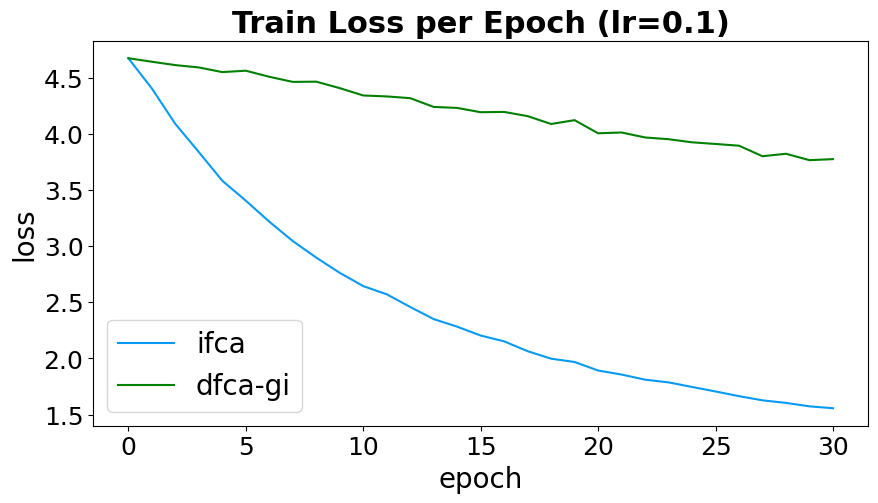

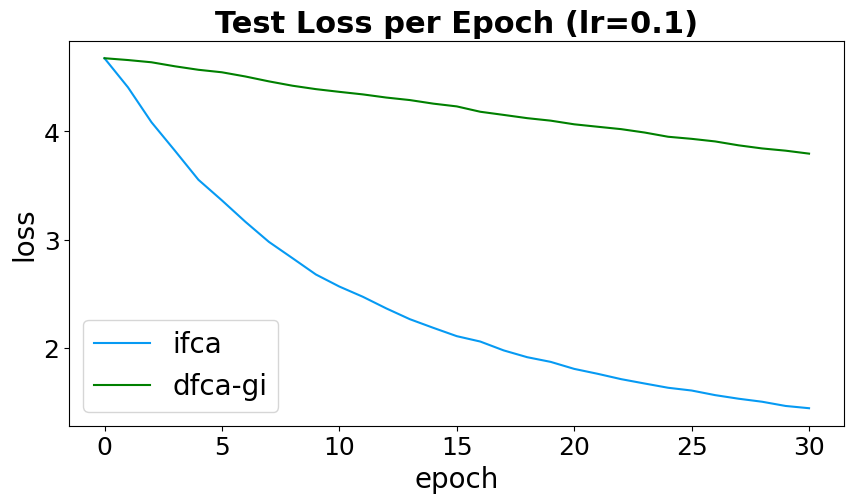

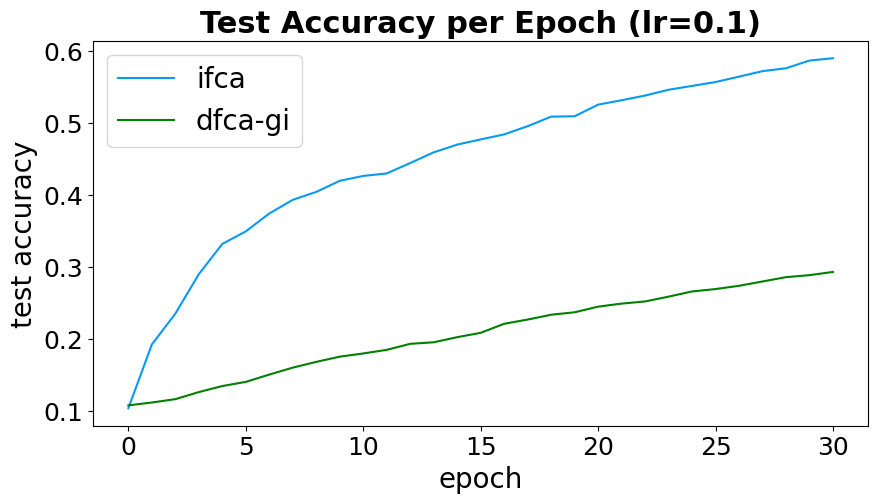

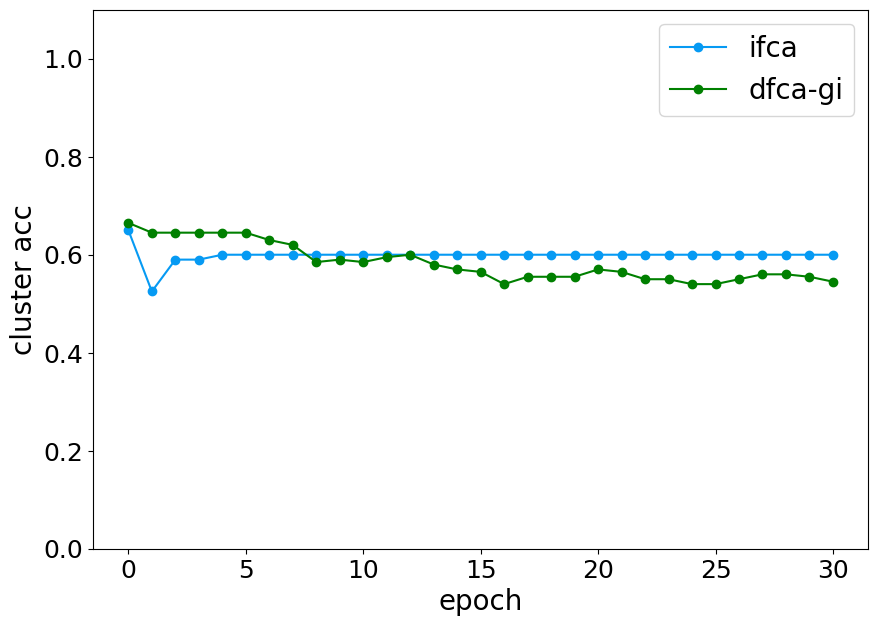

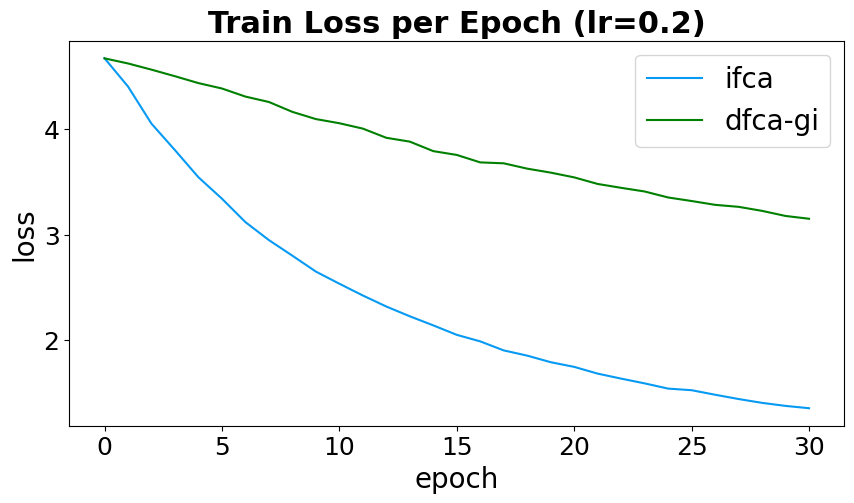

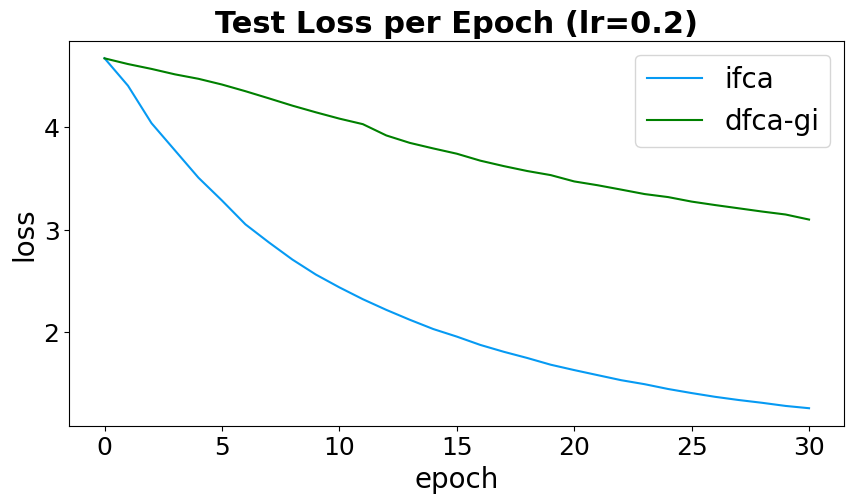

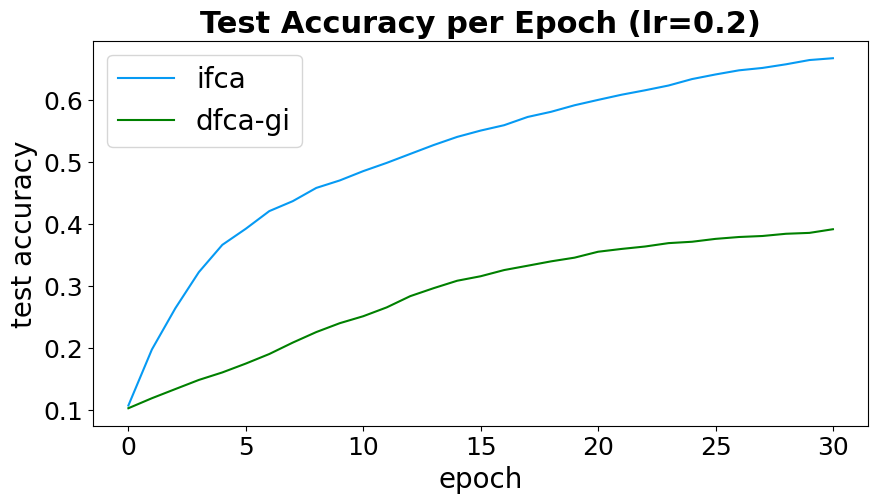

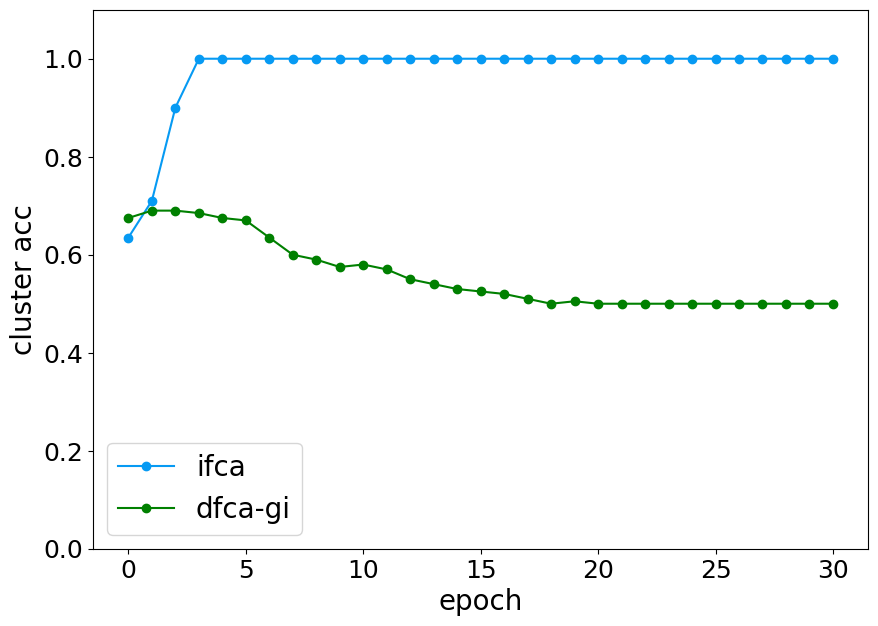

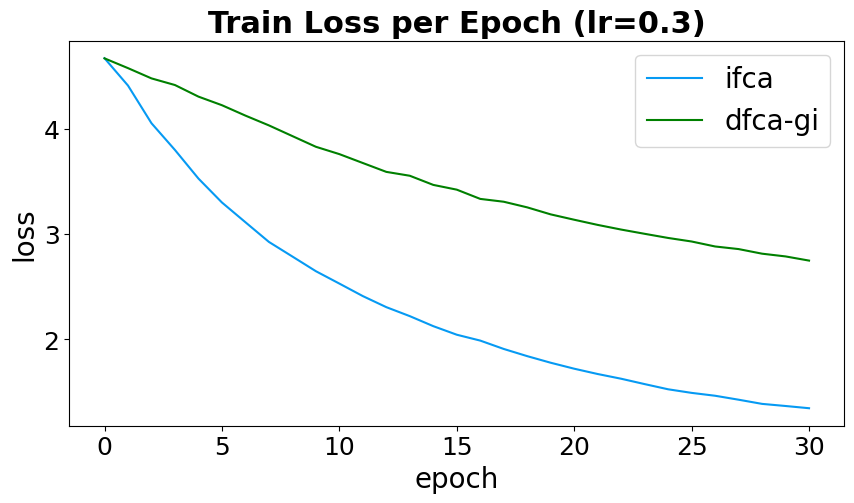

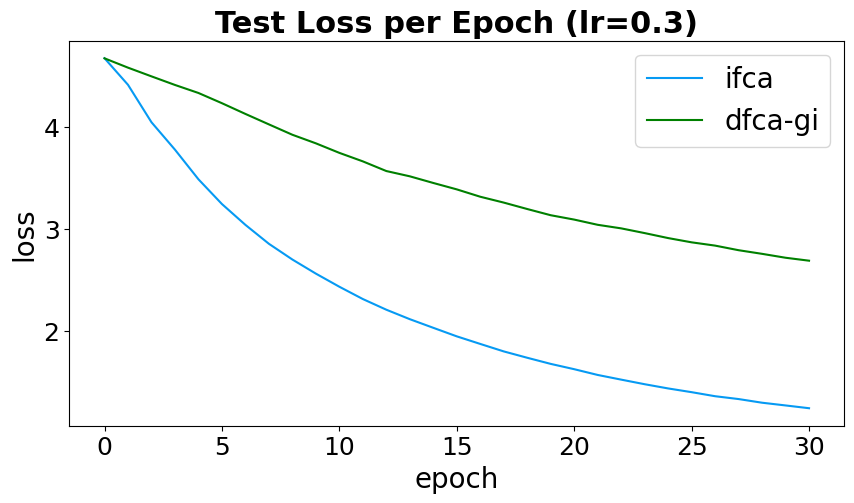

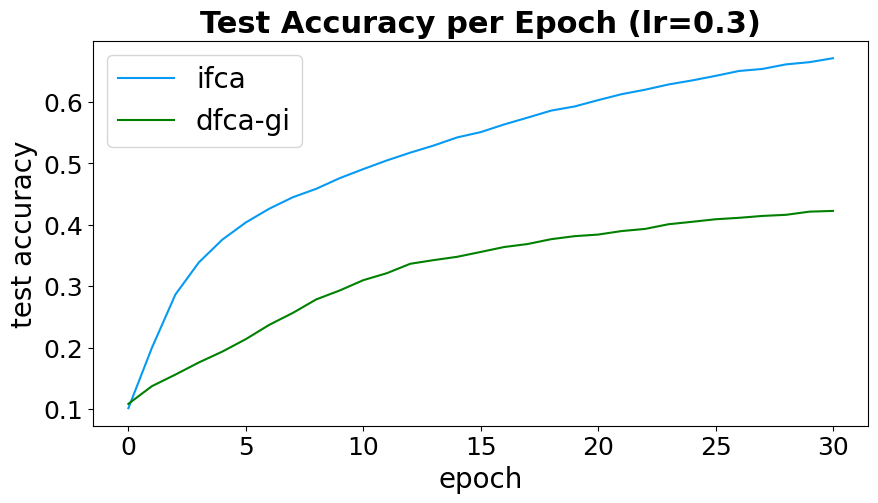

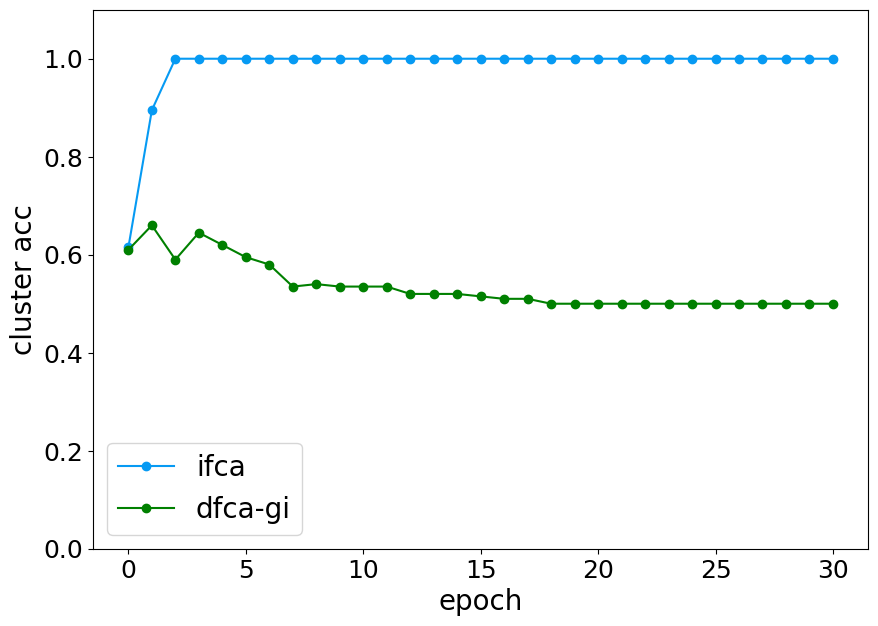

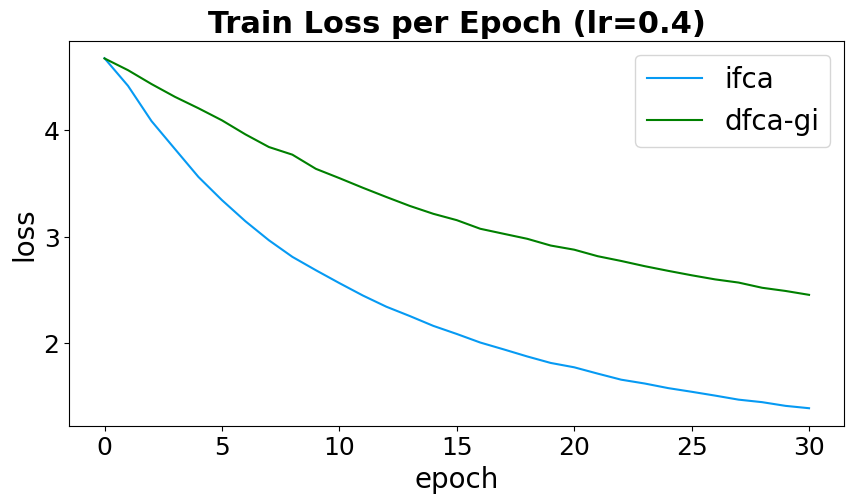

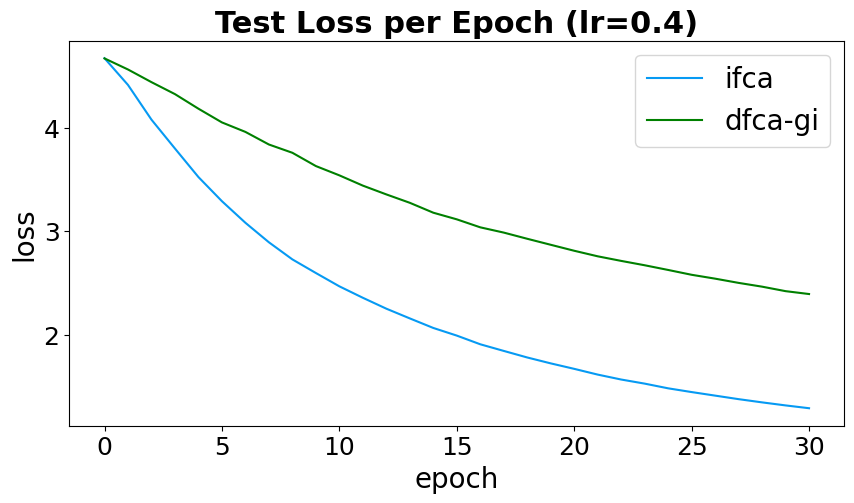

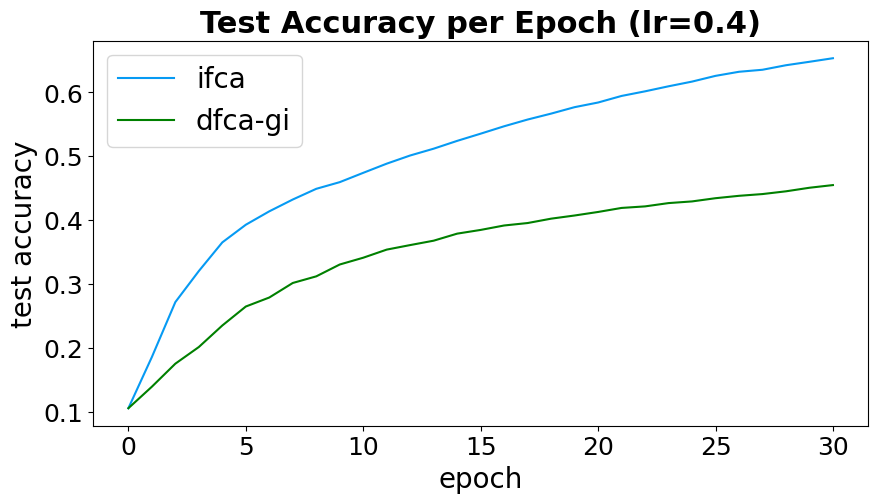

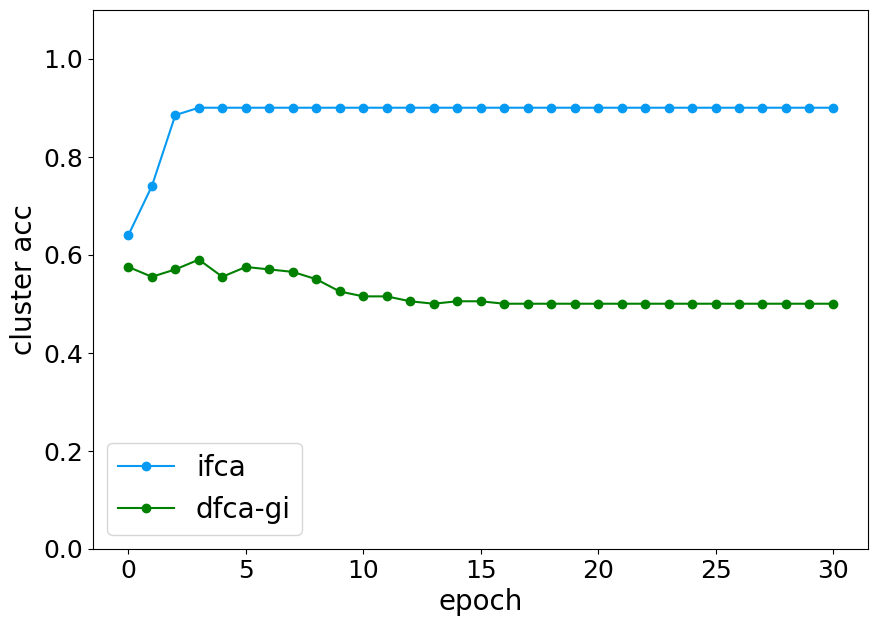

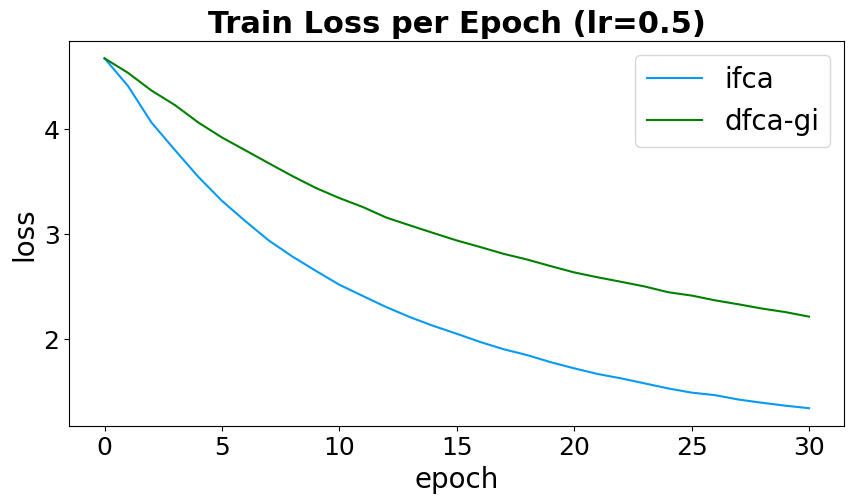

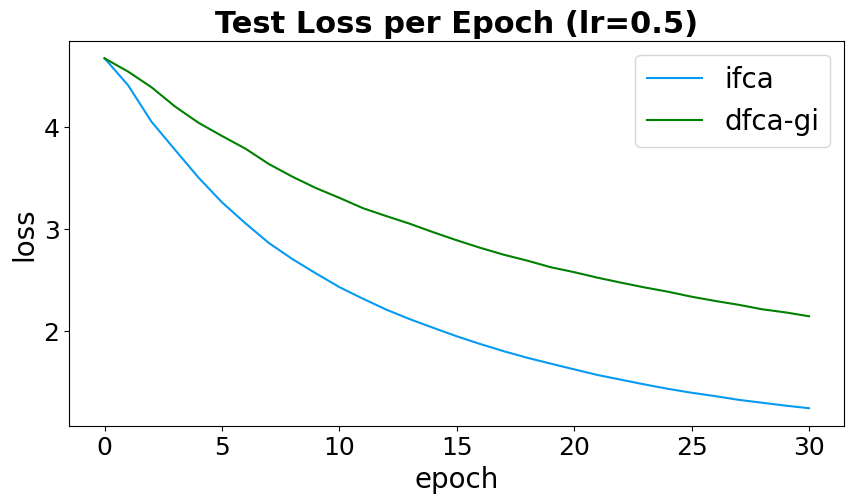

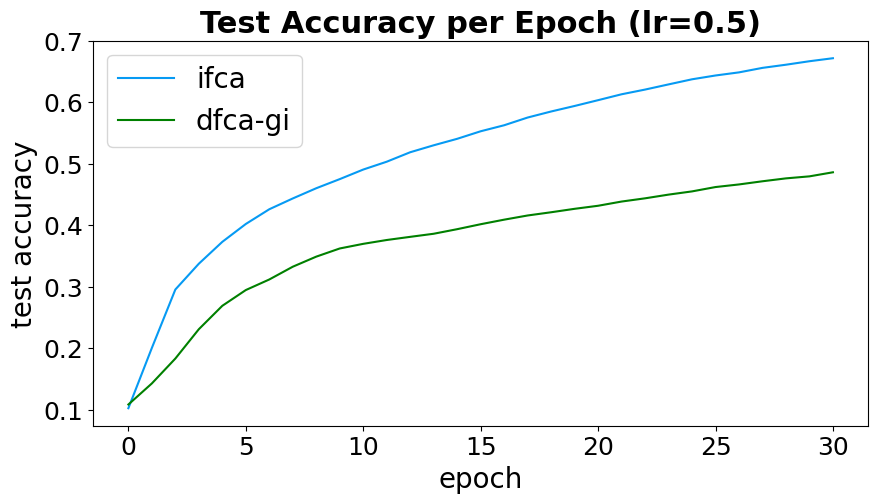

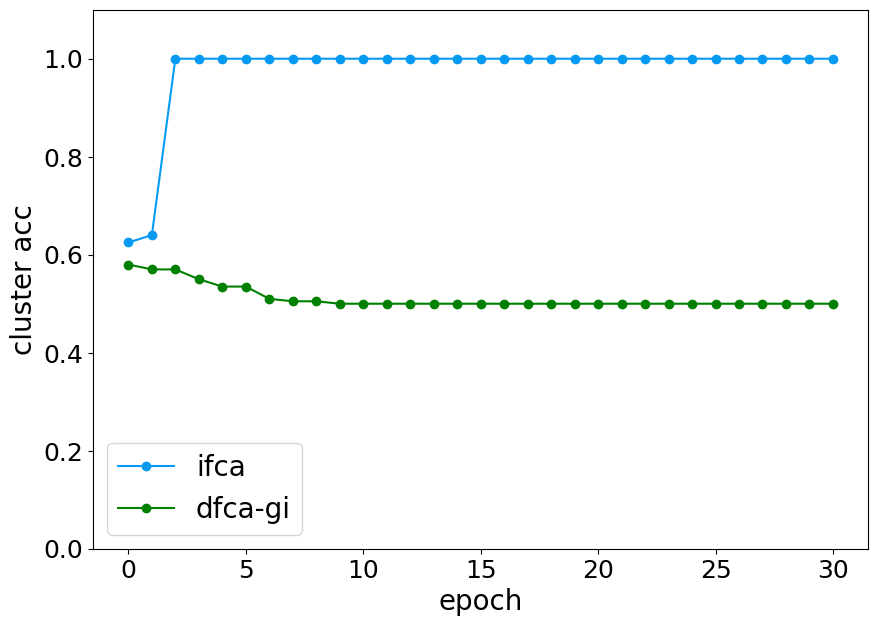

In [5]:

r_ifca = {}
r_dfca_gi = {}

# print("IFCA Test Acc: ", ifca)
# print("DFCA-GI Test Acc: ", dfca_gi)

r_ifca['test_loss'] = []
r_ifca['test_acc'] = []
r_ifca['cl_acc'] = []
r_ifca['train_loss'] = []
for i in range(len(p_rates)):
    r_ifca['test_loss'].append(ifca[i][0])
    r_ifca['test_acc'].append(ifca[i][1])
    r_ifca['cl_acc'].append(ifca[i][2])
    r_ifca['train_loss'].append(ifca[i][3])

r_dfca_gi['test_loss'] = []
r_dfca_gi['test_acc'] = []
r_dfca_gi['cl_acc'] = []
r_dfca_gi['train_loss'] = []
for i in range(len(p_rates)):
    r_dfca_gi['test_loss'].append(dfca_gi[i][0])
    r_dfca_gi['test_acc'].append(dfca_gi[i][1])
    r_dfca_gi['cl_acc'].append(dfca_gi[i][2])
    r_dfca_gi['train_loss'].append(dfca_gi[i][3])

print("DFCA-GI Test Acc: ", r_dfca_gi['test_acc'])
print("IFCA Test Acc: ", r_ifca['test_acc'])

os.makedirs('graphs', exist_ok=True)

for l in range(len(p_rates)):

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['train_loss'][l], label='ifca', color='xkcd:azure')
    plt.plot(r_dfca_gi['train_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('loss', fontsize=20)
    plt.title(f'Train Loss per Epoch (lr={p_rates[l]})', fontsize=22, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(fontsize=20)
    # plt.savefig(os.path.join('graphs', '3_train_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_loss'][l], label='ifca', color='xkcd:azure')
    plt.plot(r_dfca_gi['test_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('loss', fontsize=20)
    plt.title(f'Test Loss per Epoch (lr={p_rates[l]})', fontsize=22, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(fontsize=20)
    # plt.savefig(os.path.join('graphs', '3_test_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_acc'][l], label='ifca', color='xkcd:azure')
    plt.plot(r_dfca_gi['test_acc'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('test accuracy', fontsize=20)
    plt.title(f'Test Accuracy per Epoch (lr={p_rates[l]})', fontsize=22, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(fontsize=20)
    # plt.savefig(os.path.join('graphs', '3_test_acc.png'))

    plt.figure(figsize=(10,7))
    plt.ylim([0, 1.1])
    plt.plot(r_ifca['cl_acc'][l], label='ifca', color='xkcd:azure', marker='o')
    plt.plot(r_dfca_gi['cl_acc'][l], label='dfca-gi', color='green', marker='o')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('cluster acc', fontsize=20)
    # plt.title(f'Cluster Accuracy per Epoch (Participation Rate={p_rates[l]})', fontsize=22, fontweight='bold')
    plt.legend(fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.savefig(os.path.join('graphs', f'cluster_acc_pn_{p_rates[l]}.png'))

